In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
#Without split into train and test need to pre process and then only split
#If not a lot of confusion as no metadata file available will be changing the dir structure lead to complications
import pathlib
data_dir = "/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/data"
#data_dir = tf.keras.utils.get_file('data', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.JPG')))
print(image_count)


673


In [5]:
non_cancerous = list(data_dir.glob('NonCancerous/*'))
PIL.Image.open(str(non_cancerous[0]))
print(len(non_cancerous))

261


In [33]:
samp_1 = list(data_dir.glob('Samp1/*'))
PIL.Image.open(str(samp_1[0]))
print(len(samp_1))

57


In [54]:
samp_2 = list(data_dir.glob('Samp2/*'))
PIL.Image.open(str(samp_2[0]))
print(len(samp_2))

88


In [20]:
samp_3 = list(data_dir.glob('Samp3/*'))
PIL.Image.open(str(samp_3[0]))
print(len(samp_3))

80


In [21]:
samp_4 = list(data_dir.glob('Samp4/*'))
PIL.Image.open(str(samp_4[0]))
print(len(samp_4))

187


In [7]:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=539)

Found 673 files belonging to 5 classes.
Using 539 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=134)

Found 673 files belonging to 5 classes.
Using 134 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['NonCancerous', 'Samp1', 'Samp2', 'Samp3', 'Samp4']


In [11]:
i=0
for image_batch, labels_batch in train_ds:
  i+=1
  print(image_batch.shape)
  print(labels_batch.shape)

(539, 224, 224, 3)
(539,)


In [12]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [14]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

(539, 224, 224, 3)
539
(539, 224, 224, 3)
539


KeyboardInterrupt: ignored

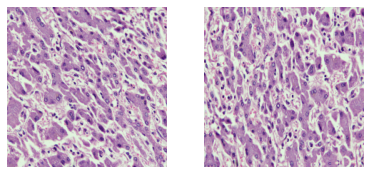

In [23]:
lbs=[]
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(1):
  #print(label)
  for i in range(9):
    augmented_images = data_augmentation(images)
    lbs.append(label)

    print(augmented_images.shape)
    print(len(augmented_images))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[1].numpy().astype("uint8"))
    plt.axis("off")

In [24]:
import tensorflow_datasets as tfds
img=[]
lb=[]
x=tfds.as_numpy(train_ds)
for image, label in x:
  train_rows=len(image)
  print(image.shape, label)
  image=image.reshape(train_rows,-1)
  print(image.shape)
  img.append(image)
  lb.append(label)


x_t=np.array(img)
y_t=np.array(lb)
x_t=x_t.reshape(539,224,224,3)
y_t=y_t.reshape(539)
print(x_t.shape)
print(y_t.shape)


(539, 224, 224, 3) [4 4 3 0 0 1 1 3 0 3 2 0 4 0 0 4 4 0 2 0 3 1 3 0 0 3 3 1 0 0 0 0 1 4 0 4 2
 0 4 0 2 0 0 4 0 0 0 4 0 0 0 2 0 4 4 4 4 0 0 4 0 3 0 0 0 0 0 0 2 4 3 4 0 3
 2 1 0 2 1 3 4 4 0 0 0 4 3 4 4 0 0 3 4 2 0 1 4 0 0 3 4 3 1 0 3 2 0 0 1 4 3
 4 0 4 0 4 1 0 2 3 4 1 0 3 4 1 4 3 0 0 0 0 1 0 4 2 3 3 4 0 3 0 4 0 4 1 2 0
 3 4 0 4 0 0 4 2 4 0 0 3 0 2 2 4 3 4 4 0 1 2 0 2 4 0 4 1 0 4 0 0 4 2 0 3 4
 0 1 4 2 0 0 0 4 3 0 3 0 0 0 2 0 4 2 3 4 0 0 0 0 4 4 2 0 2 4 4 0 4 0 4 1 4
 2 0 1 0 0 0 0 3 3 4 4 0 4 4 1 4 0 1 0 2 3 2 4 4 0 3 0 3 0 0 0 1 0 0 1 0 0
 0 4 0 0 2 0 4 0 4 3 4 0 0 0 0 3 4 0 0 2 3 4 4 4 4 0 2 0 0 0 3 1 0 0 2 0 4
 4 0 0 4 0 4 2 4 2 0 0 4 2 4 0 4 1 0 4 0 3 4 4 1 1 1 1 4 3 0 4 4 3 0 4 2 0
 4 0 4 0 4 0 4 0 1 0 2 3 2 2 4 0 0 0 4 4 0 1 2 4 4 1 4 0 0 0 4 0 3 0 1 1 4
 1 0 3 0 0 4 0 4 0 0 1 4 0 4 2 0 3 2 4 3 1 0 4 3 0 4 4 2 4 0 0 1 0 4 4 0 0
 1 1 2 0 4 2 4 2 4 0 3 4 0 4 4 1 3 0 0 4 0 0 2 0 0 3 4 2 3 4 0 1 4 2 1 4 4
 2 2 0 2 4 2 0 2 4 4 2 2 0 0 3 0 0 0 4 2 0 4 0 2 0 0 0 4 1 4 0 4 4 3 3 4 3
 0 3 3

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


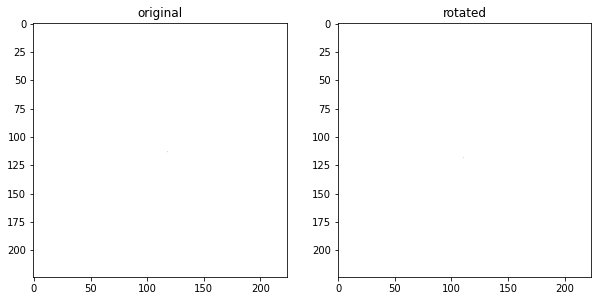

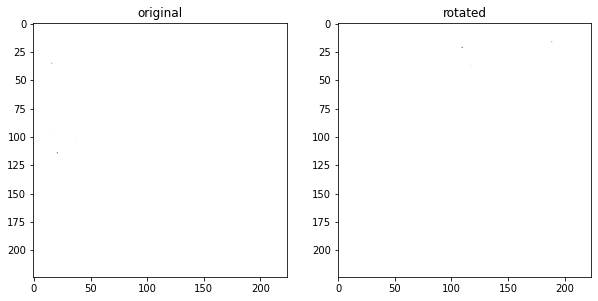

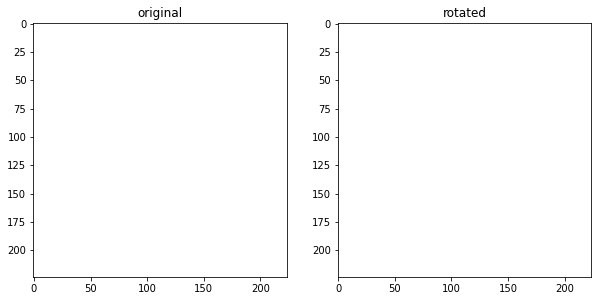

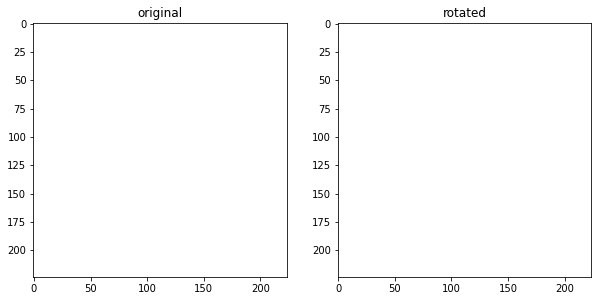

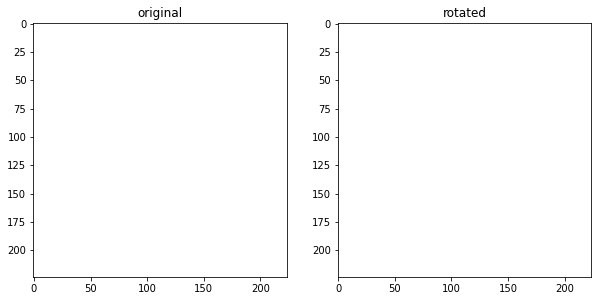

In [29]:
from PIL import Image
degrees = 90
ct=0
for img in x_t:
  ct+=1
  #img = np.array(Image.open('emma_stone.jpg'))
  # img = img.sum(2) / (255*3) # converting to grayscale
  print(img.shape)
  img1=np.array(img)
  img1 = img.astype(np.uint8)
  img1 = Image.fromarray(img1)
  img1.show()
  fig = plt.figure(figsize=(10, 10))
  fig.add_subplot(1, 2, 1)
  plt.imshow(img)
  plt.title("original")
  img0 = img.copy()
  for _ in range(degrees // 90):
      img0 = img0.transpose(1, 0, 2)
      for j in range(0, img0.shape[1] // 2):
          c = img0[:, j, :].copy()
          img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
          img0[: , img0.shape[1]-j-1, :] = c
  fig.add_subplot(1, 2, 2)
  plt.imshow(img0)
  plt.title("rotated")
  if(ct==5):
    break

In [37]:
print(samp_1[0])

/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/data/Samp1/K1180001.JPG


(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(57, 1200, 1600, 3)
(57, 1600, 1200, 3)


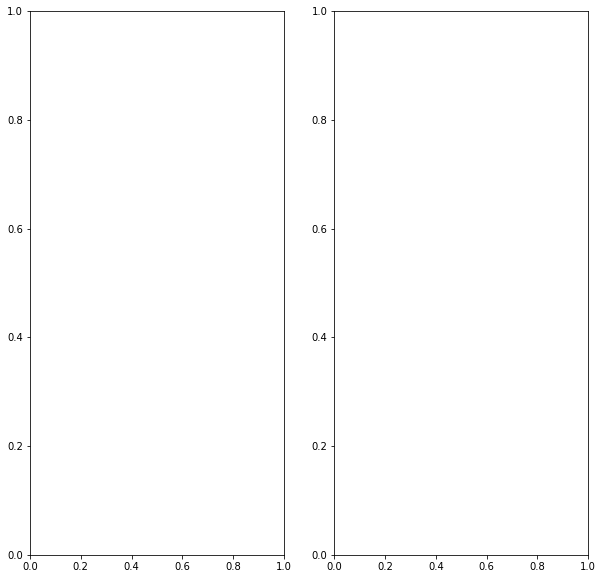

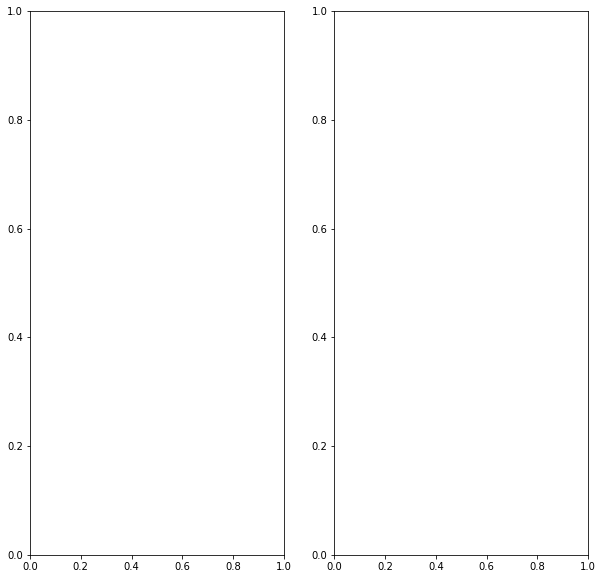

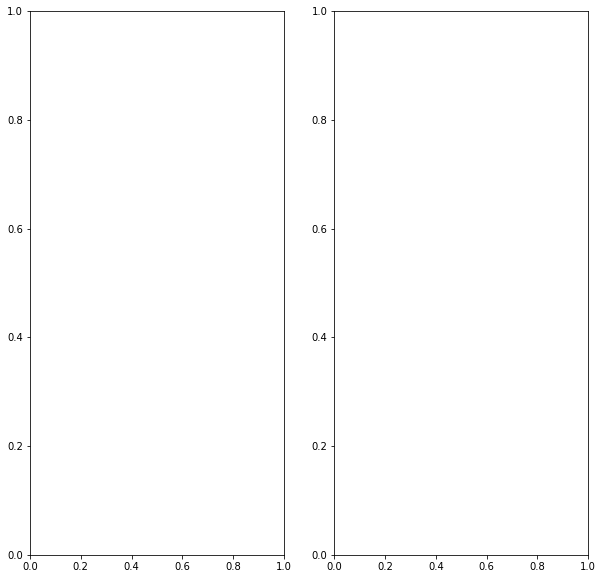

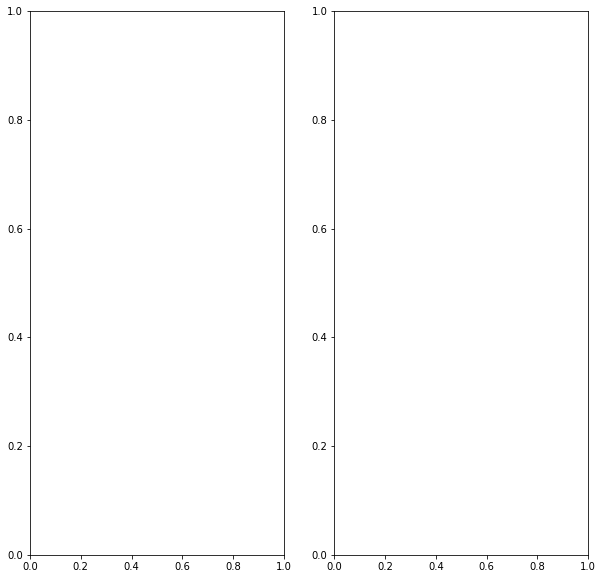

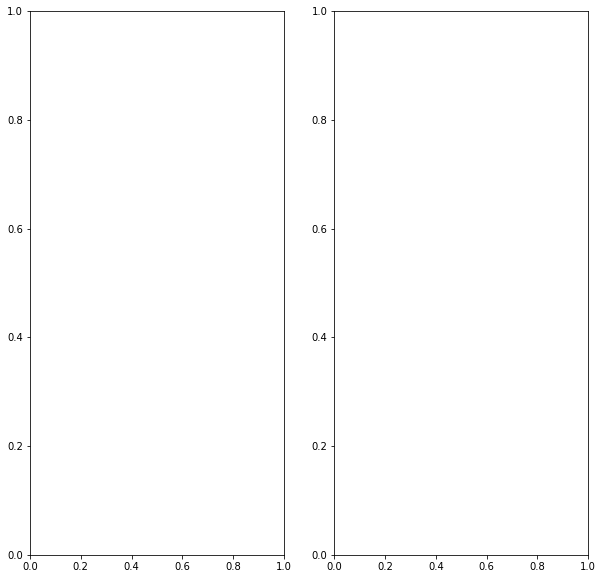

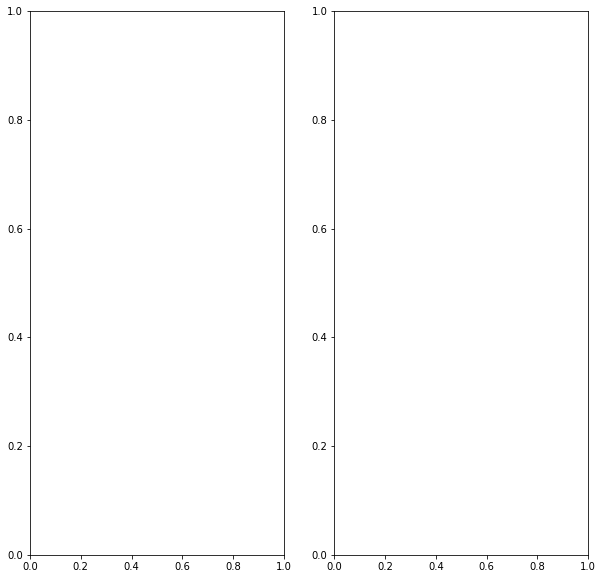

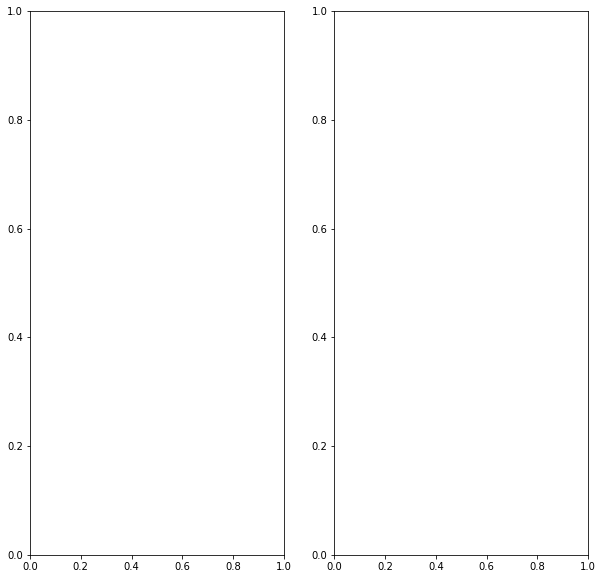

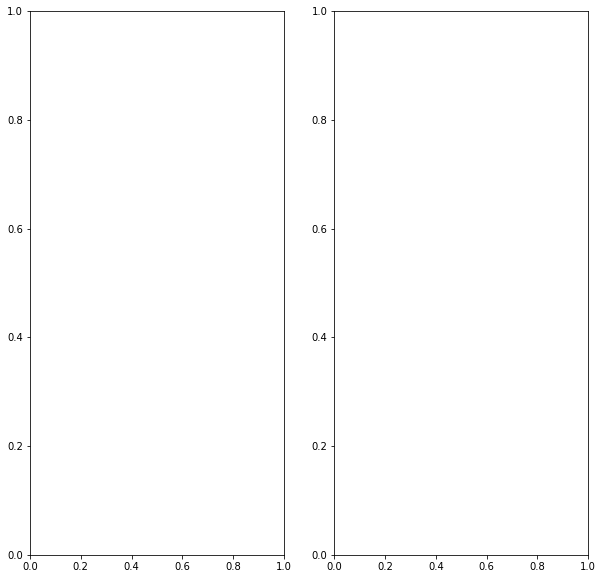

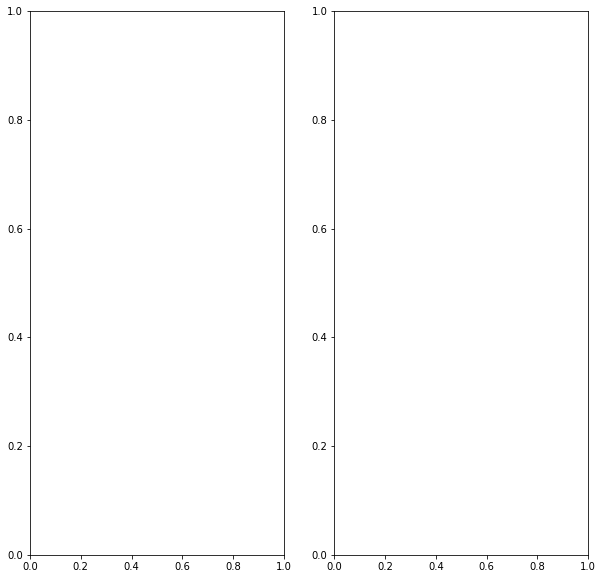

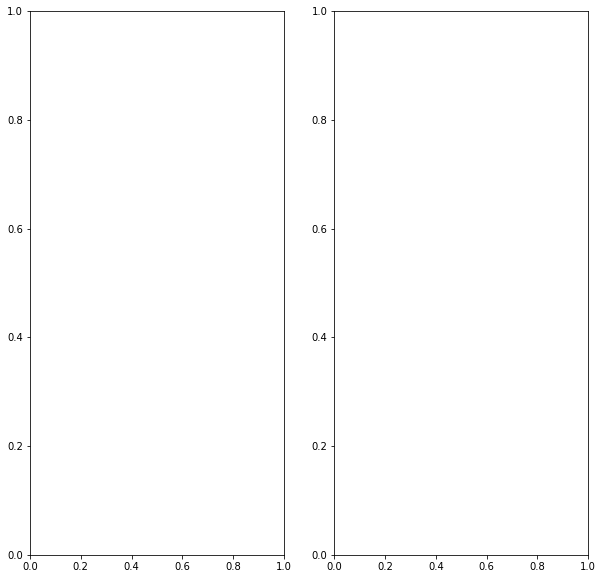

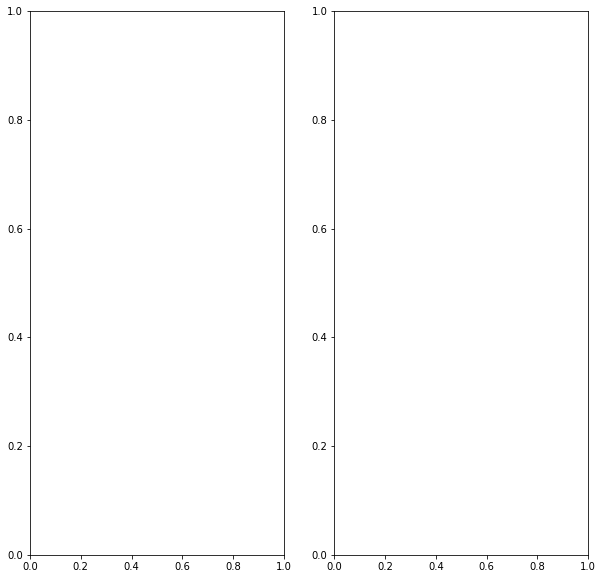

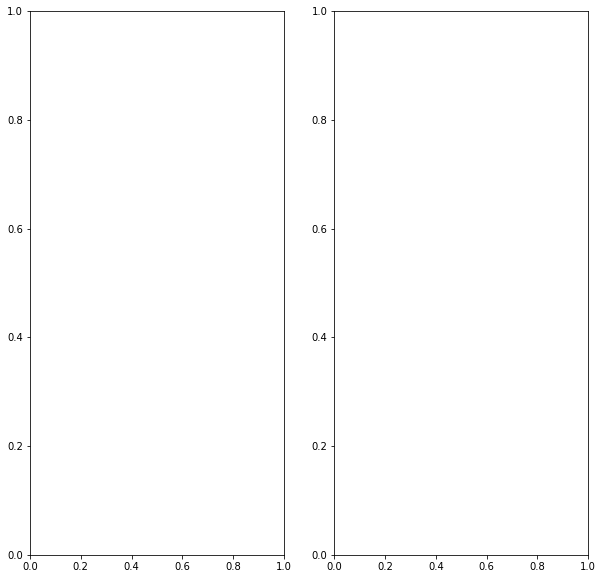

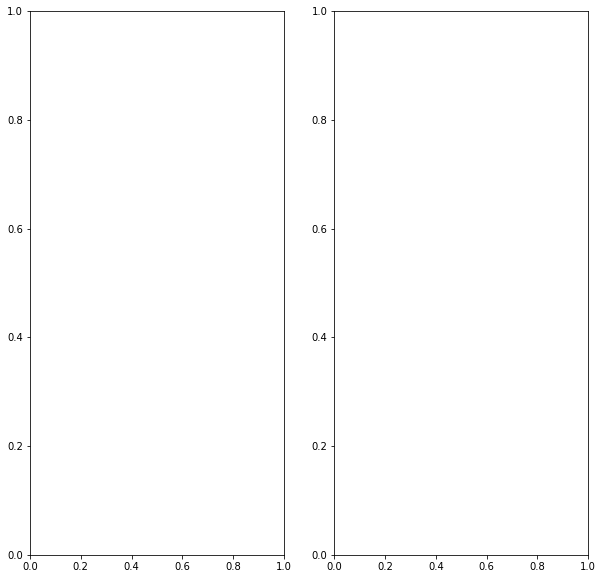

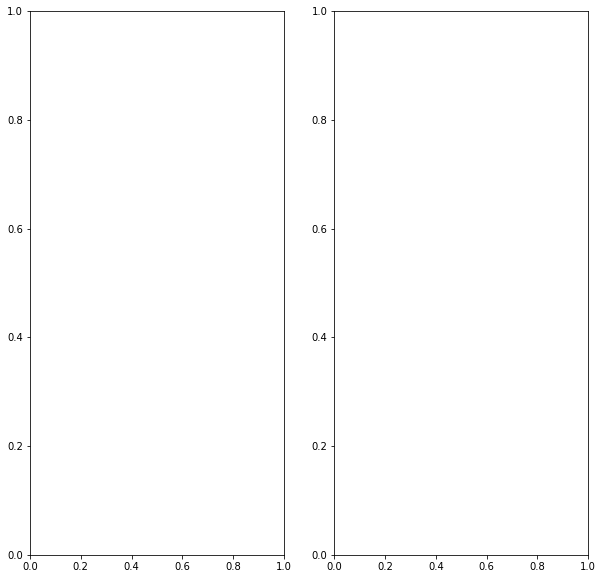

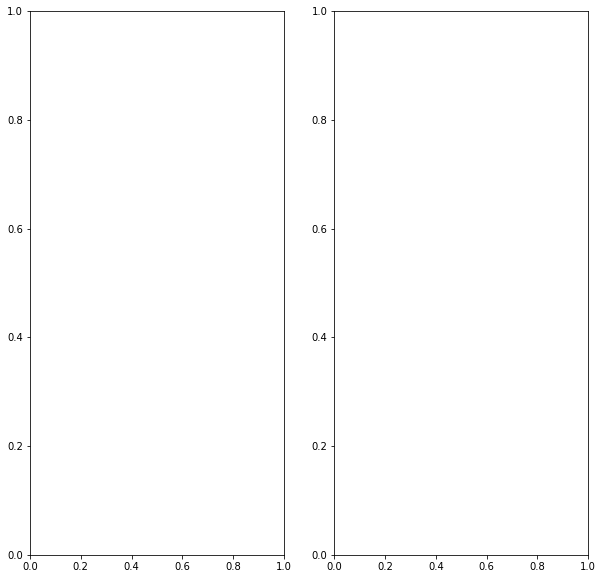

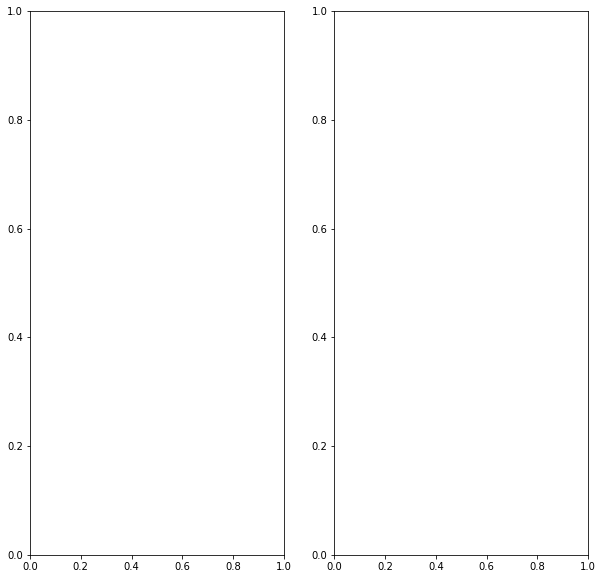

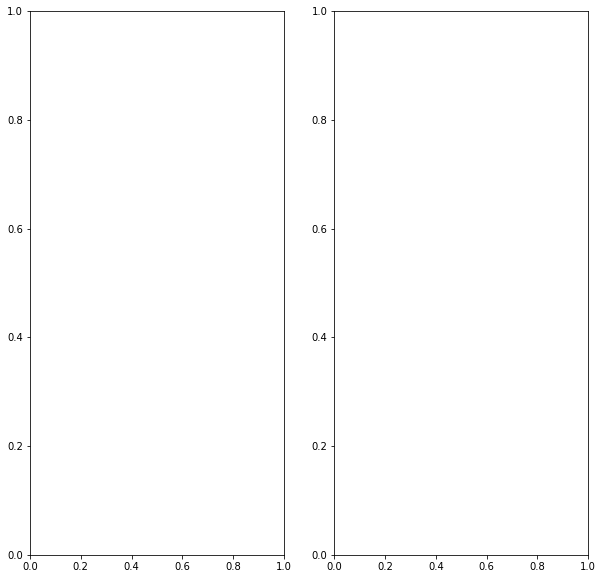

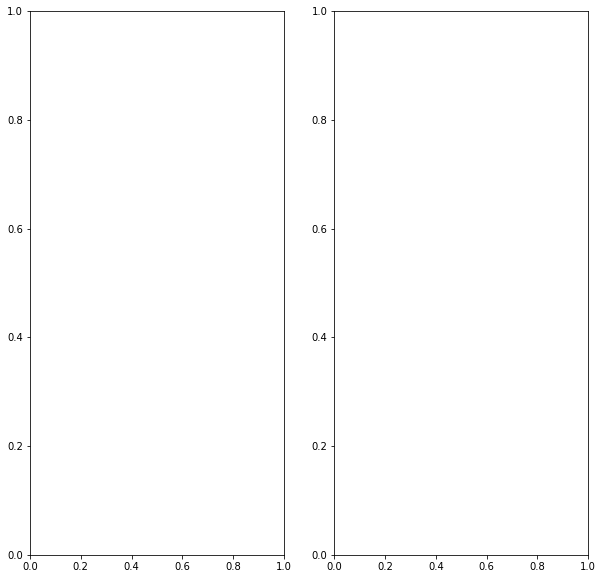

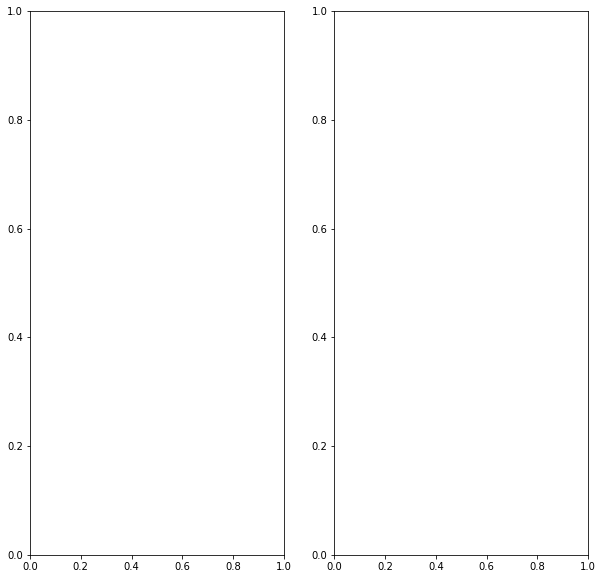

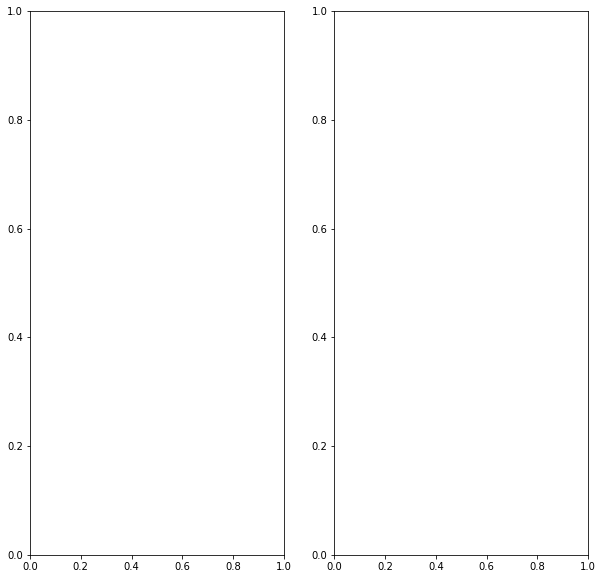

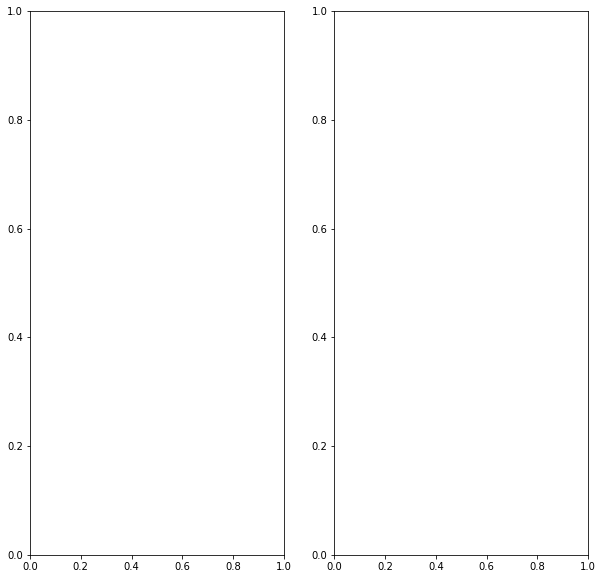

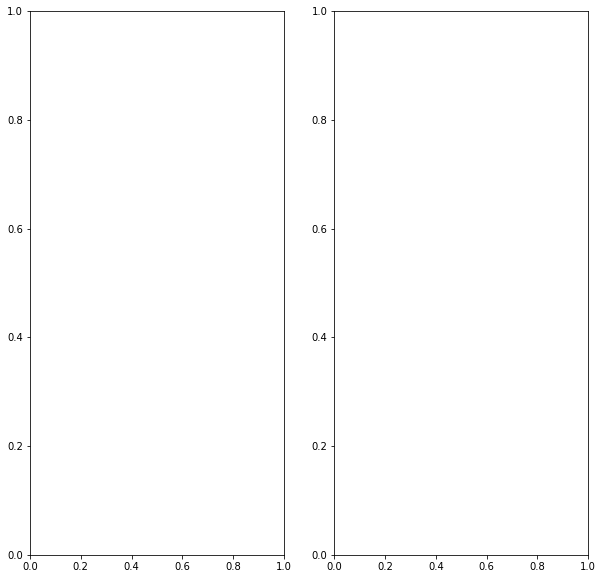

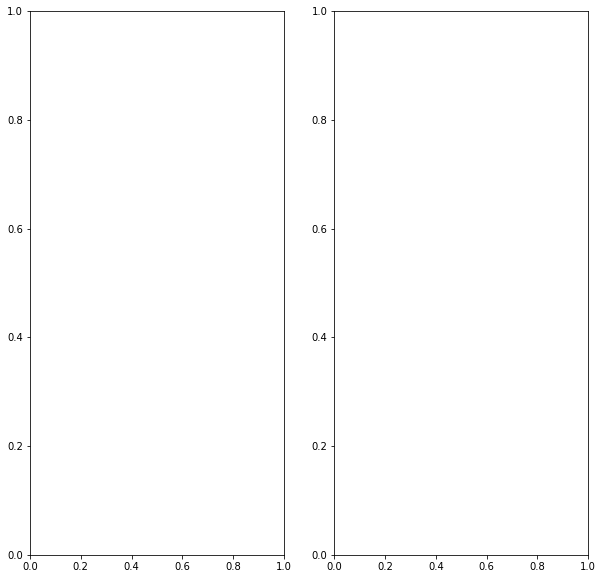

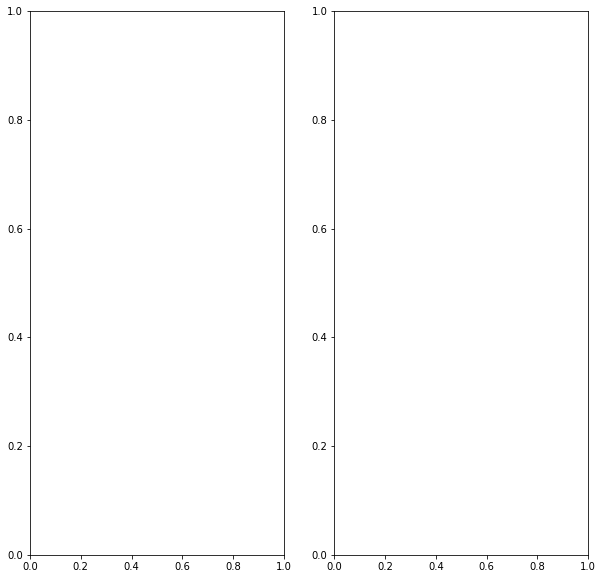

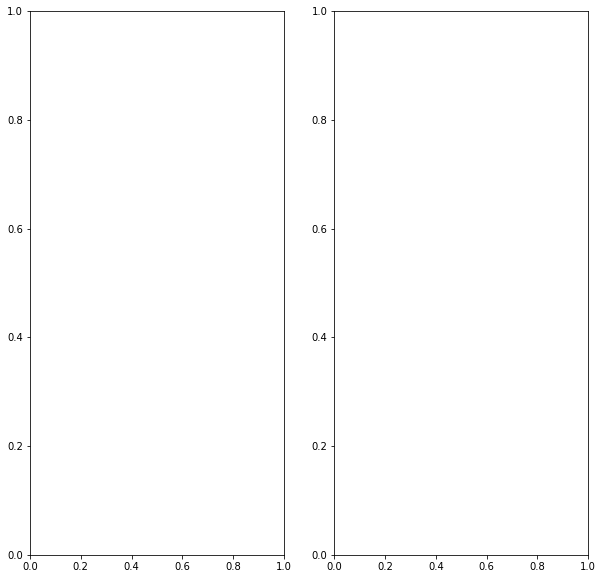

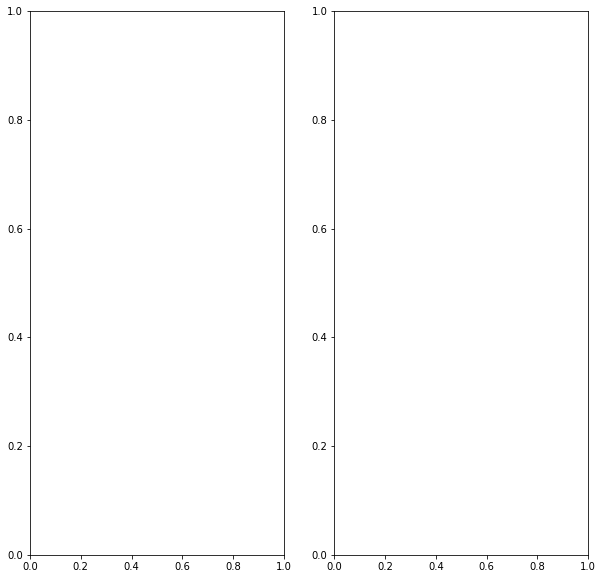

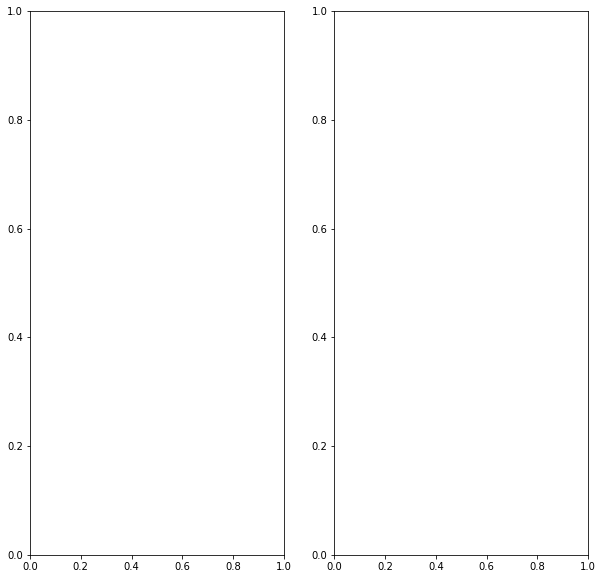

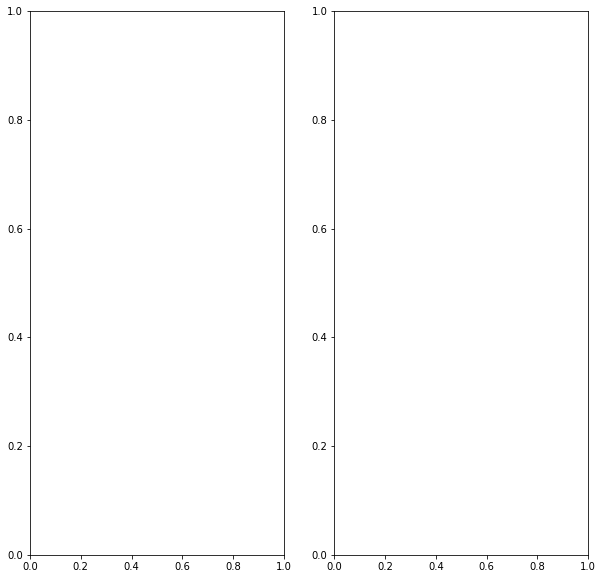

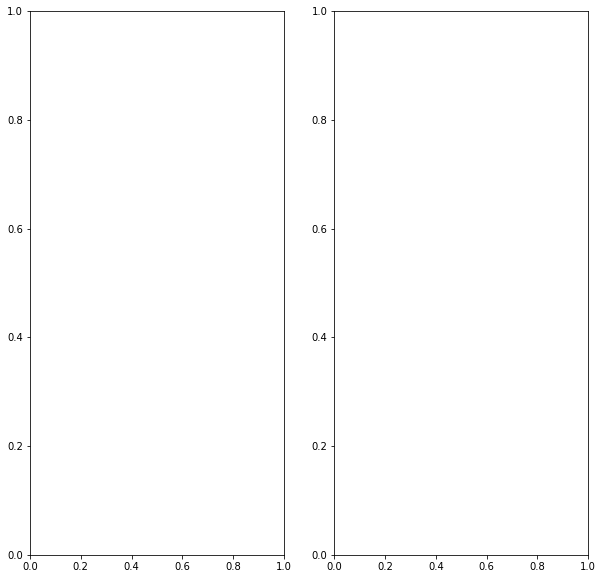

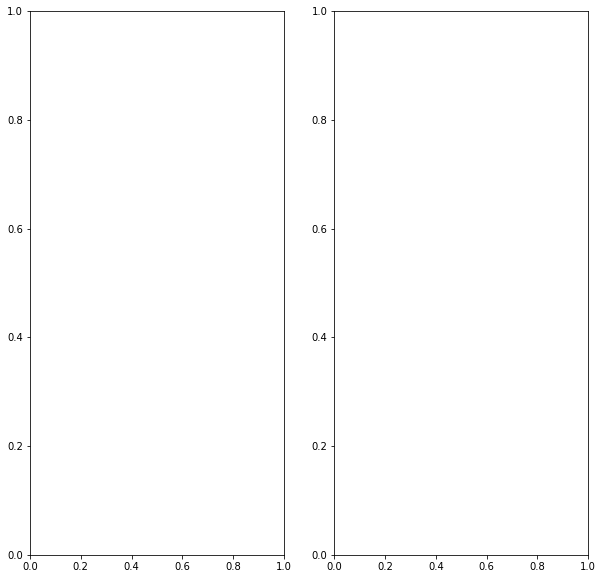

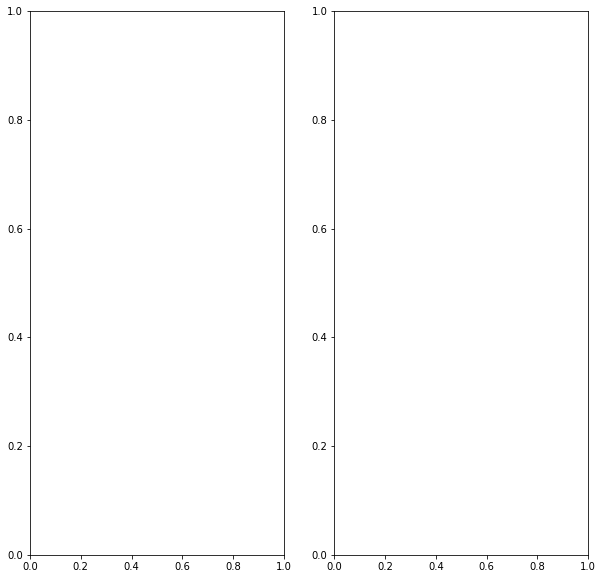

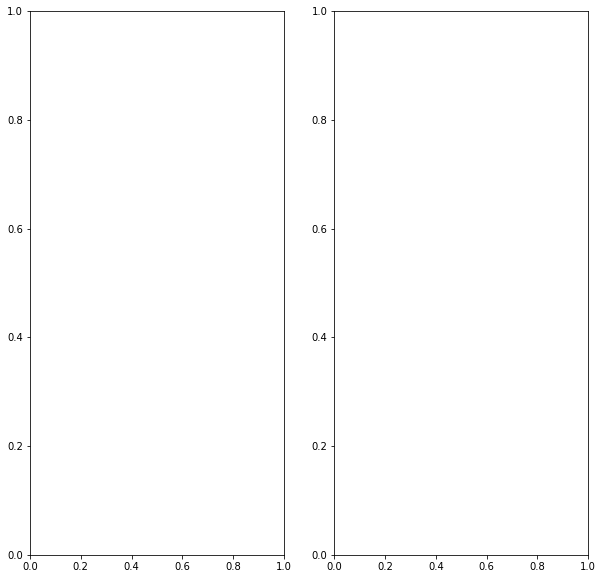

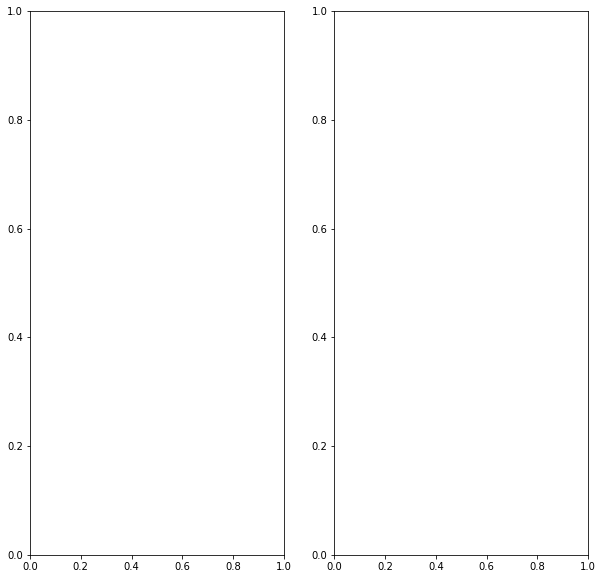

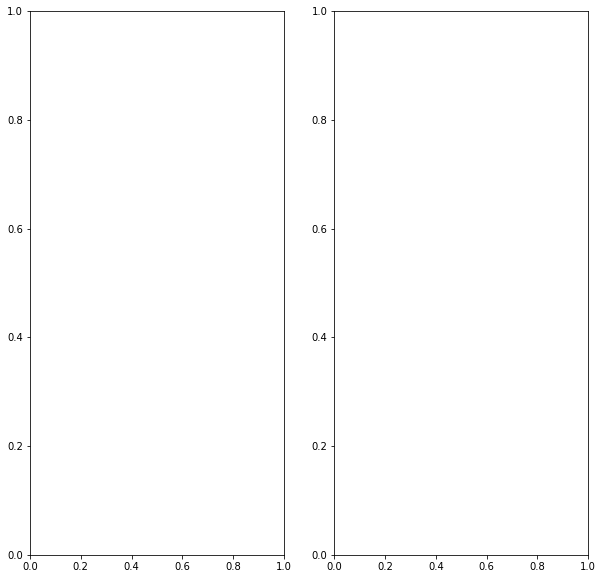

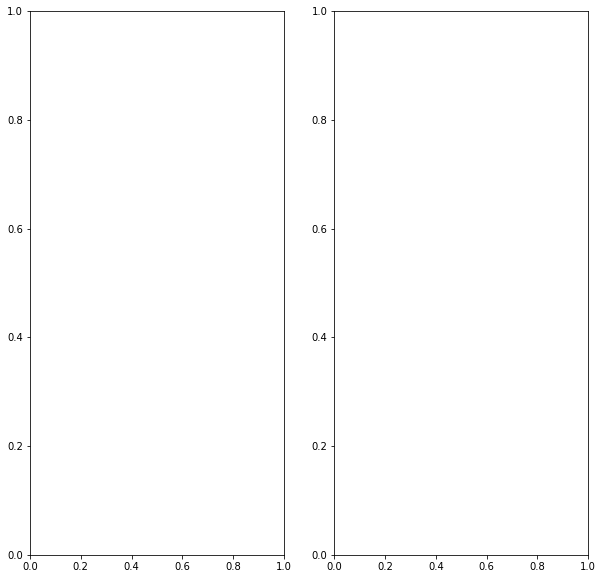

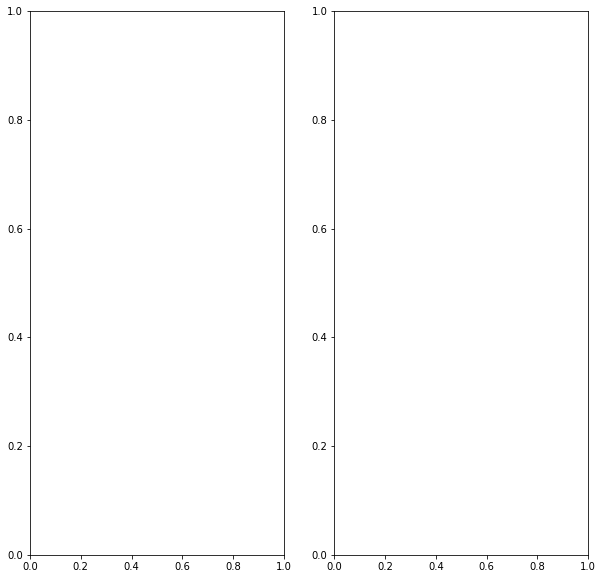

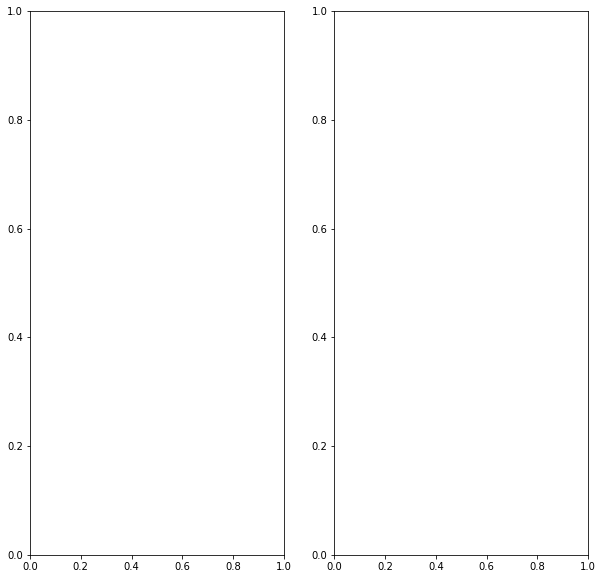

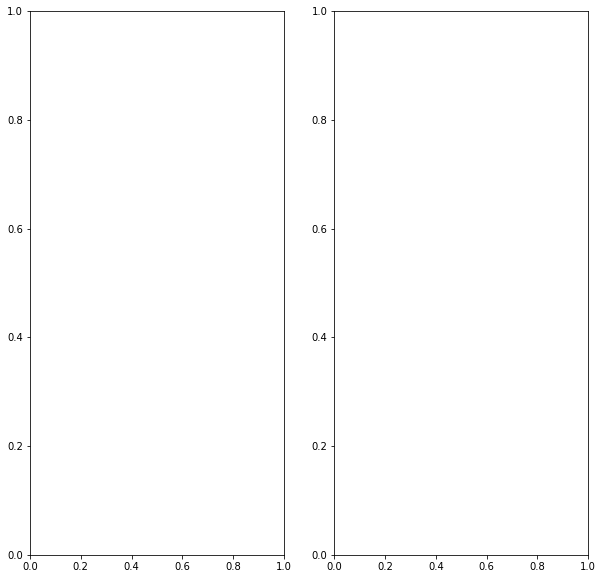

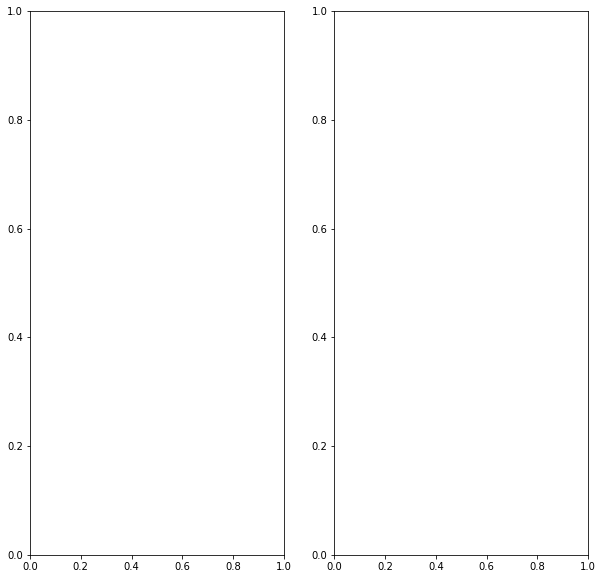

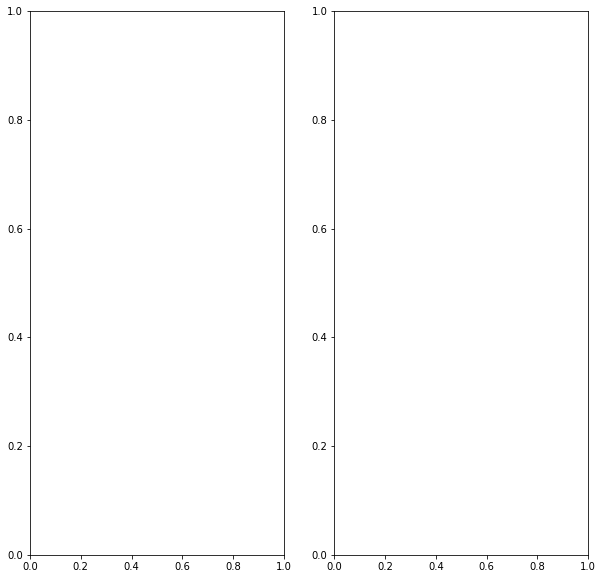

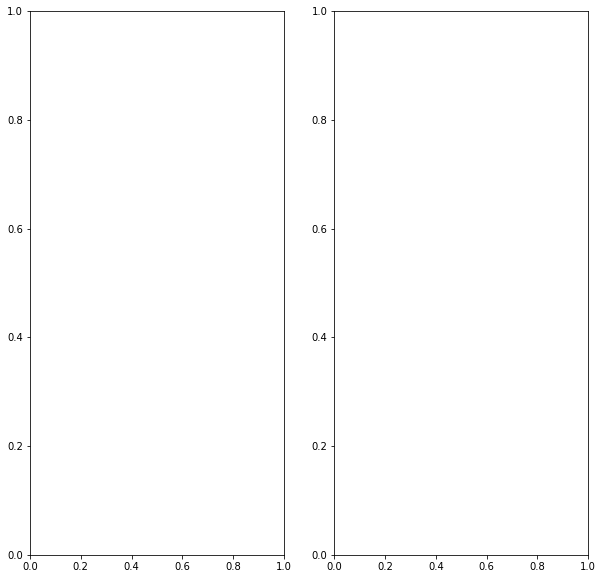

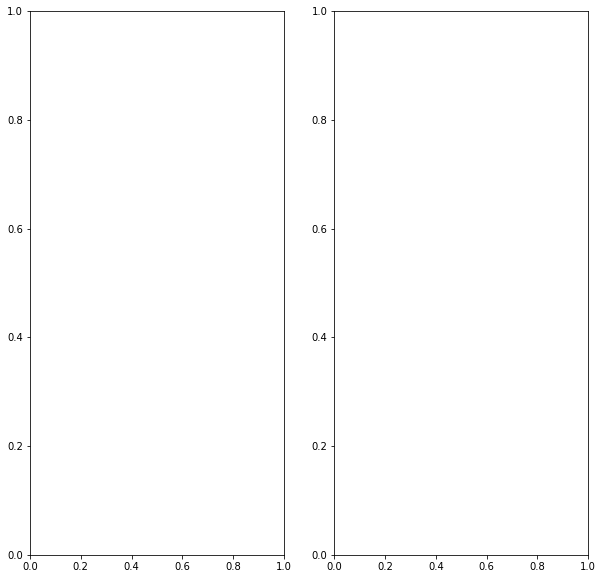

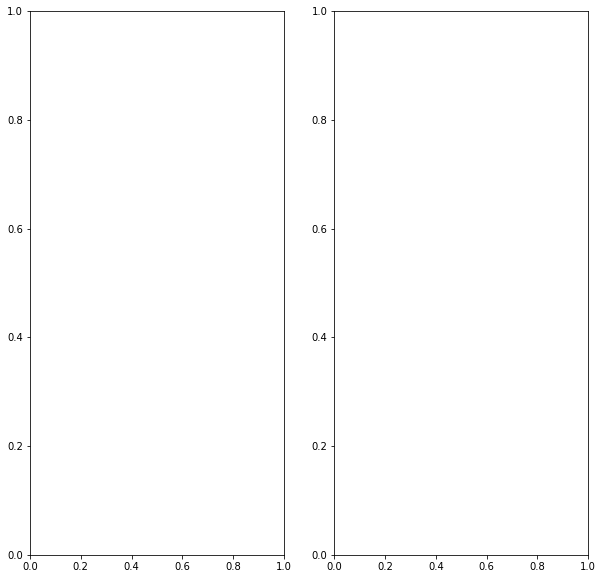

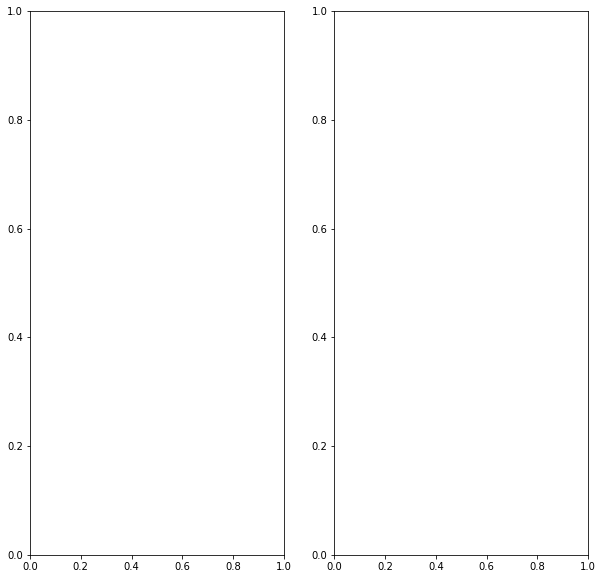

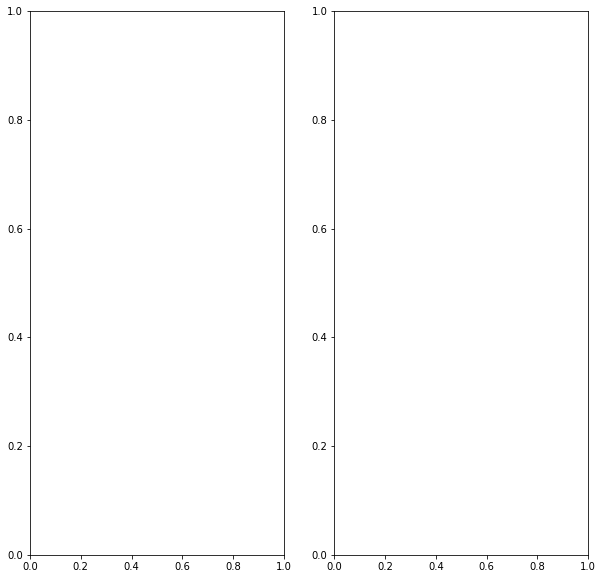

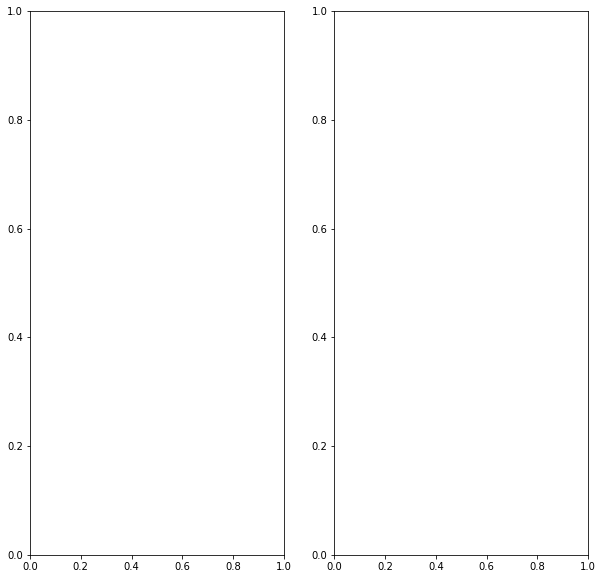

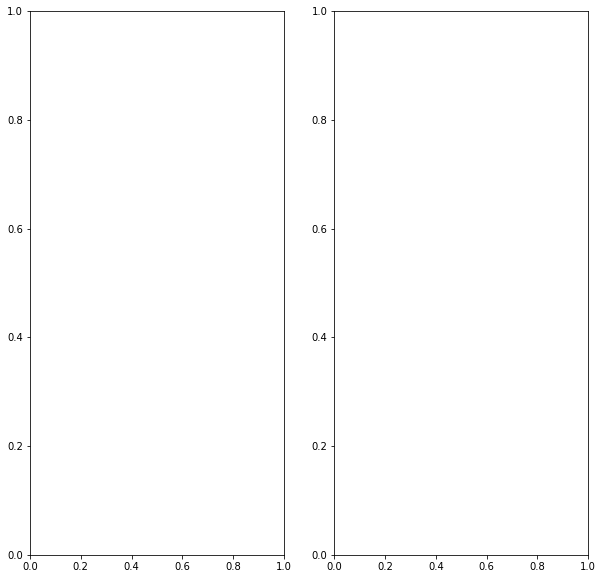

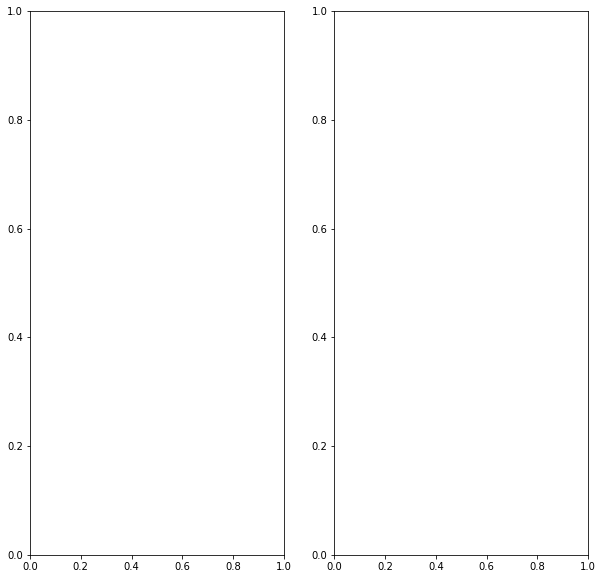

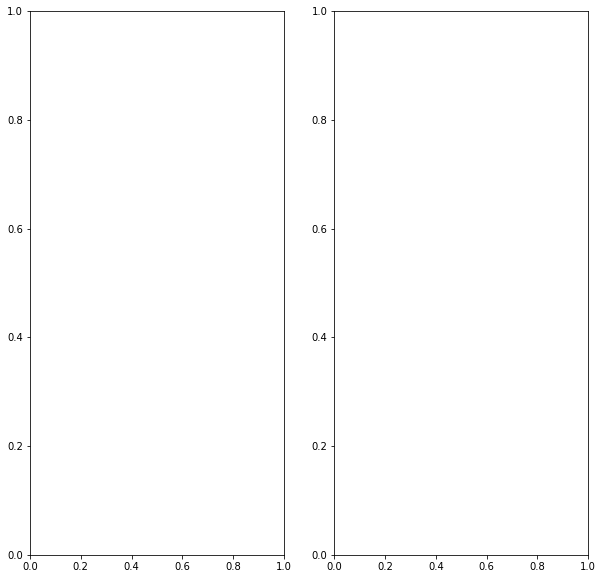

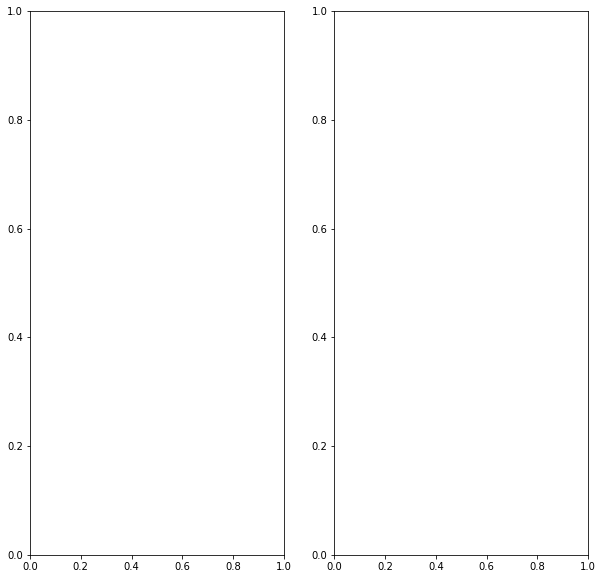

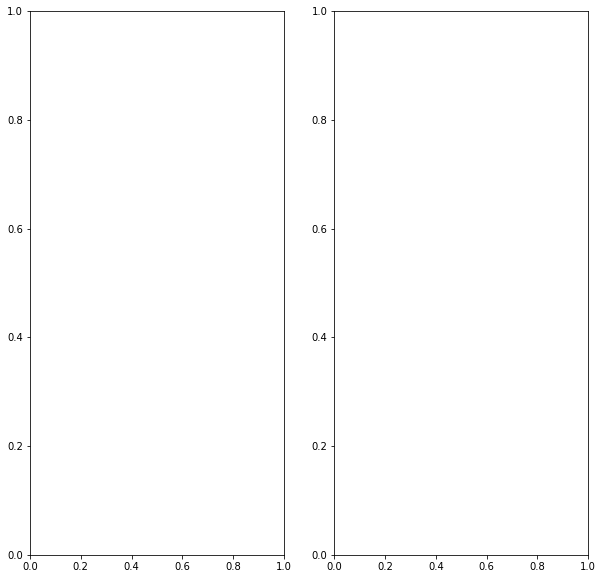

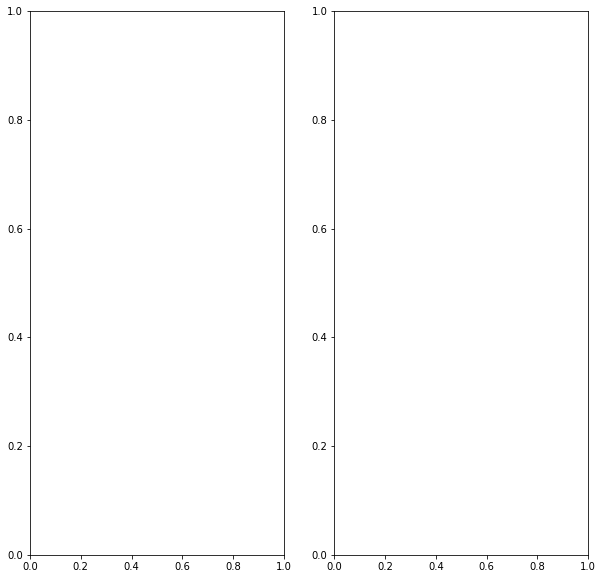

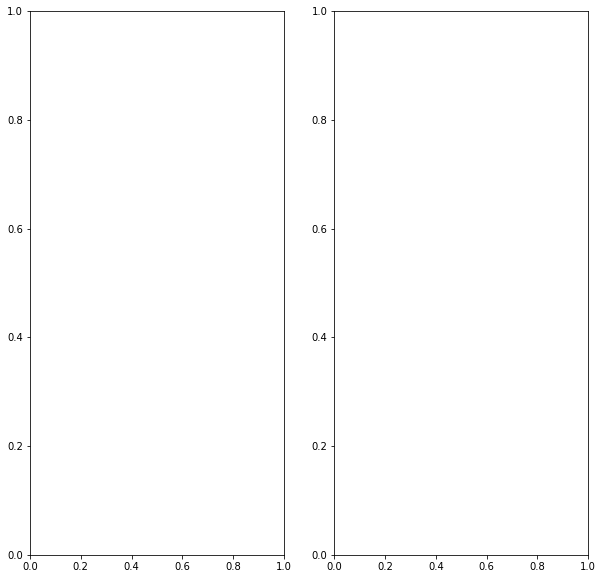

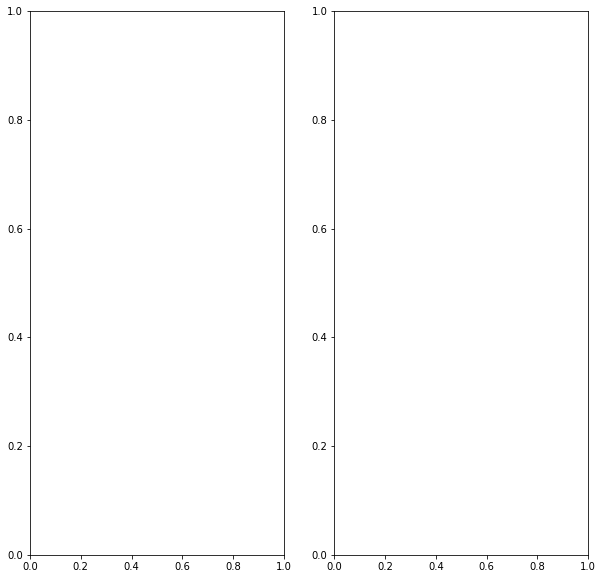

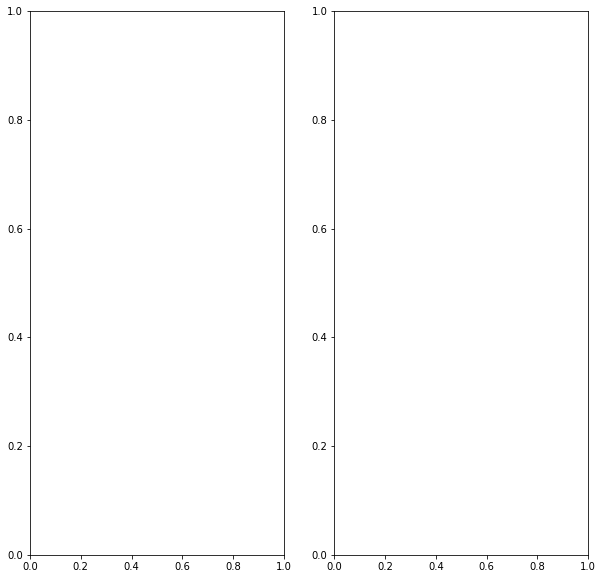

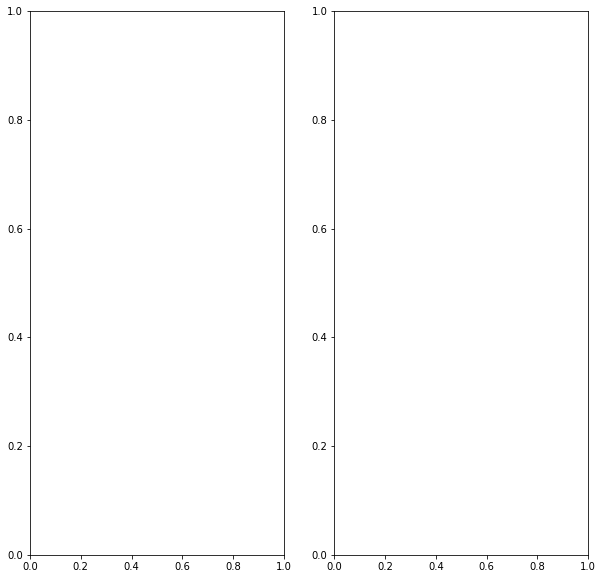

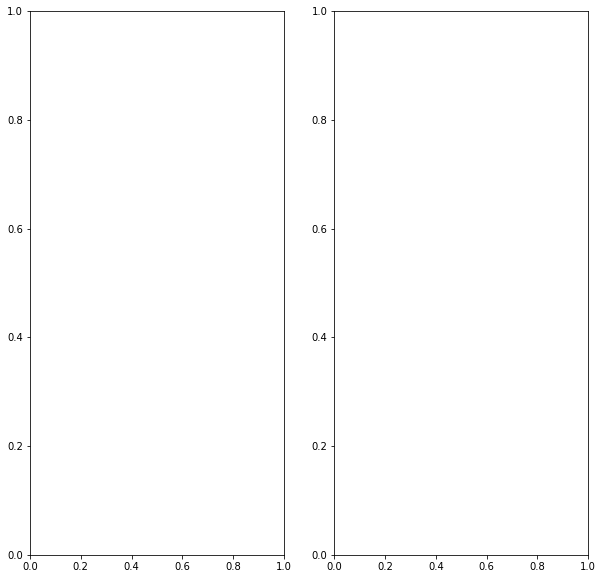

In [49]:
initial_img=[]
final_img=[]
import random
for i in range(len(samp_1)):

  degrees = 90
  img = np.array(Image.open(samp_1[i]))
  # img = img.sum(2) / (255*3) # converting to grayscale
  print(img.shape)
  fig = plt.figure(figsize=(10, 10))
  fig.add_subplot(1, 2, 1)
  #plt.imshow(img)
  initial_img.append(img)
  #plt.title("original")
  img0 = img.copy()
  for _ in range(degrees//90):
      img0 = img0.transpose(1, 0, 2)
      for j in range(0, img0.shape[1] // 2):
          c = img0[:, j, :].copy()
          img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
          img0[: , img0.shape[1]-j-1, :] = c
  fig.add_subplot(1, 2, 2)
  #plt.imshow(img0)
  final_img.append(img0)
  #plt.title("rotated")
  im_i=np.array(initial_img)
  im_f=np.array(final_img)


print(im_i.shape)
print(im_f.shape)



In [50]:
from PIL import Image
i=0
for im in im_i:
  
  print(im.shape)
  img=np.array(im)
  img = img.astype(np.uint8)
  img = Image.fromarray(img)
  fname="f"+str(i)+".jpeg"
  #print(y_res[i])
  print(fname)
  img_path="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Data_Augmentation/Stage_1"
  image = img.save(f"{img_path}/{fname}")
  #img_path_1="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Non_cancerous"
  #img_path_2="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_1"
  #img_path_3="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_2"
  #img_path_4="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_3"
  #if y_res[i]==0:
  #  image = img.save(f"{img_path_1}/{fname}")
  #elif y_res[i]==1 or y_res[i]==2:
  #  image = img.save(f"{img_path_2}/{fname}")
  #elif y_res[i]==3:
  #  image = img.save(f"{img_path_3}/{fname}")
  #elif y_res[i]==4:
  #  image = img.save(f"{img_path_4}/{fname}")
  #img.save(fname)
  i=i+1


(1200, 1600, 3)
f0.jpeg
(1200, 1600, 3)
f1.jpeg
(1200, 1600, 3)
f2.jpeg
(1200, 1600, 3)
f3.jpeg
(1200, 1600, 3)
f4.jpeg
(1200, 1600, 3)
f5.jpeg
(1200, 1600, 3)
f6.jpeg
(1200, 1600, 3)
f7.jpeg
(1200, 1600, 3)
f8.jpeg
(1200, 1600, 3)
f9.jpeg
(1200, 1600, 3)
f10.jpeg
(1200, 1600, 3)
f11.jpeg
(1200, 1600, 3)
f12.jpeg
(1200, 1600, 3)
f13.jpeg
(1200, 1600, 3)
f14.jpeg
(1200, 1600, 3)
f15.jpeg
(1200, 1600, 3)
f16.jpeg
(1200, 1600, 3)
f17.jpeg
(1200, 1600, 3)
f18.jpeg
(1200, 1600, 3)
f19.jpeg
(1200, 1600, 3)
f20.jpeg
(1200, 1600, 3)
f21.jpeg
(1200, 1600, 3)
f22.jpeg
(1200, 1600, 3)
f23.jpeg
(1200, 1600, 3)
f24.jpeg
(1200, 1600, 3)
f25.jpeg
(1200, 1600, 3)
f26.jpeg
(1200, 1600, 3)
f27.jpeg
(1200, 1600, 3)
f28.jpeg
(1200, 1600, 3)
f29.jpeg
(1200, 1600, 3)
f30.jpeg
(1200, 1600, 3)
f31.jpeg
(1200, 1600, 3)
f32.jpeg
(1200, 1600, 3)
f33.jpeg
(1200, 1600, 3)
f34.jpeg
(1200, 1600, 3)
f35.jpeg
(1200, 1600, 3)
f36.jpeg
(1200, 1600, 3)
f37.jpeg
(1200, 1600, 3)
f38.jpeg
(1200, 1600, 3)
f39.jpeg
(1200, 160

In [51]:
from PIL import Image
i=0
for im in im_f:
  
  print(im.shape)
  img=np.array(im)
  img = img.astype(np.uint8)
  img = Image.fromarray(img)
  fname="f"+str(i)+".jpeg"
  #print(y_res[i])
  print(fname)
  img_path="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Data_Augmentation/Stage_1"
  image = img.save(f"{img_path}/{fname}")
  #img_path_1="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Non_cancerous"
  #img_path_2="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_1"
  #img_path_3="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_2"
  #img_path_4="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_3"
  #if y_res[i]==0:
  #  image = img.save(f"{img_path_1}/{fname}")
  #elif y_res[i]==1 or y_res[i]==2:
  #  image = img.save(f"{img_path_2}/{fname}")
  #elif y_res[i]==3:
  #  image = img.save(f"{img_path_3}/{fname}")
  #elif y_res[i]==4:
  #  image = img.save(f"{img_path_4}/{fname}")
  #img.save(fname)
  i=i+1

(1600, 1200, 3)
f0.jpeg
(1600, 1200, 3)
f1.jpeg
(1600, 1200, 3)
f2.jpeg
(1600, 1200, 3)
f3.jpeg
(1600, 1200, 3)
f4.jpeg
(1600, 1200, 3)
f5.jpeg
(1600, 1200, 3)
f6.jpeg
(1600, 1200, 3)
f7.jpeg
(1600, 1200, 3)
f8.jpeg
(1600, 1200, 3)
f9.jpeg
(1600, 1200, 3)
f10.jpeg
(1600, 1200, 3)
f11.jpeg
(1600, 1200, 3)
f12.jpeg
(1600, 1200, 3)
f13.jpeg
(1600, 1200, 3)
f14.jpeg
(1600, 1200, 3)
f15.jpeg
(1600, 1200, 3)
f16.jpeg
(1600, 1200, 3)
f17.jpeg
(1600, 1200, 3)
f18.jpeg
(1600, 1200, 3)
f19.jpeg
(1600, 1200, 3)
f20.jpeg
(1600, 1200, 3)
f21.jpeg
(1600, 1200, 3)
f22.jpeg
(1600, 1200, 3)
f23.jpeg
(1600, 1200, 3)
f24.jpeg
(1600, 1200, 3)
f25.jpeg
(1600, 1200, 3)
f26.jpeg
(1600, 1200, 3)
f27.jpeg
(1600, 1200, 3)
f28.jpeg
(1600, 1200, 3)
f29.jpeg
(1600, 1200, 3)
f30.jpeg
(1600, 1200, 3)
f31.jpeg
(1600, 1200, 3)
f32.jpeg
(1600, 1200, 3)
f33.jpeg
(1600, 1200, 3)
f34.jpeg
(1600, 1200, 3)
f35.jpeg
(1600, 1200, 3)
f36.jpeg
(1600, 1200, 3)
f37.jpeg
(1600, 1200, 3)
f38.jpeg
(1600, 1200, 3)
f39.jpeg
(1600, 120

(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1

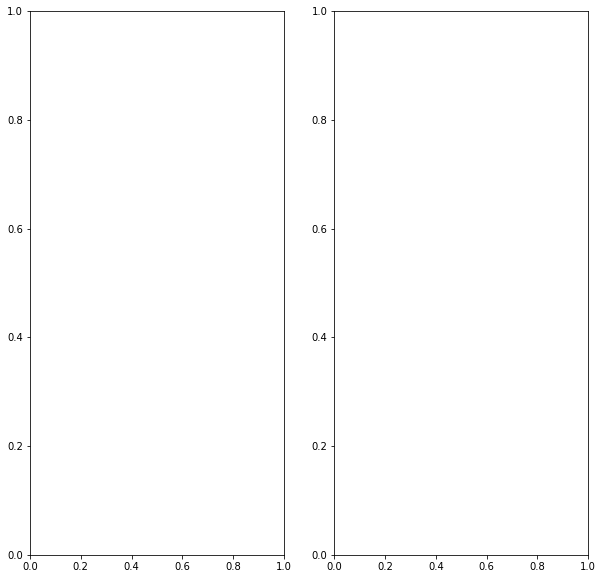

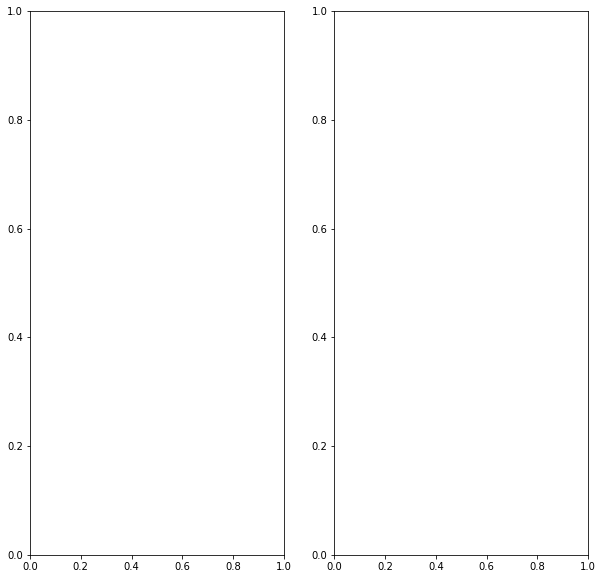

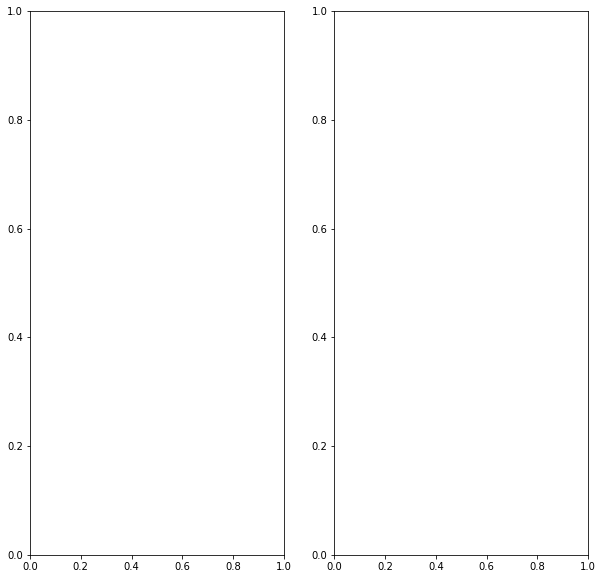

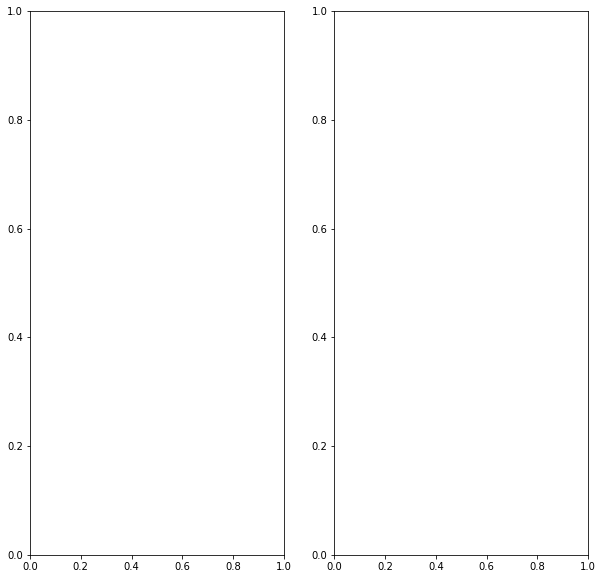

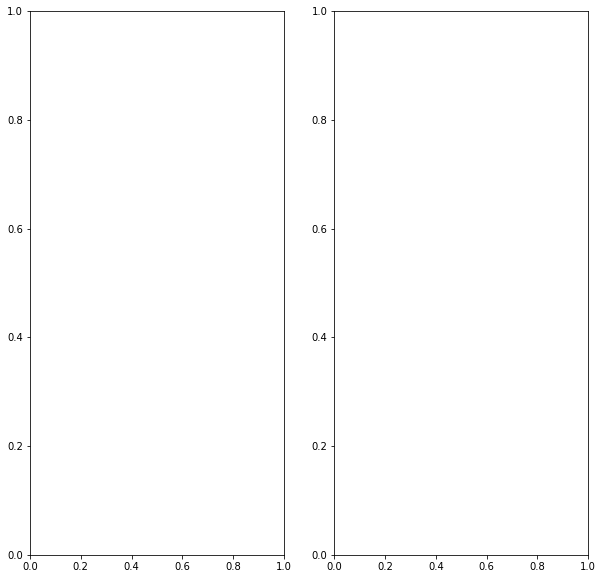

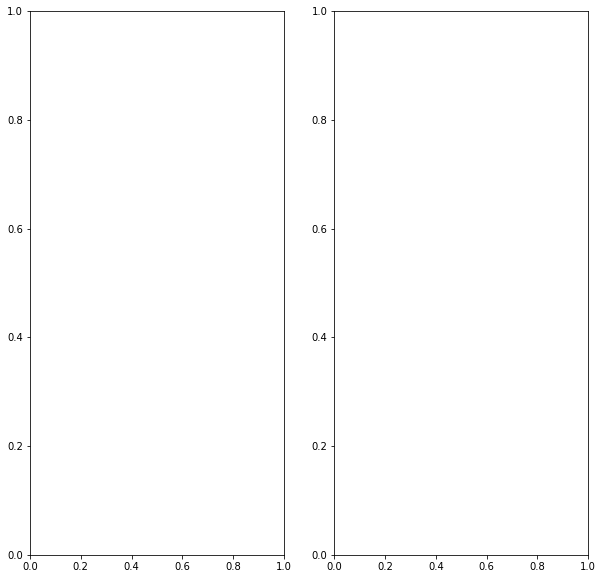

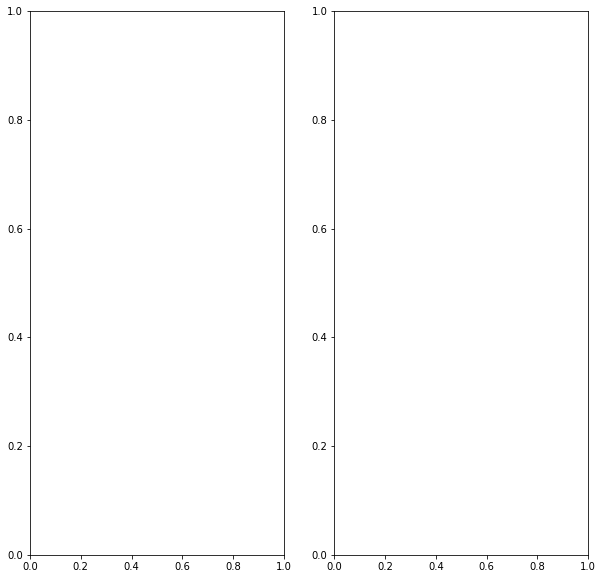

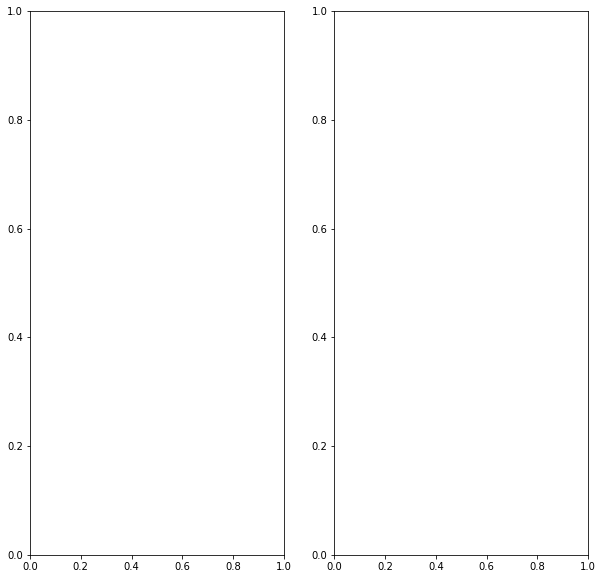

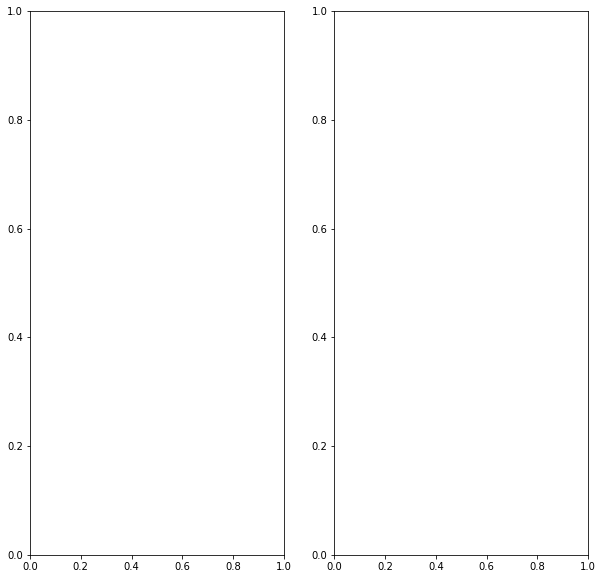

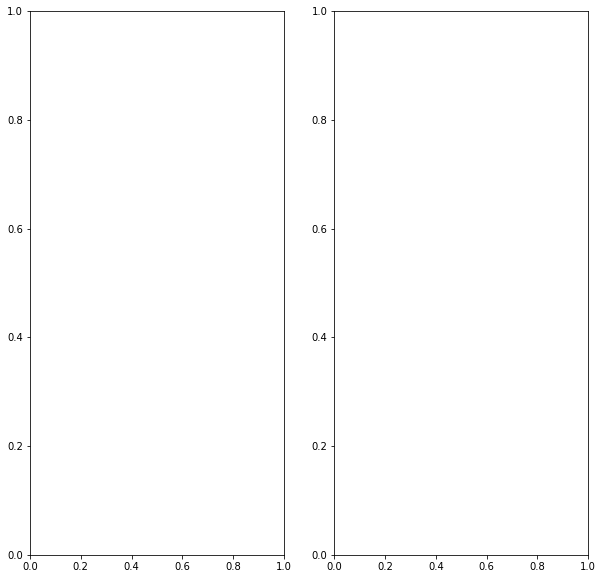

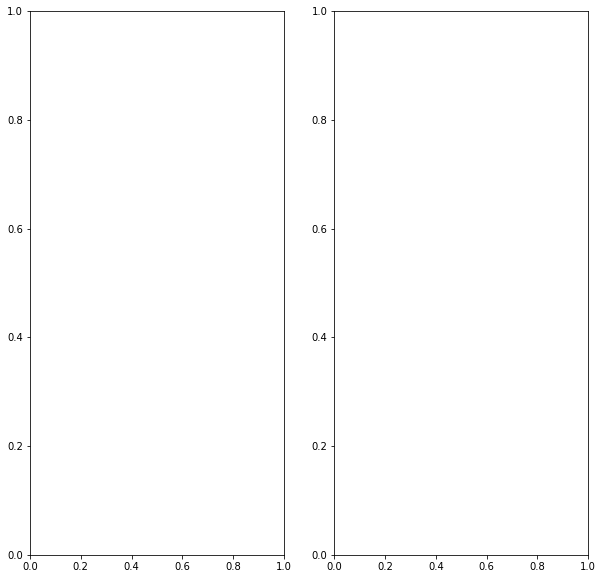

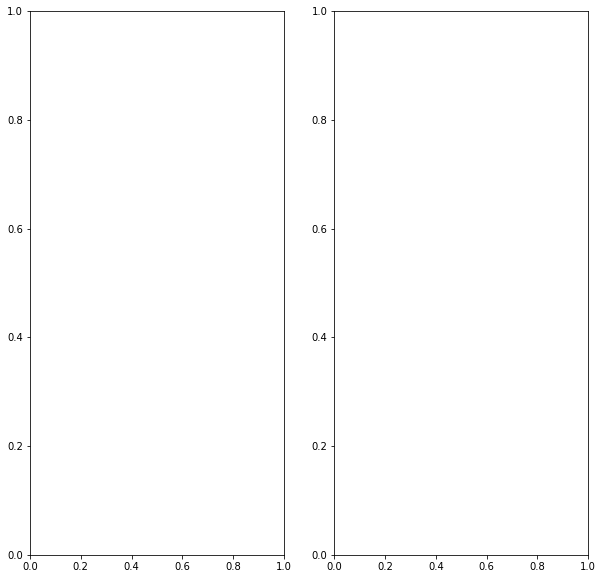

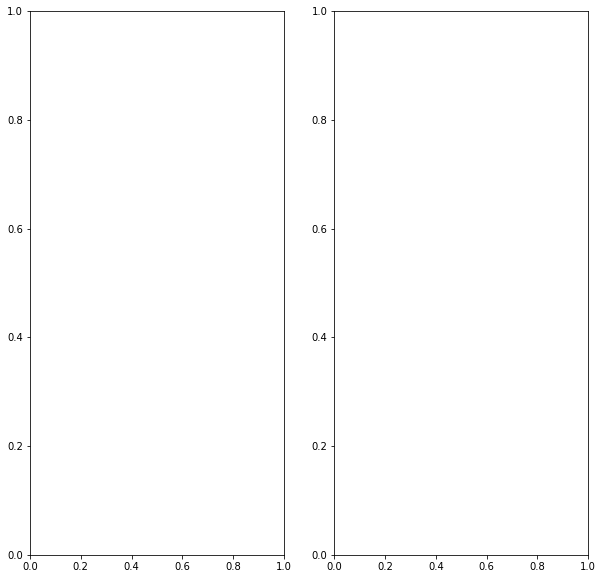

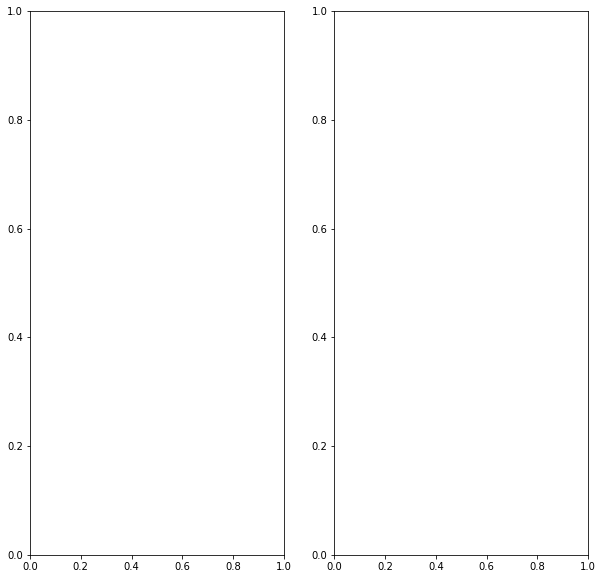

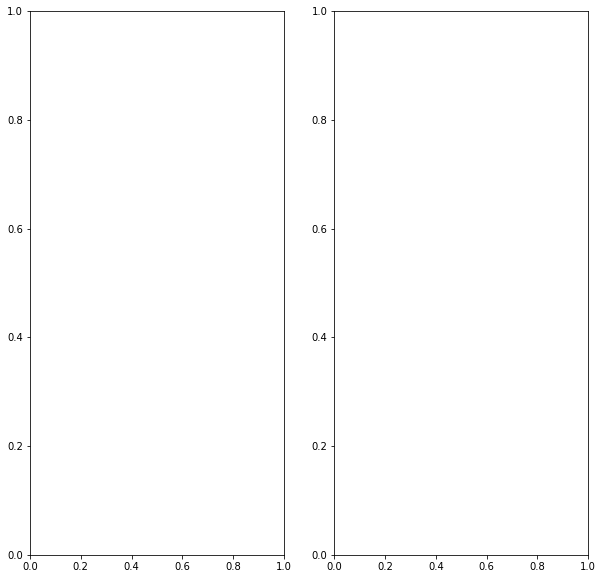

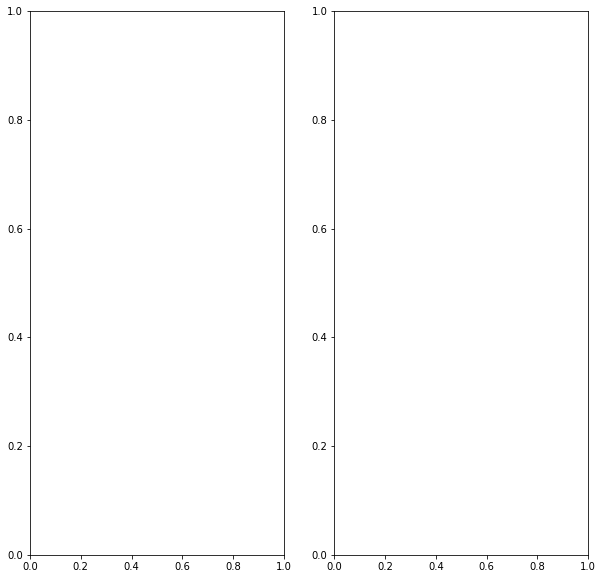

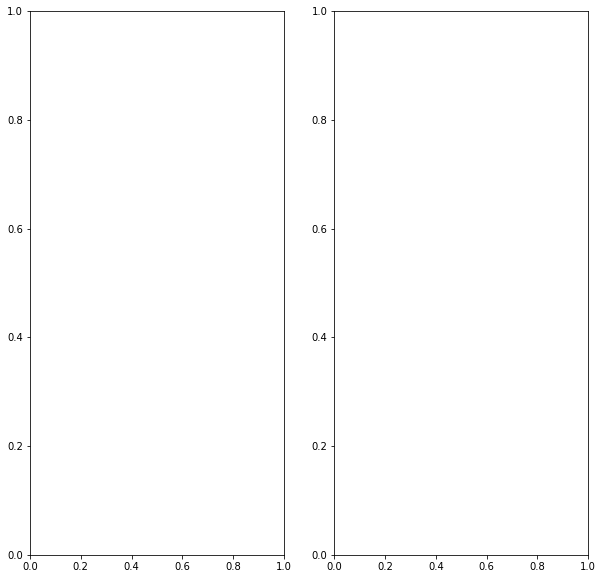

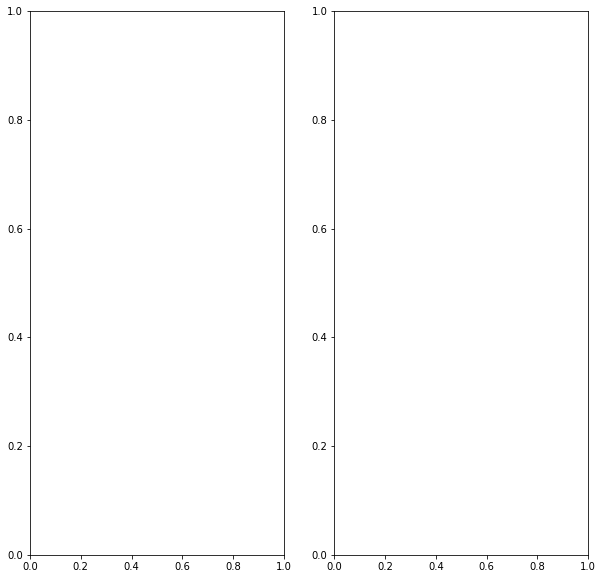

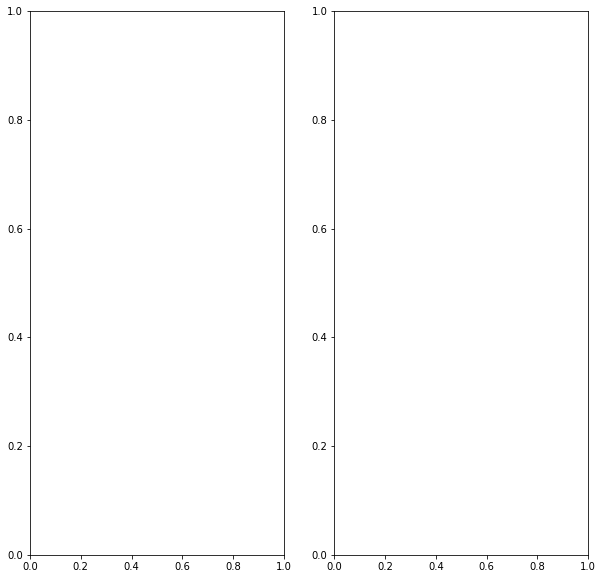

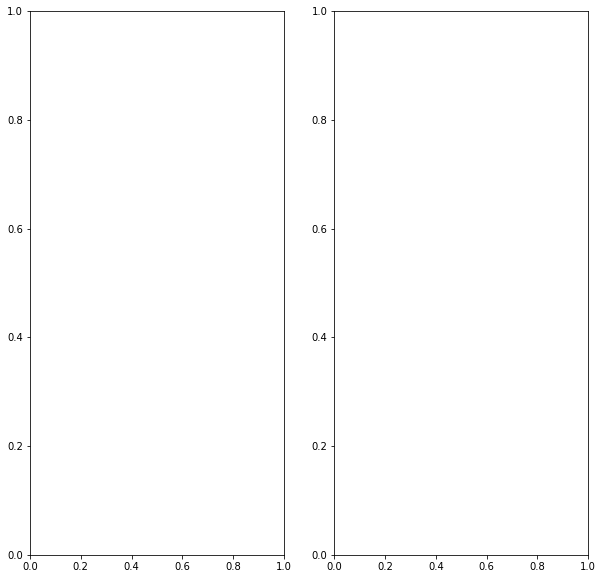

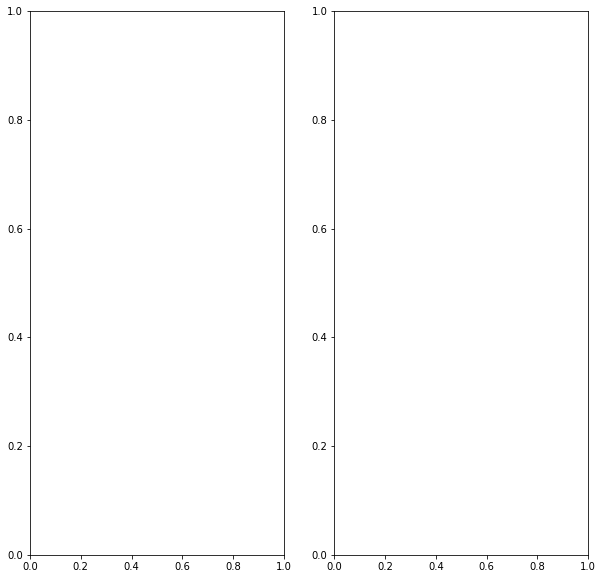

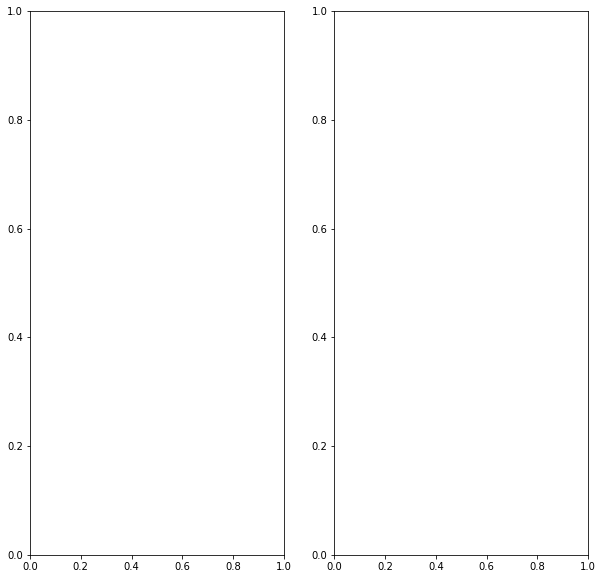

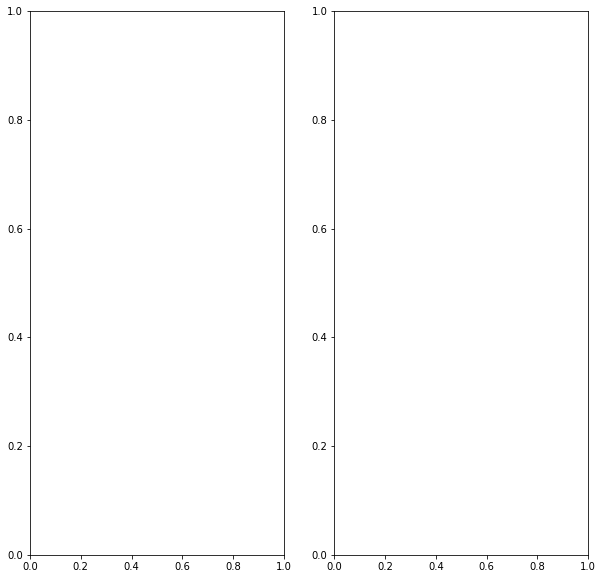

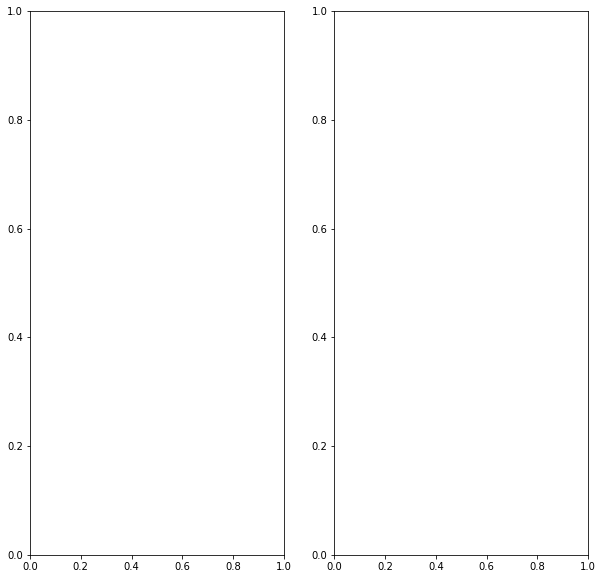

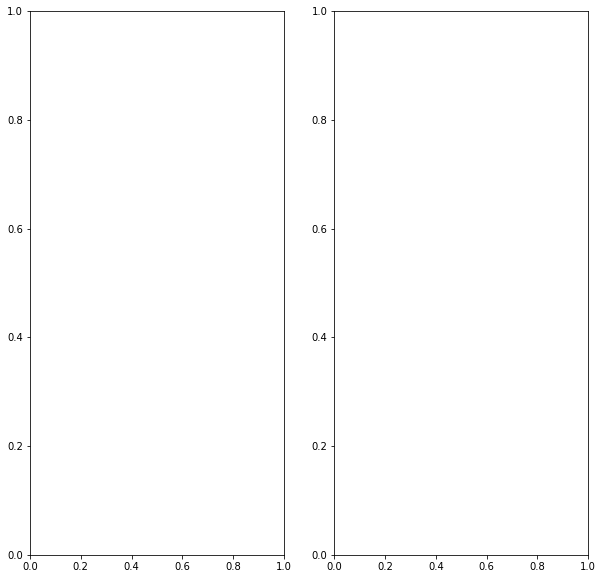

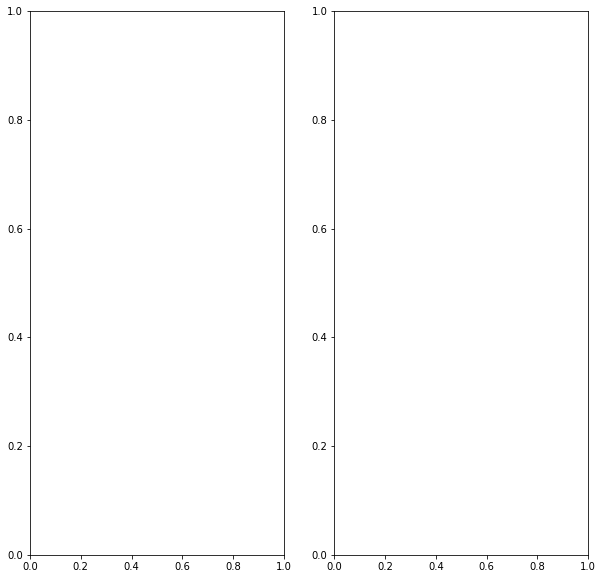

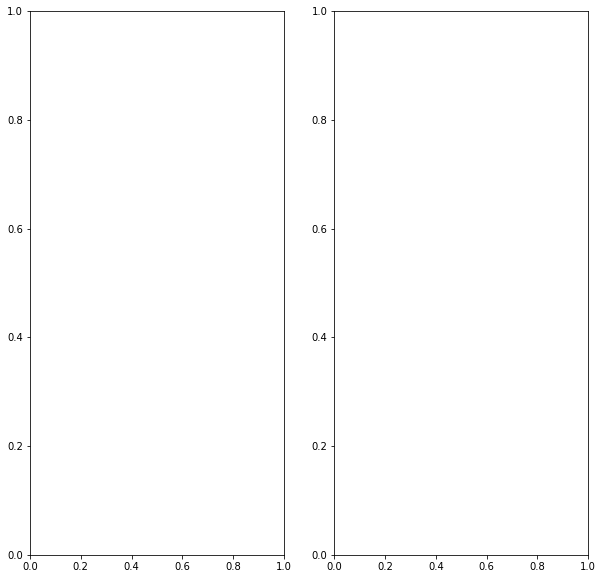

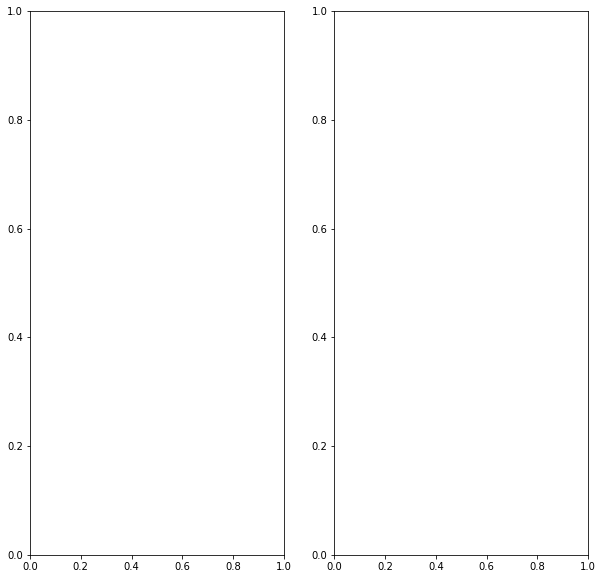

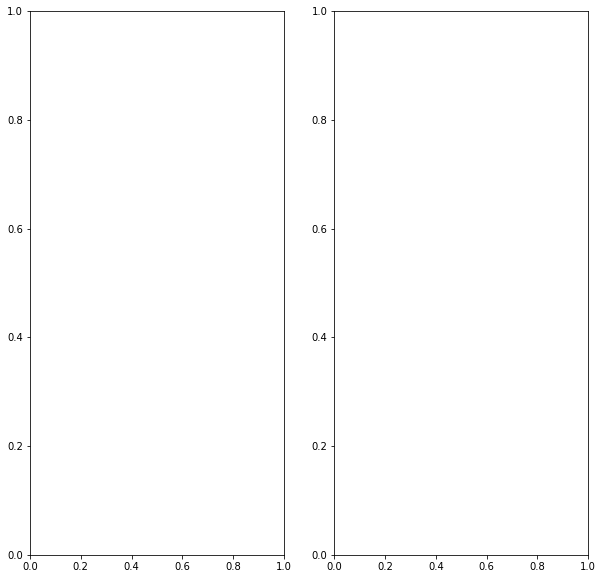

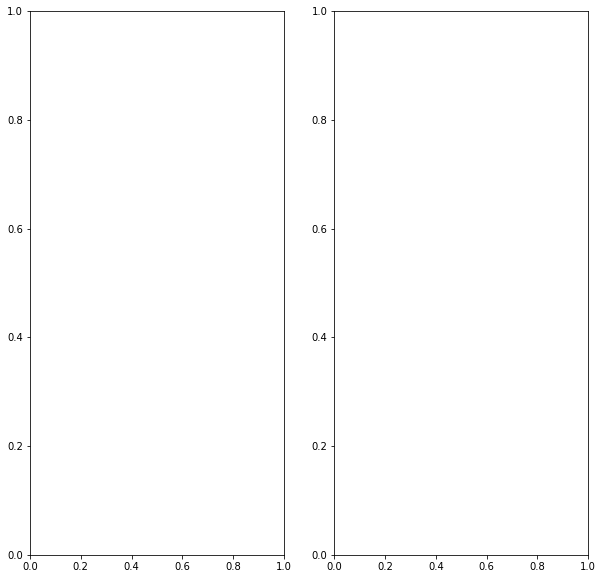

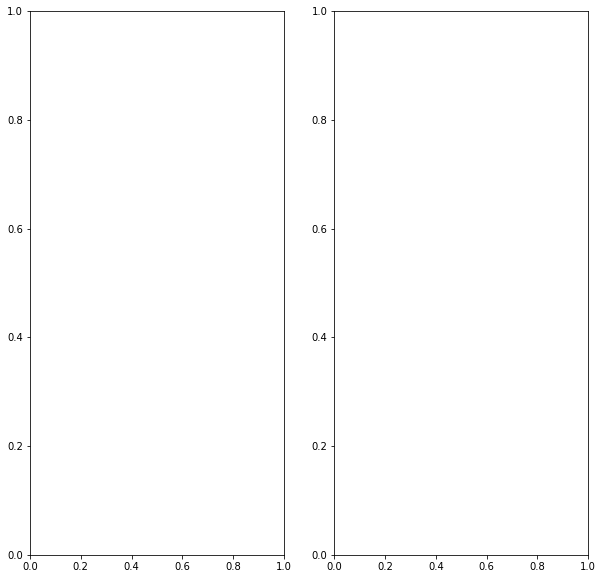

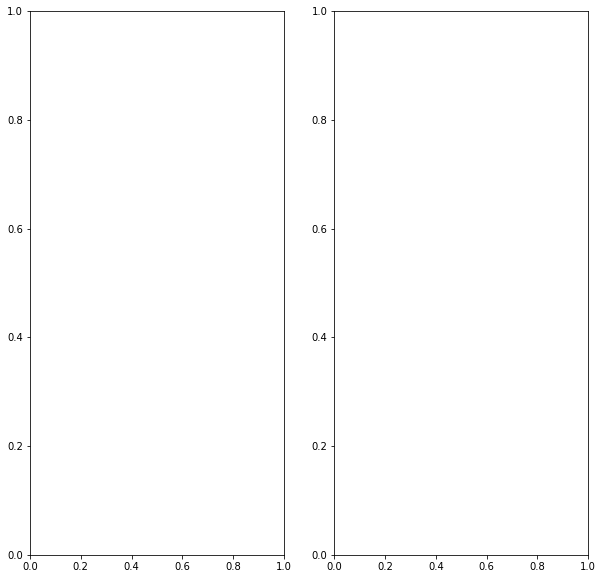

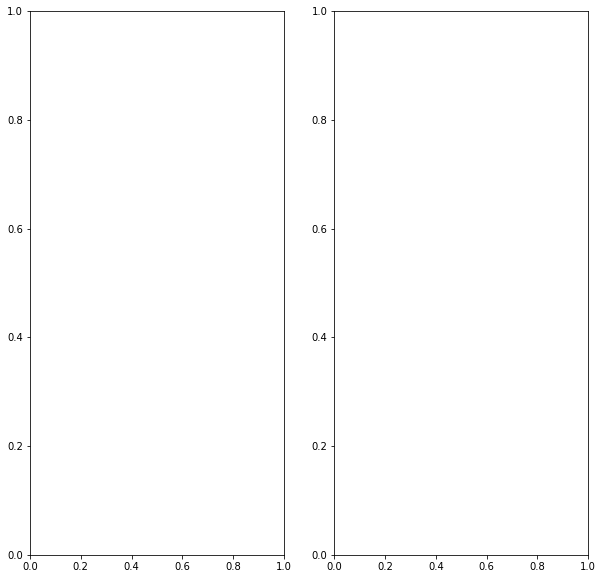

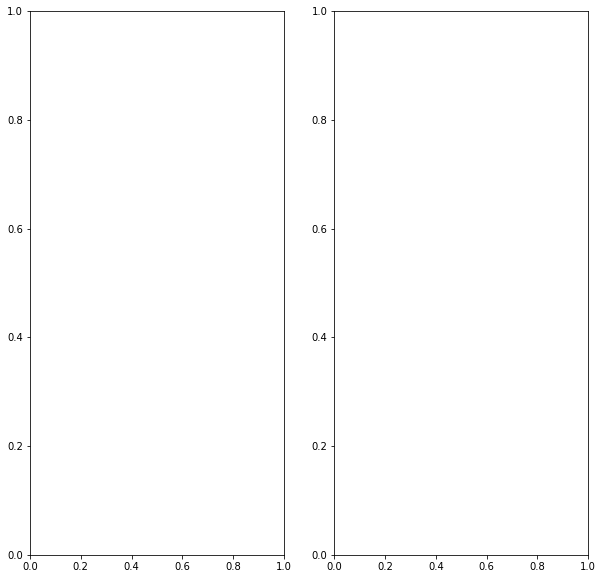

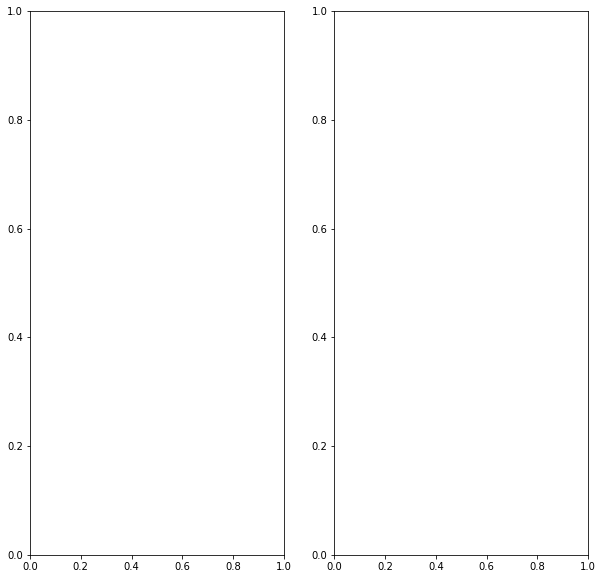

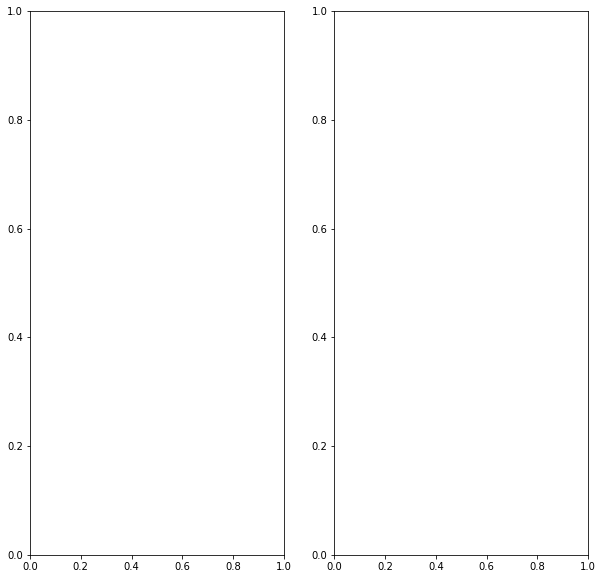

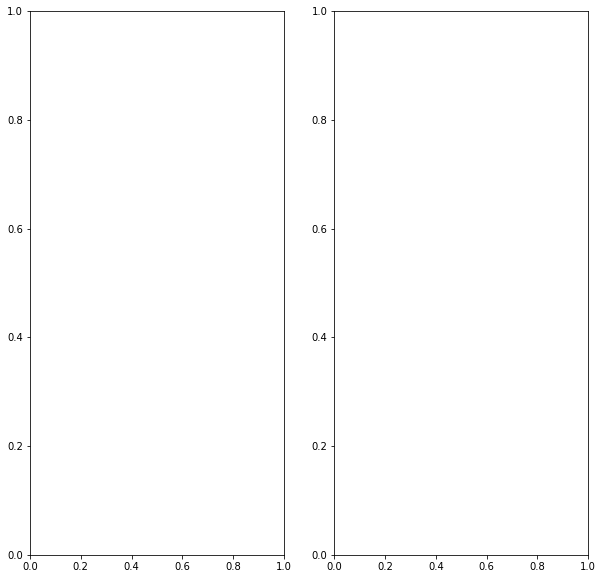

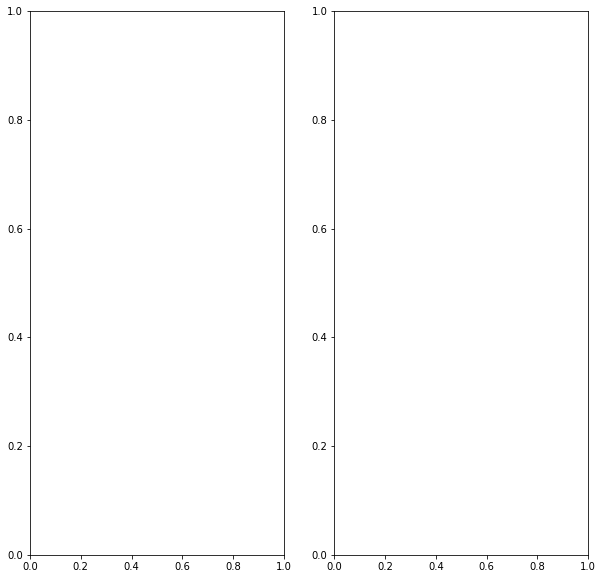

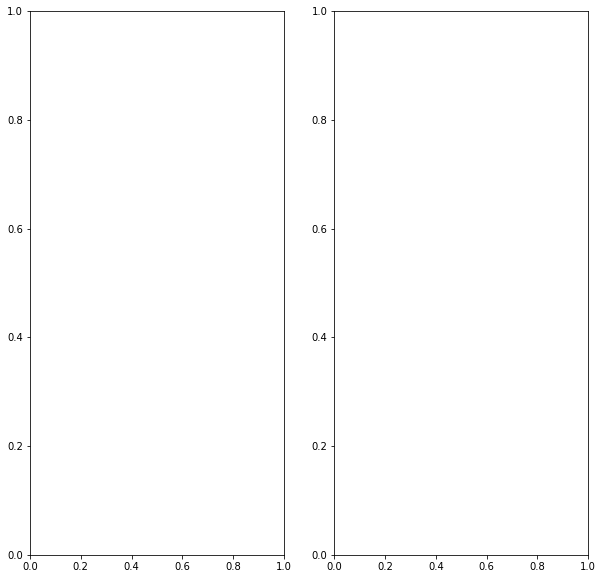

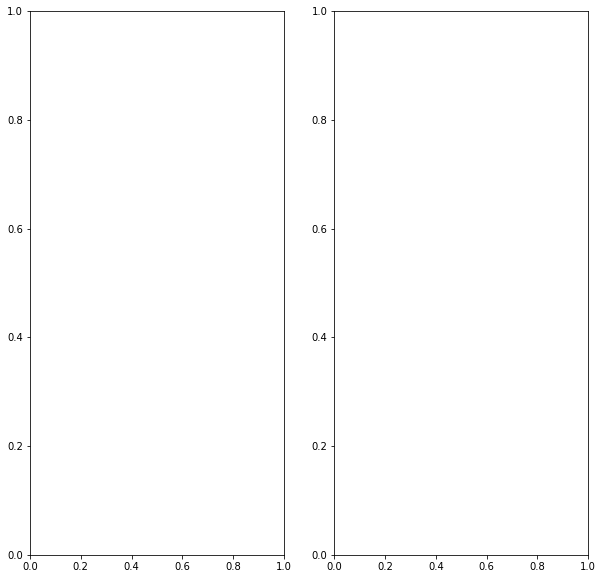

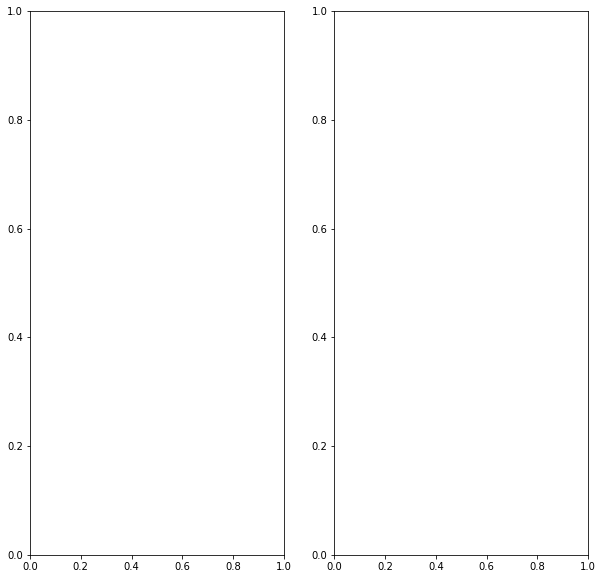

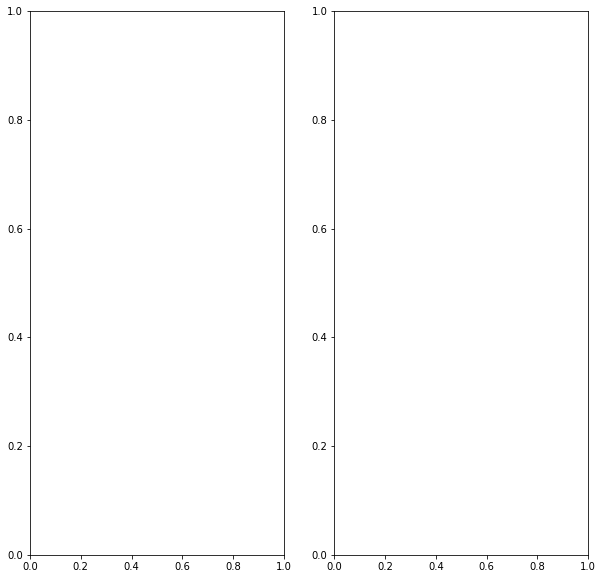

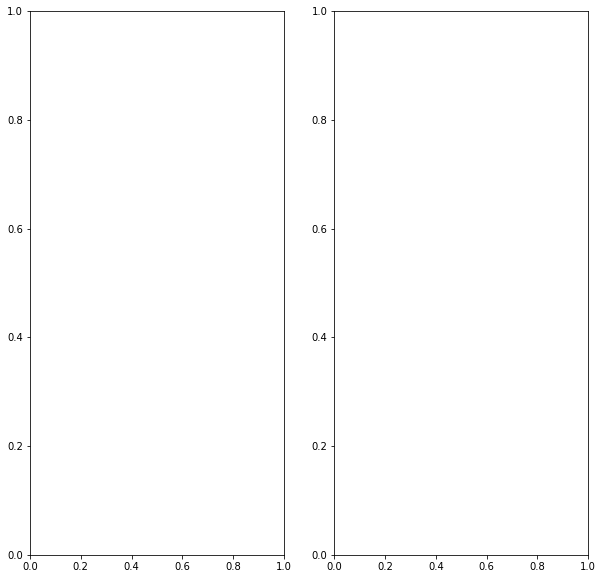

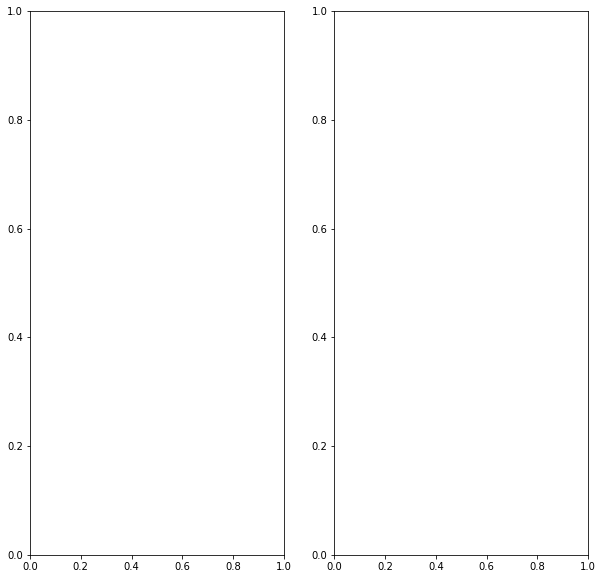

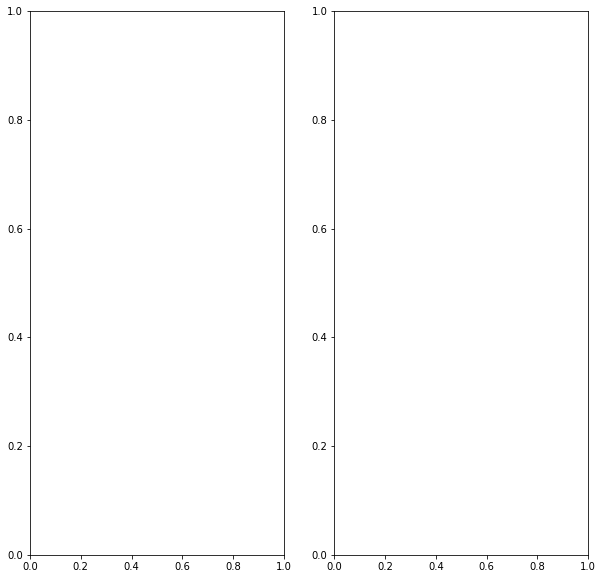

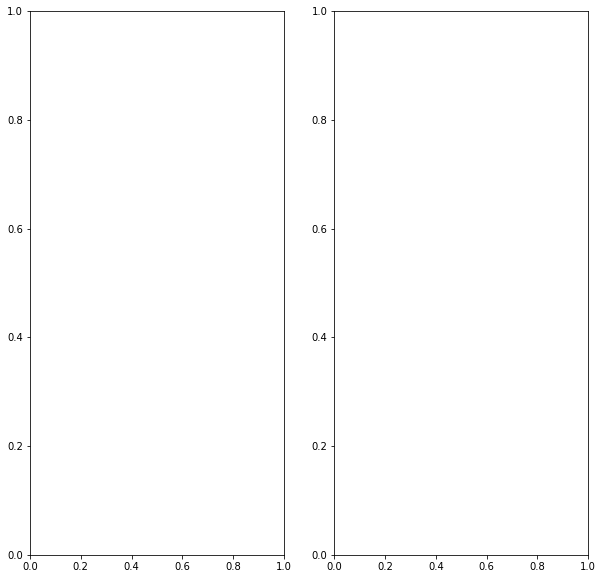

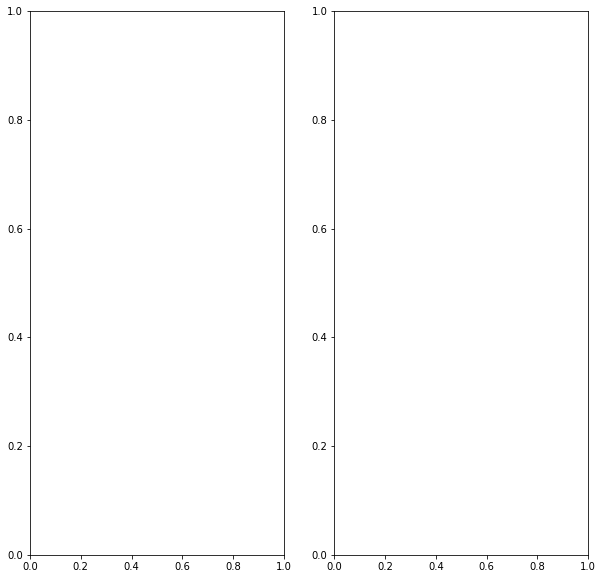

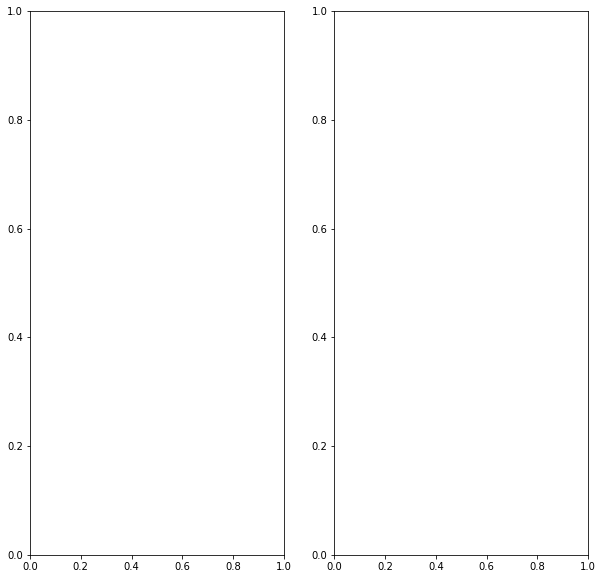

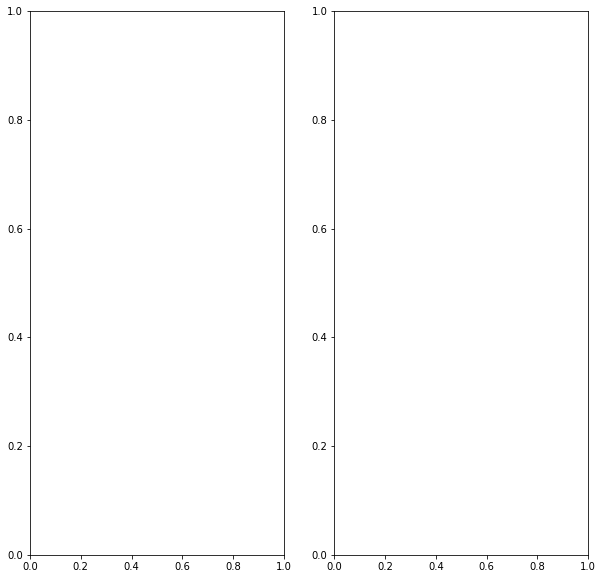

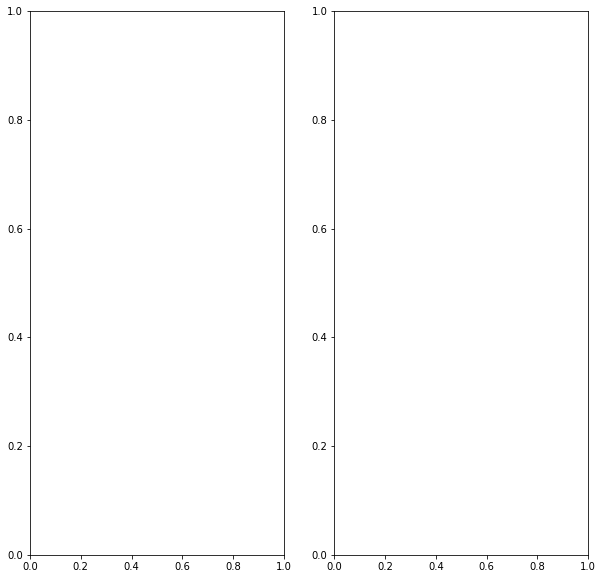

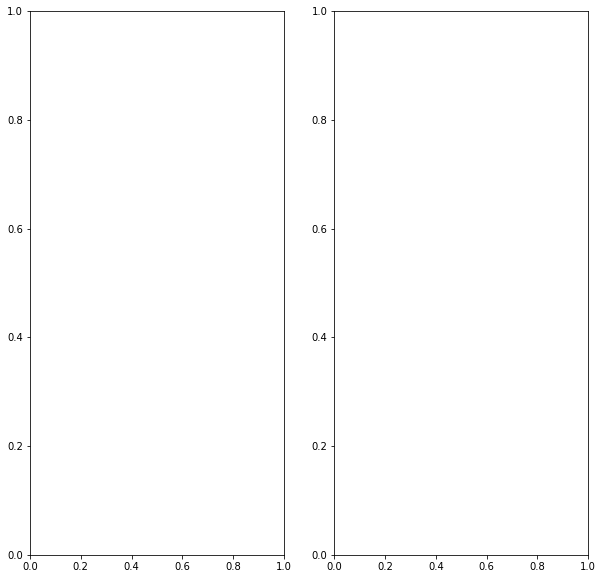

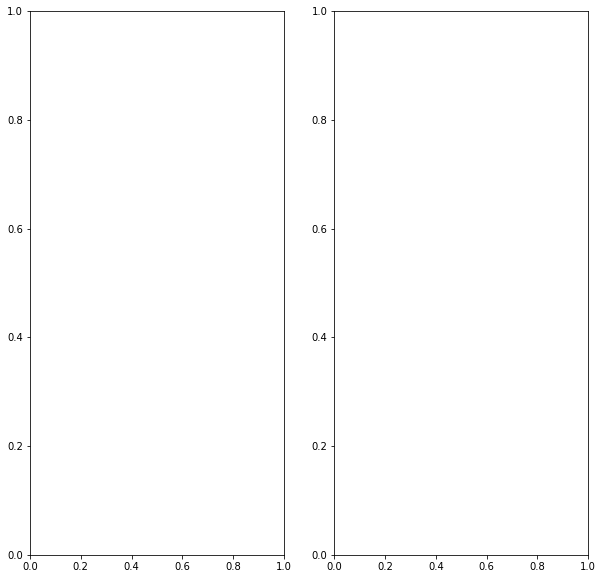

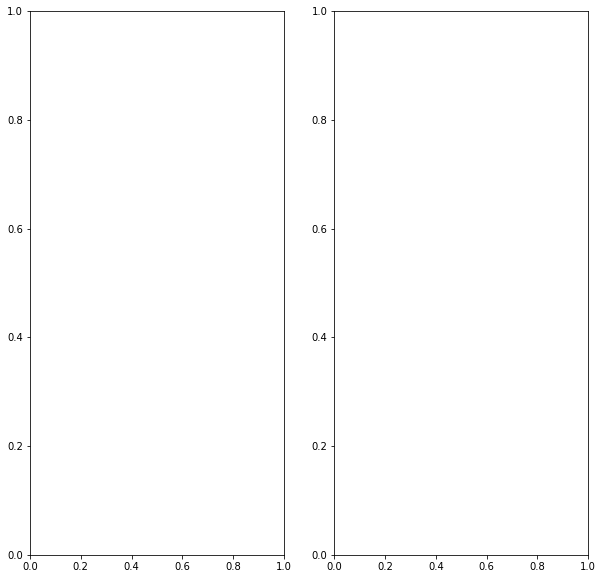

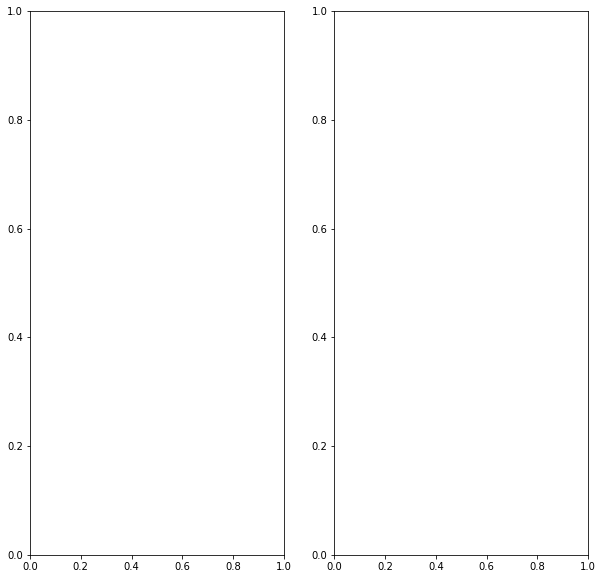

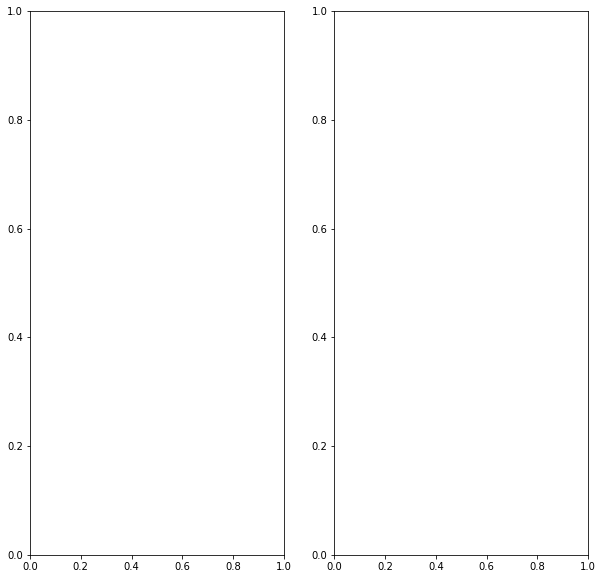

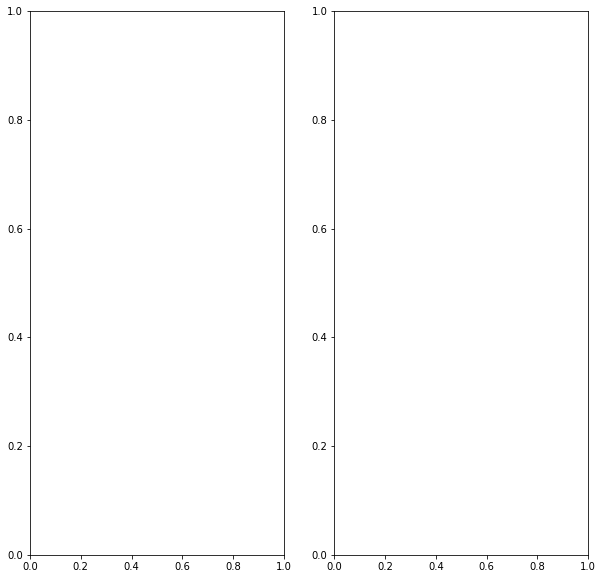

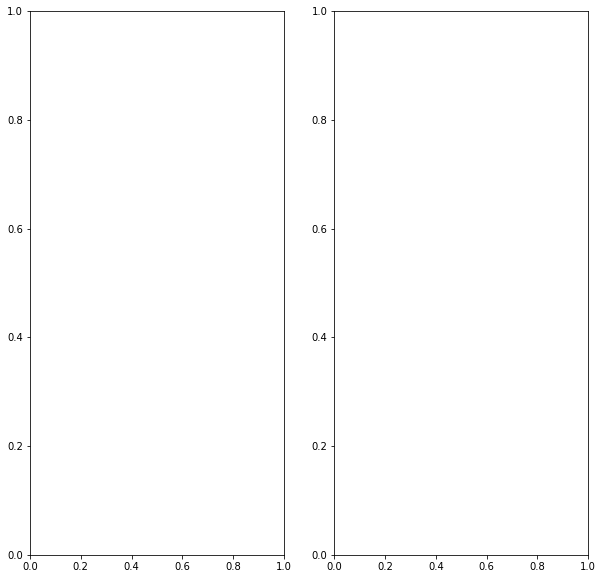

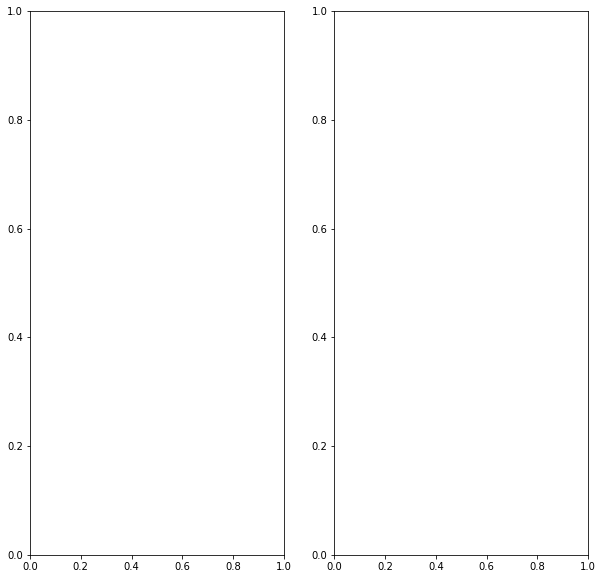

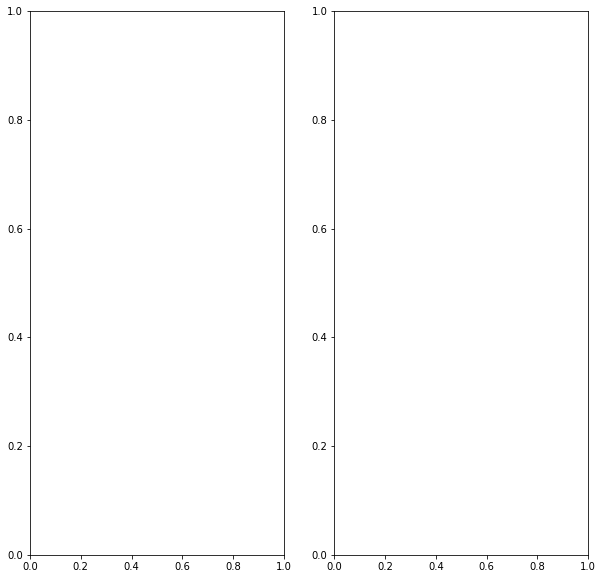

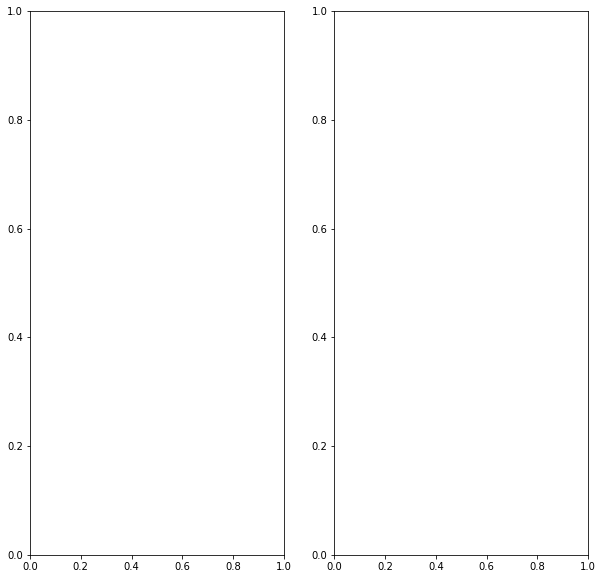

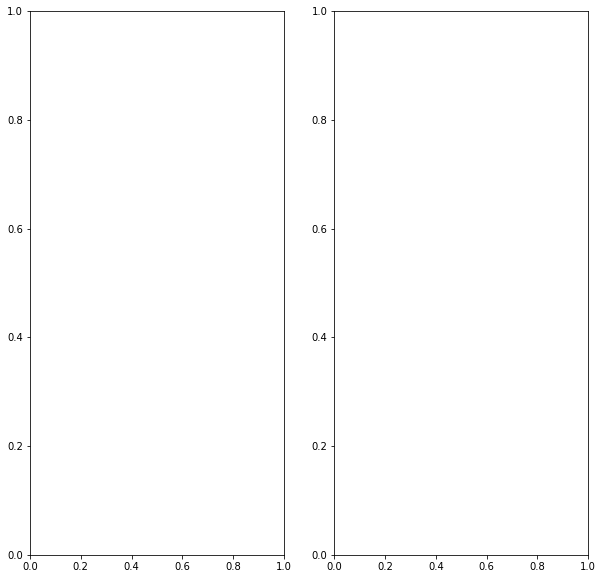

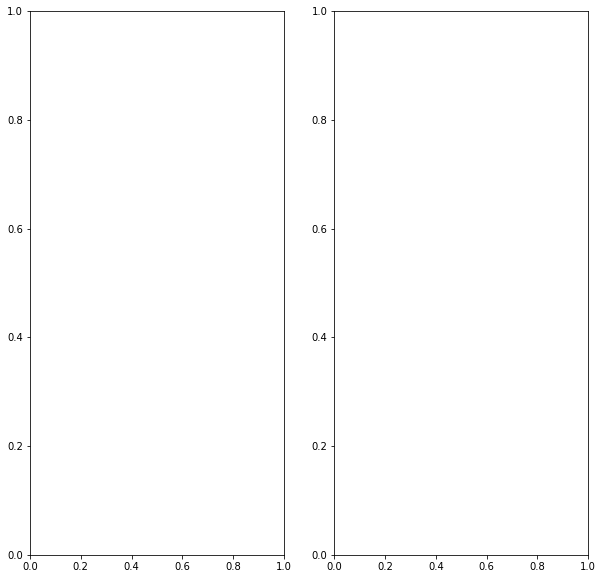

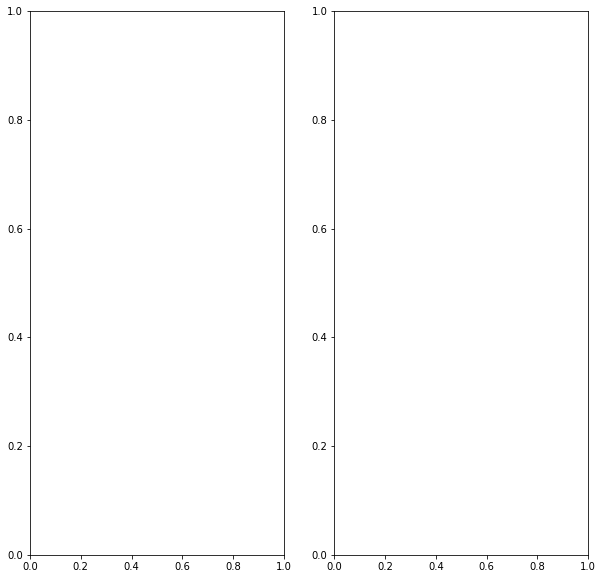

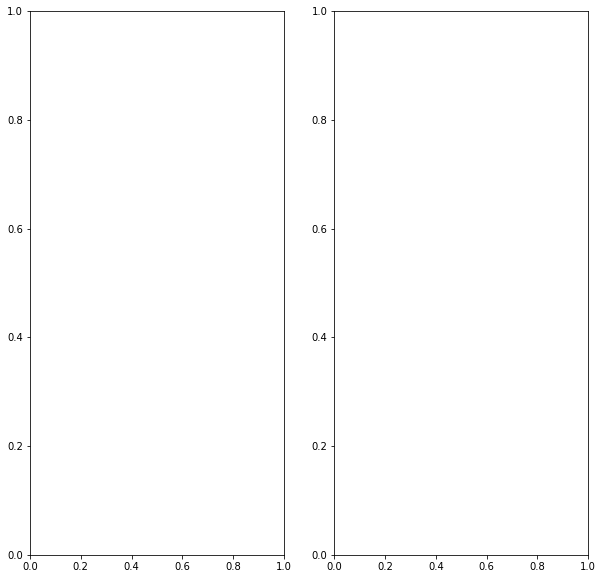

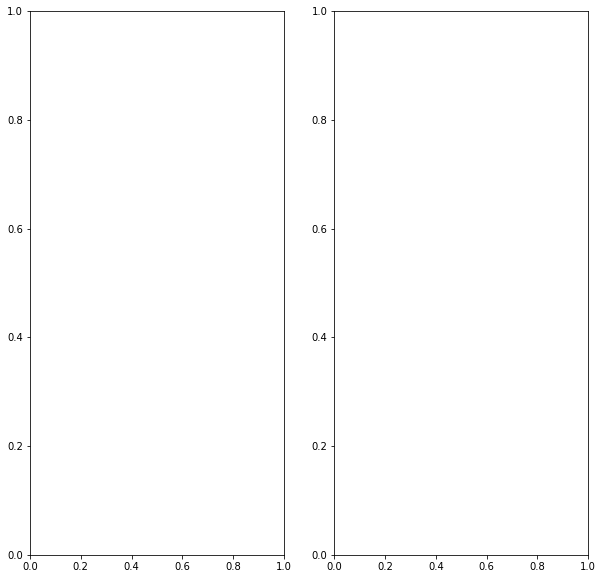

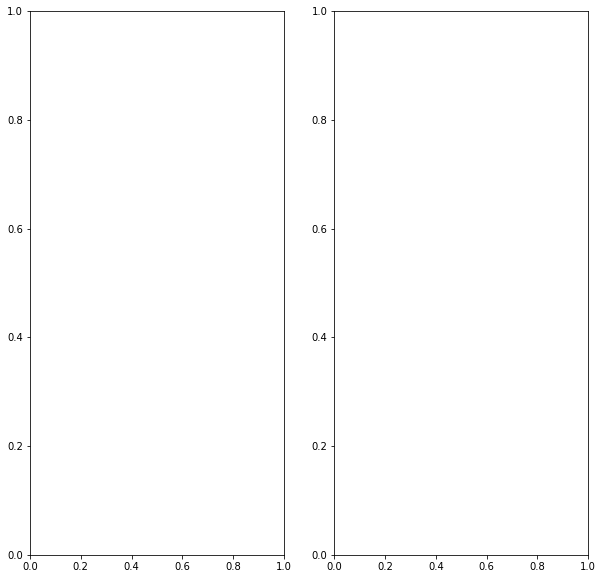

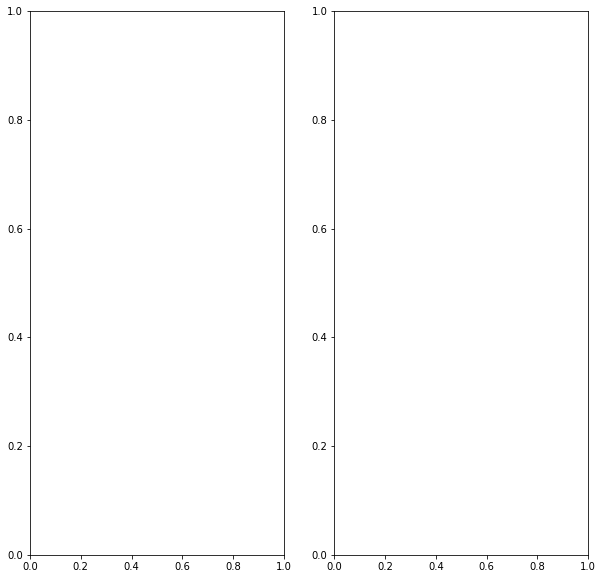

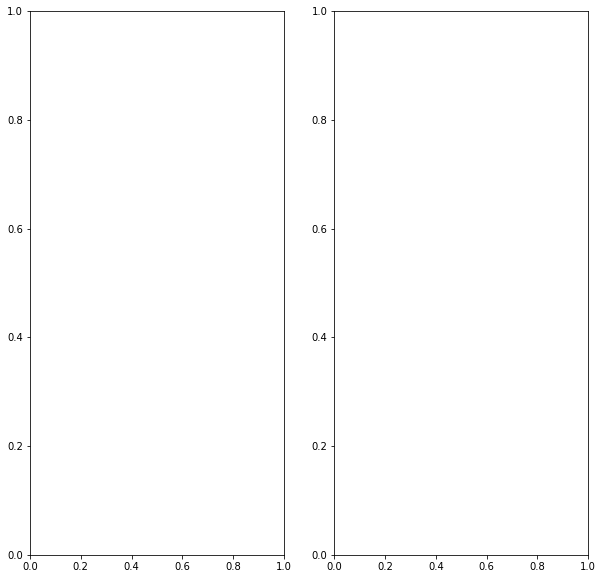

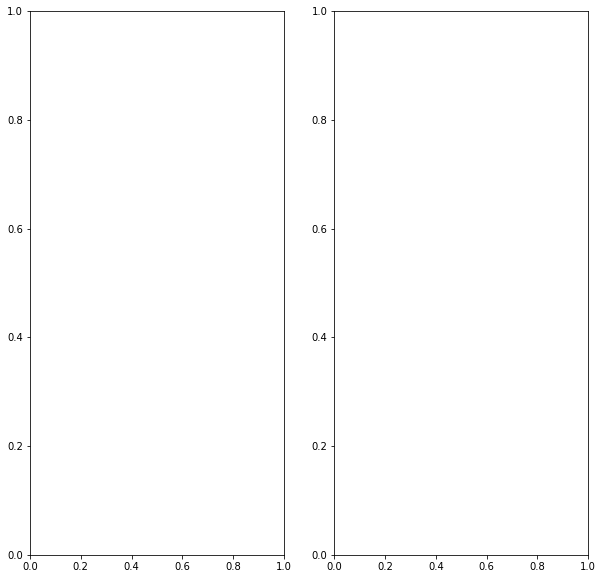

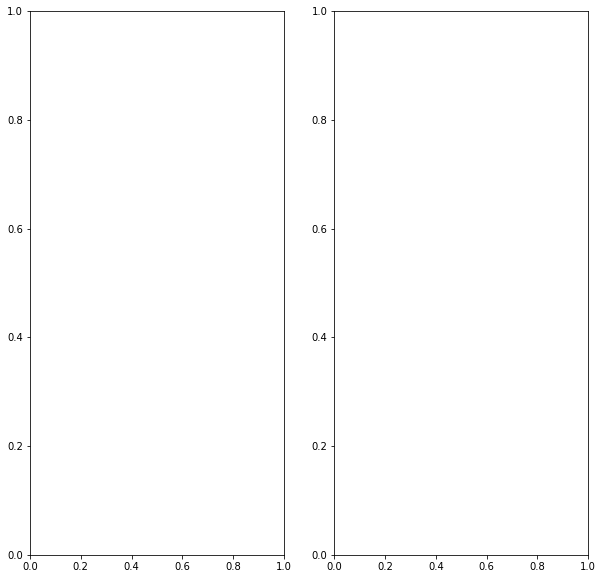

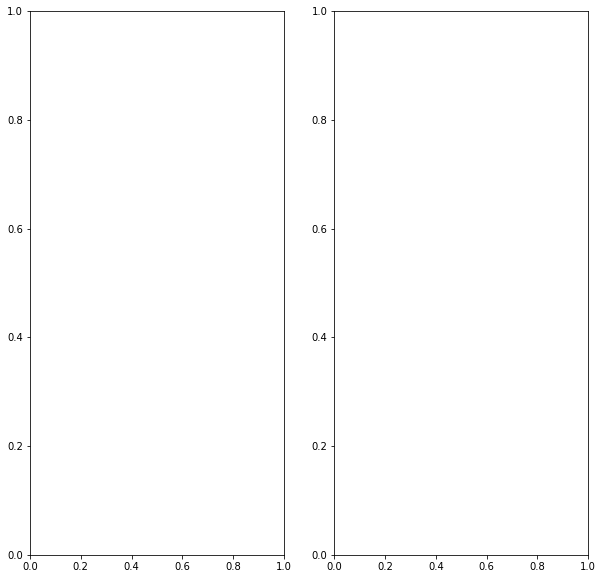

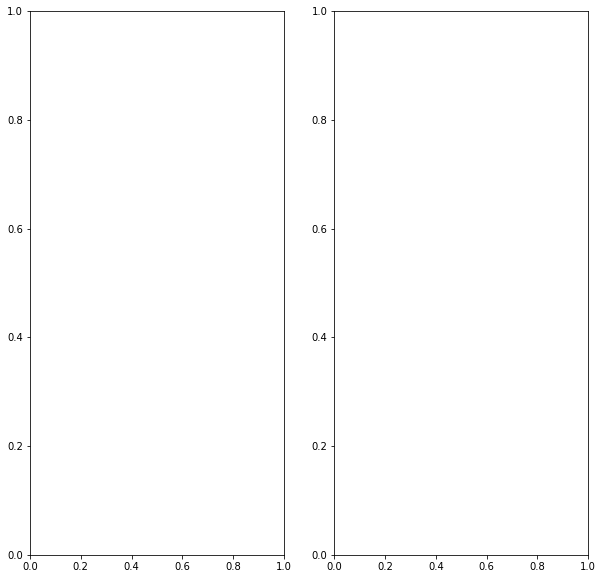

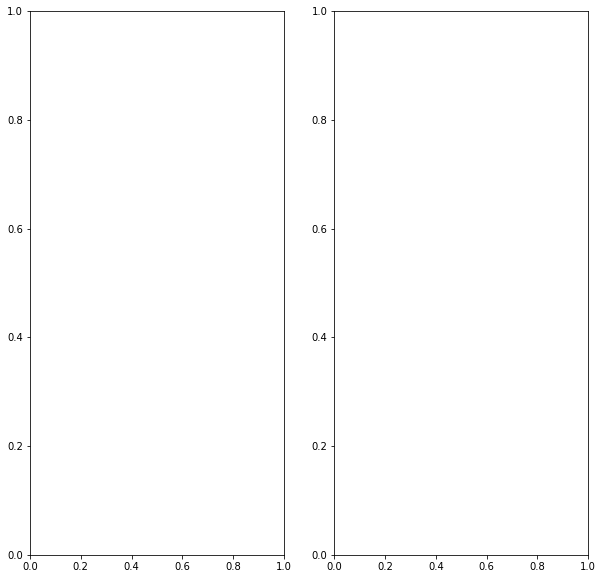

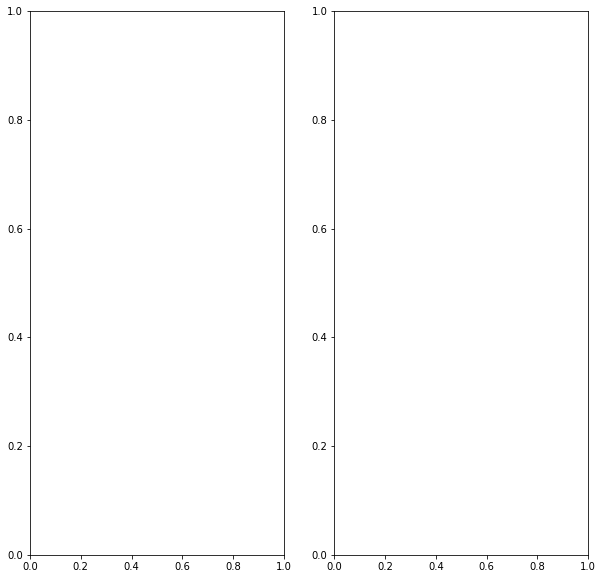

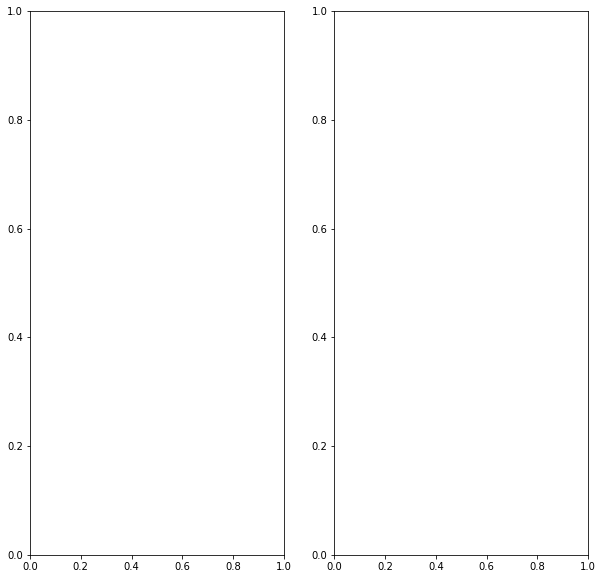

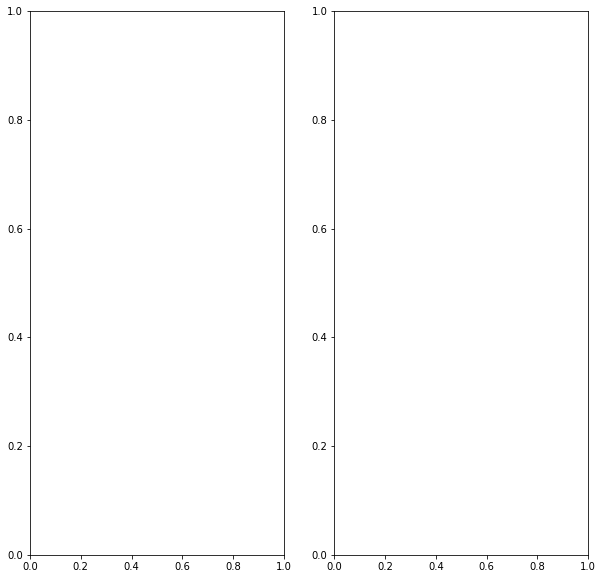

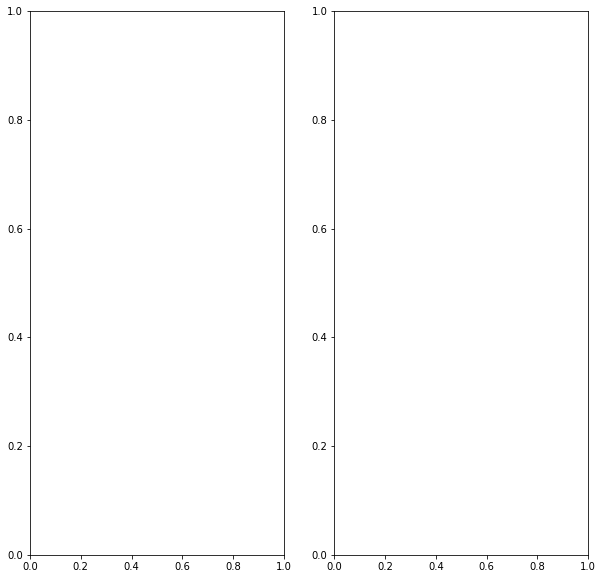

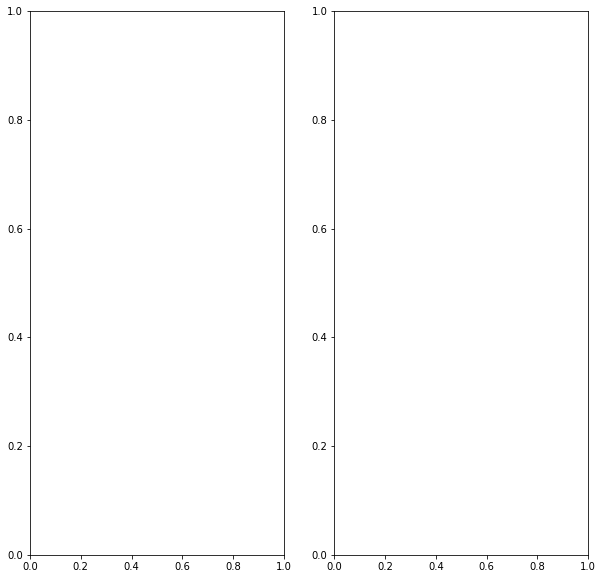

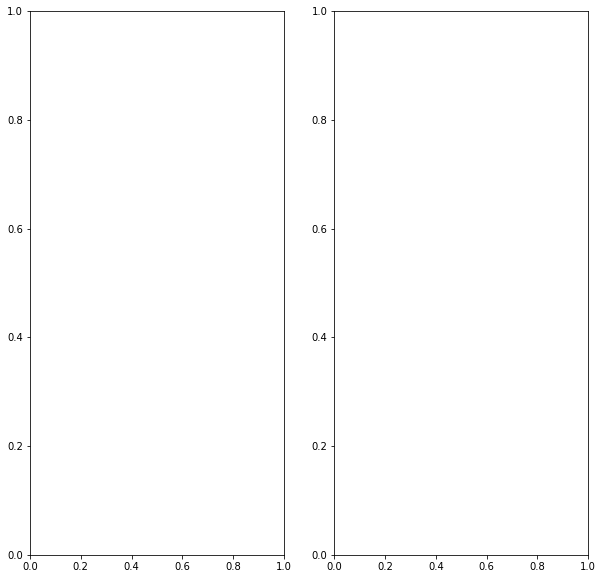

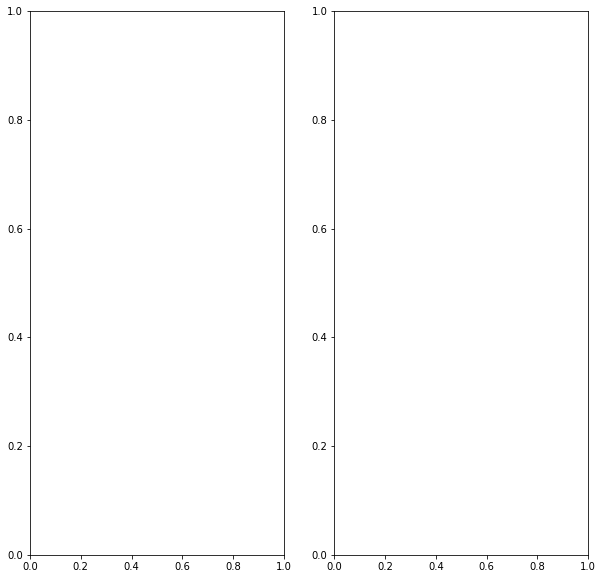

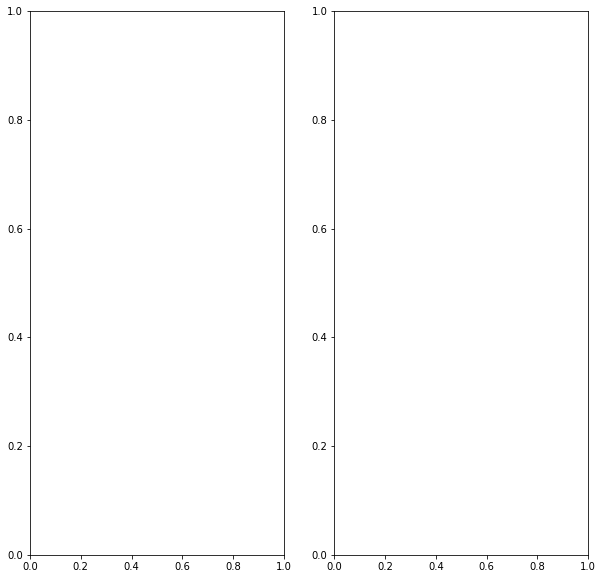

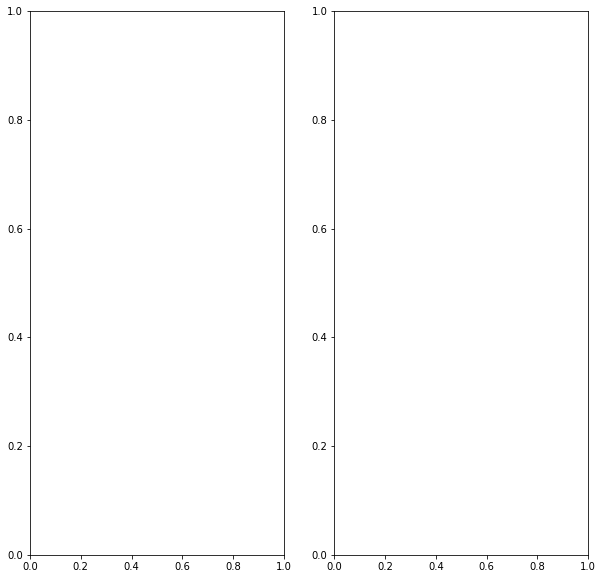

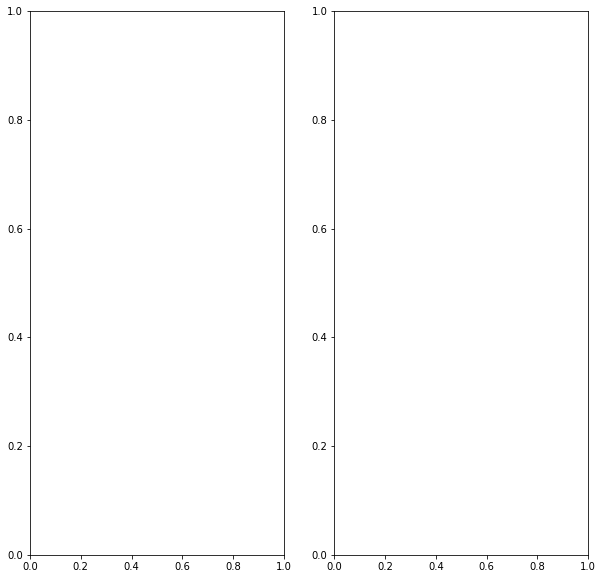

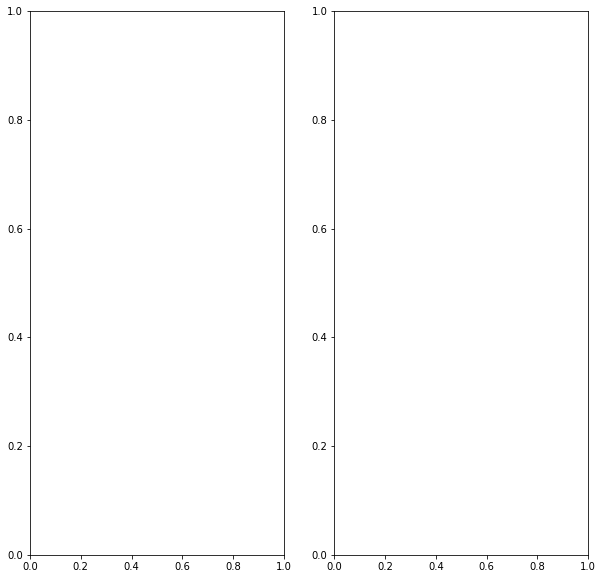

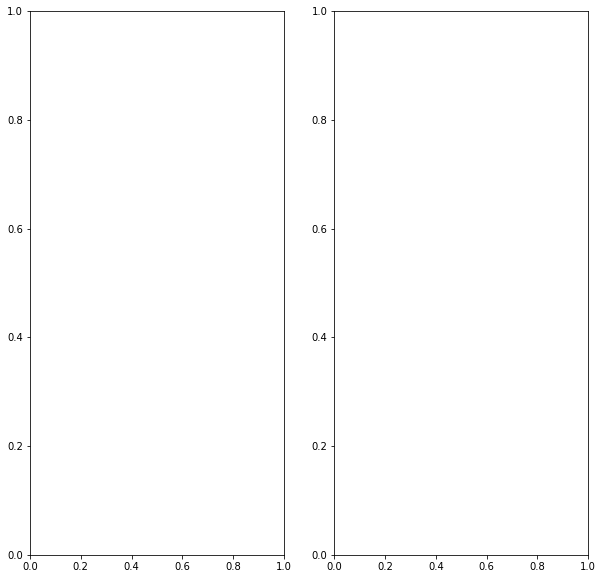

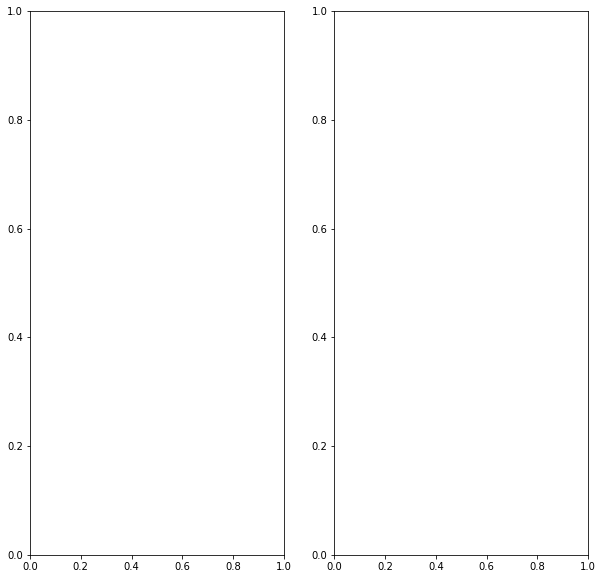

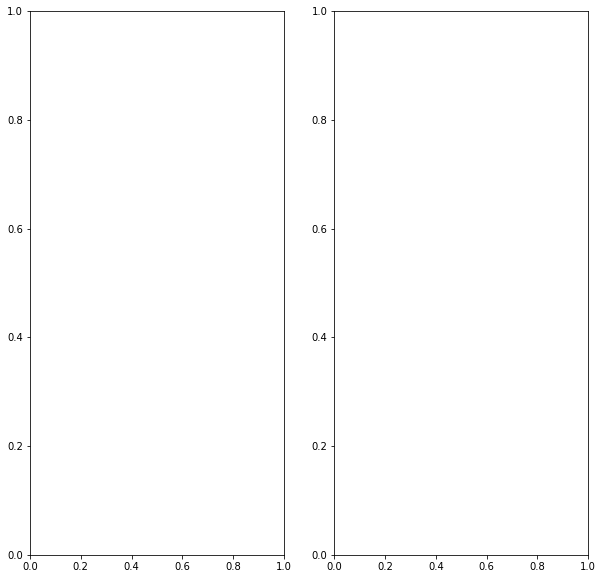

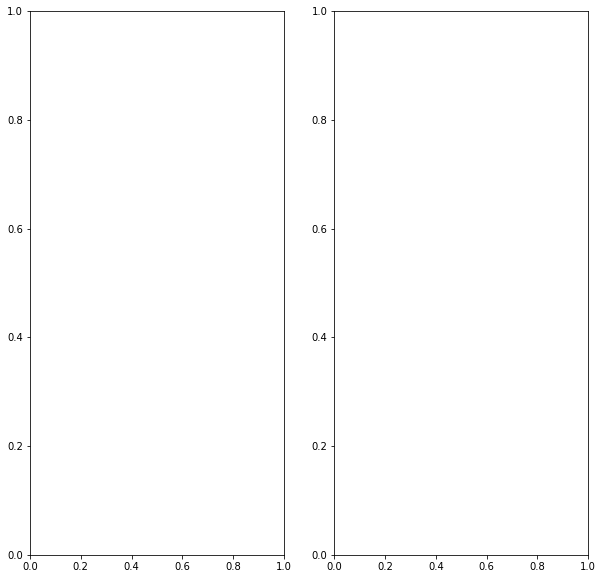

In [52]:
initial_img=[]
final_img=[]
import random
for i in range(len(samp_2)):

  degrees = 90
  img = np.array(Image.open(samp_2[i]))
  # img = img.sum(2) / (255*3) # converting to grayscale
  print(img.shape)
  fig = plt.figure(figsize=(10, 10))
  fig.add_subplot(1, 2, 1)
  #plt.imshow(img)
  initial_img.append(img)
  #plt.title("original")
  img0 = img.copy()
  for _ in range(degrees//90):
      img0 = img0.transpose(1, 0, 2)
      for j in range(0, img0.shape[1] // 2):
          c = img0[:, j, :].copy()
          img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
          img0[: , img0.shape[1]-j-1, :] = c
  fig.add_subplot(1, 2, 2)
  #plt.imshow(img0)
  final_img.append(img0)
  #plt.title("rotated")
  im_i=np.array(initial_img)
  im_f=np.array(final_img)


print(im_i.shape)
print(im_f.shape)

In [53]:
from PIL import Image
i=0
for im in im_i:
  
  print(im.shape)
  img=np.array(im)
  img = img.astype(np.uint8)
  img = Image.fromarray(img)
  fname="f"+str(i)+".jpeg"
  #print(y_res[i])
  print(fname)
  img_path="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Data_Augmentation/Stage_1"
  image = img.save(f"{img_path}/{fname}")
  #img_path_1="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Non_cancerous"
  #img_path_2="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_1"
  #img_path_3="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_2"
  #img_path_4="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_3"
  #if y_res[i]==0:
  #  image = img.save(f"{img_path_1}/{fname}")
  #elif y_res[i]==1 or y_res[i]==2:
  #  image = img.save(f"{img_path_2}/{fname}")
  #elif y_res[i]==3:
  #  image = img.save(f"{img_path_3}/{fname}")
  #elif y_res[i]==4:
  #  image = img.save(f"{img_path_4}/{fname}")
  #img.save(fname)
  i=i+1

(1200, 1600, 3)
f0.jpeg
(1200, 1600, 3)
f1.jpeg
(1200, 1600, 3)
f2.jpeg
(1200, 1600, 3)
f3.jpeg
(1200, 1600, 3)
f4.jpeg
(1200, 1600, 3)
f5.jpeg
(1200, 1600, 3)
f6.jpeg
(1200, 1600, 3)
f7.jpeg
(1200, 1600, 3)
f8.jpeg
(1200, 1600, 3)
f9.jpeg
(1200, 1600, 3)
f10.jpeg
(1200, 1600, 3)
f11.jpeg
(1200, 1600, 3)
f12.jpeg
(1200, 1600, 3)
f13.jpeg
(1200, 1600, 3)
f14.jpeg
(1200, 1600, 3)
f15.jpeg
(1200, 1600, 3)
f16.jpeg
(1200, 1600, 3)
f17.jpeg
(1200, 1600, 3)
f18.jpeg
(1200, 1600, 3)
f19.jpeg
(1200, 1600, 3)
f20.jpeg
(1200, 1600, 3)
f21.jpeg
(1200, 1600, 3)
f22.jpeg
(1200, 1600, 3)
f23.jpeg
(1200, 1600, 3)
f24.jpeg
(1200, 1600, 3)
f25.jpeg
(1200, 1600, 3)
f26.jpeg
(1200, 1600, 3)
f27.jpeg
(1200, 1600, 3)
f28.jpeg
(1200, 1600, 3)
f29.jpeg
(1200, 1600, 3)
f30.jpeg
(1200, 1600, 3)
f31.jpeg
(1200, 1600, 3)
f32.jpeg
(1200, 1600, 3)
f33.jpeg
(1200, 1600, 3)
f34.jpeg
(1200, 1600, 3)
f35.jpeg
(1200, 1600, 3)
f36.jpeg
(1200, 1600, 3)
f37.jpeg
(1200, 1600, 3)
f38.jpeg
(1200, 1600, 3)
f39.jpeg
(1200, 160

In [55]:
from PIL import Image
i=0
for im in im_f:
  
  print(im.shape)
  img=np.array(im)
  img = img.astype(np.uint8)
  img = Image.fromarray(img)
  fname="f"+str(i)+".jpeg"
  #print(y_res[i])
  print(fname)
  img_path="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Data_Augmentation/Stage_1"
  image = img.save(f"{img_path}/{fname}")
  #img_path_1="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Non_cancerous"
  #img_path_2="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_1"
  #img_path_3="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_2"
  #img_path_4="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_3"
  #if y_res[i]==0:
  #  image = img.save(f"{img_path_1}/{fname}")
  #elif y_res[i]==1 or y_res[i]==2:
  #  image = img.save(f"{img_path_2}/{fname}")
  #elif y_res[i]==3:
  #  image = img.save(f"{img_path_3}/{fname}")
  #elif y_res[i]==4:
  #  image = img.save(f"{img_path_4}/{fname}")
  #img.save(fname)
  i=i+1

(1600, 1200, 3)
f0.jpeg
(1600, 1200, 3)
f1.jpeg
(1600, 1200, 3)
f2.jpeg
(1600, 1200, 3)
f3.jpeg
(1600, 1200, 3)
f4.jpeg
(1600, 1200, 3)
f5.jpeg
(1600, 1200, 3)
f6.jpeg
(1600, 1200, 3)
f7.jpeg
(1600, 1200, 3)
f8.jpeg
(1600, 1200, 3)
f9.jpeg
(1600, 1200, 3)
f10.jpeg
(1600, 1200, 3)
f11.jpeg
(1600, 1200, 3)
f12.jpeg
(1600, 1200, 3)
f13.jpeg
(1600, 1200, 3)
f14.jpeg
(1600, 1200, 3)
f15.jpeg
(1600, 1200, 3)
f16.jpeg
(1600, 1200, 3)
f17.jpeg
(1600, 1200, 3)
f18.jpeg
(1600, 1200, 3)
f19.jpeg
(1600, 1200, 3)
f20.jpeg
(1600, 1200, 3)
f21.jpeg
(1600, 1200, 3)
f22.jpeg
(1600, 1200, 3)
f23.jpeg
(1600, 1200, 3)
f24.jpeg
(1600, 1200, 3)
f25.jpeg
(1600, 1200, 3)
f26.jpeg
(1600, 1200, 3)
f27.jpeg
(1600, 1200, 3)
f28.jpeg
(1600, 1200, 3)
f29.jpeg
(1600, 1200, 3)
f30.jpeg
(1600, 1200, 3)
f31.jpeg
(1600, 1200, 3)
f32.jpeg
(1600, 1200, 3)
f33.jpeg
(1600, 1200, 3)
f34.jpeg
(1600, 1200, 3)
f35.jpeg
(1600, 1200, 3)
f36.jpeg
(1600, 1200, 3)
f37.jpeg
(1600, 1200, 3)
f38.jpeg
(1600, 1200, 3)
f39.jpeg
(1600, 120

(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(80, 1200, 1600, 3)
(80, 1600, 1200, 3)


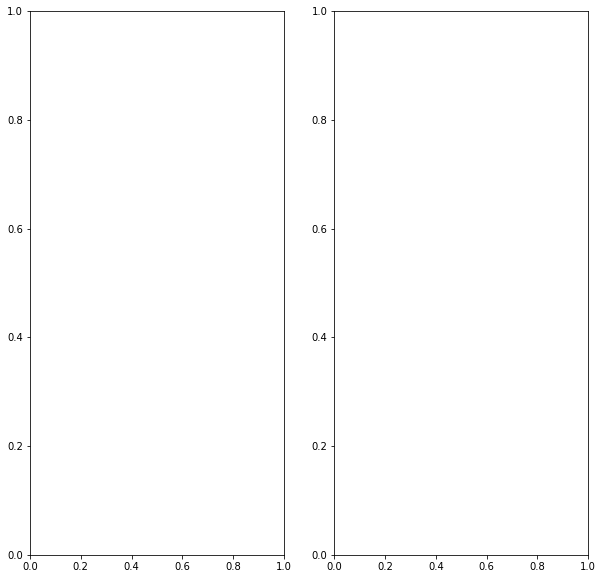

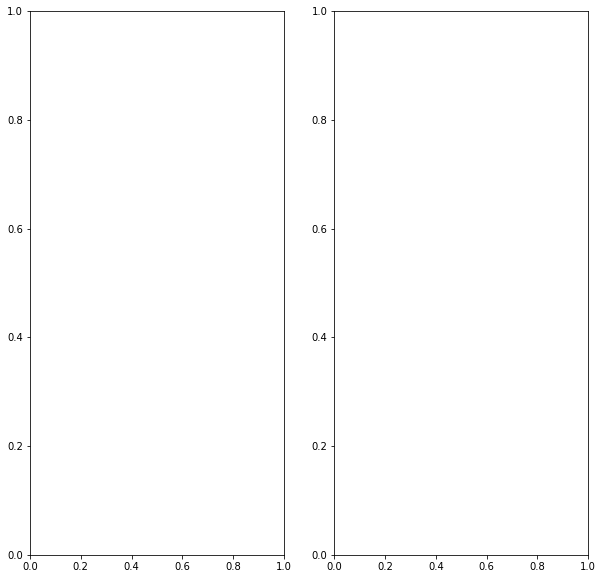

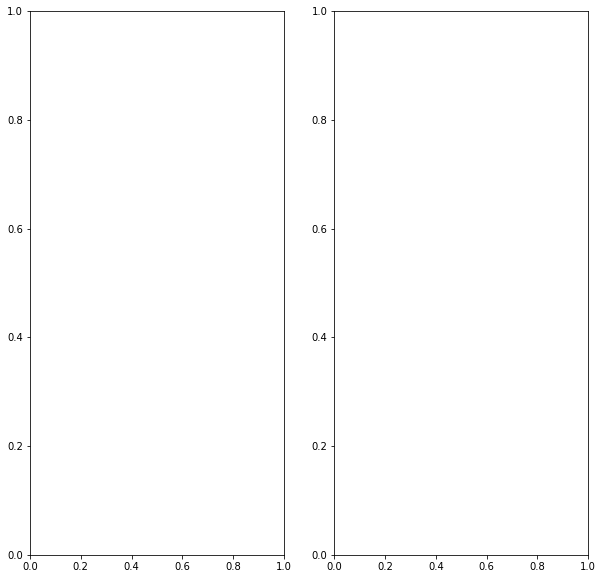

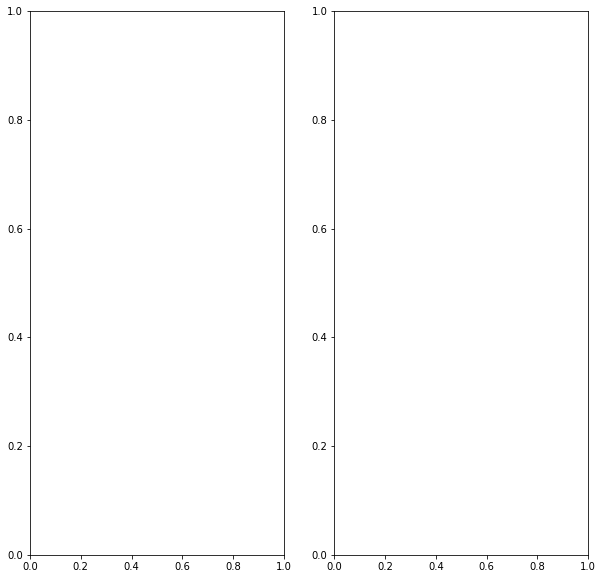

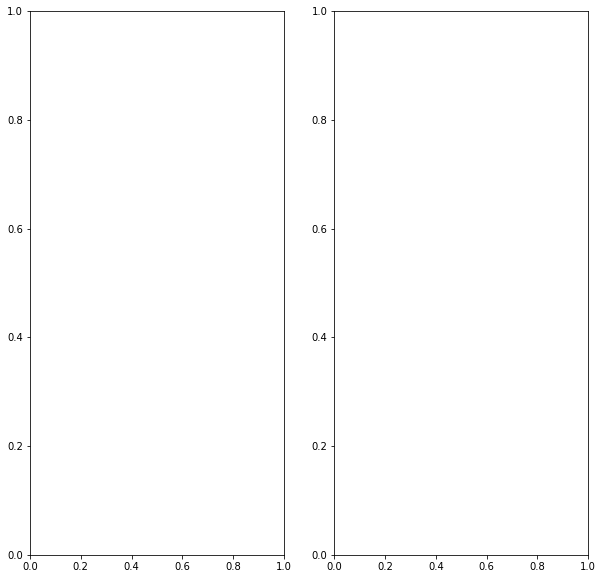

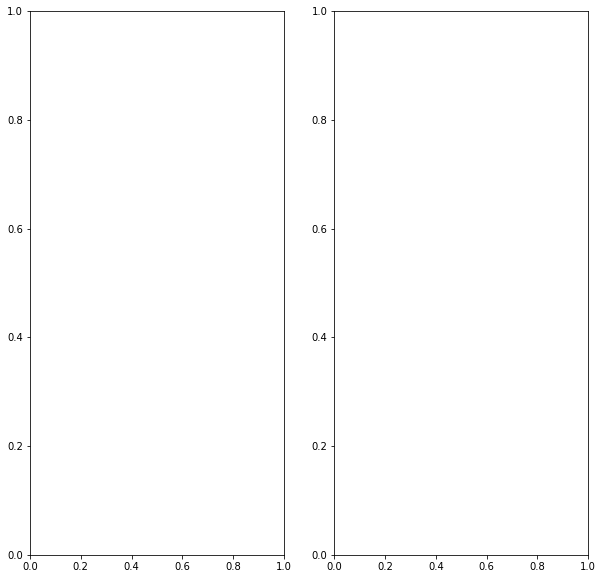

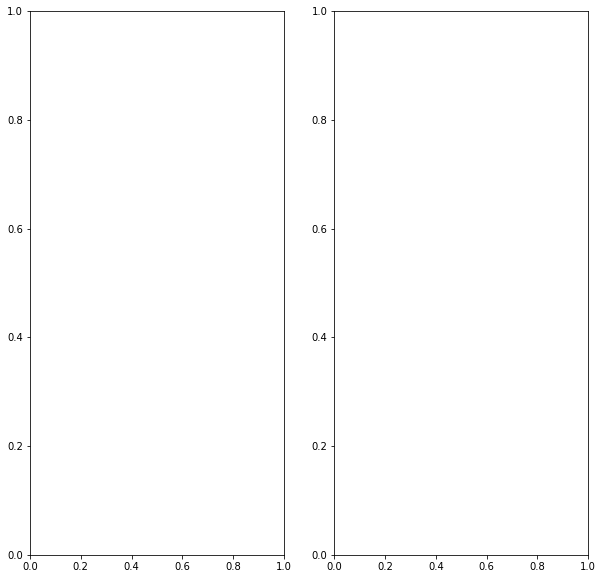

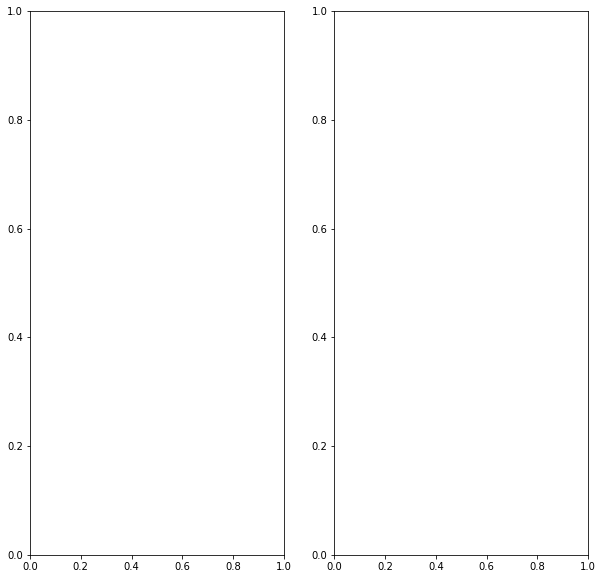

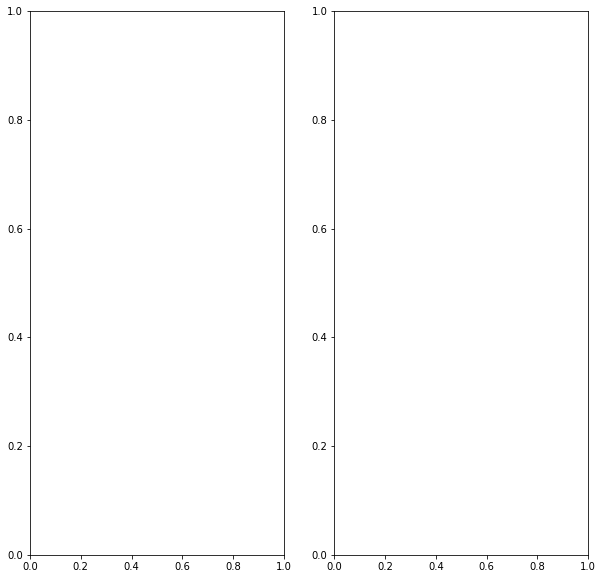

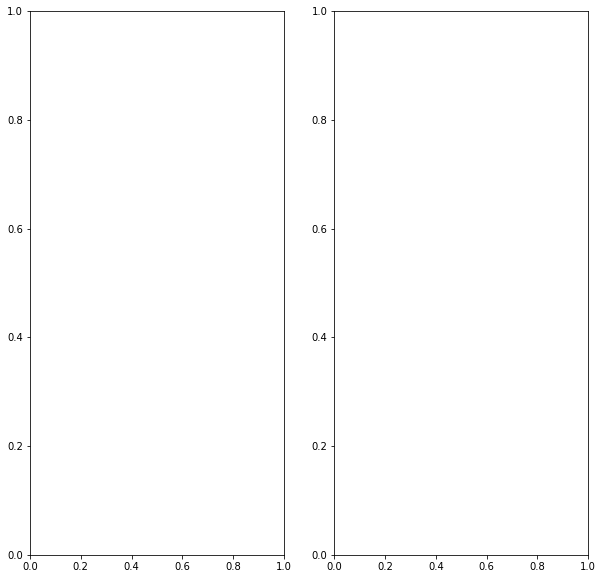

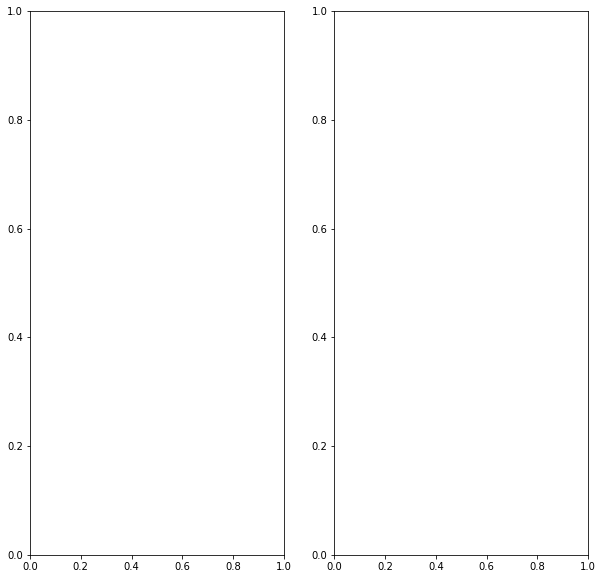

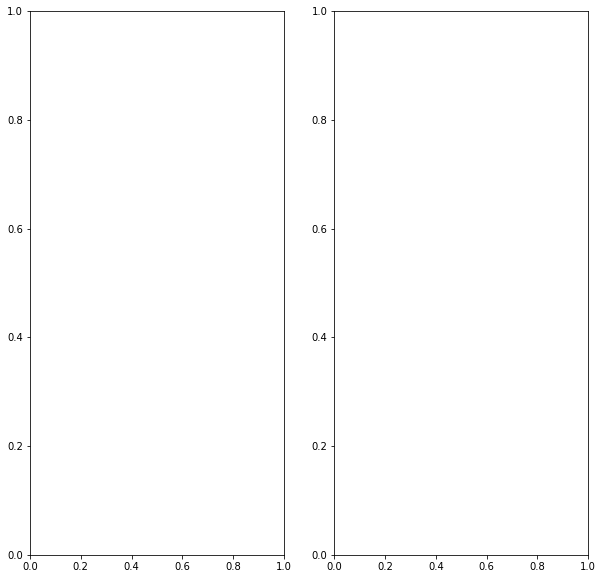

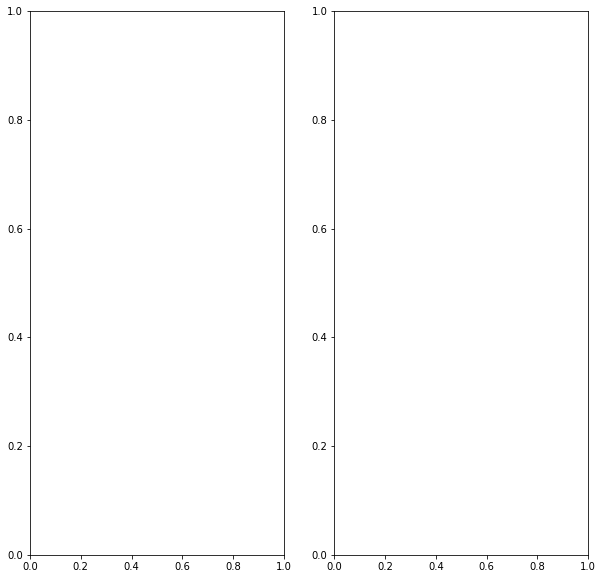

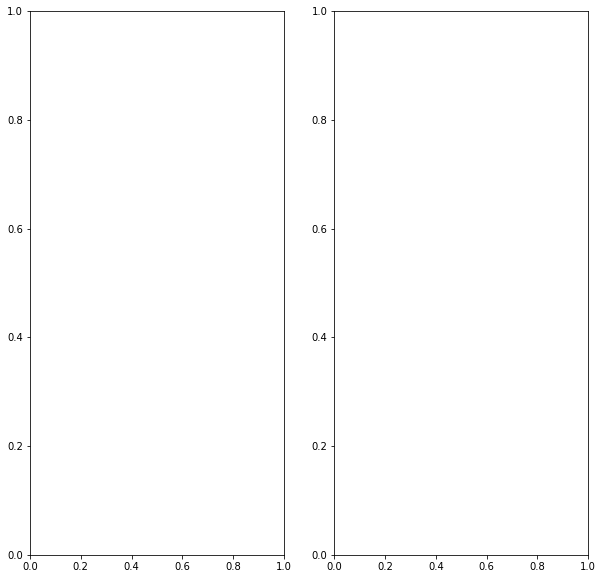

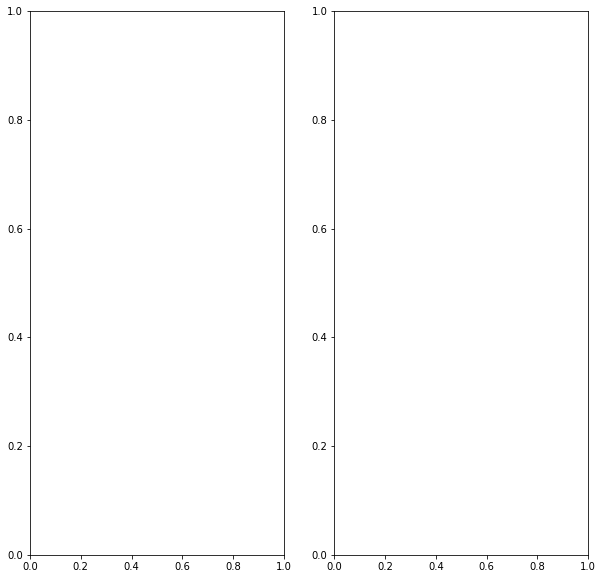

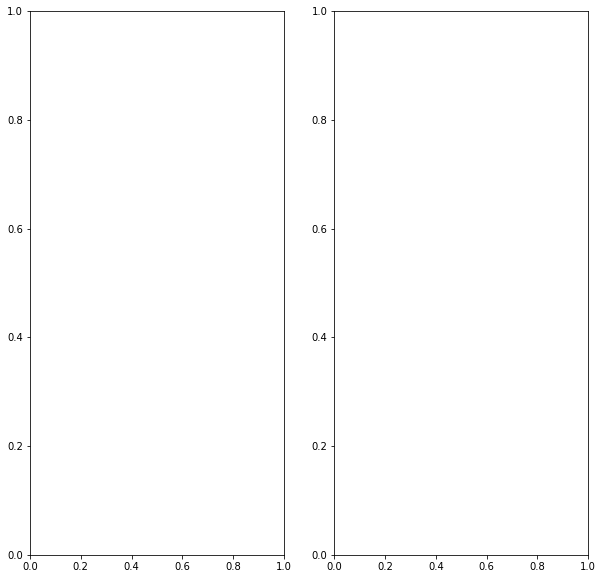

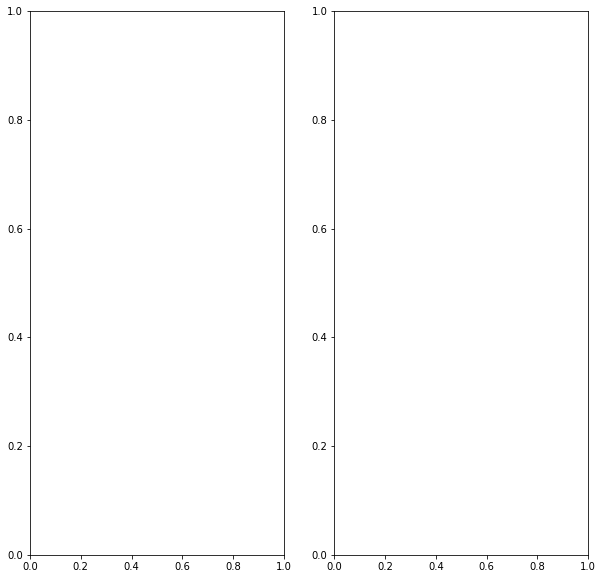

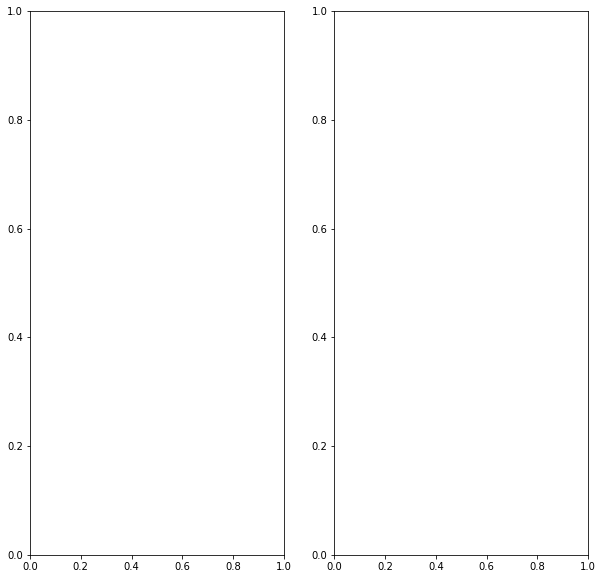

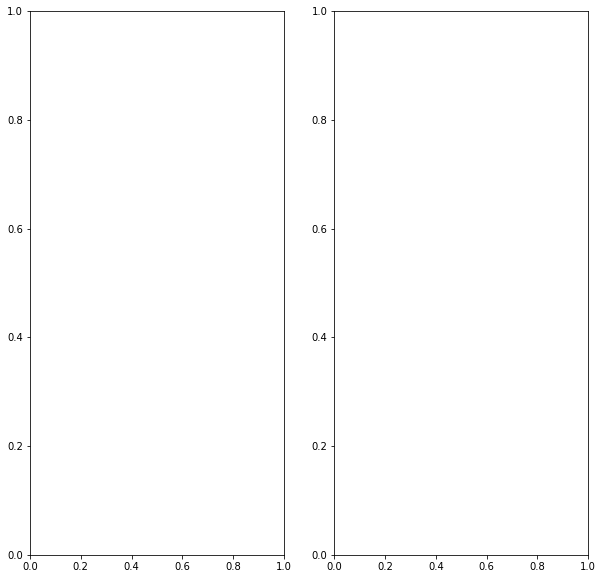

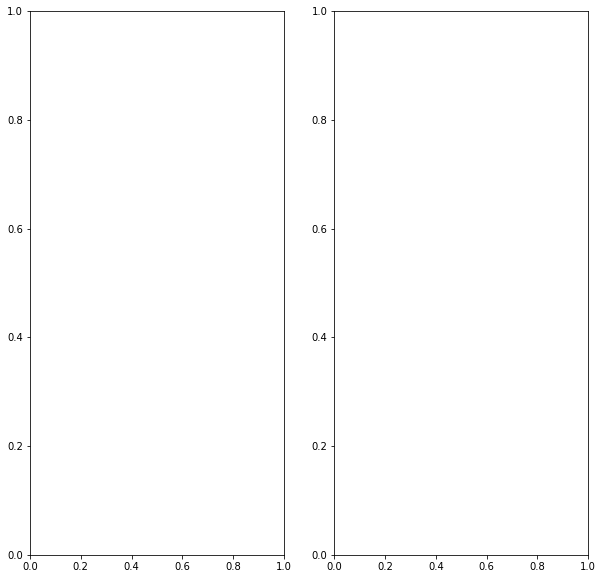

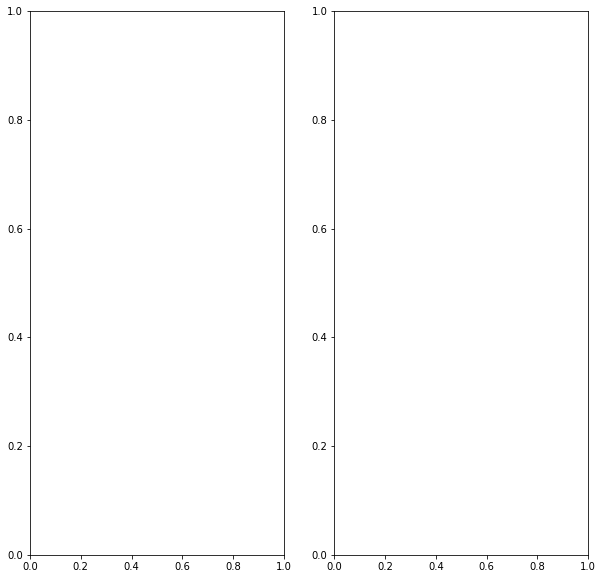

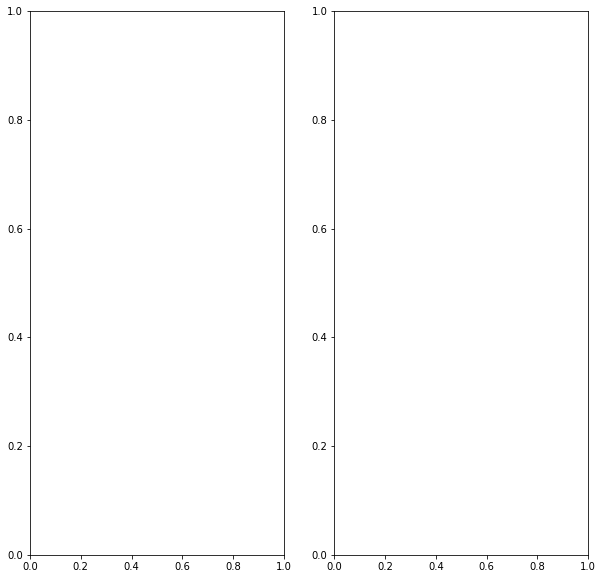

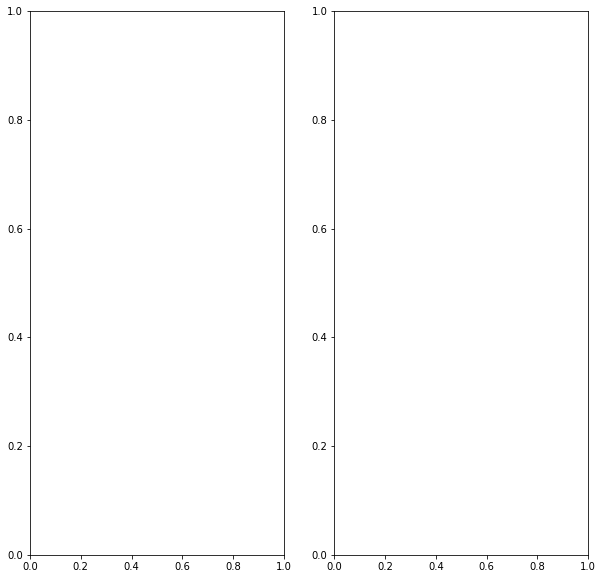

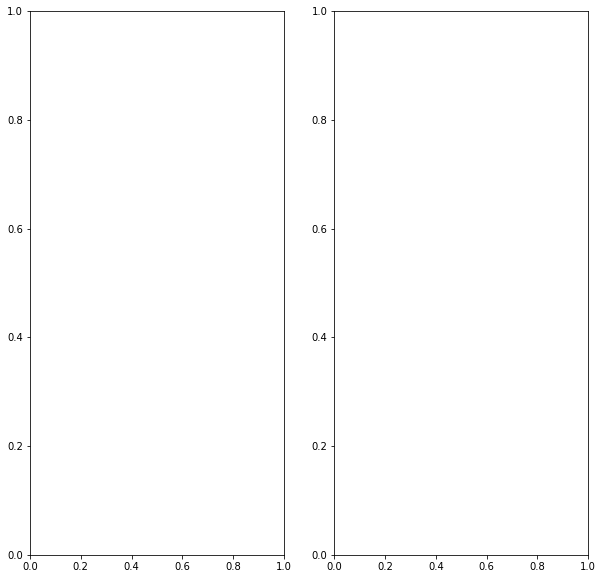

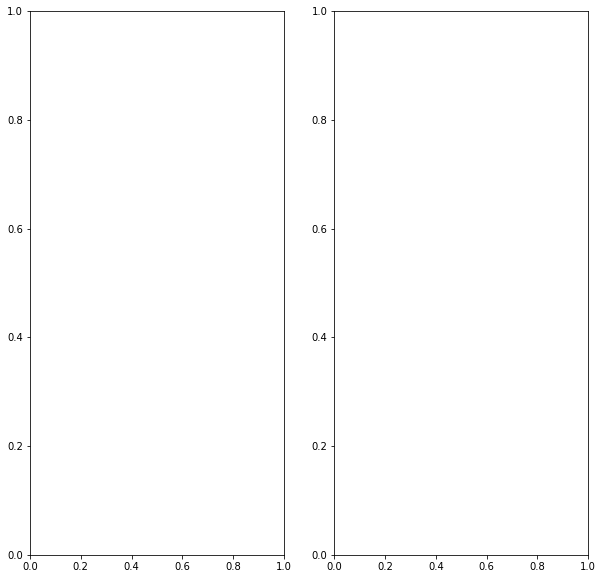

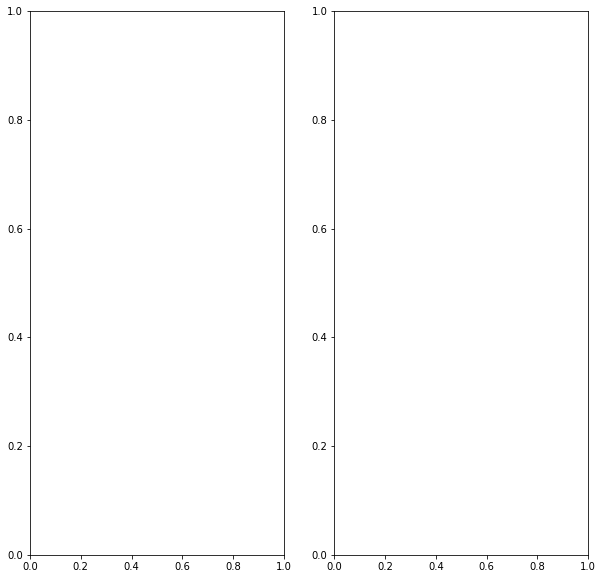

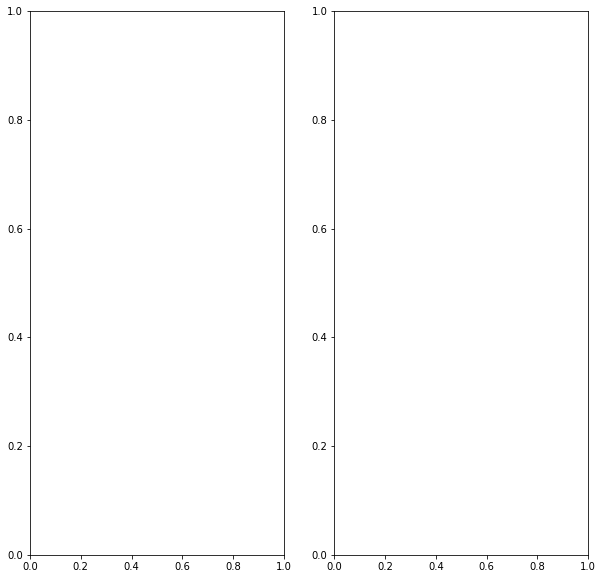

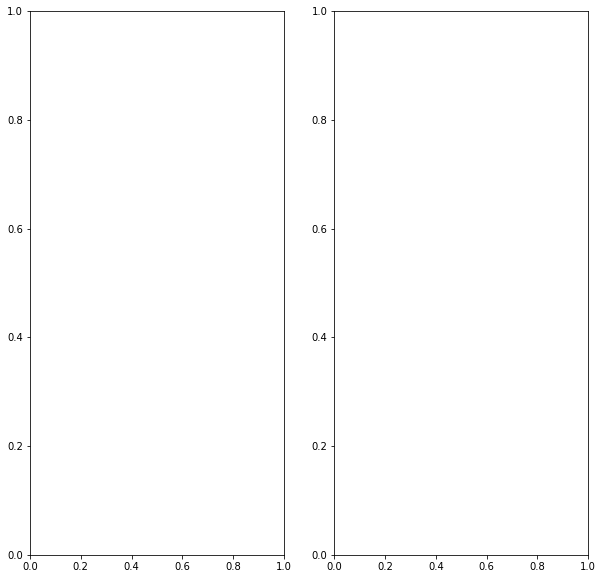

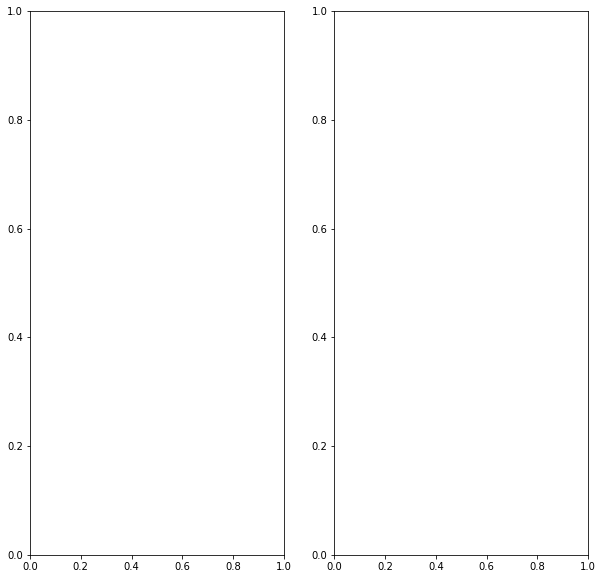

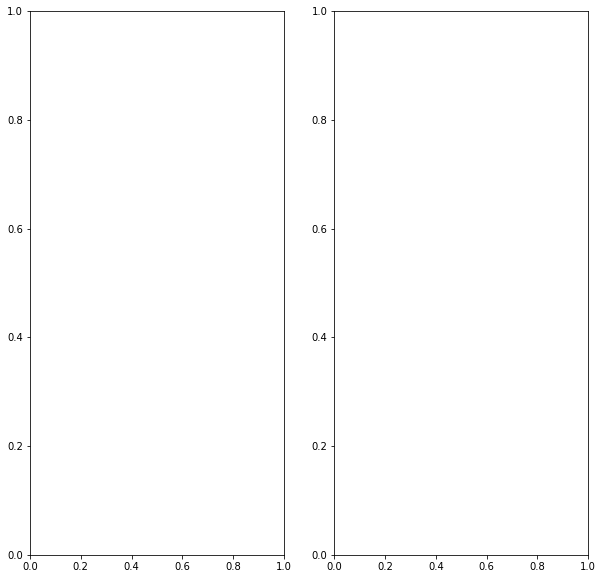

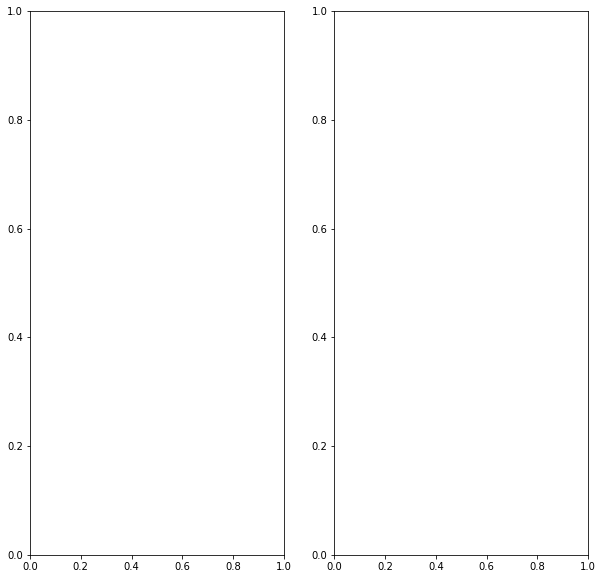

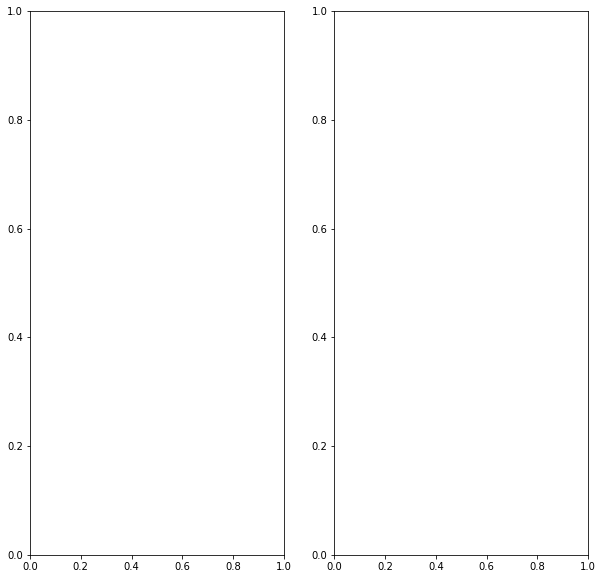

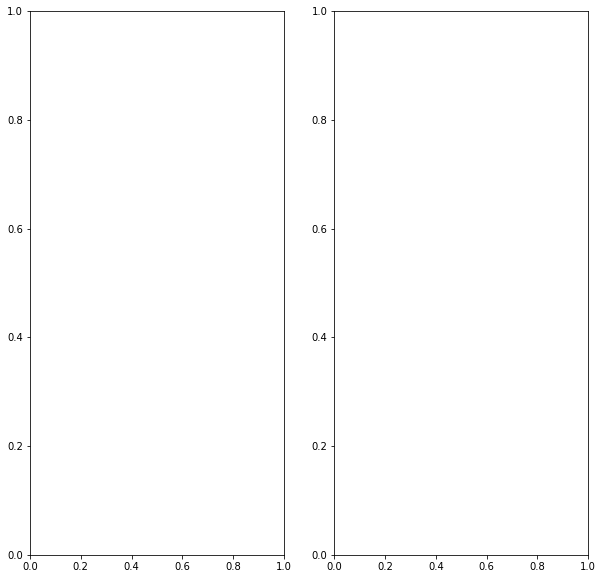

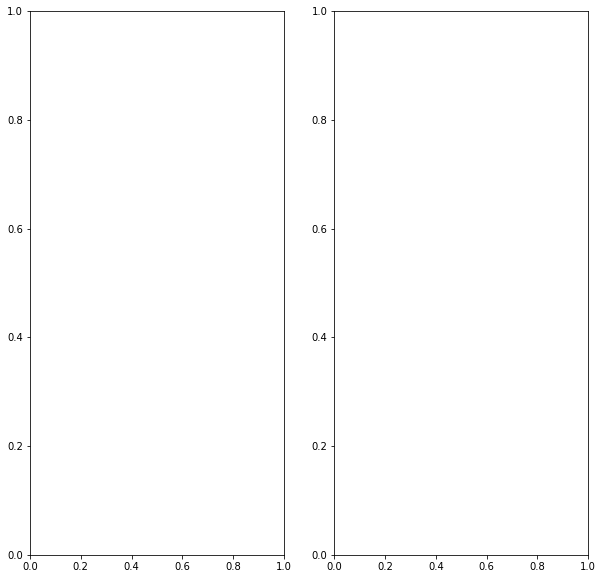

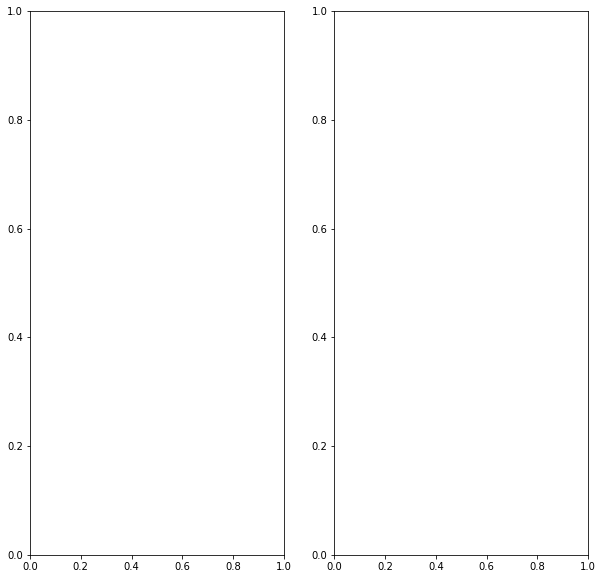

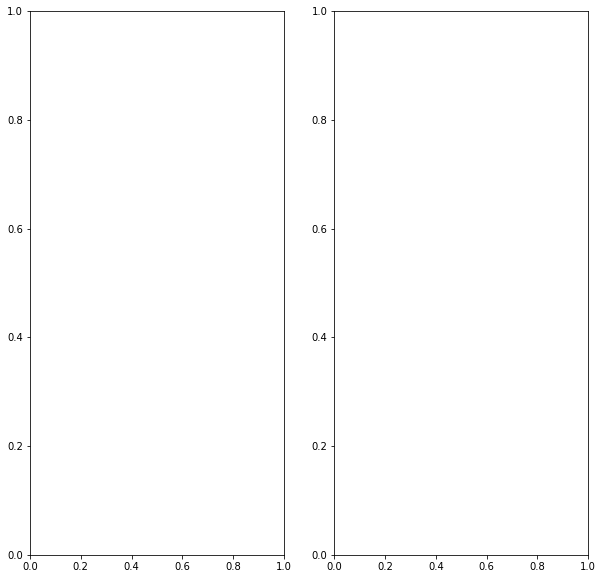

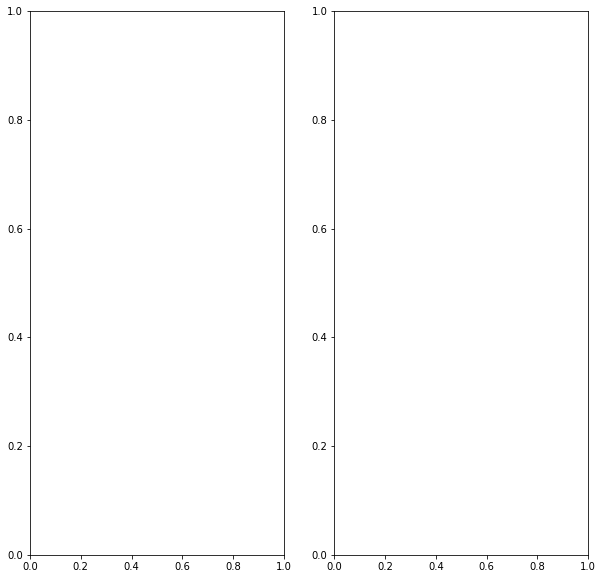

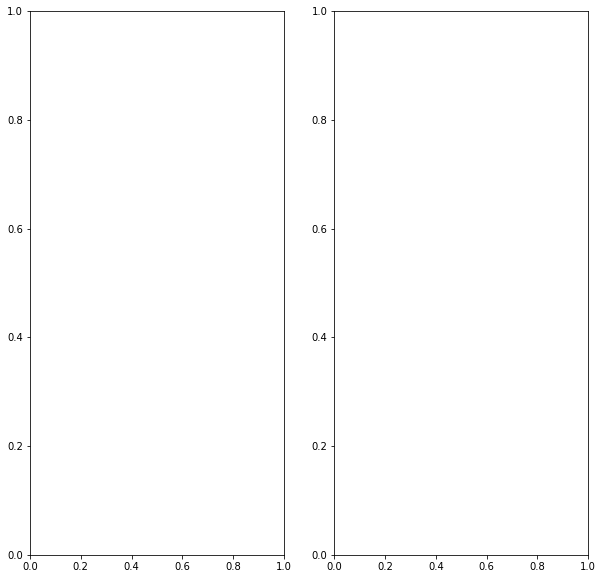

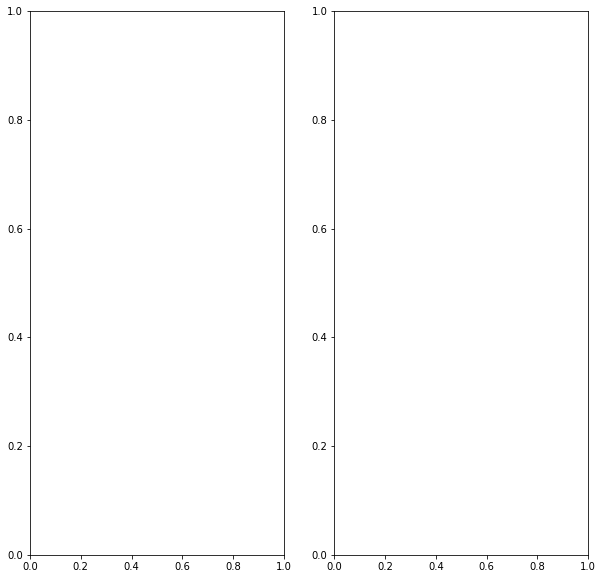

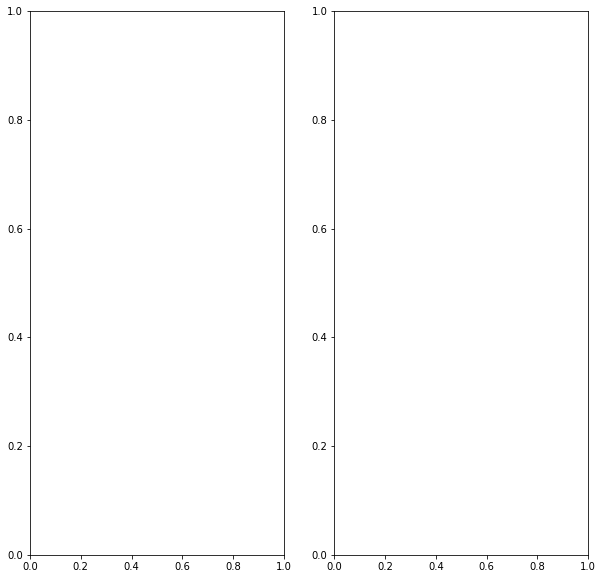

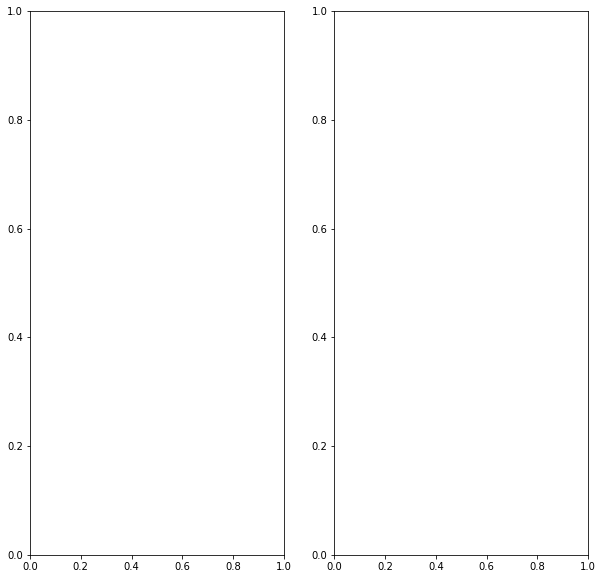

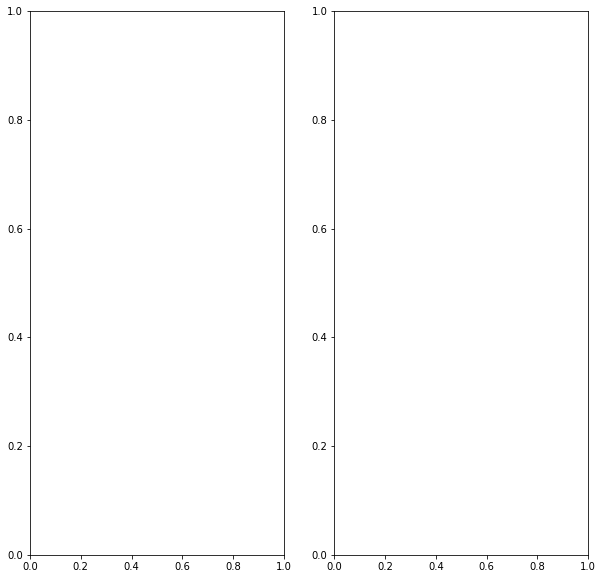

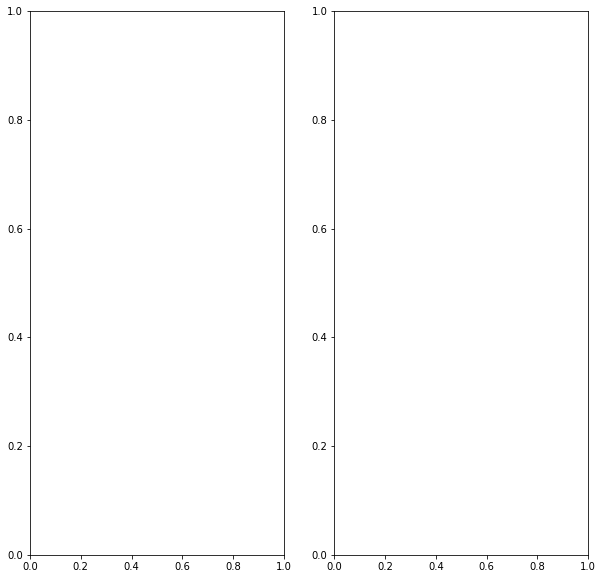

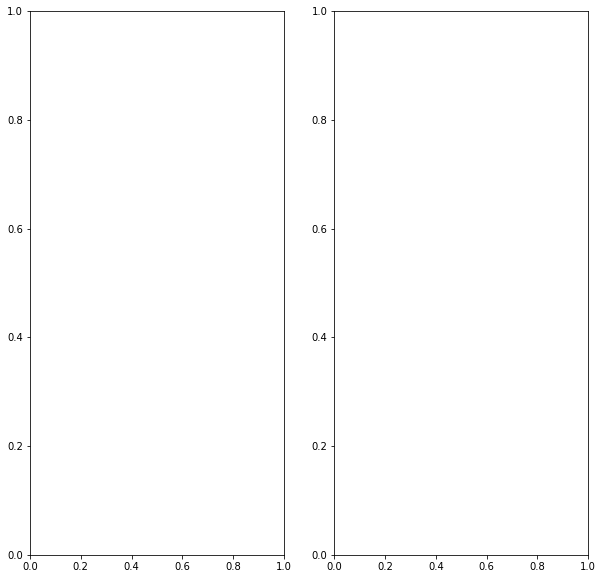

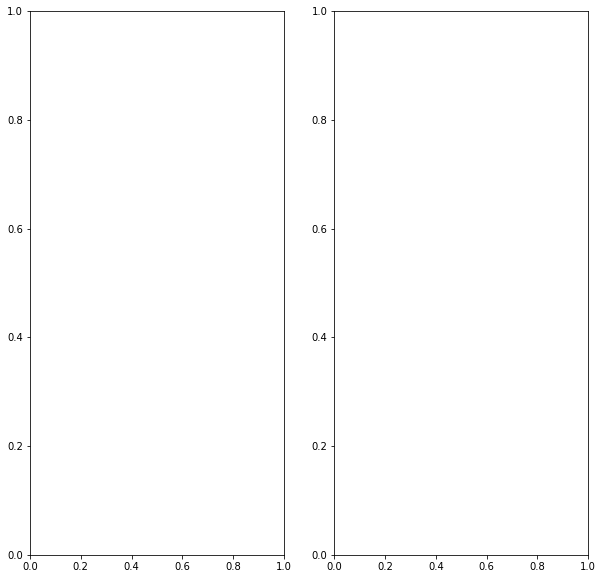

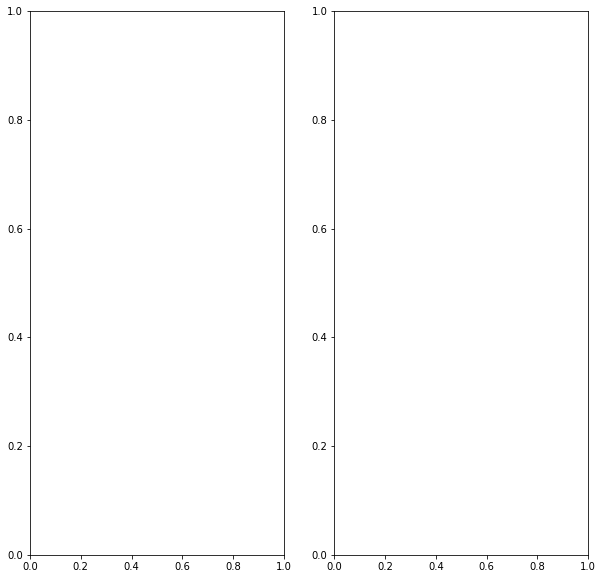

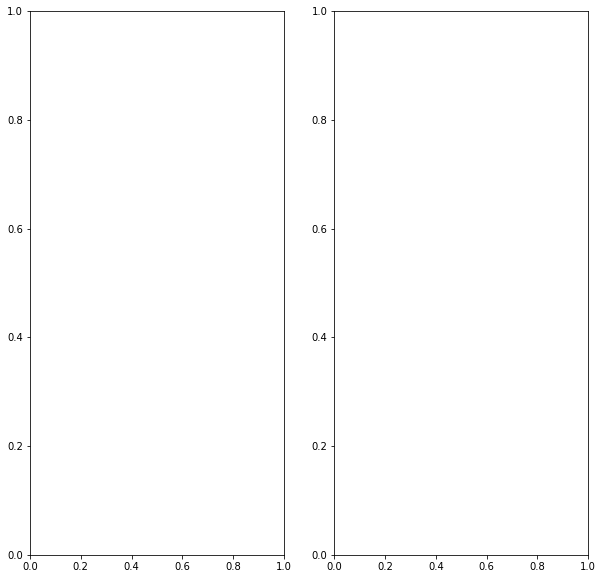

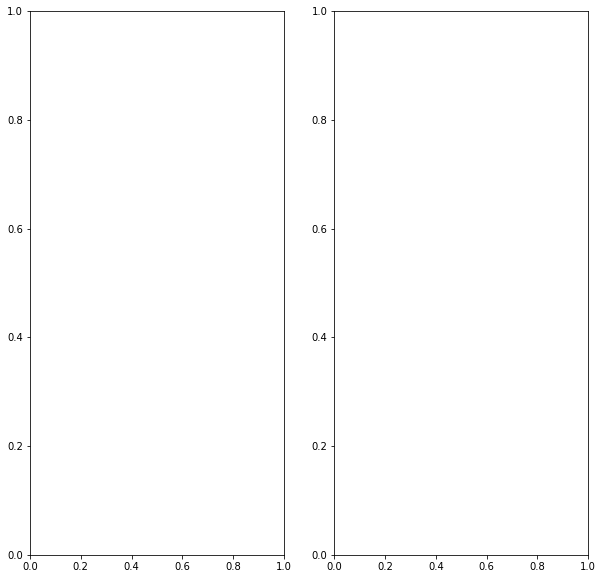

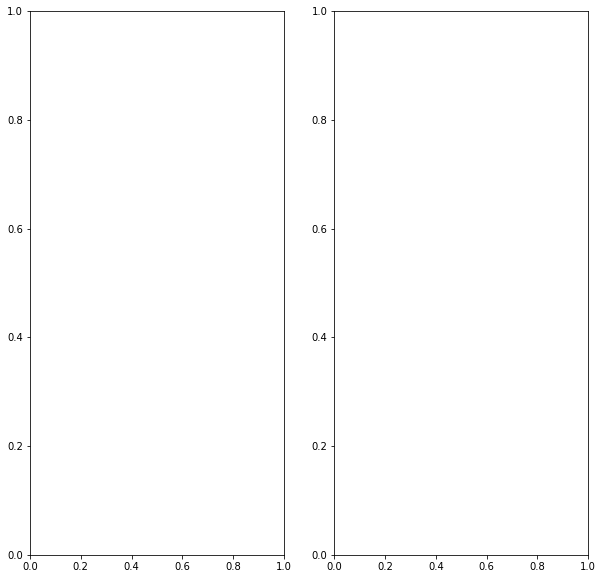

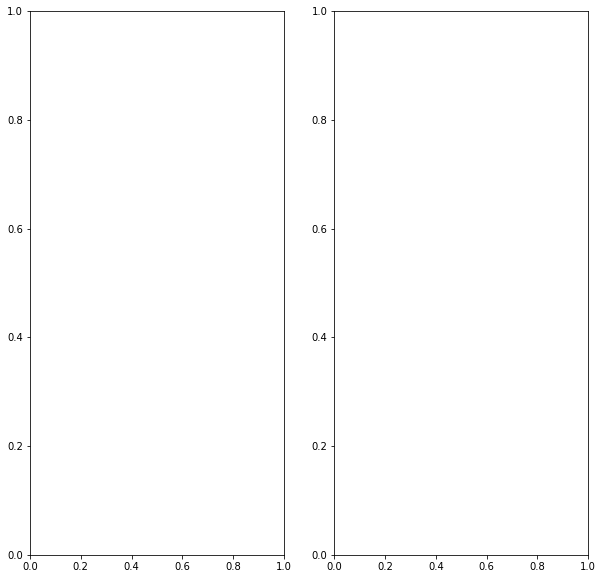

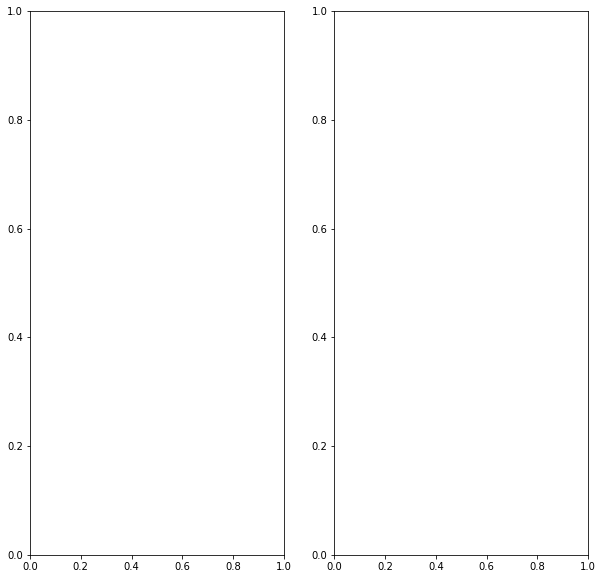

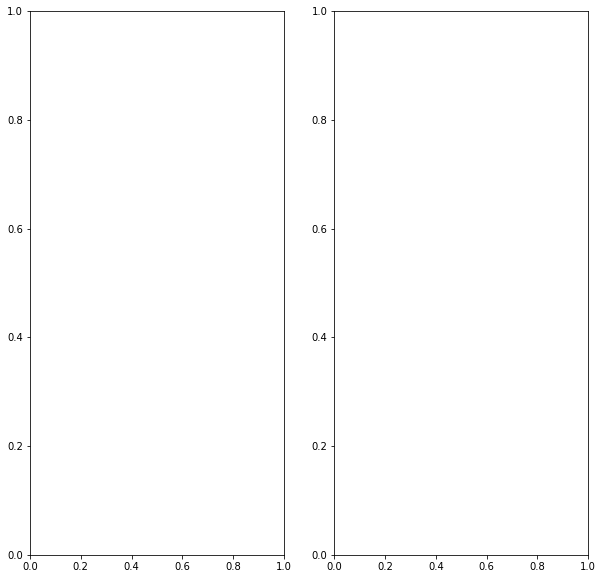

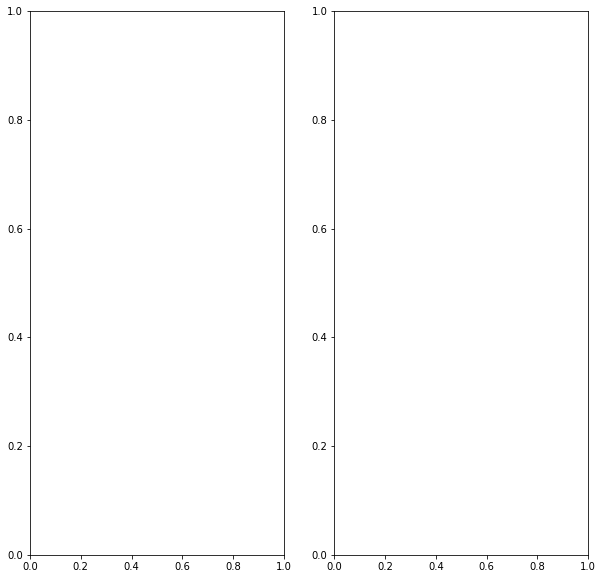

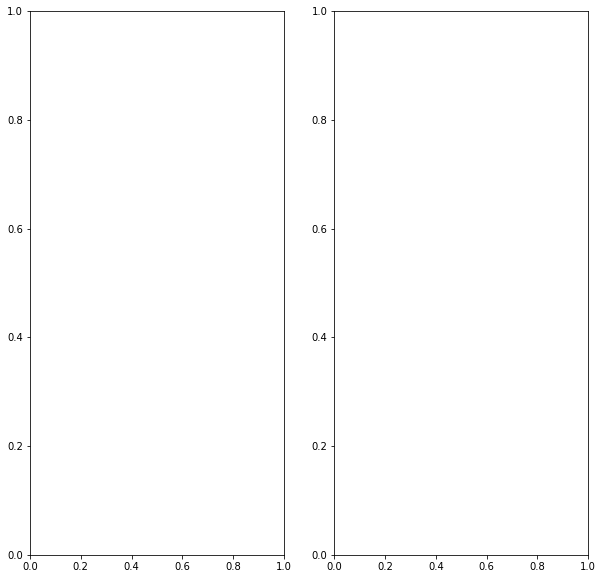

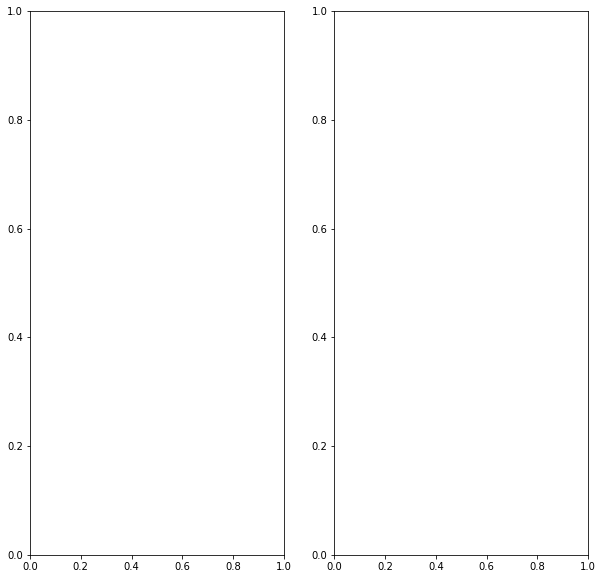

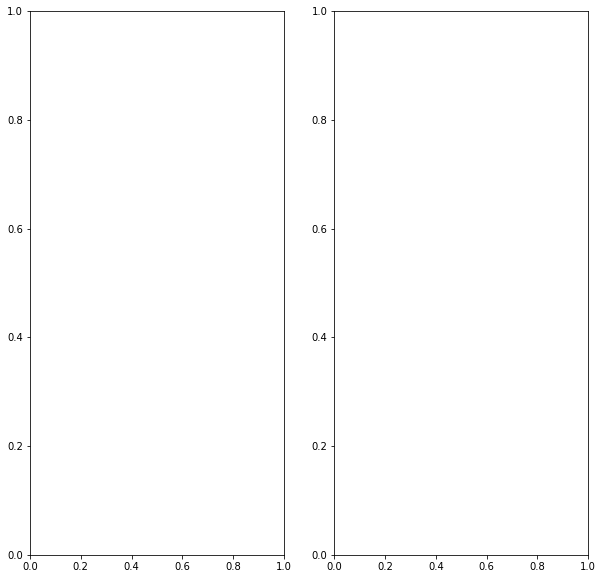

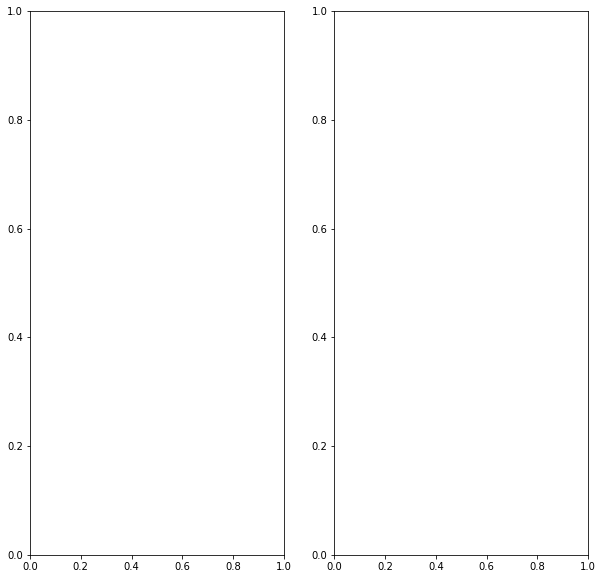

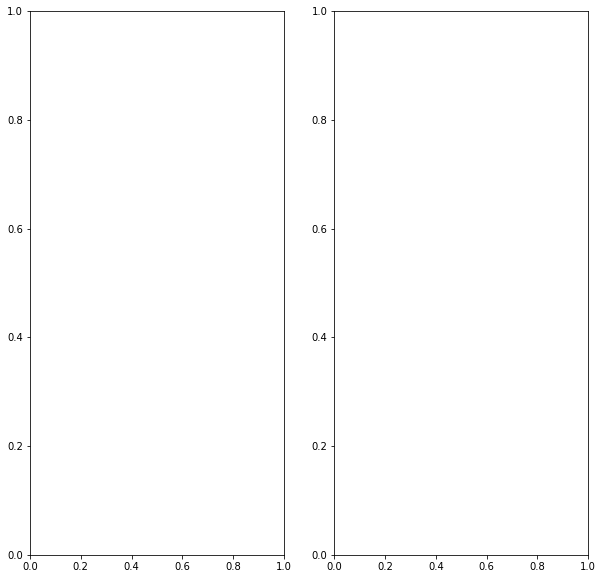

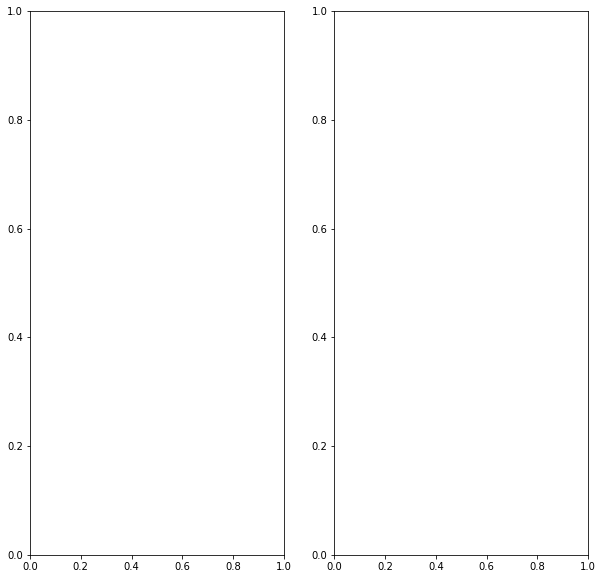

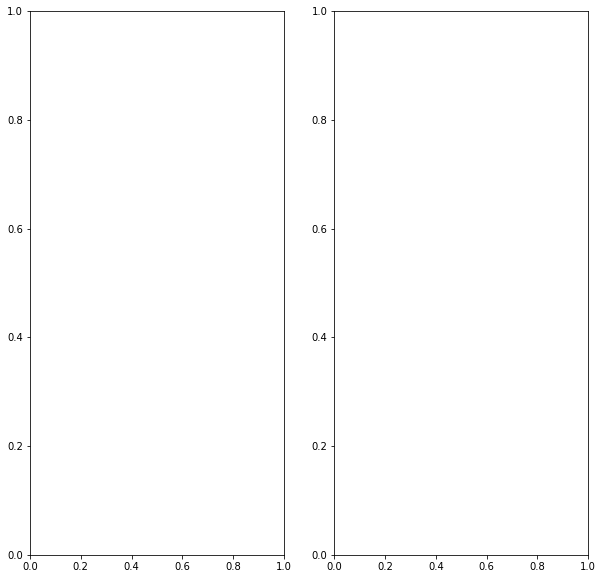

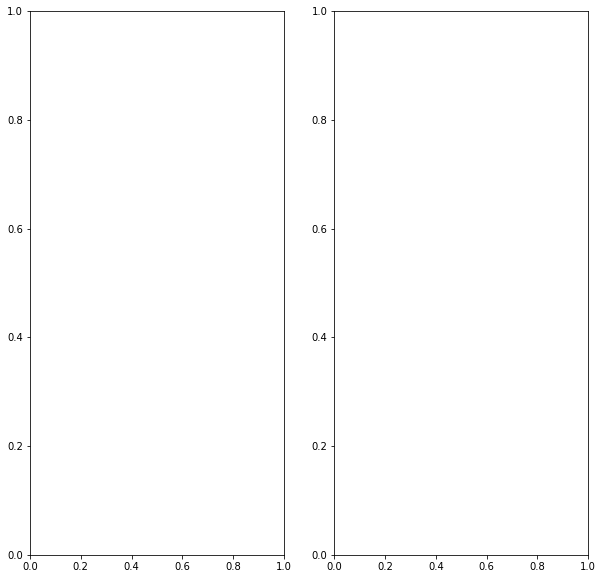

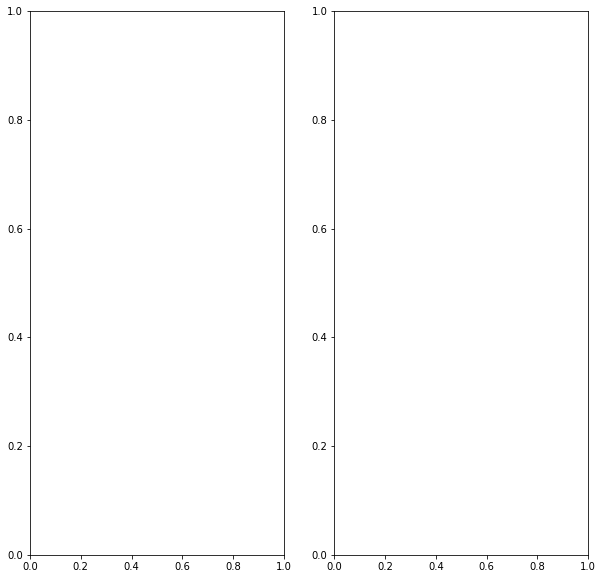

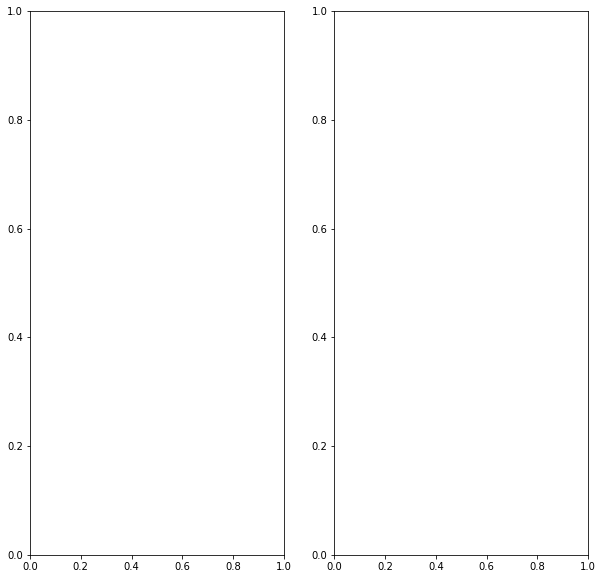

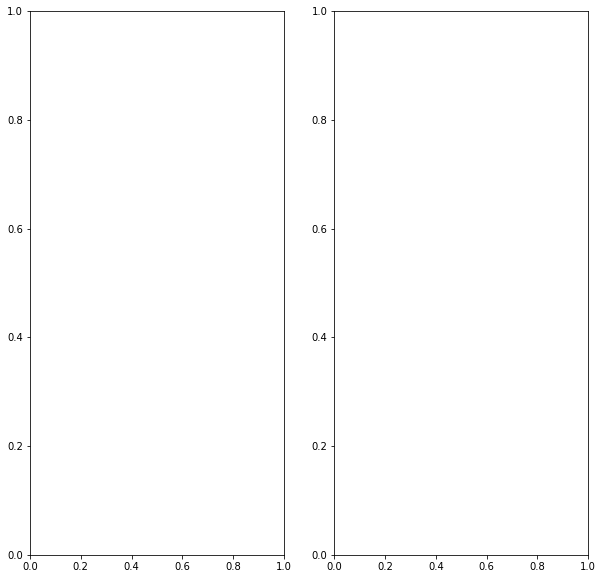

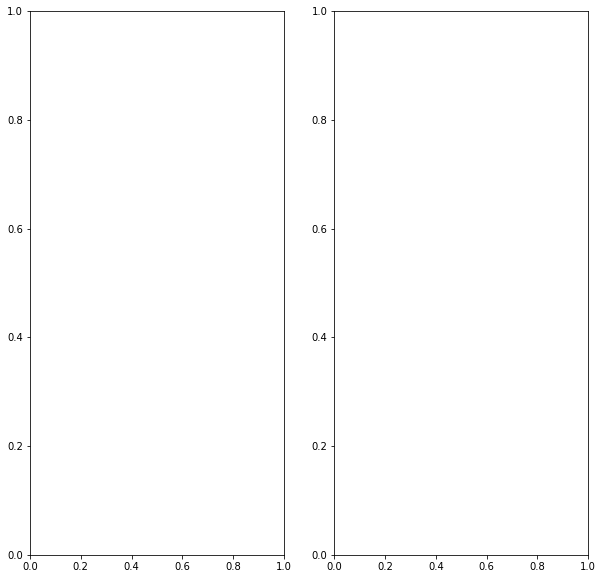

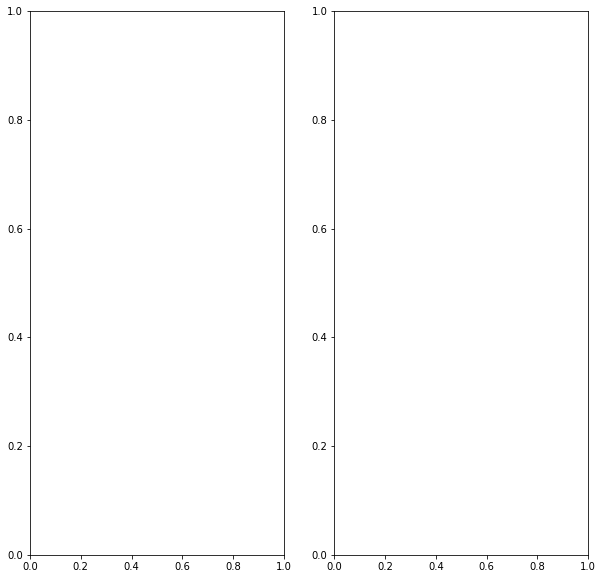

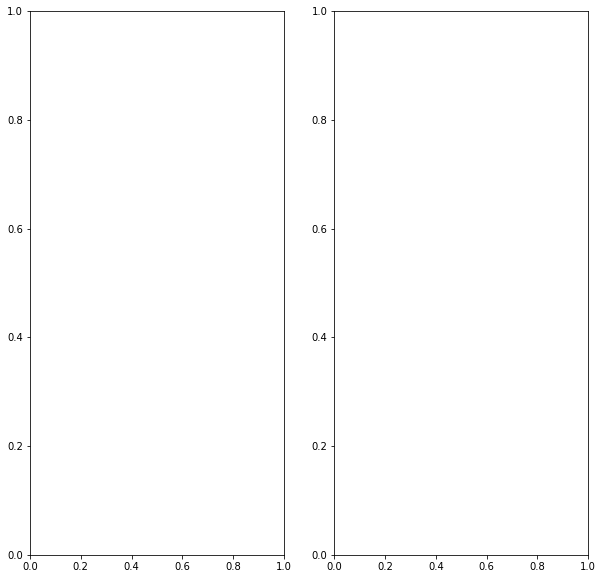

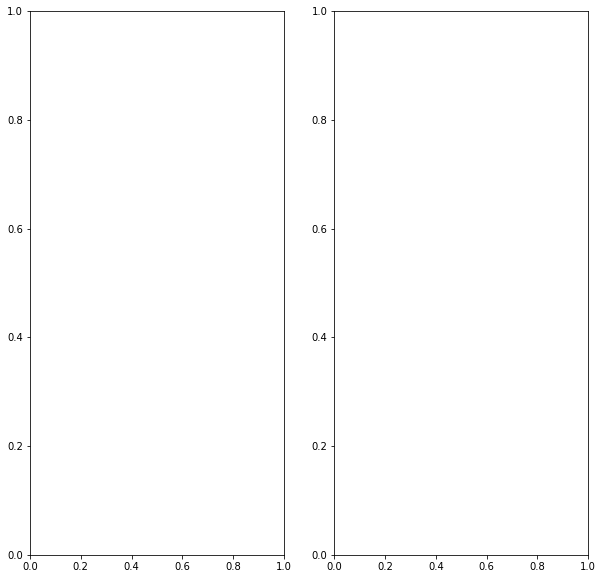

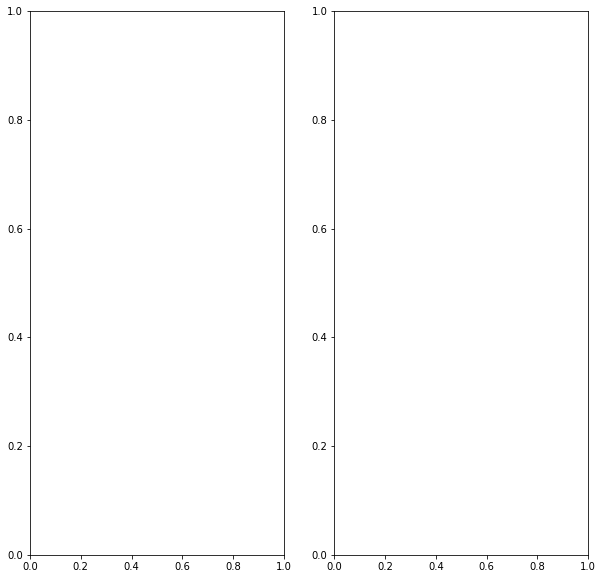

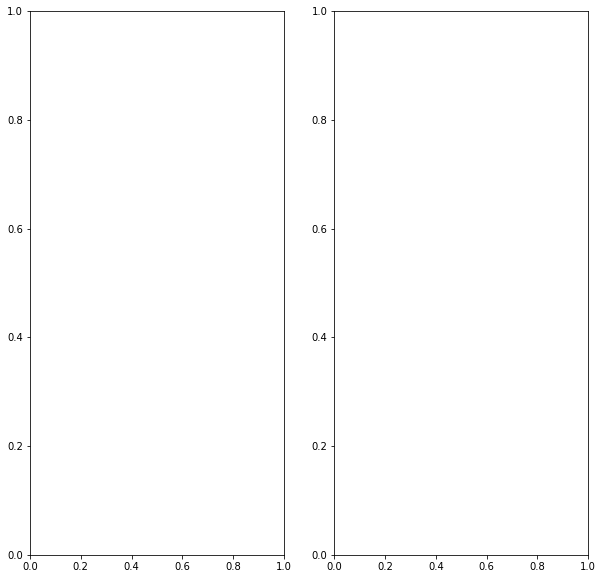

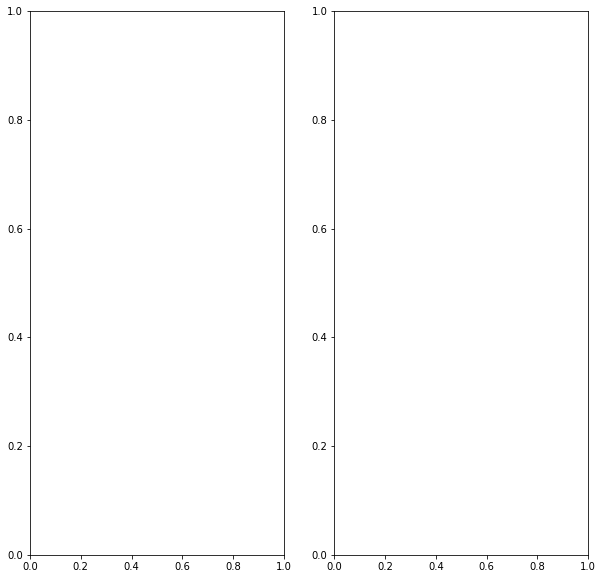

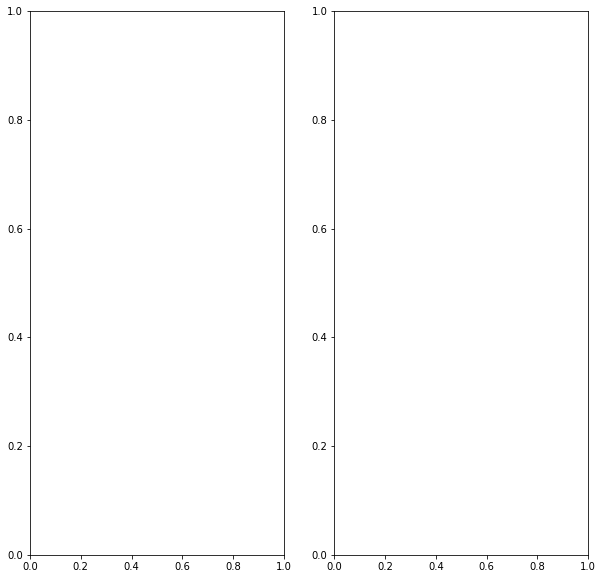

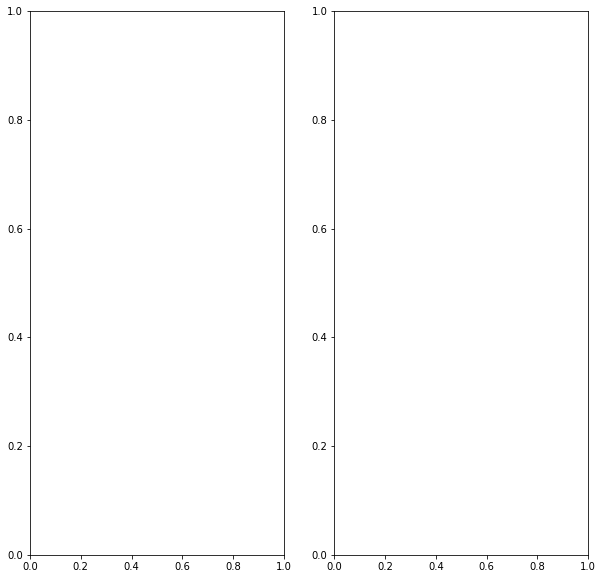

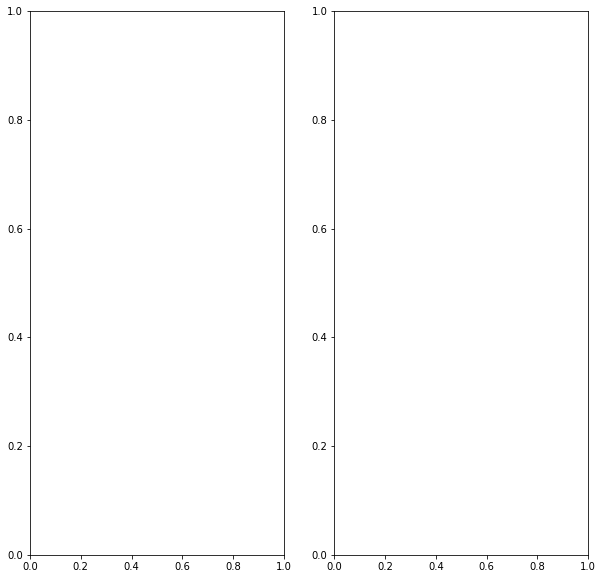

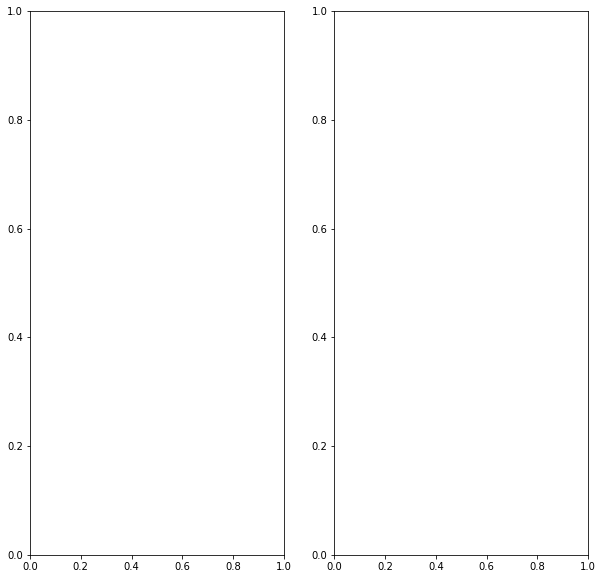

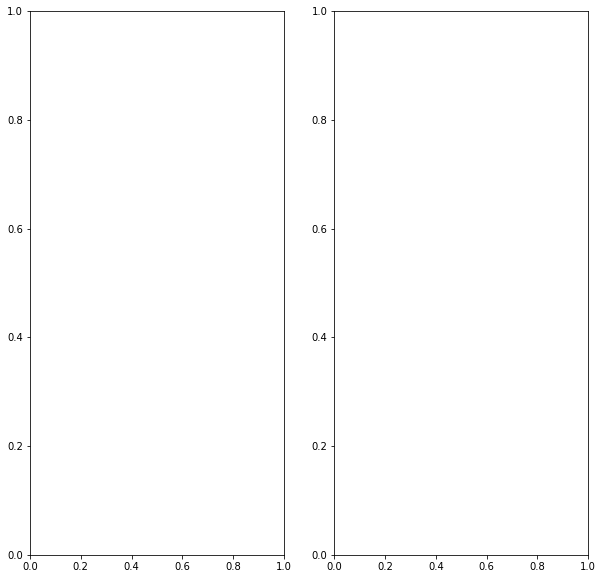

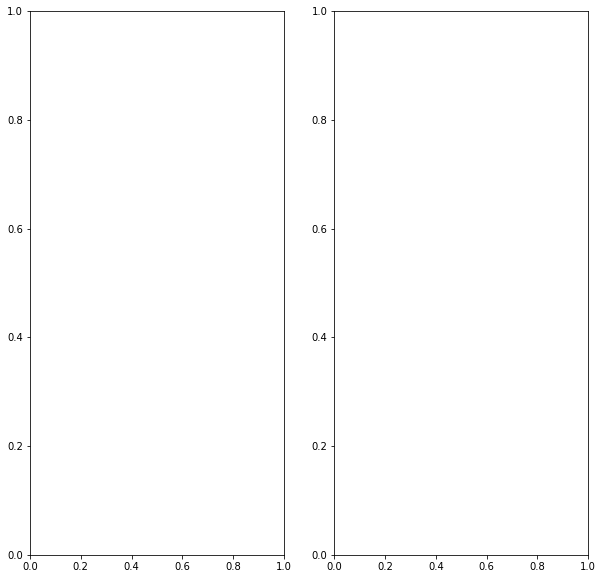

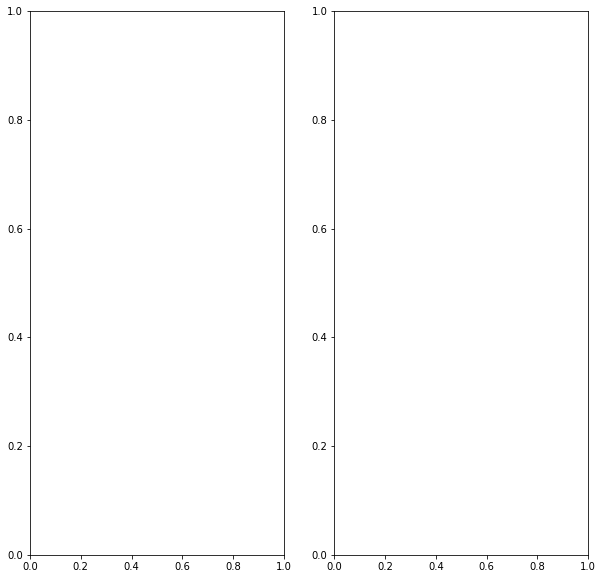

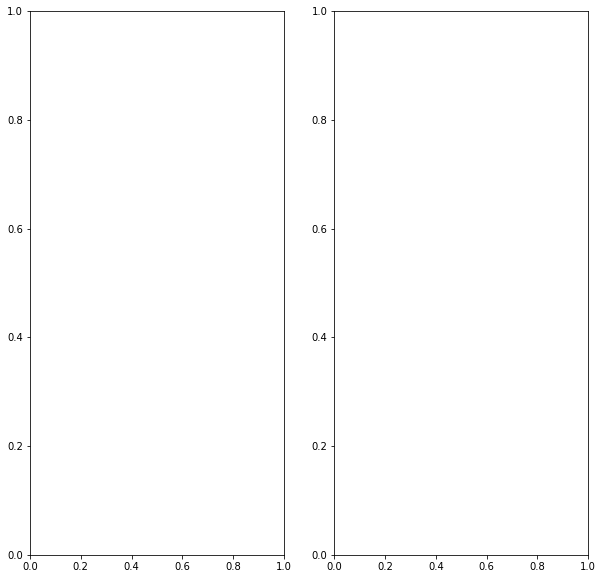

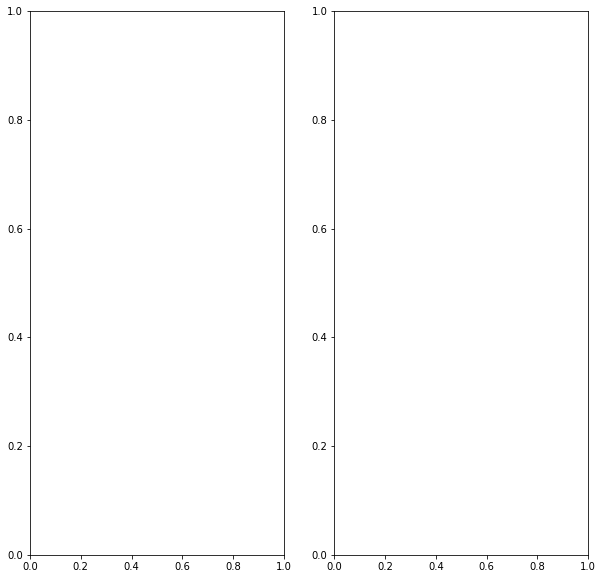

In [56]:
initial_img=[]
final_img=[]
import random
for i in range(len(samp_3)):

  degrees = 90
  img = np.array(Image.open(samp_3[i]))
  # img = img.sum(2) / (255*3) # converting to grayscale
  print(img.shape)
  fig = plt.figure(figsize=(10, 10))
  fig.add_subplot(1, 2, 1)
  #plt.imshow(img)
  initial_img.append(img)
  #plt.title("original")
  img0 = img.copy()
  for _ in range(degrees//90):
      img0 = img0.transpose(1, 0, 2)
      for j in range(0, img0.shape[1] // 2):
          c = img0[:, j, :].copy()
          img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
          img0[: , img0.shape[1]-j-1, :] = c
  fig.add_subplot(1, 2, 2)
  #plt.imshow(img0)
  final_img.append(img0)
  #plt.title("rotated")
  im_i=np.array(initial_img)
  im_f=np.array(final_img)


print(im_i.shape)
print(im_f.shape)

In [57]:
from PIL import Image
i=0
for im in im_i:
  
  print(im.shape)
  img=np.array(im)
  img = img.astype(np.uint8)
  img = Image.fromarray(img)
  fname="f"+str(i)+".jpeg"
  #print(y_res[i])
  print(fname)
  img_path="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Data_Augmentation/Stage_2"
  image = img.save(f"{img_path}/{fname}")
  #img_path_1="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Non_cancerous"
  #img_path_2="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_1"
  #img_path_3="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_2"
  #img_path_4="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_3"
  #if y_res[i]==0:
  #  image = img.save(f"{img_path_1}/{fname}")
  #elif y_res[i]==1 or y_res[i]==2:
  #  image = img.save(f"{img_path_2}/{fname}")
  #elif y_res[i]==3:
  #  image = img.save(f"{img_path_3}/{fname}")
  #elif y_res[i]==4:
  #  image = img.save(f"{img_path_4}/{fname}")
  #img.save(fname)
  i=i+1

(1200, 1600, 3)
f0.jpeg
(1200, 1600, 3)
f1.jpeg
(1200, 1600, 3)
f2.jpeg
(1200, 1600, 3)
f3.jpeg
(1200, 1600, 3)
f4.jpeg
(1200, 1600, 3)
f5.jpeg
(1200, 1600, 3)
f6.jpeg
(1200, 1600, 3)
f7.jpeg
(1200, 1600, 3)
f8.jpeg
(1200, 1600, 3)
f9.jpeg
(1200, 1600, 3)
f10.jpeg
(1200, 1600, 3)
f11.jpeg
(1200, 1600, 3)
f12.jpeg
(1200, 1600, 3)
f13.jpeg
(1200, 1600, 3)
f14.jpeg
(1200, 1600, 3)
f15.jpeg
(1200, 1600, 3)
f16.jpeg
(1200, 1600, 3)
f17.jpeg
(1200, 1600, 3)
f18.jpeg
(1200, 1600, 3)
f19.jpeg
(1200, 1600, 3)
f20.jpeg
(1200, 1600, 3)
f21.jpeg
(1200, 1600, 3)
f22.jpeg
(1200, 1600, 3)
f23.jpeg
(1200, 1600, 3)
f24.jpeg
(1200, 1600, 3)
f25.jpeg
(1200, 1600, 3)
f26.jpeg
(1200, 1600, 3)
f27.jpeg
(1200, 1600, 3)
f28.jpeg
(1200, 1600, 3)
f29.jpeg
(1200, 1600, 3)
f30.jpeg
(1200, 1600, 3)
f31.jpeg
(1200, 1600, 3)
f32.jpeg
(1200, 1600, 3)
f33.jpeg
(1200, 1600, 3)
f34.jpeg
(1200, 1600, 3)
f35.jpeg
(1200, 1600, 3)
f36.jpeg
(1200, 1600, 3)
f37.jpeg
(1200, 1600, 3)
f38.jpeg
(1200, 1600, 3)
f39.jpeg
(1200, 160

In [58]:
from PIL import Image
i=0
for im in im_f:
  
  print(im.shape)
  img=np.array(im)
  img = img.astype(np.uint8)
  img = Image.fromarray(img)
  fname="f"+str(i)+".jpeg"
  #print(y_res[i])
  print(fname)
  img_path="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Data_Augmentation/Stage_2"
  image = img.save(f"{img_path}/{fname}")
  #img_path_1="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Non_cancerous"
  #img_path_2="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_1"
  #img_path_3="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_2"
  #img_path_4="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_3"
  #if y_res[i]==0:
  #  image = img.save(f"{img_path_1}/{fname}")
  #elif y_res[i]==1 or y_res[i]==2:
  #  image = img.save(f"{img_path_2}/{fname}")
  #elif y_res[i]==3:
  #  image = img.save(f"{img_path_3}/{fname}")
  #elif y_res[i]==4:
  #  image = img.save(f"{img_path_4}/{fname}")
  #img.save(fname)
  i=i+1

(1600, 1200, 3)
f0.jpeg
(1600, 1200, 3)
f1.jpeg
(1600, 1200, 3)
f2.jpeg
(1600, 1200, 3)
f3.jpeg
(1600, 1200, 3)
f4.jpeg
(1600, 1200, 3)
f5.jpeg
(1600, 1200, 3)
f6.jpeg
(1600, 1200, 3)
f7.jpeg
(1600, 1200, 3)
f8.jpeg
(1600, 1200, 3)
f9.jpeg
(1600, 1200, 3)
f10.jpeg
(1600, 1200, 3)
f11.jpeg
(1600, 1200, 3)
f12.jpeg
(1600, 1200, 3)
f13.jpeg
(1600, 1200, 3)
f14.jpeg
(1600, 1200, 3)
f15.jpeg
(1600, 1200, 3)
f16.jpeg
(1600, 1200, 3)
f17.jpeg
(1600, 1200, 3)
f18.jpeg
(1600, 1200, 3)
f19.jpeg
(1600, 1200, 3)
f20.jpeg
(1600, 1200, 3)
f21.jpeg
(1600, 1200, 3)
f22.jpeg
(1600, 1200, 3)
f23.jpeg
(1600, 1200, 3)
f24.jpeg
(1600, 1200, 3)
f25.jpeg
(1600, 1200, 3)
f26.jpeg
(1600, 1200, 3)
f27.jpeg
(1600, 1200, 3)
f28.jpeg
(1600, 1200, 3)
f29.jpeg
(1600, 1200, 3)
f30.jpeg
(1600, 1200, 3)
f31.jpeg
(1600, 1200, 3)
f32.jpeg
(1600, 1200, 3)
f33.jpeg
(1600, 1200, 3)
f34.jpeg
(1600, 1200, 3)
f35.jpeg
(1600, 1200, 3)
f36.jpeg
(1600, 1200, 3)
f37.jpeg
(1600, 1200, 3)
f38.jpeg
(1600, 1200, 3)
f39.jpeg
(1600, 120

(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1

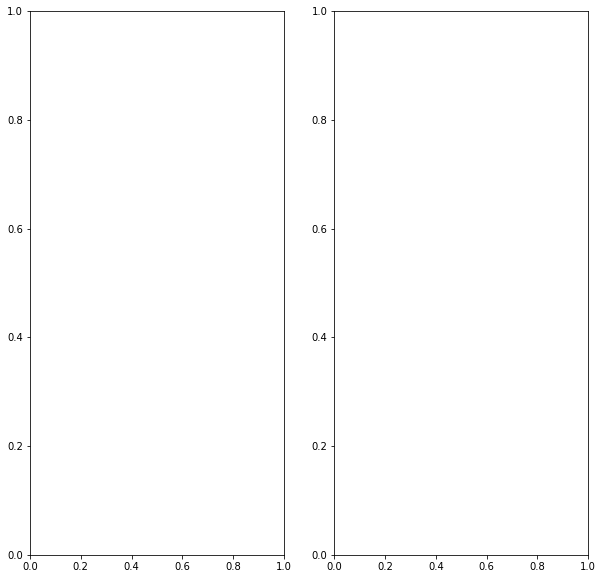

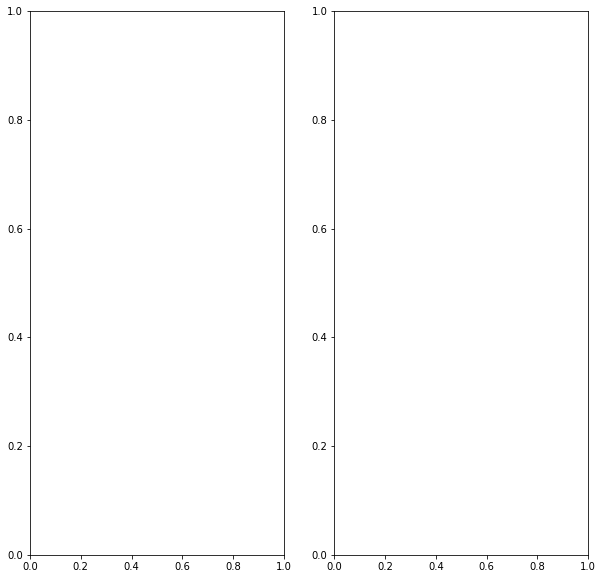

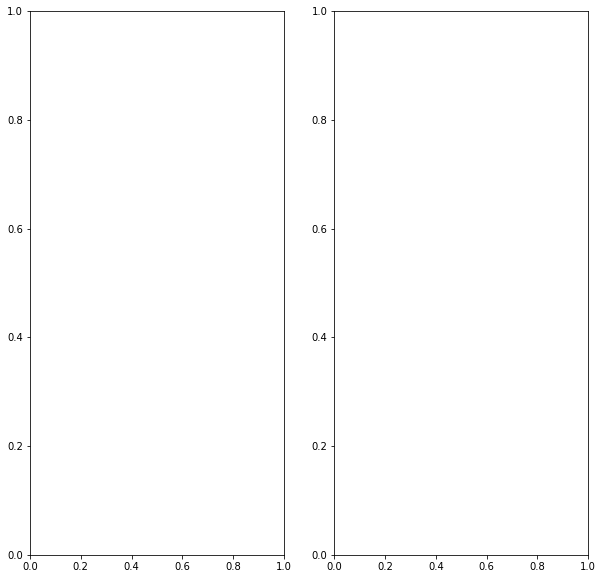

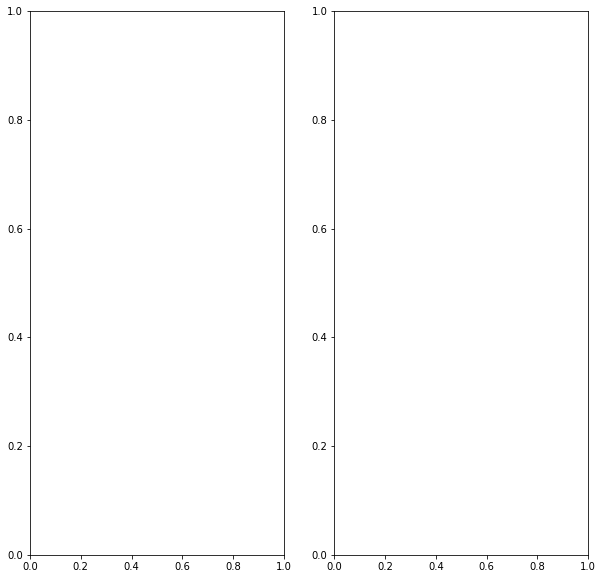

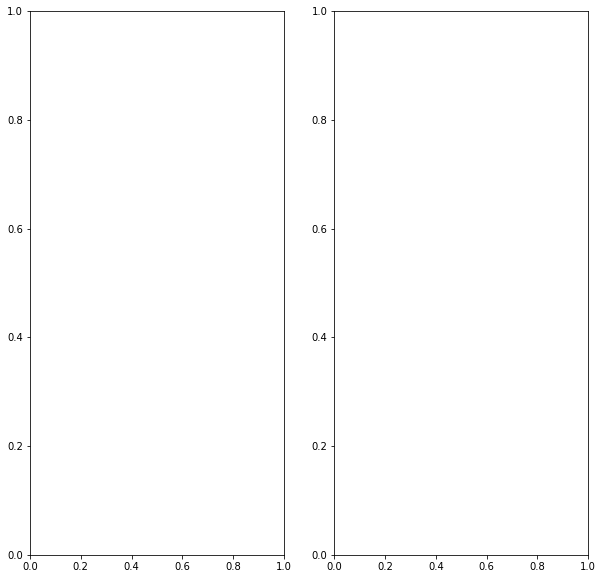

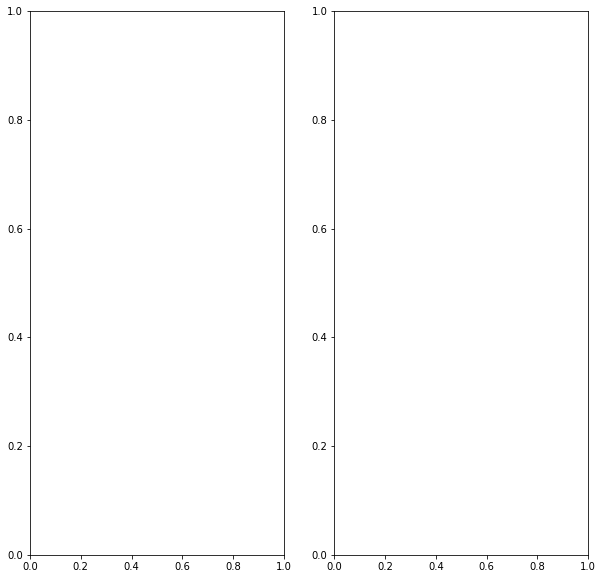

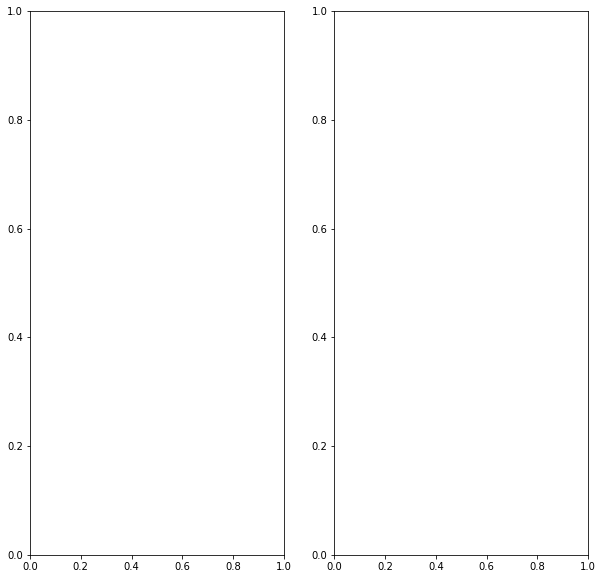

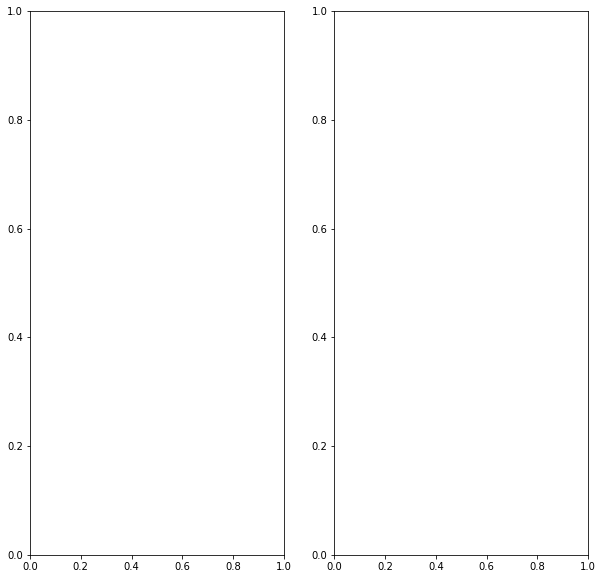

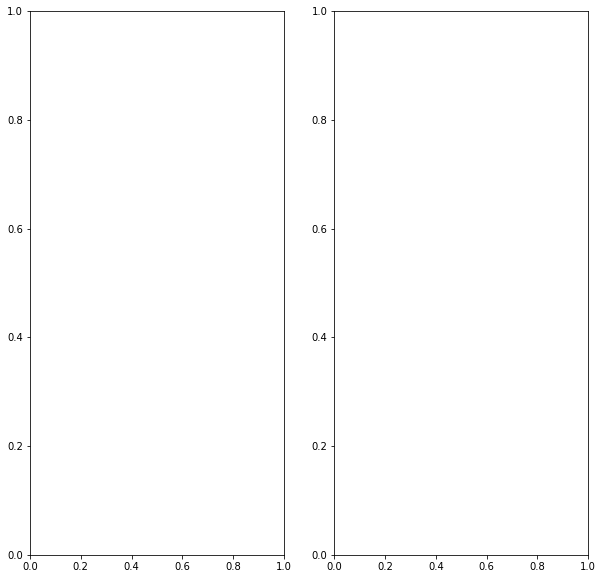

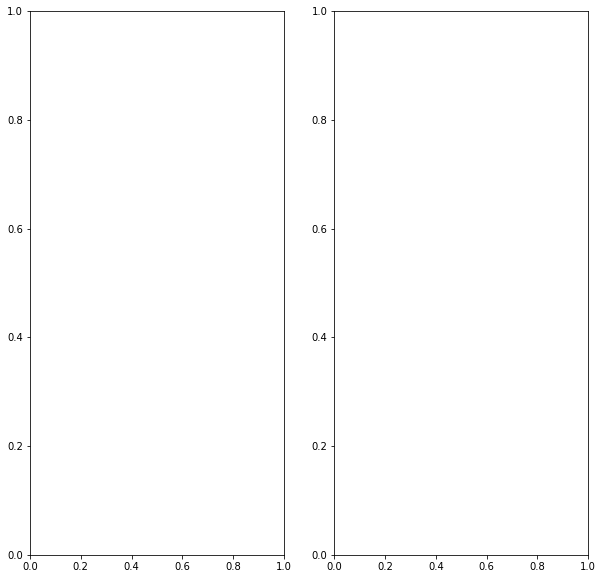

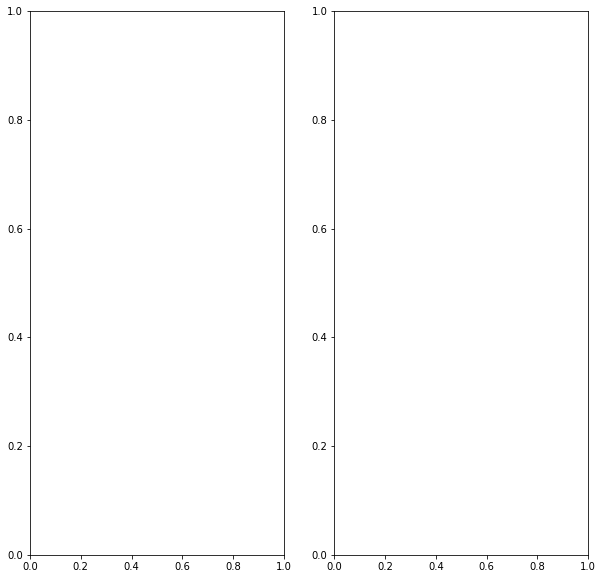

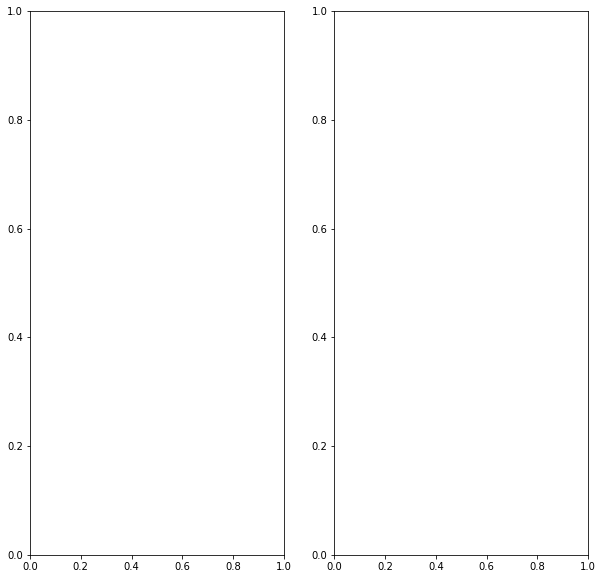

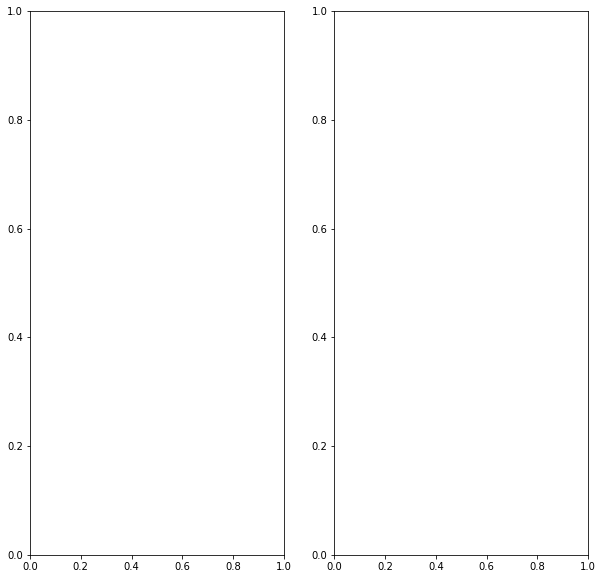

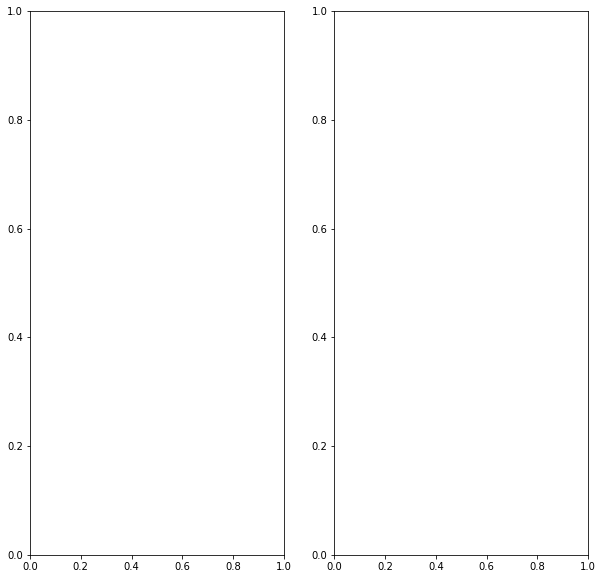

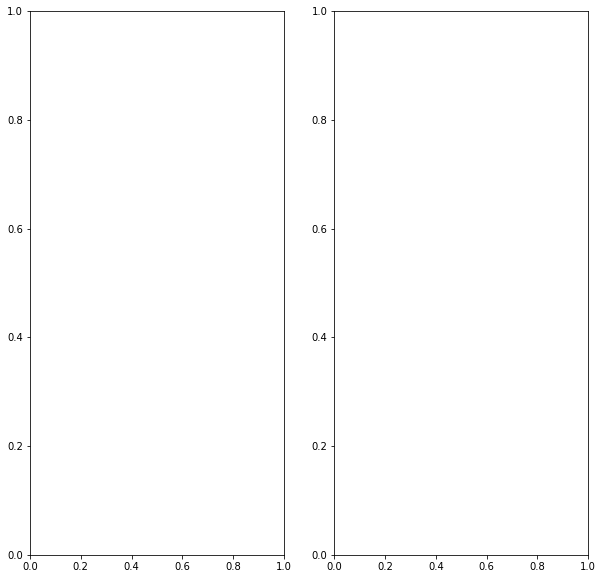

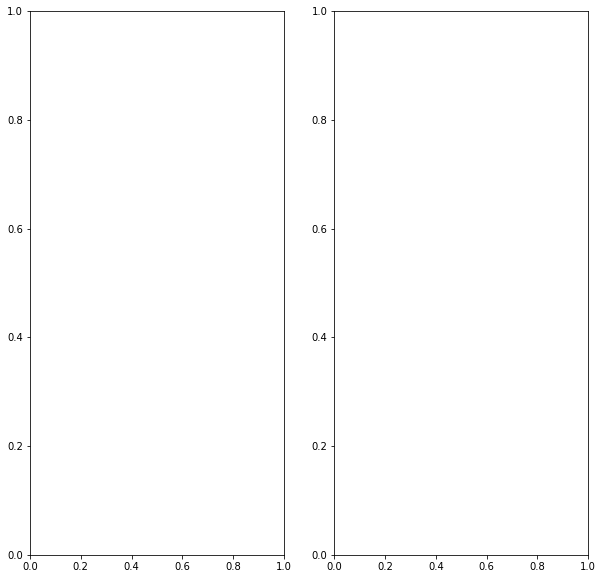

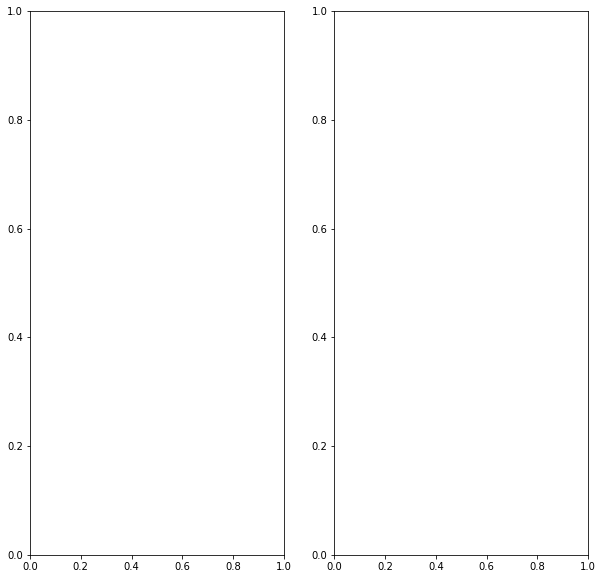

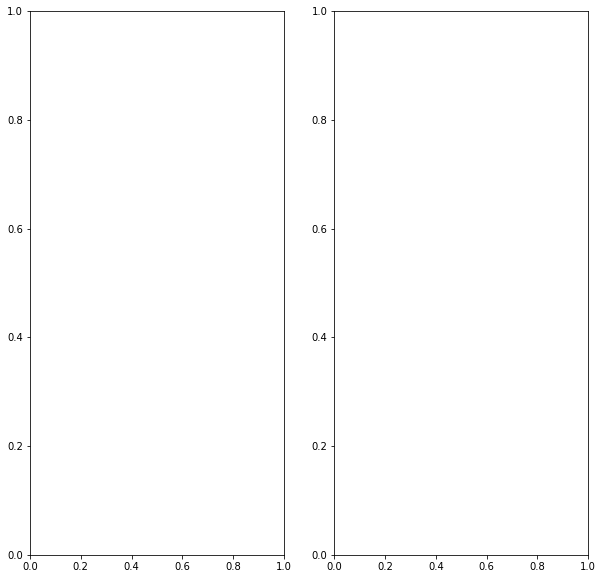

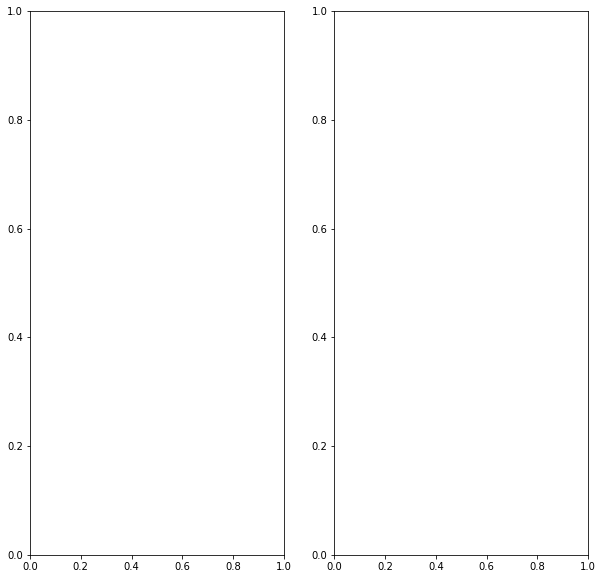

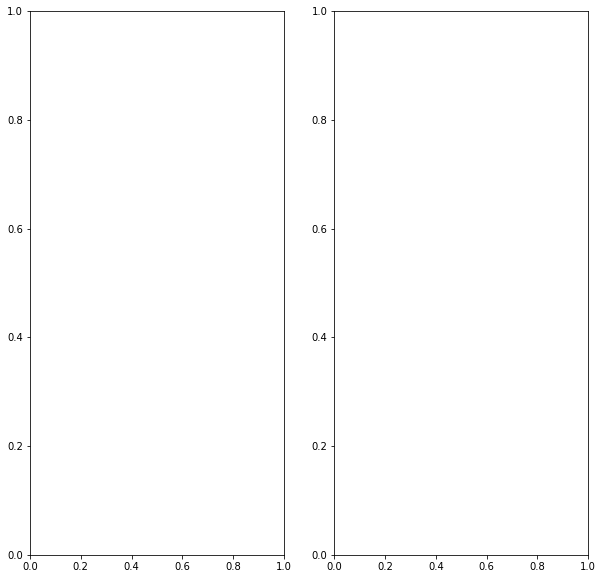

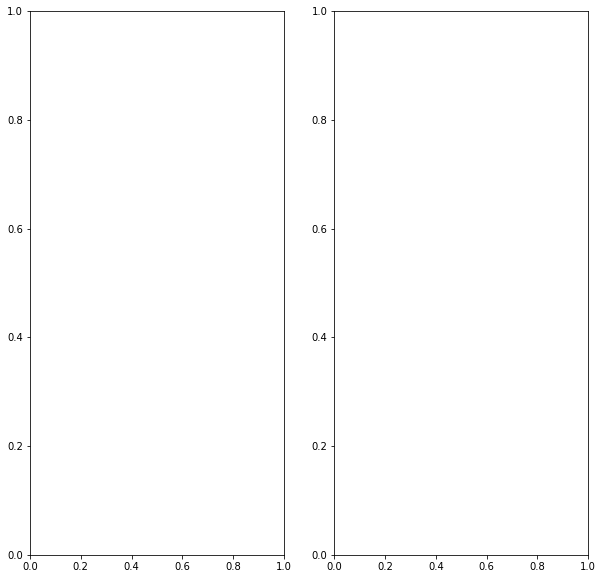

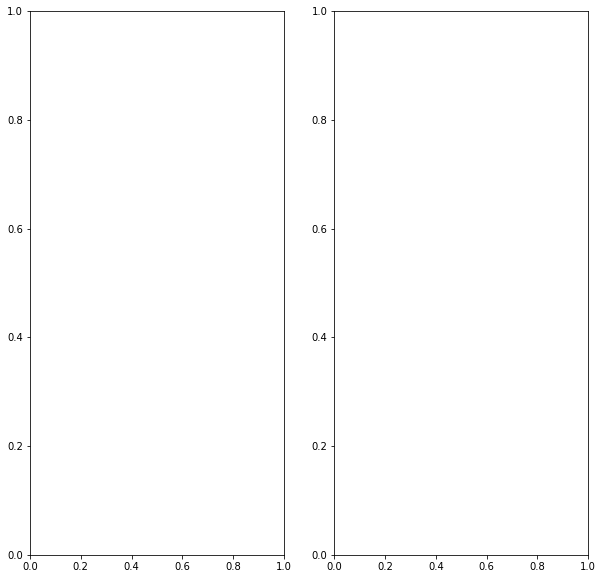

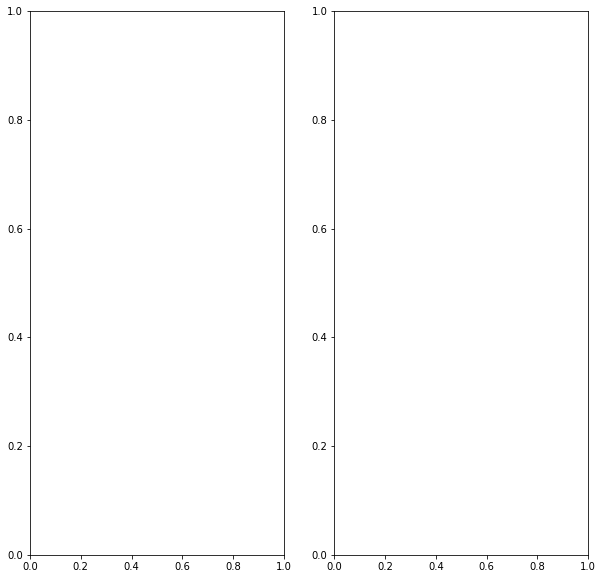

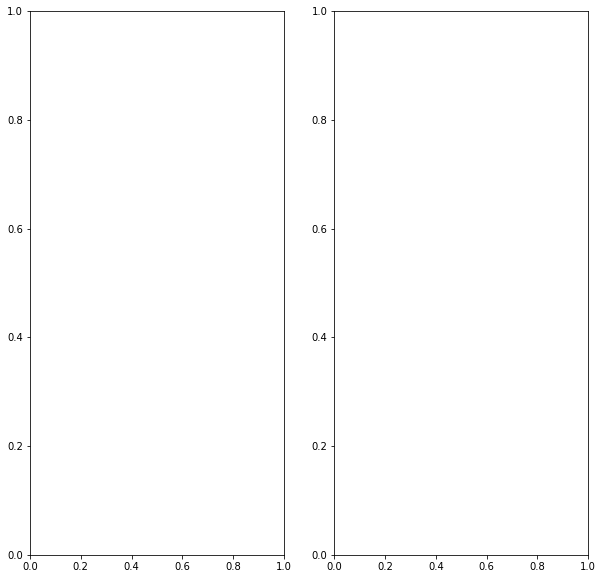

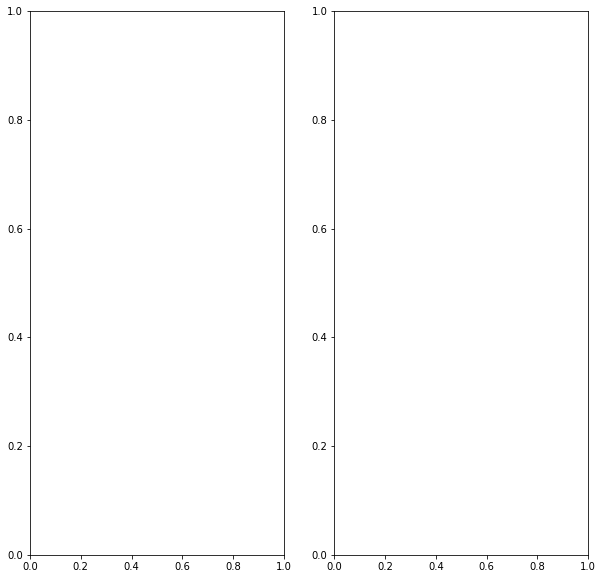

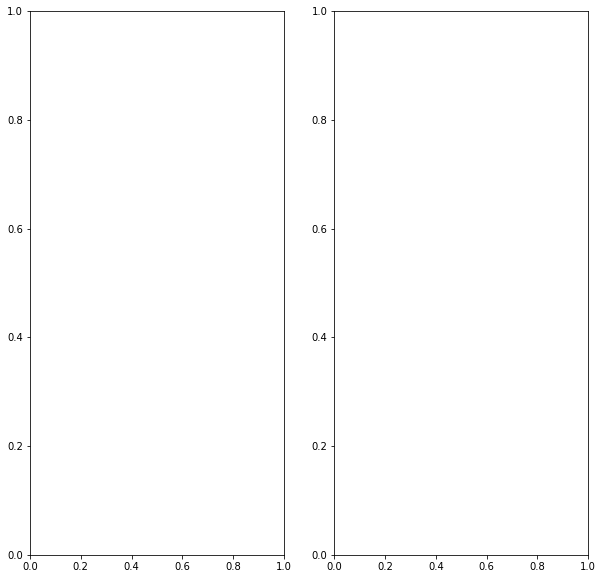

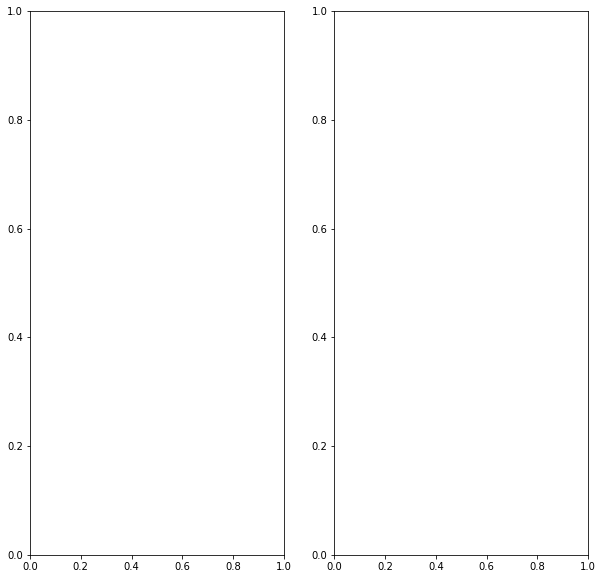

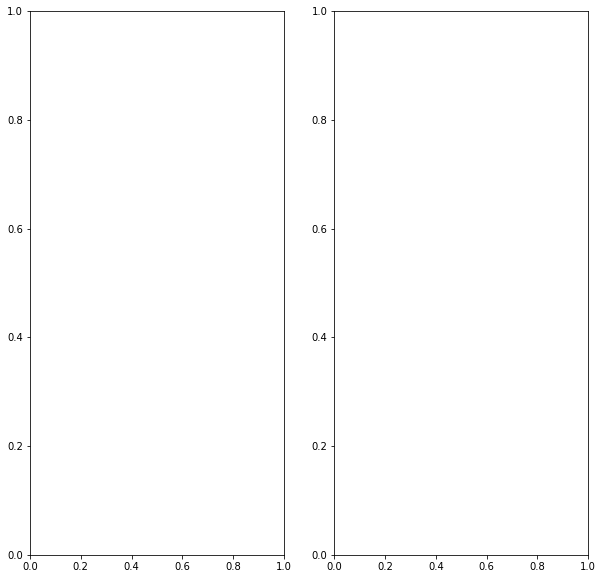

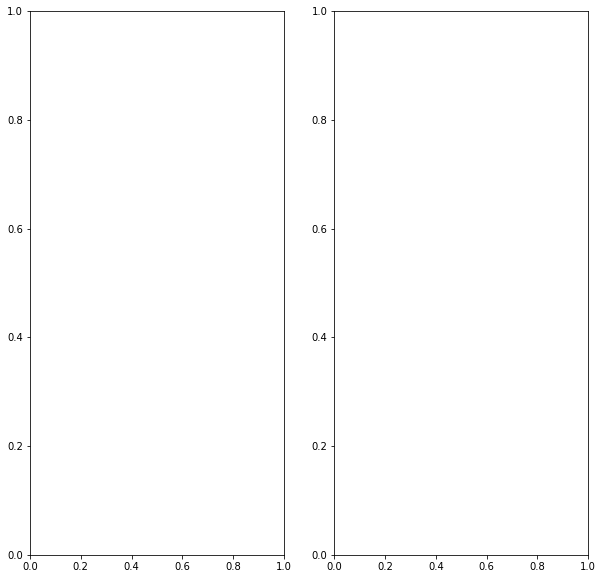

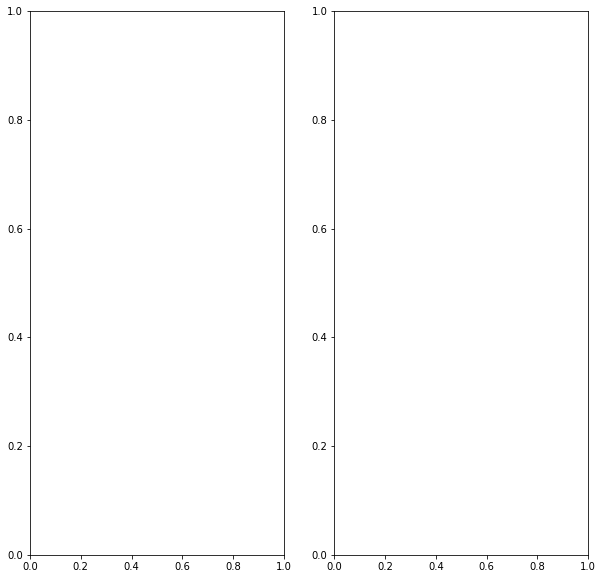

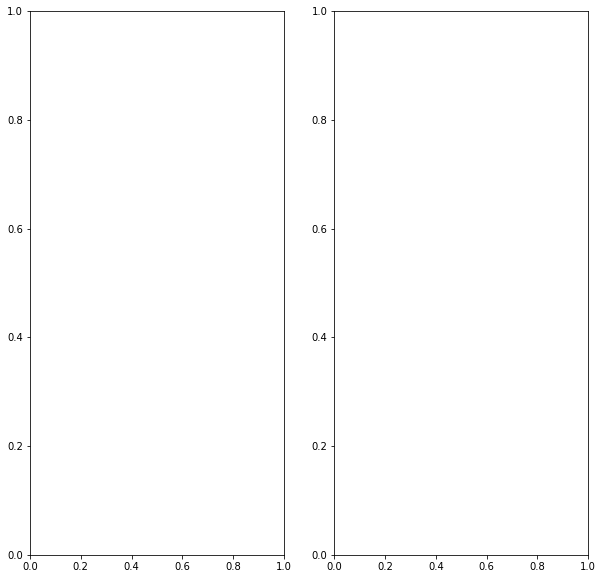

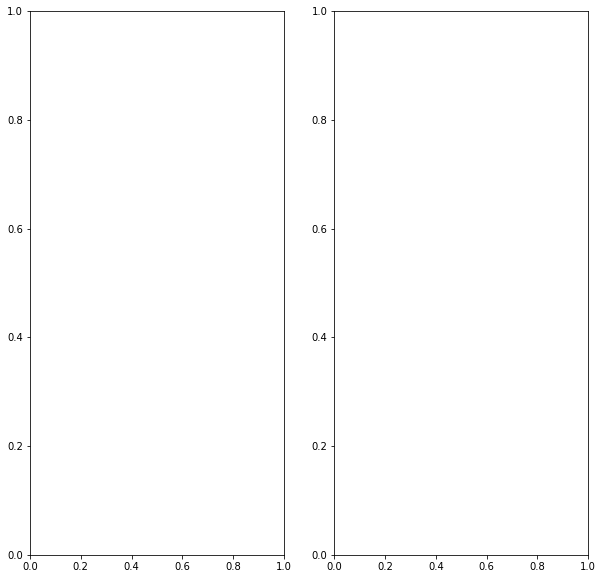

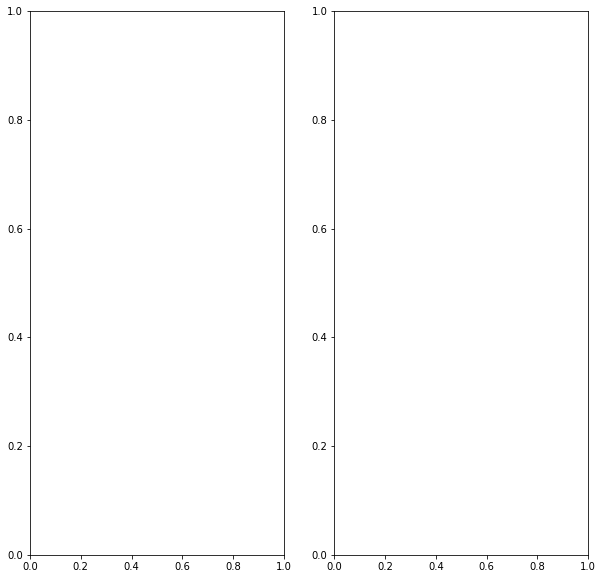

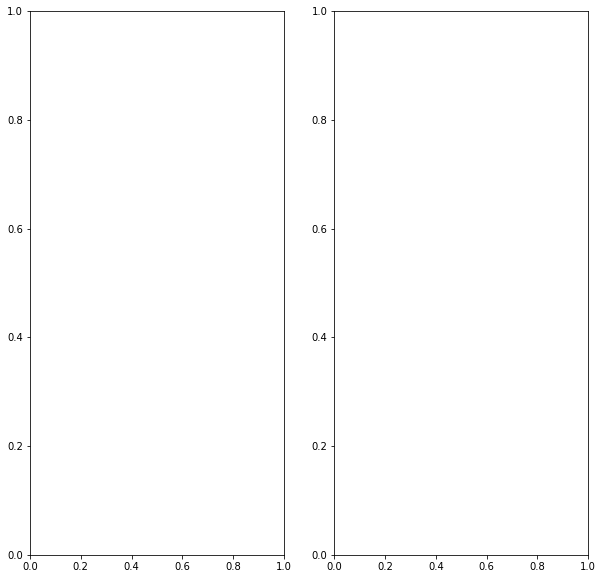

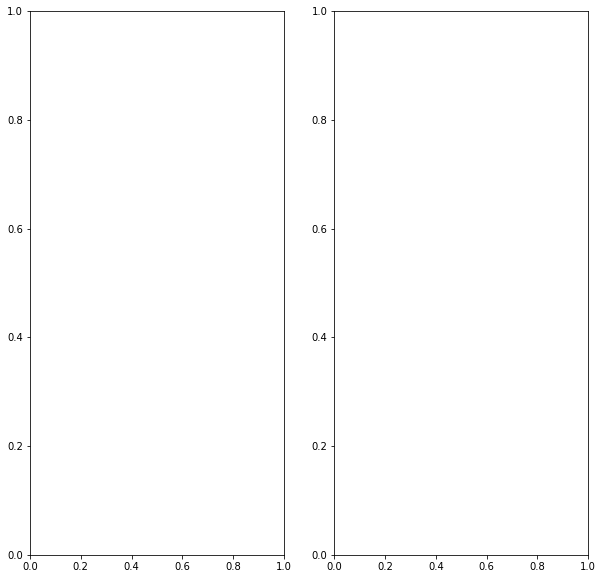

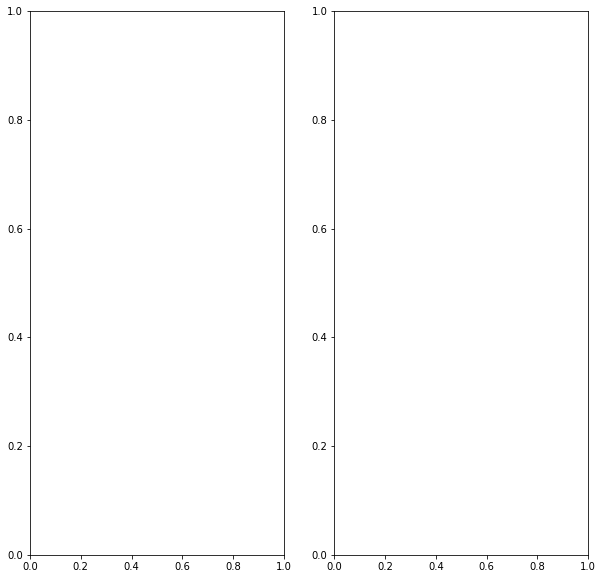

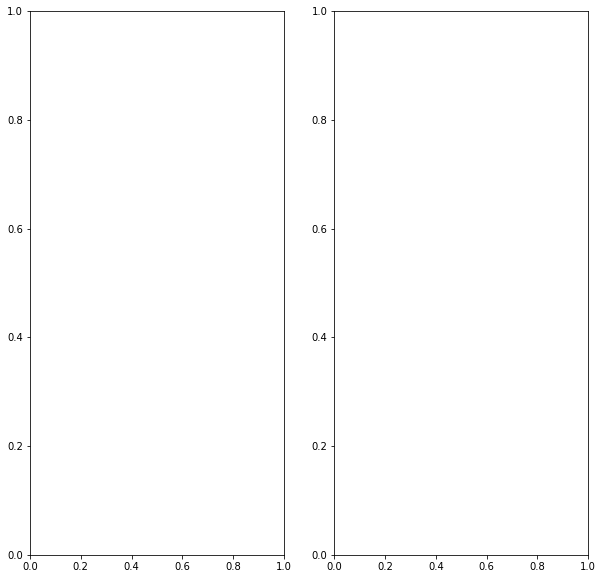

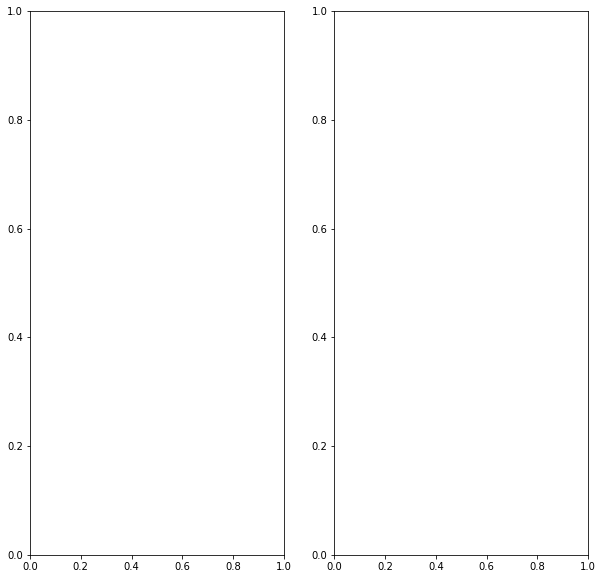

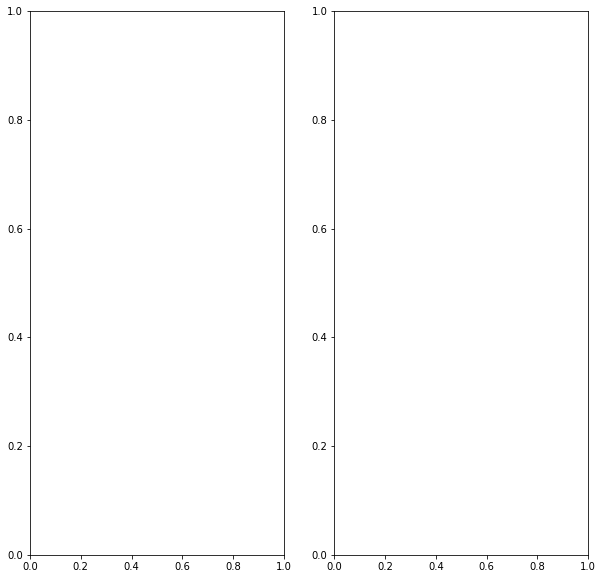

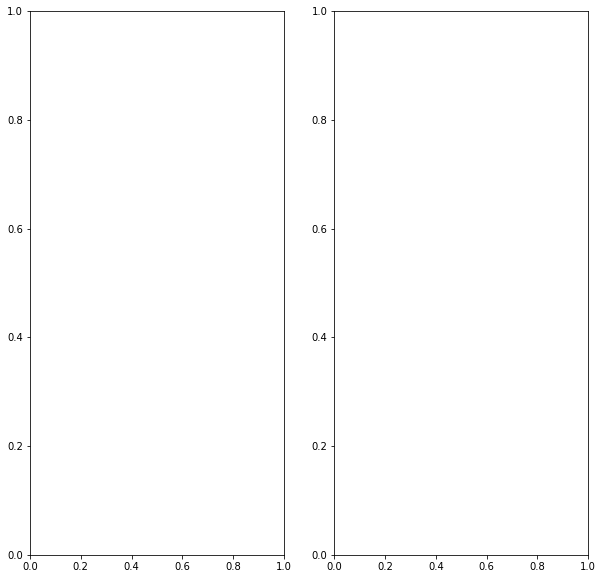

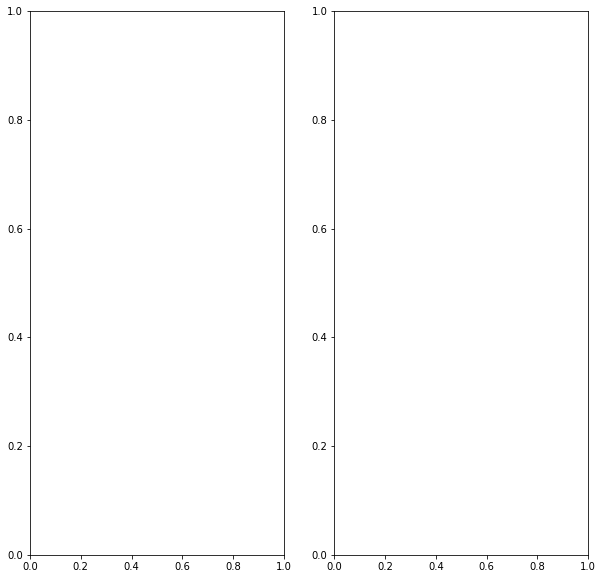

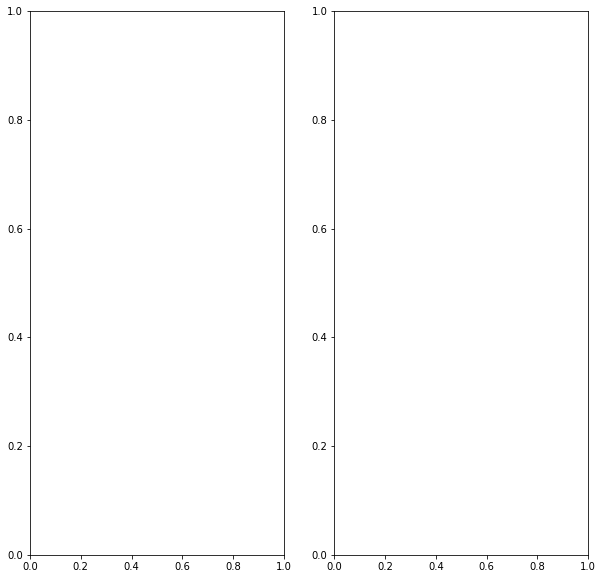

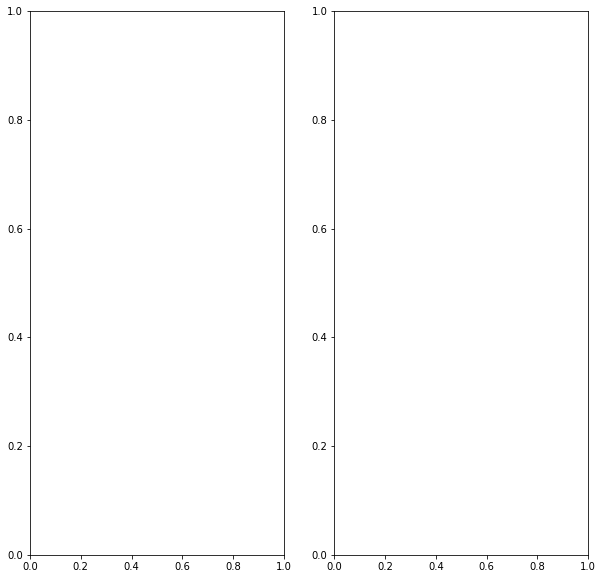

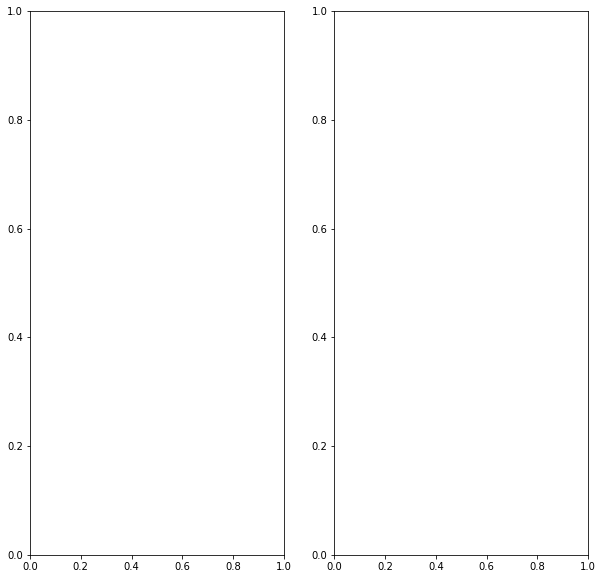

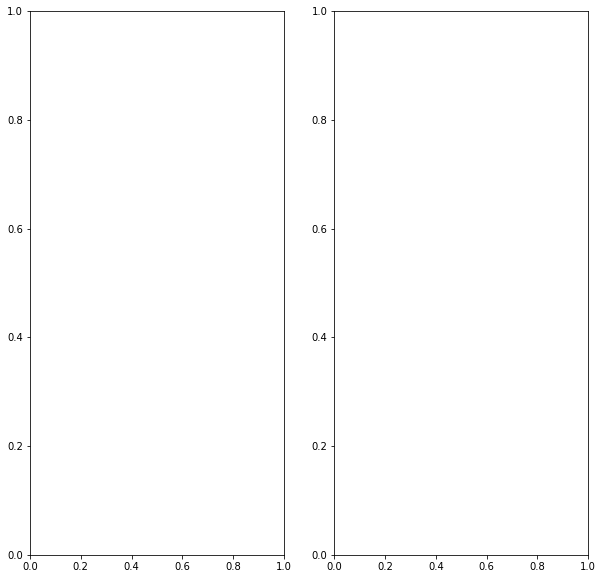

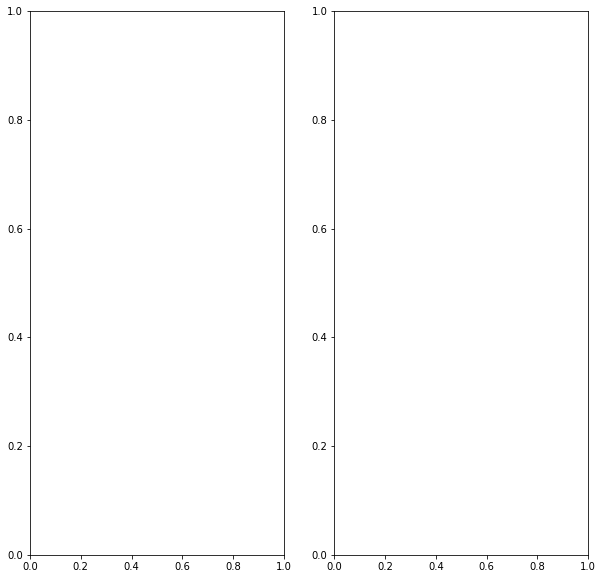

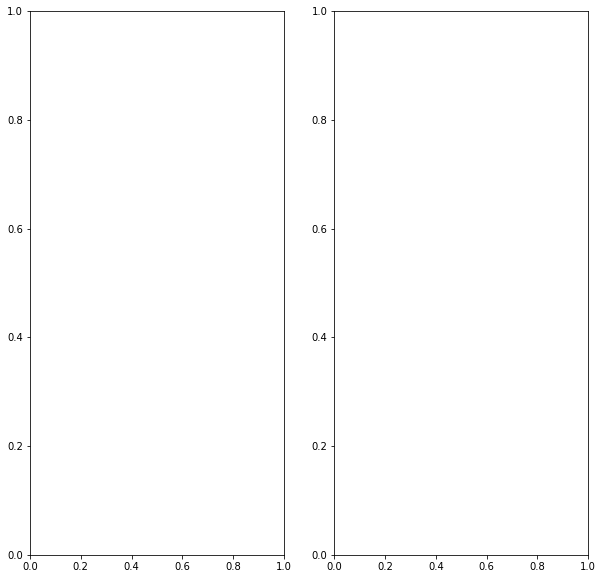

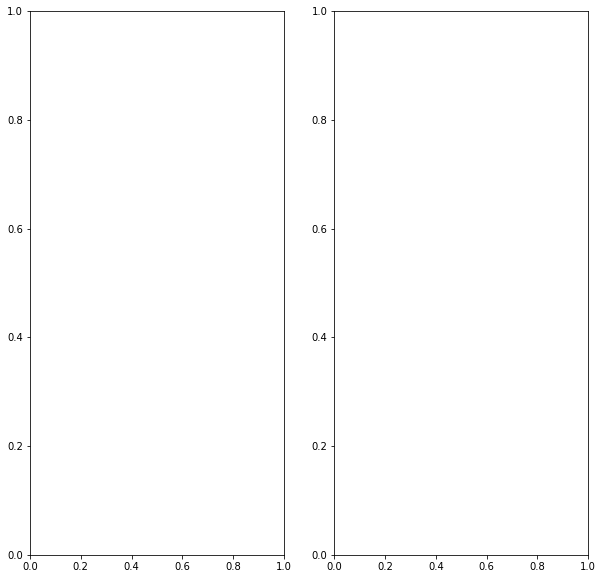

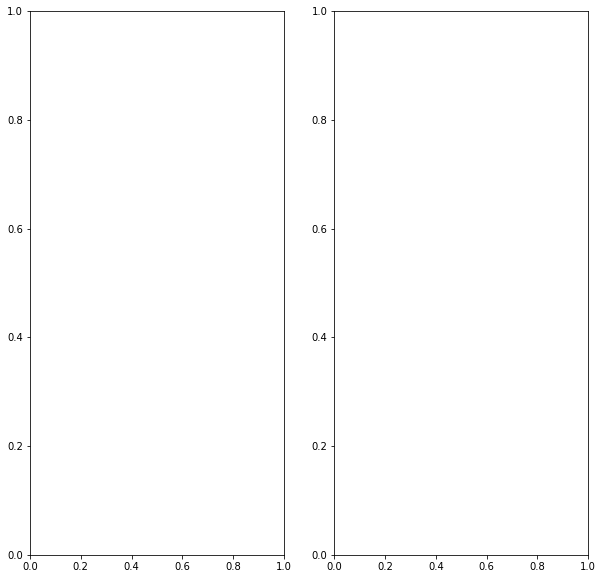

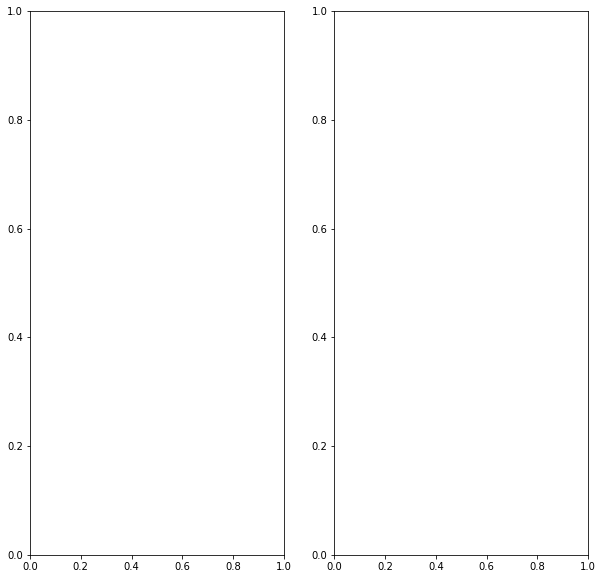

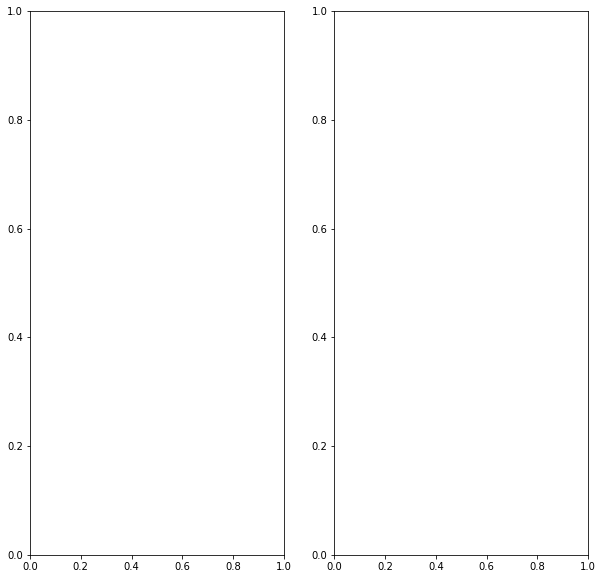

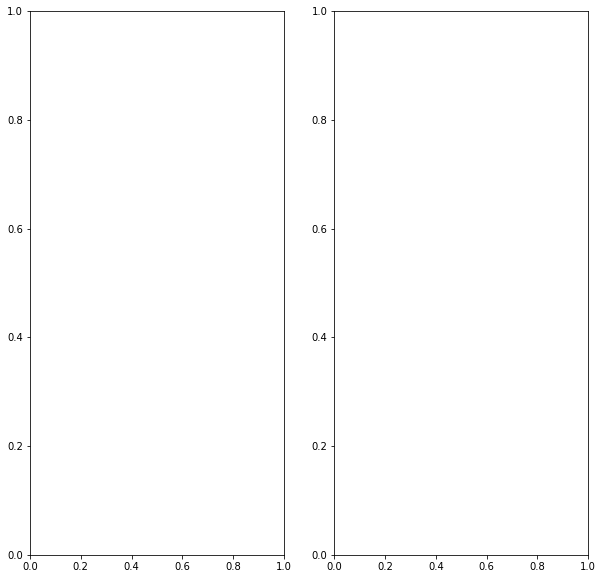

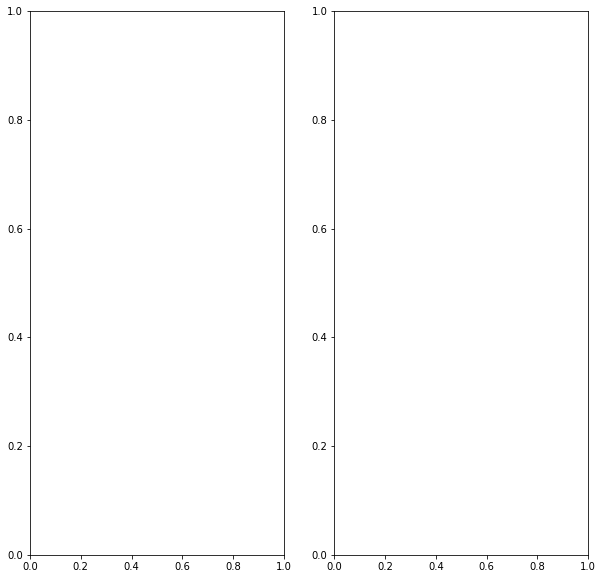

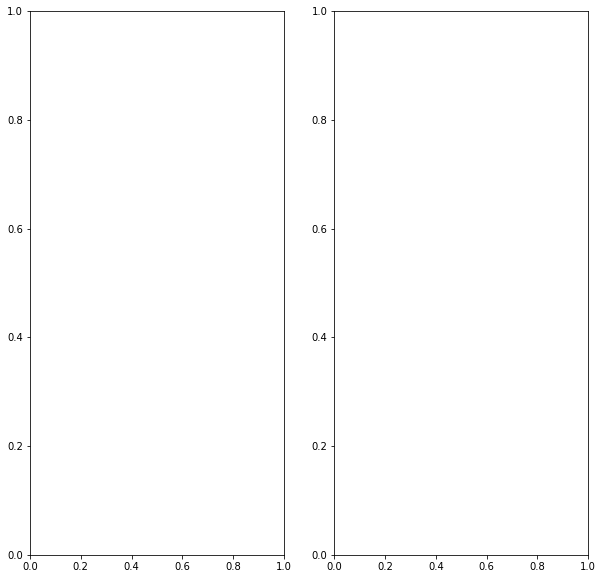

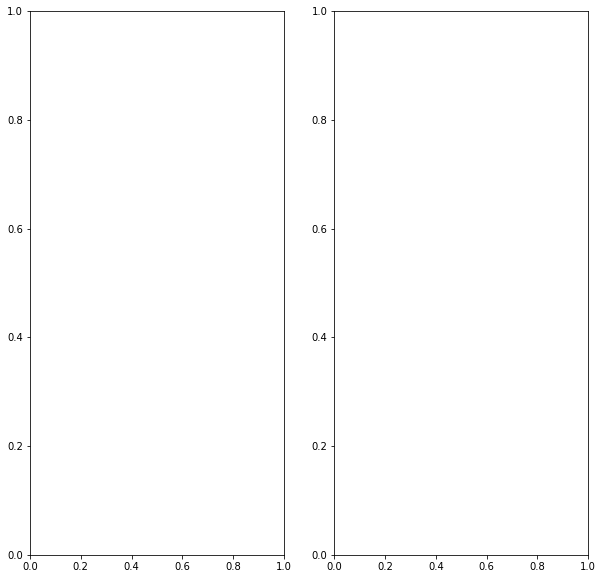

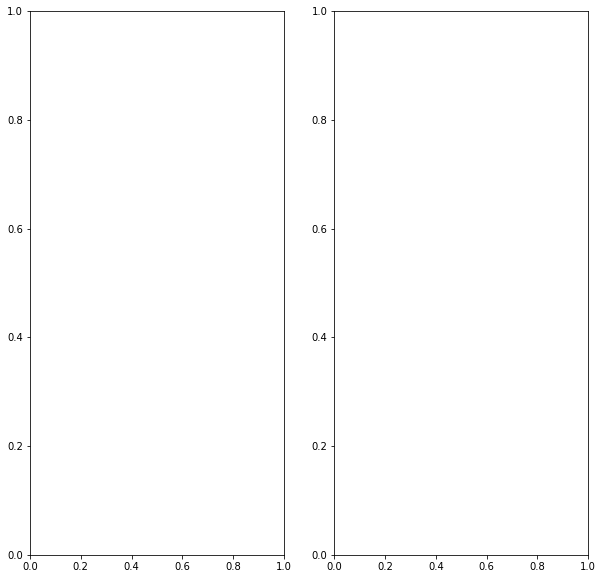

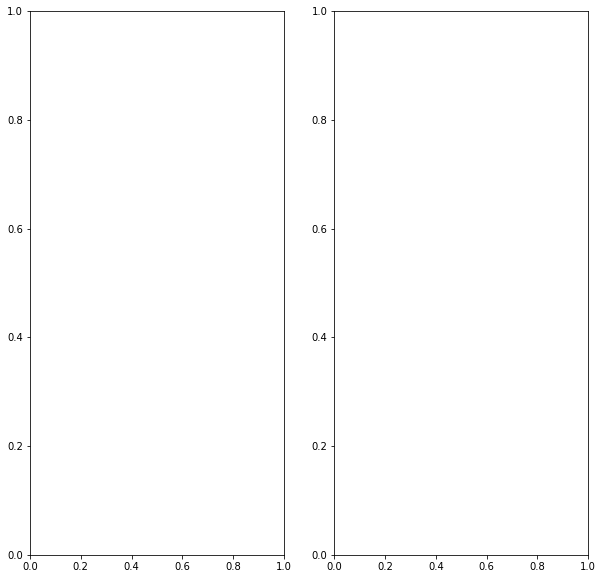

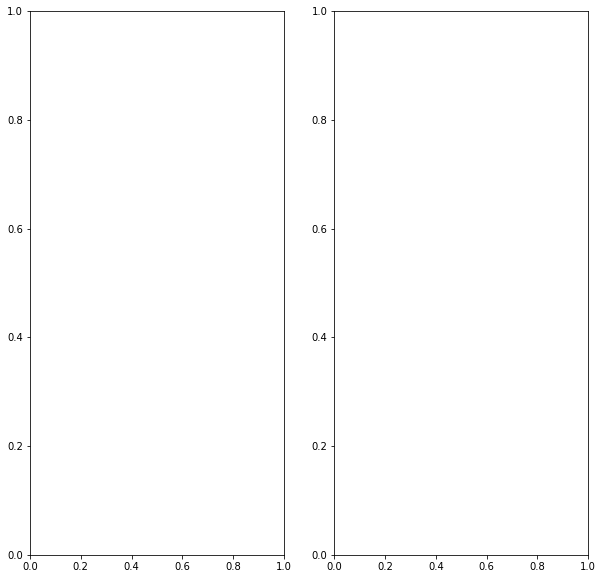

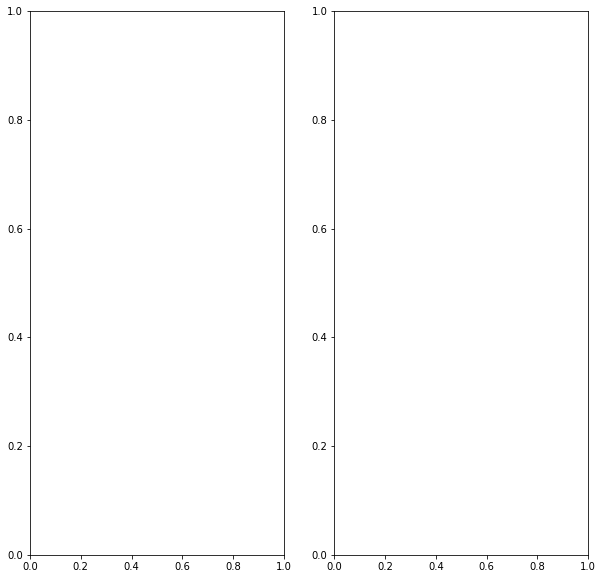

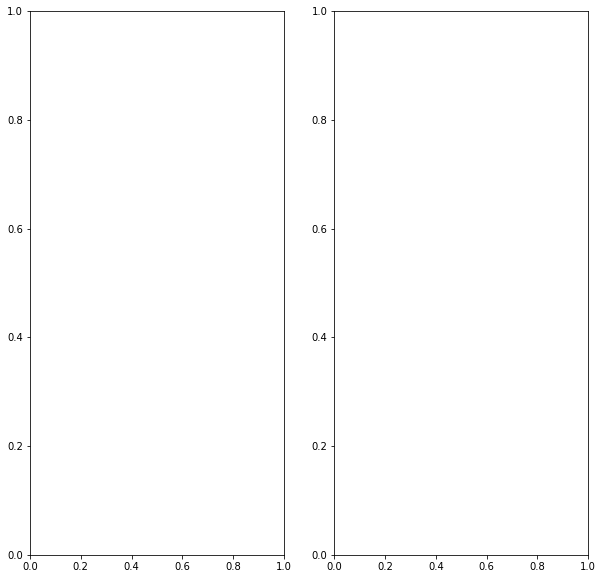

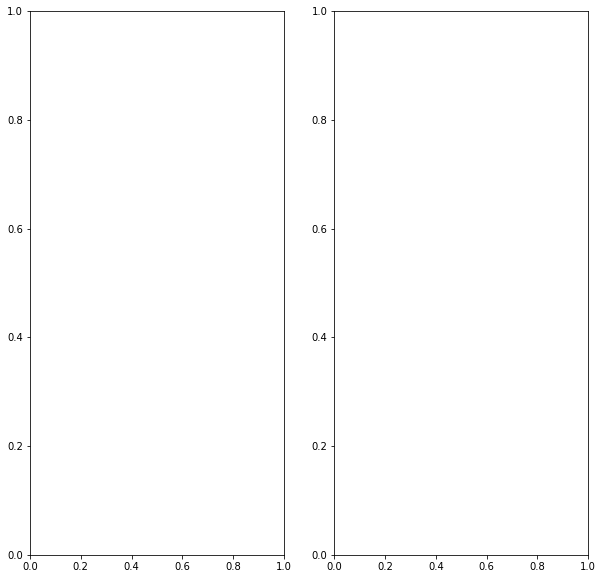

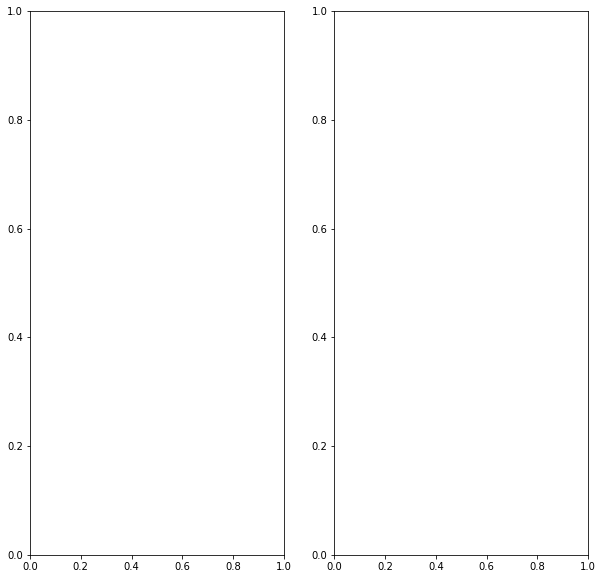

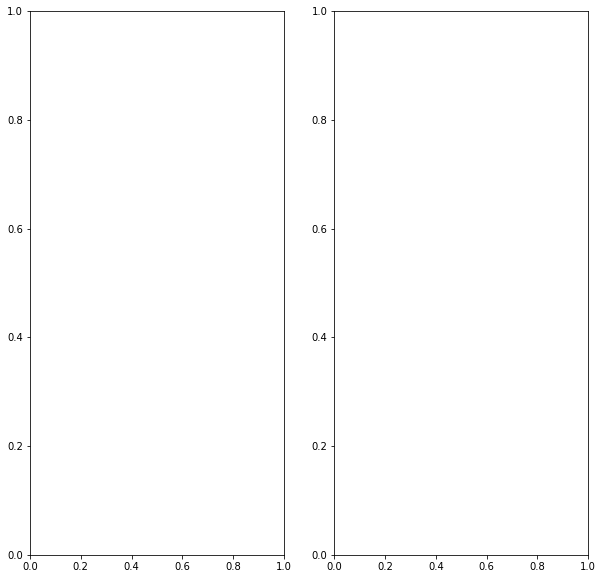

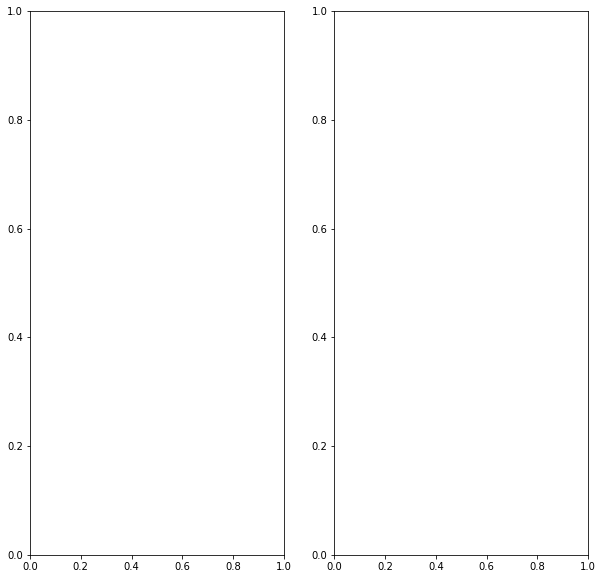

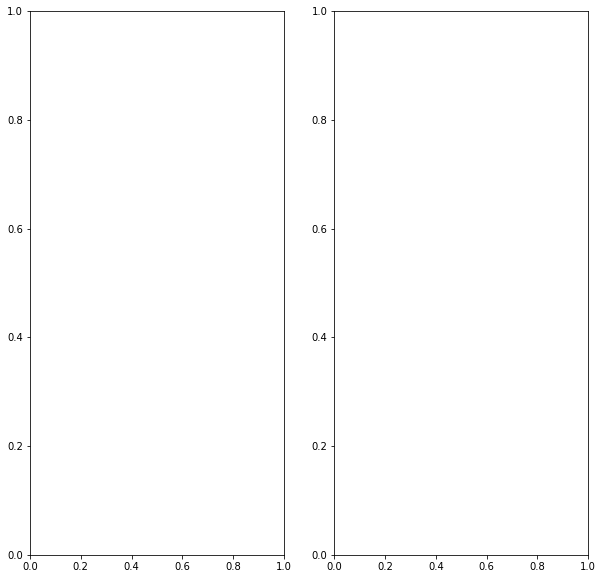

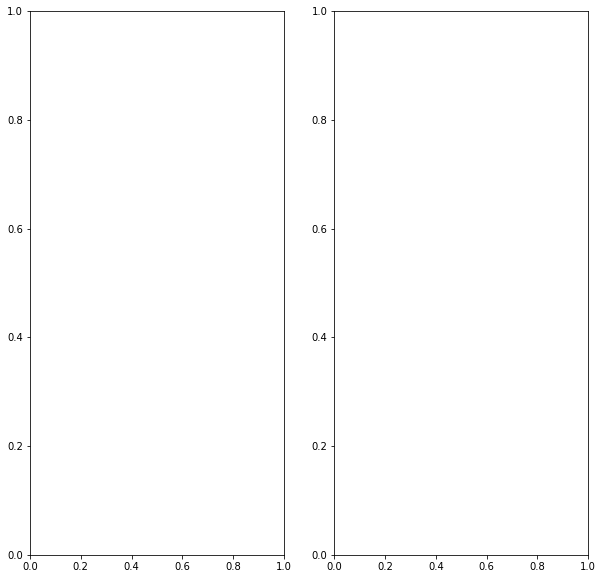

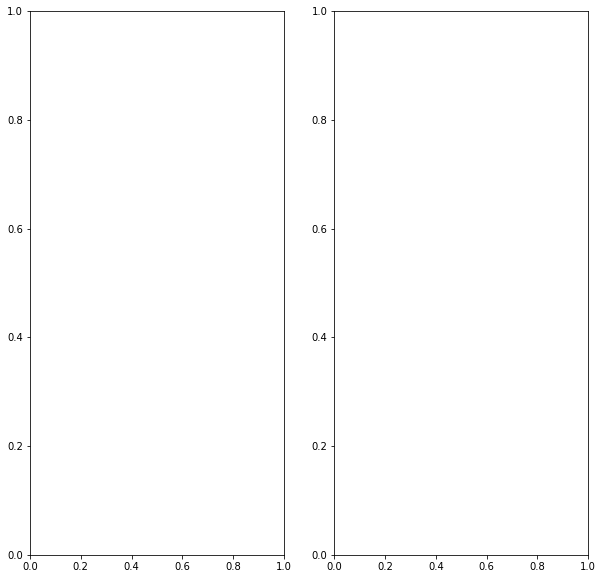

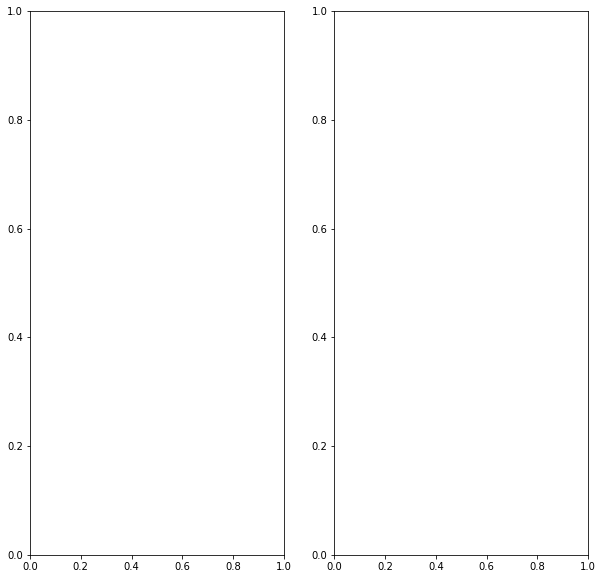

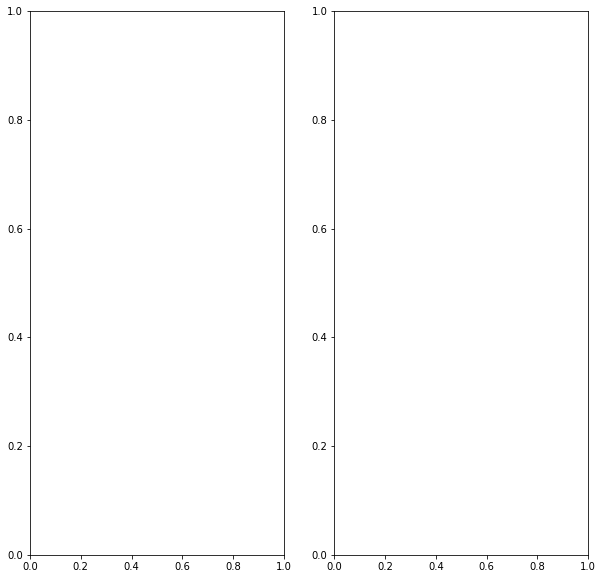

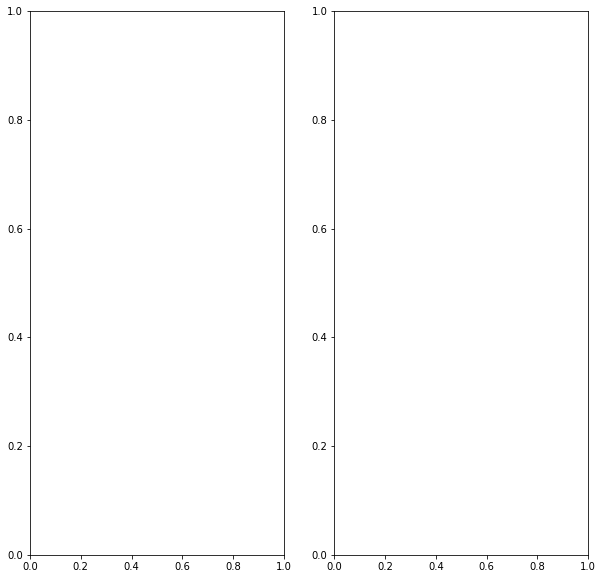

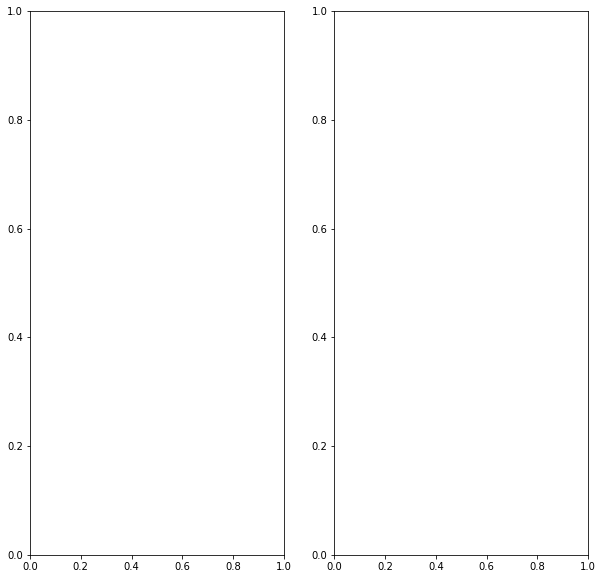

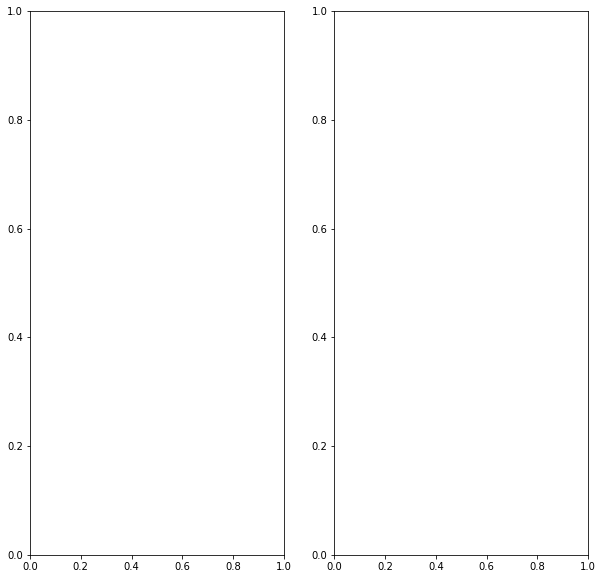

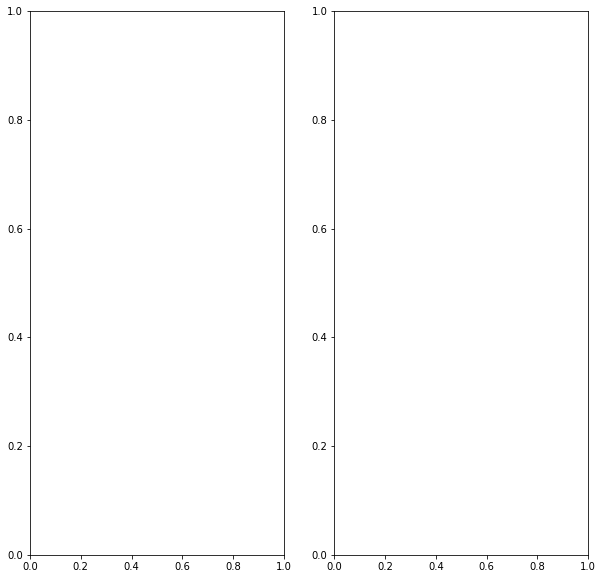

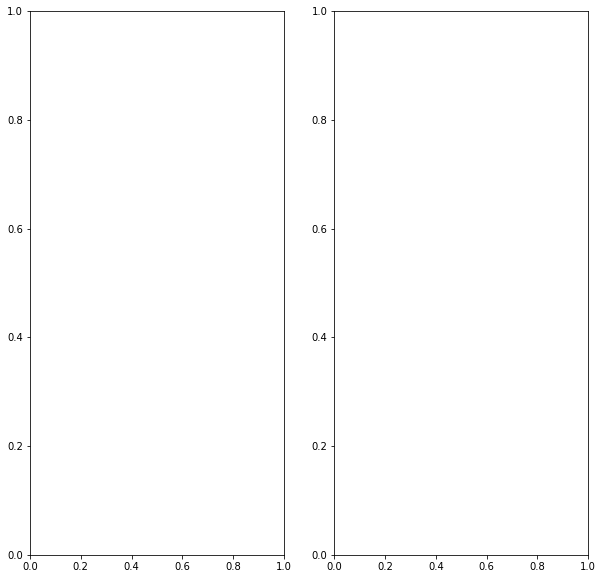

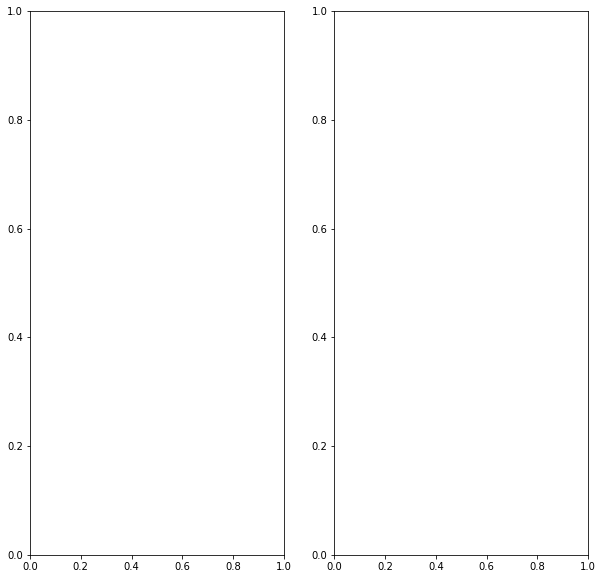

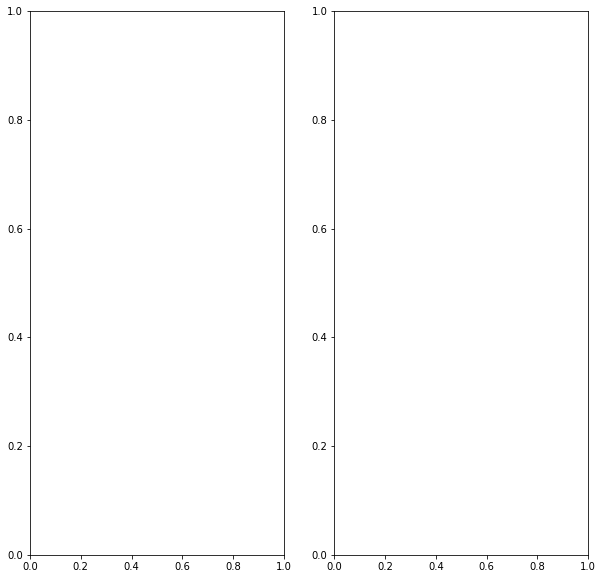

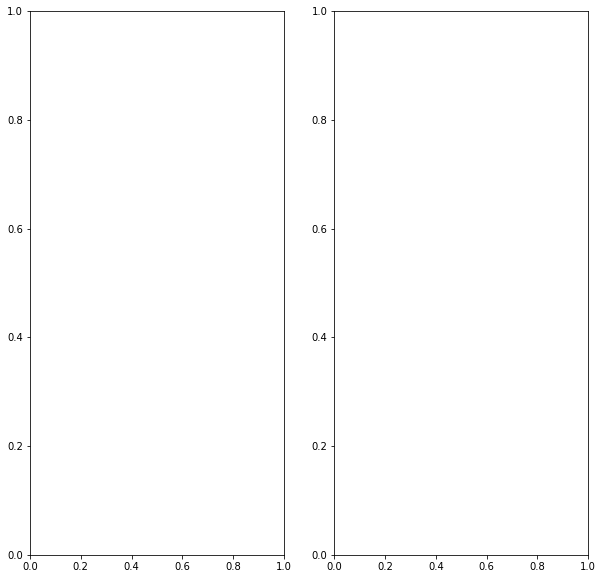

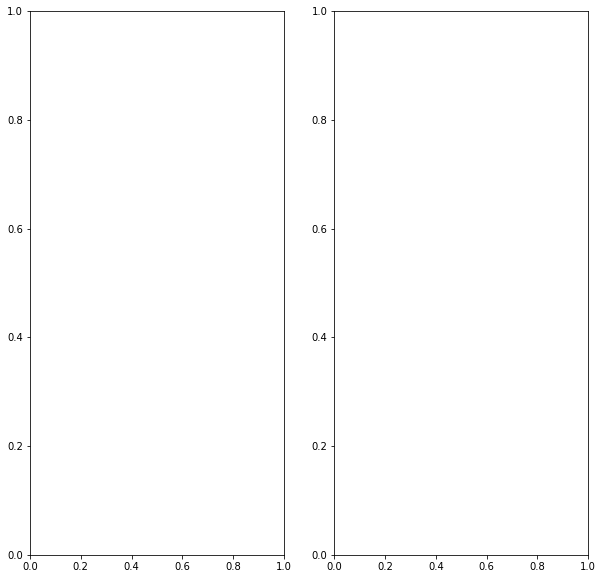

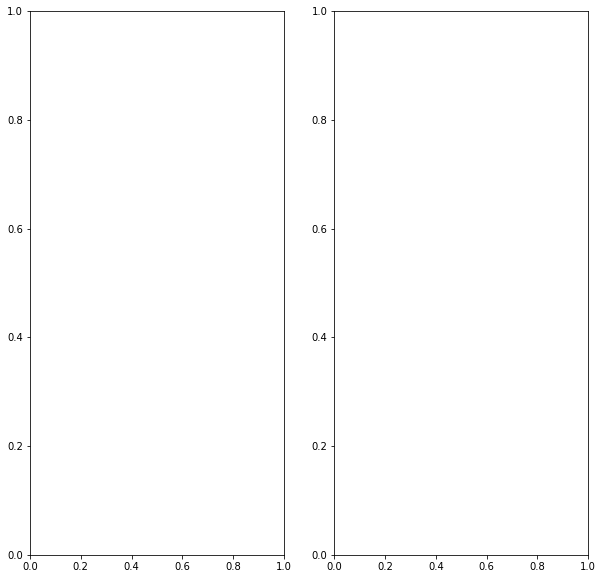

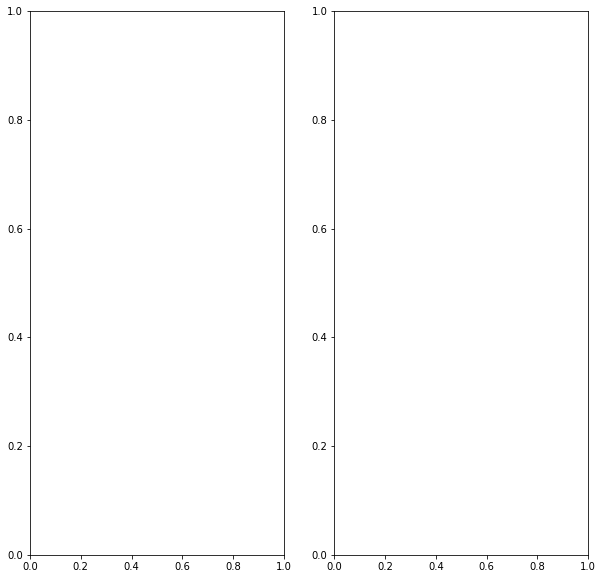

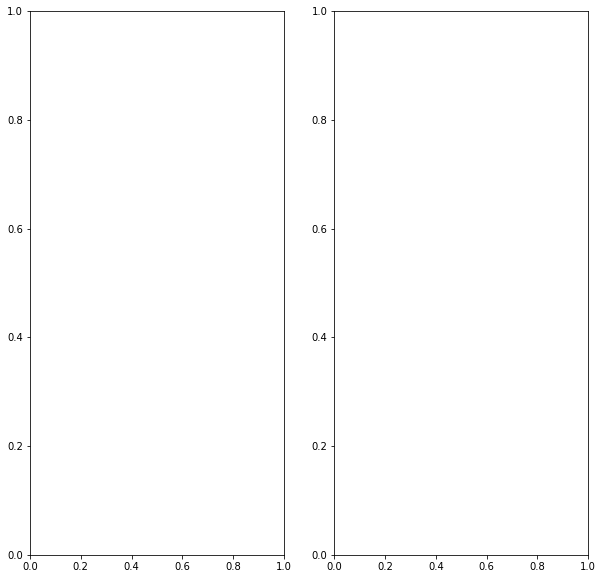

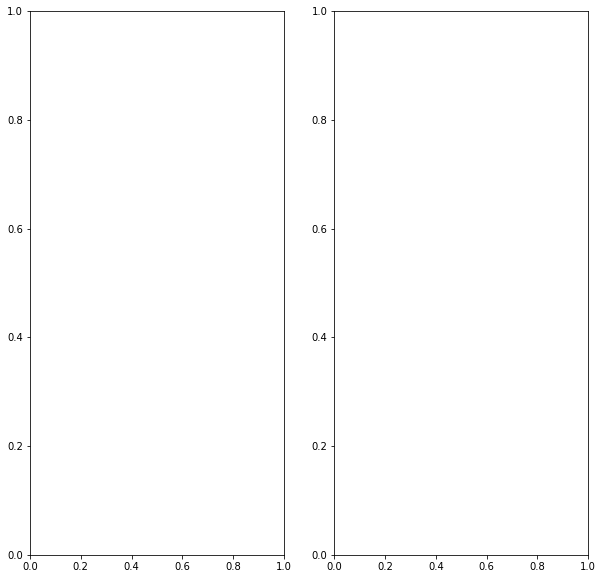

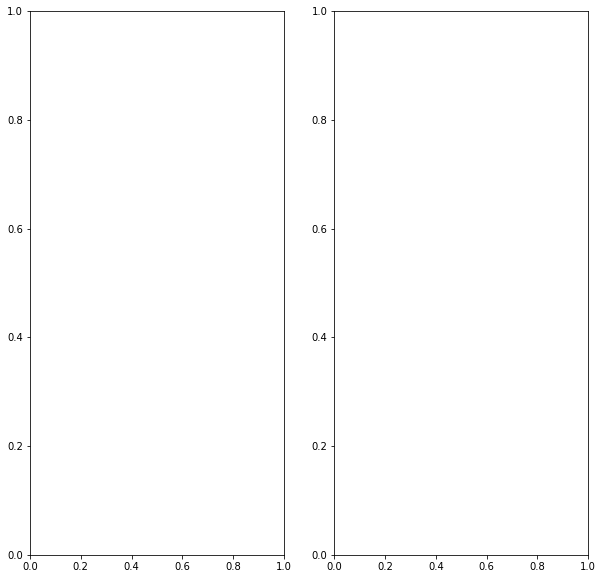

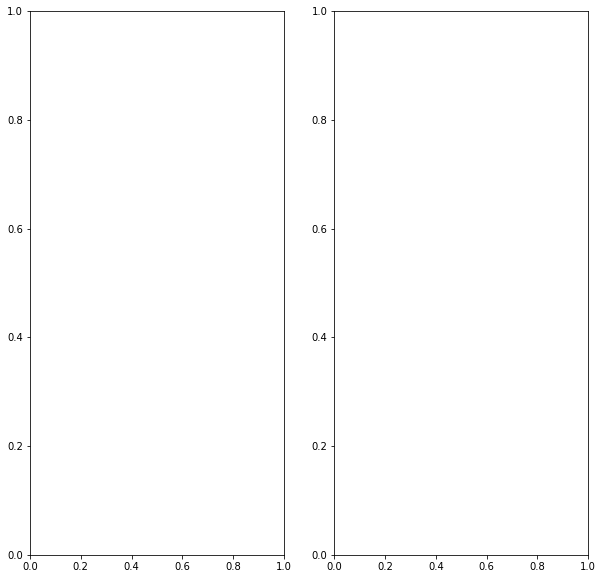

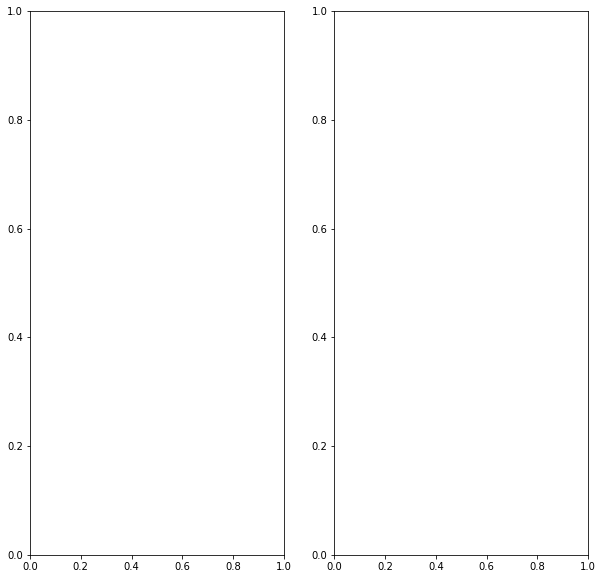

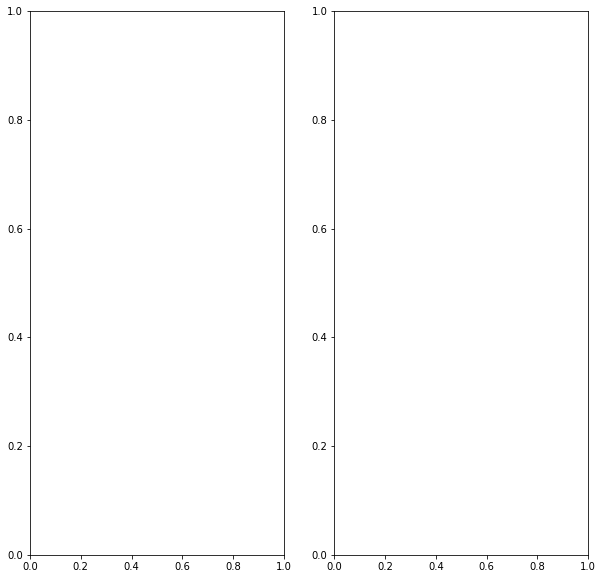

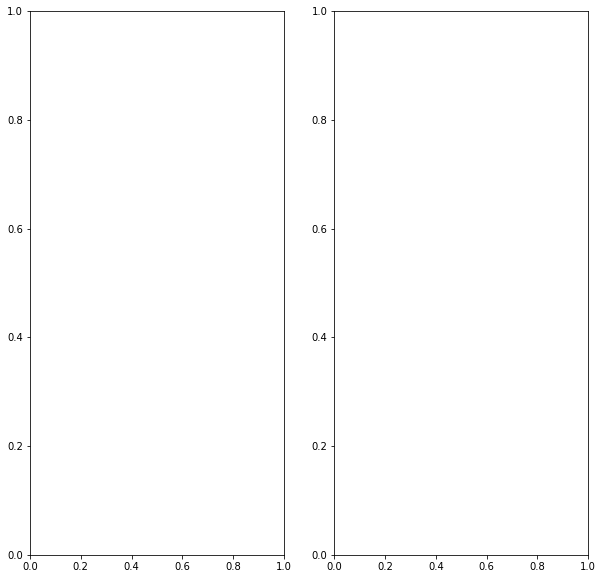

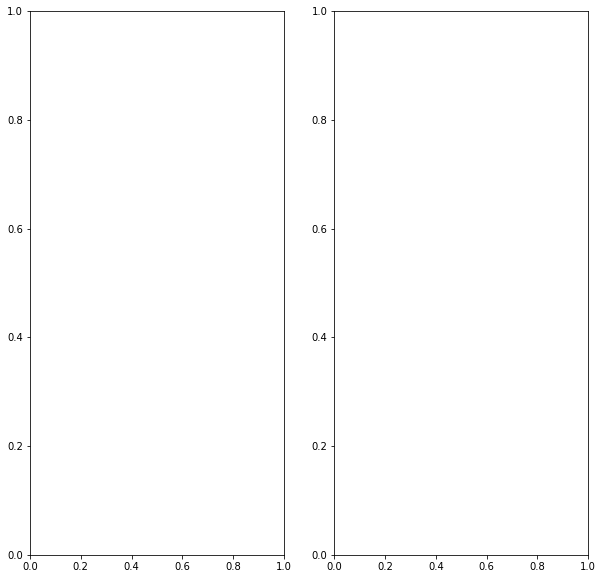

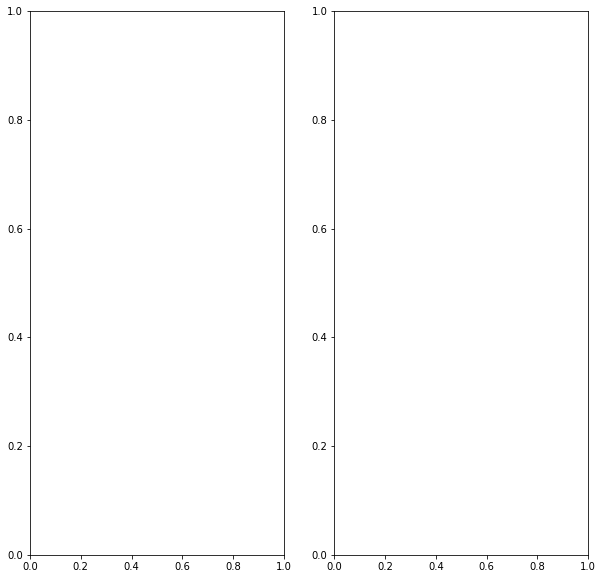

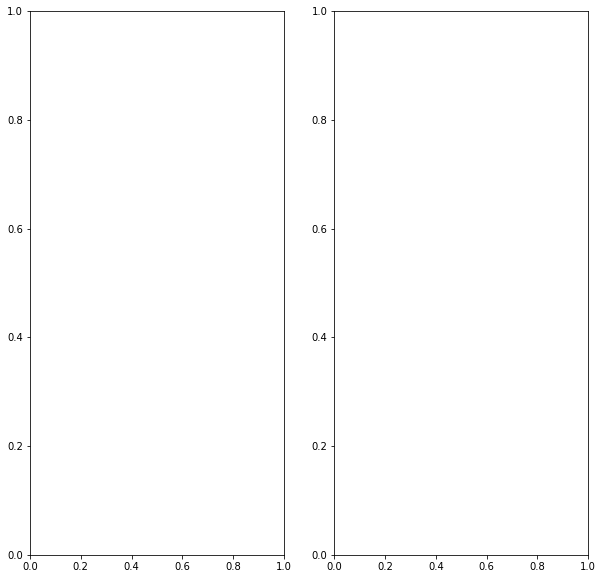

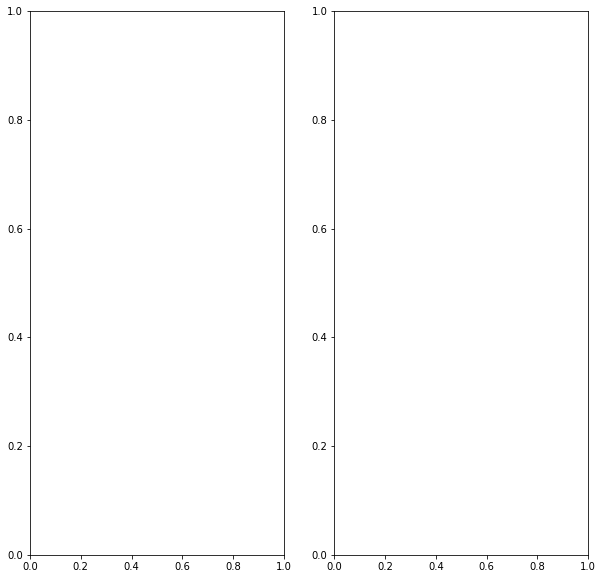

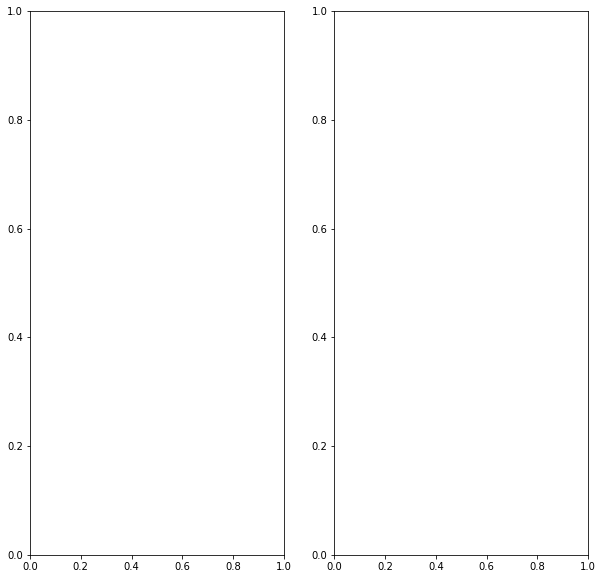

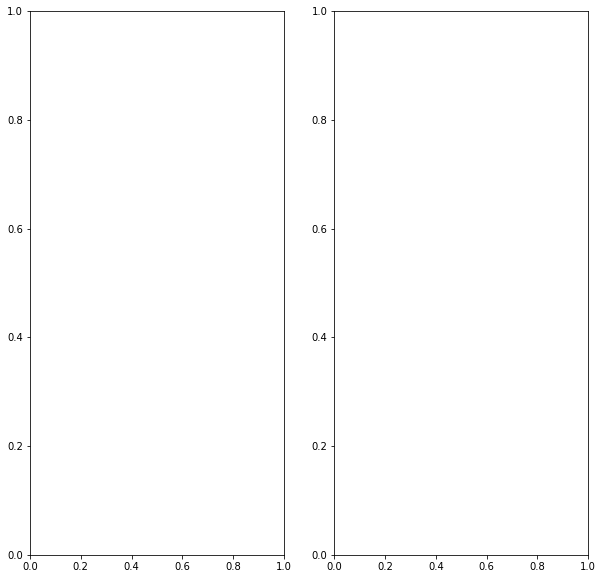

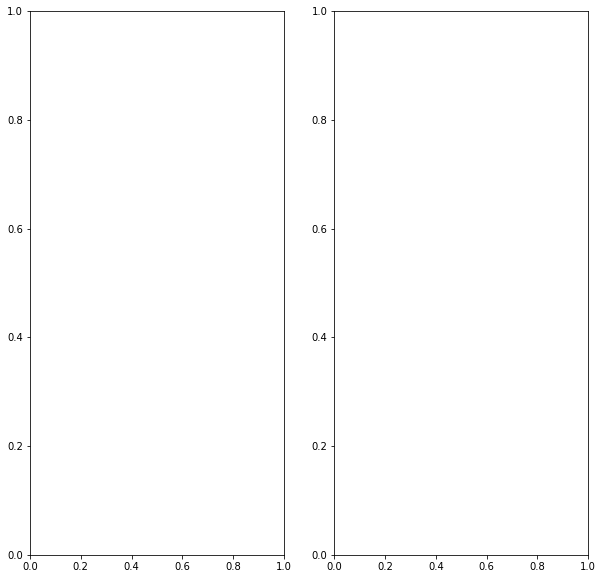

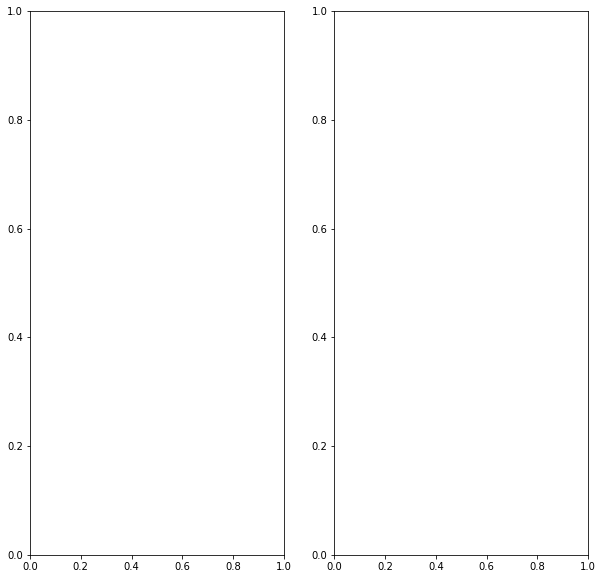

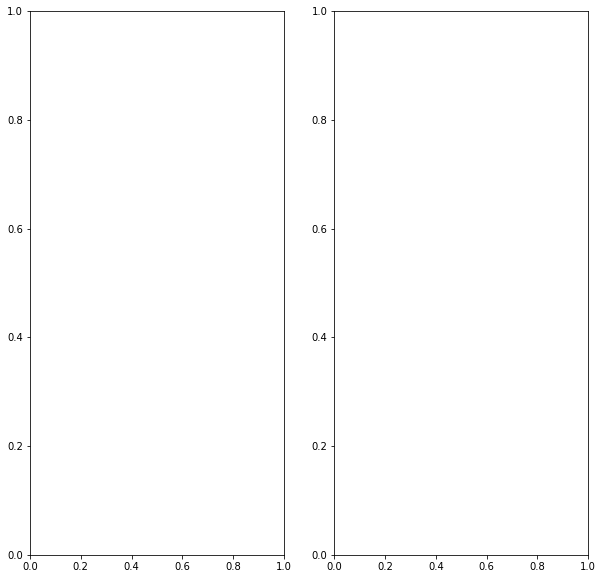

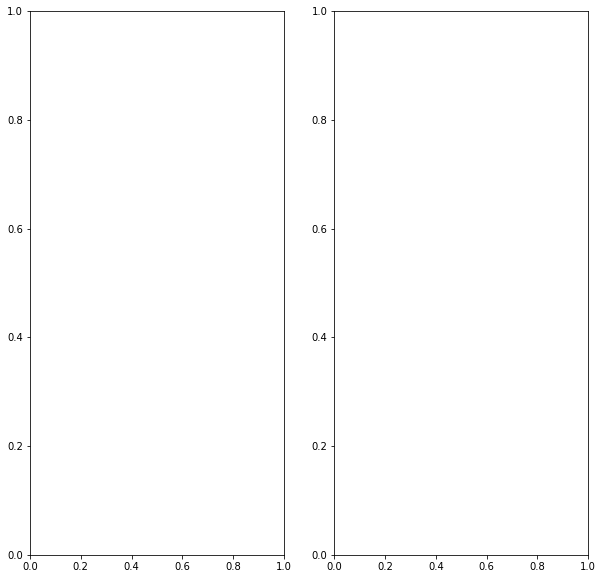

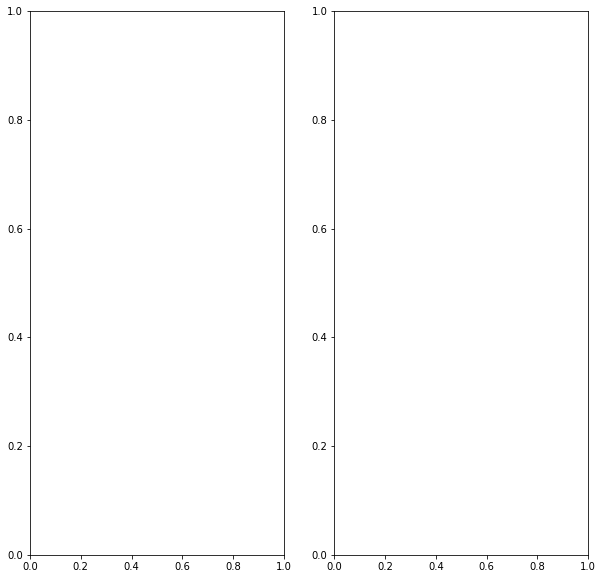

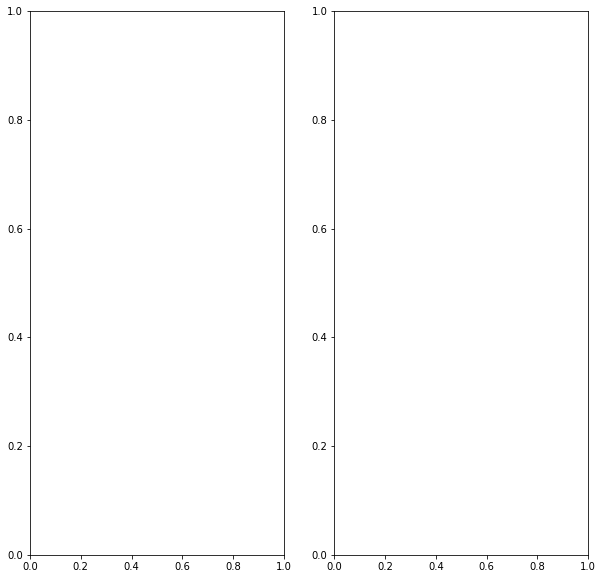

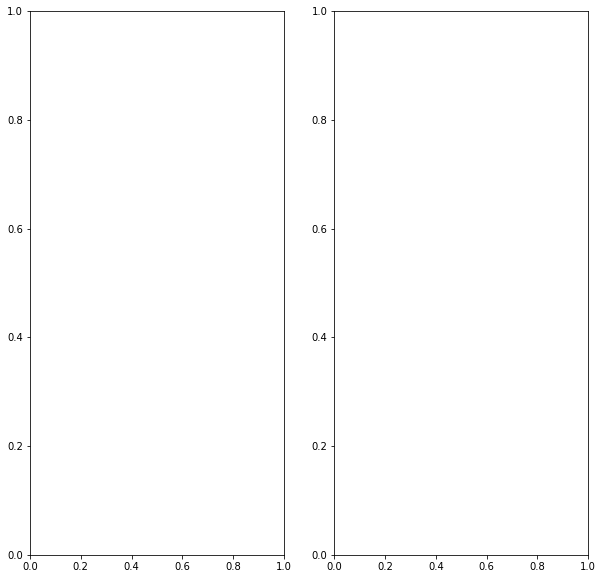

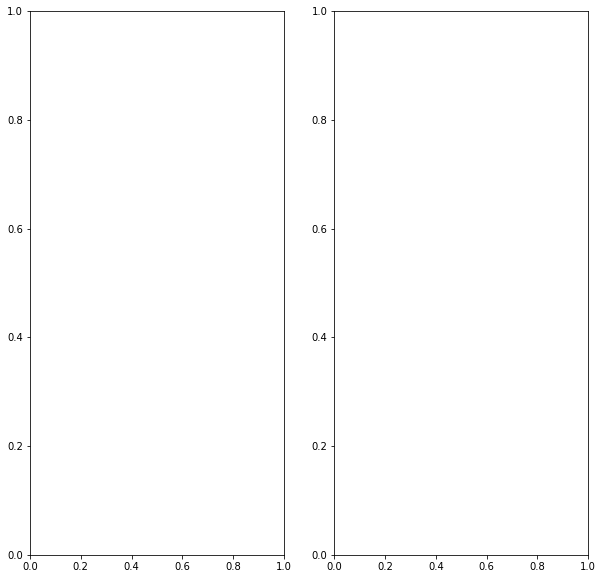

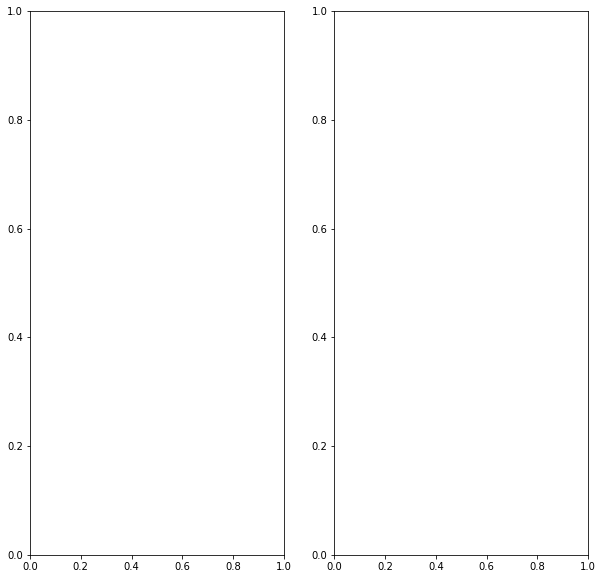

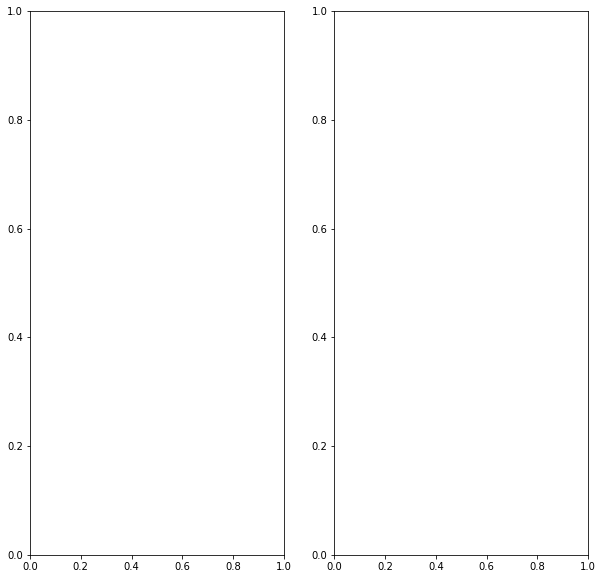

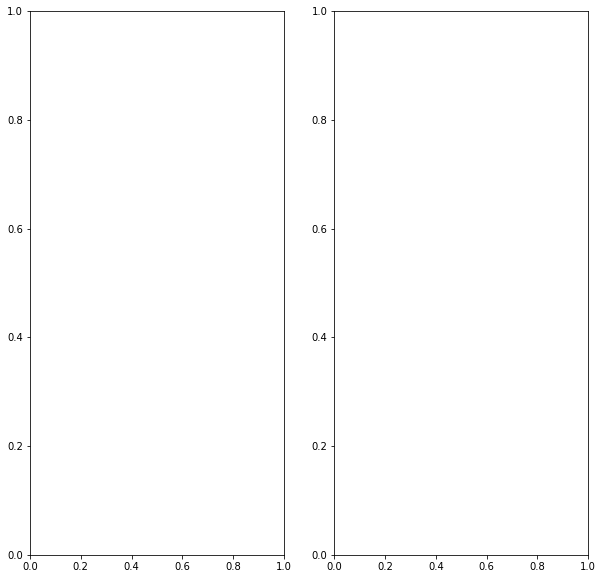

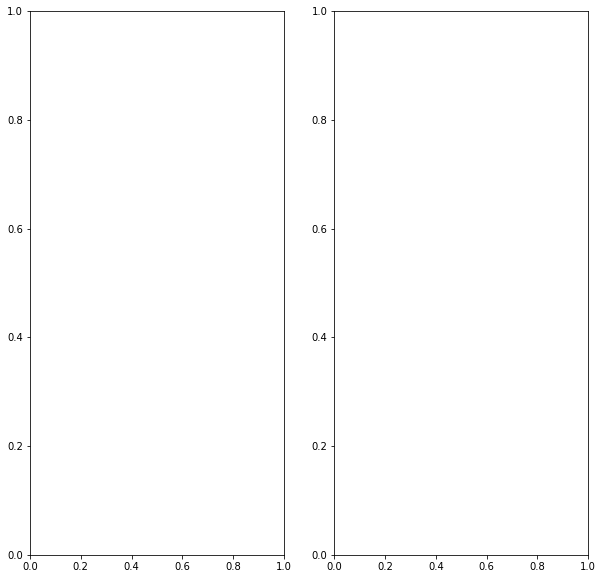

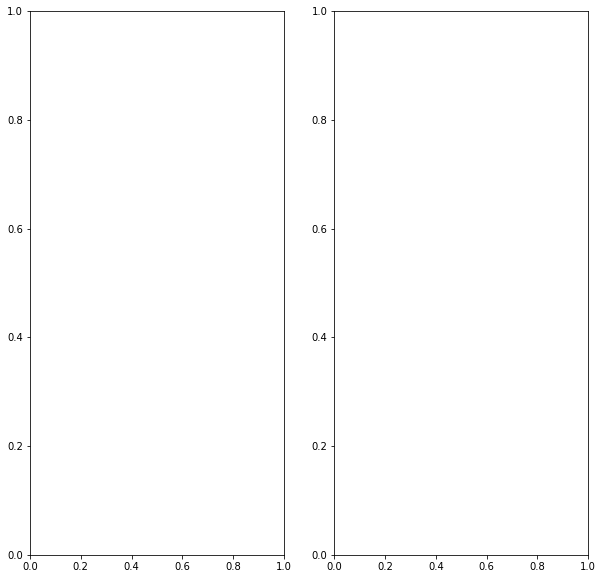

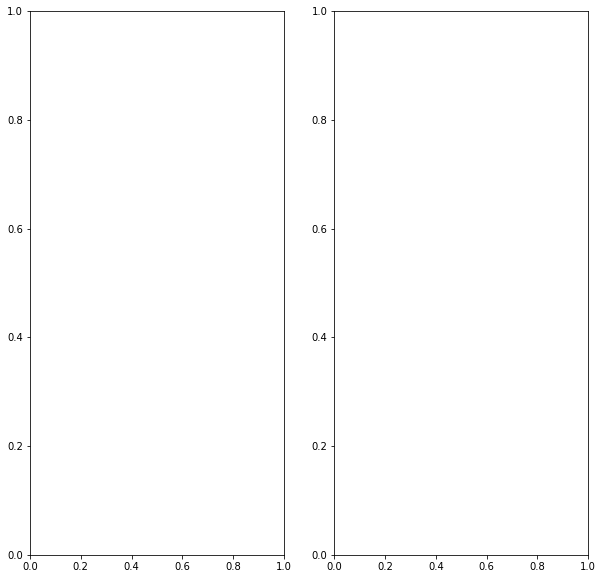

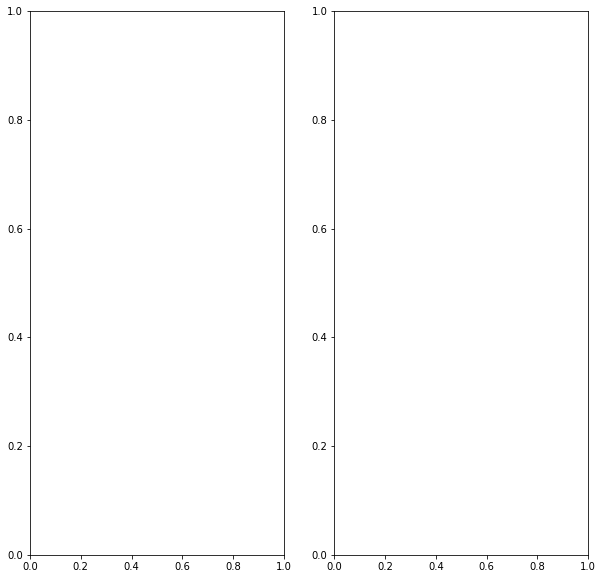

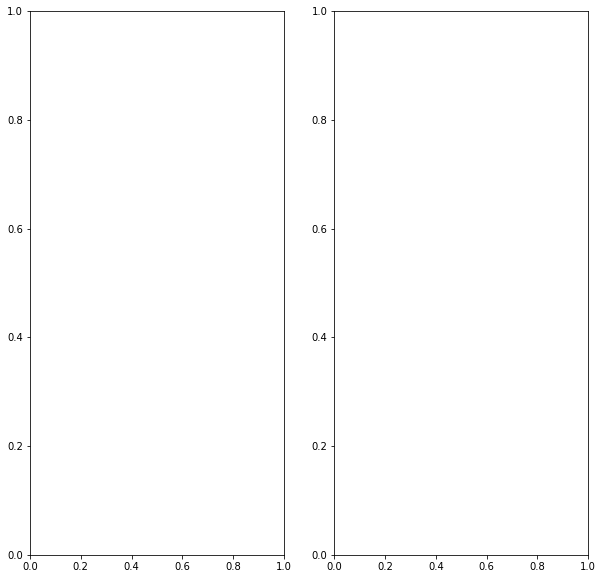

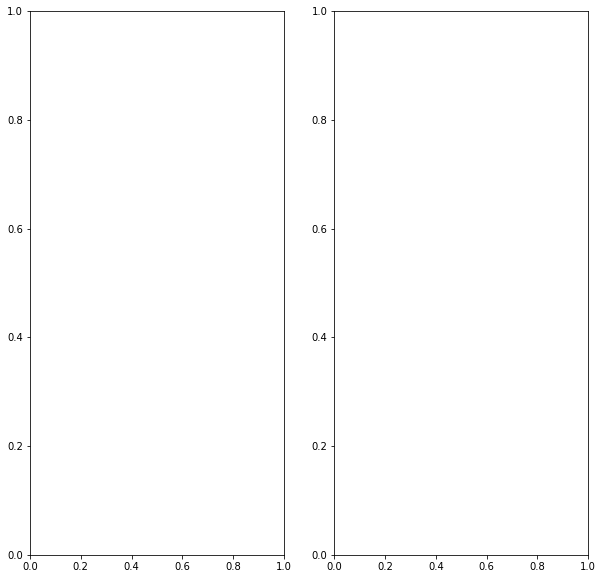

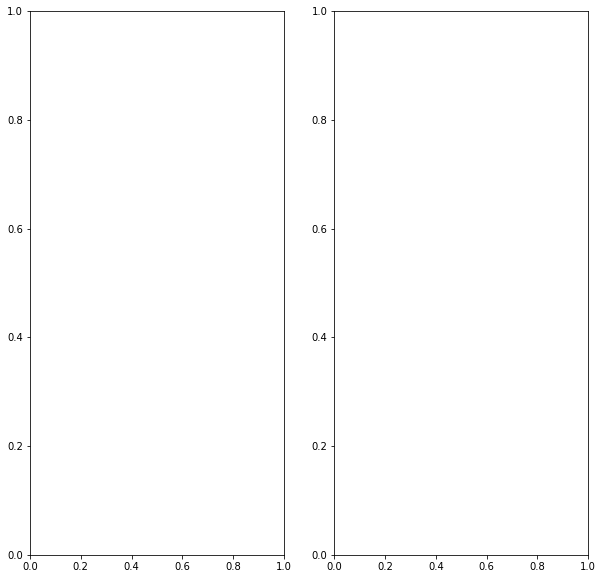

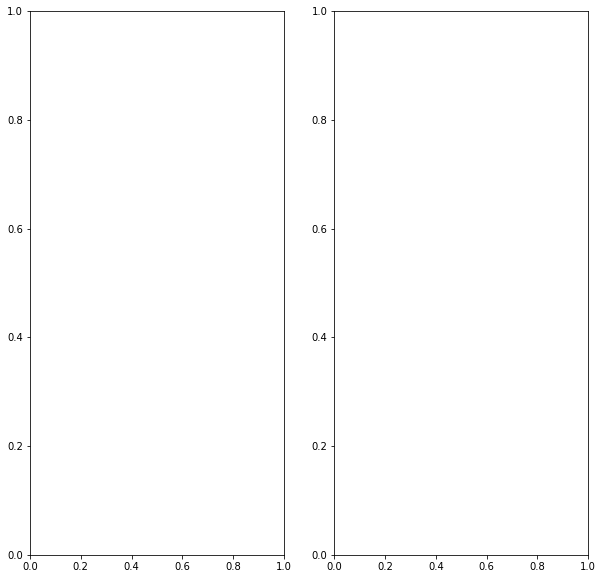

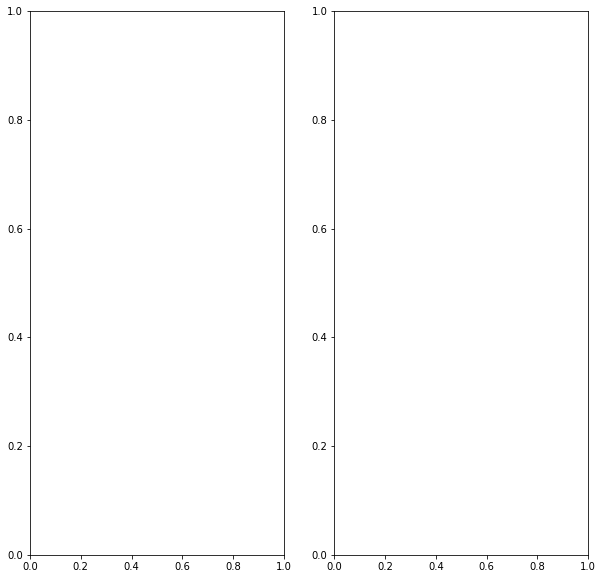

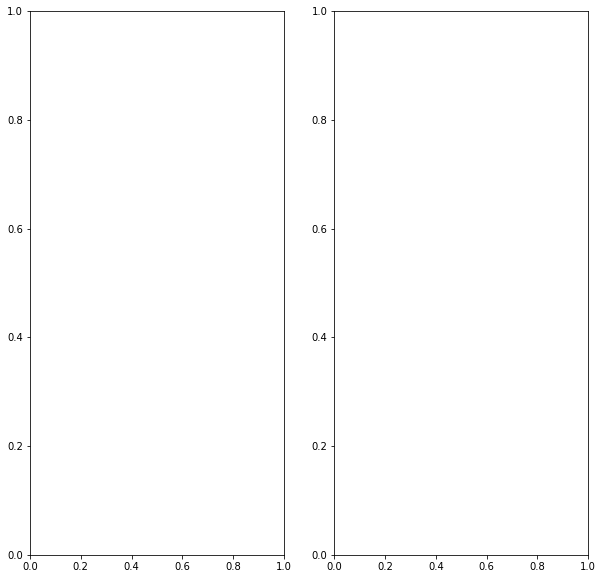

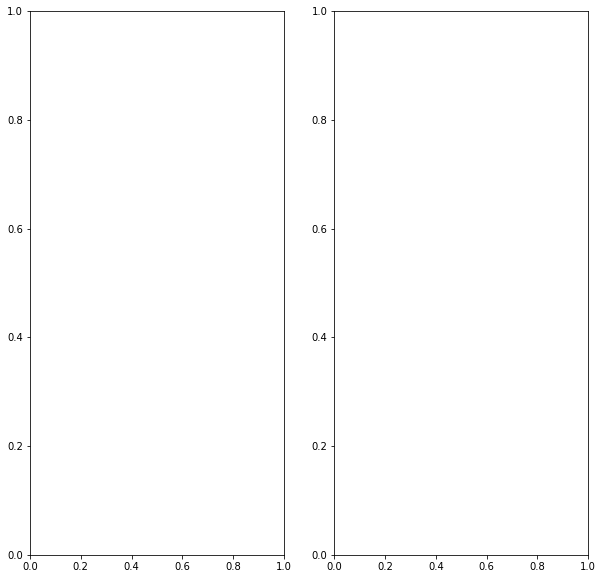

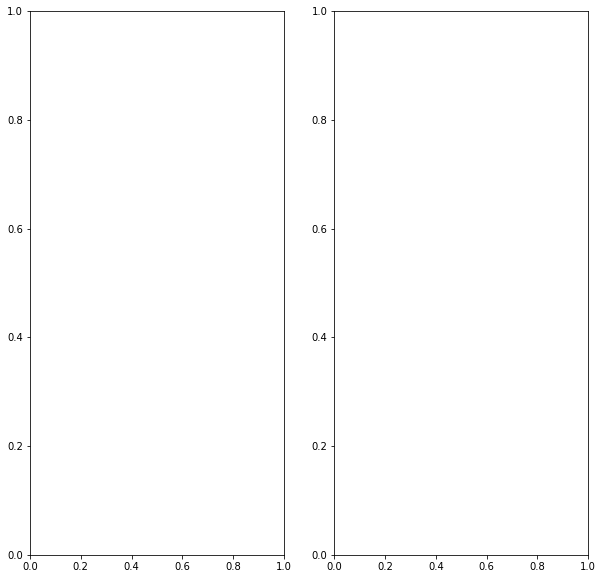

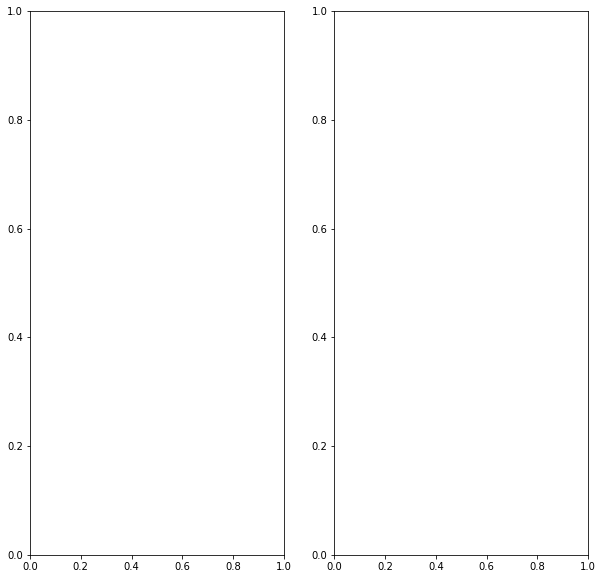

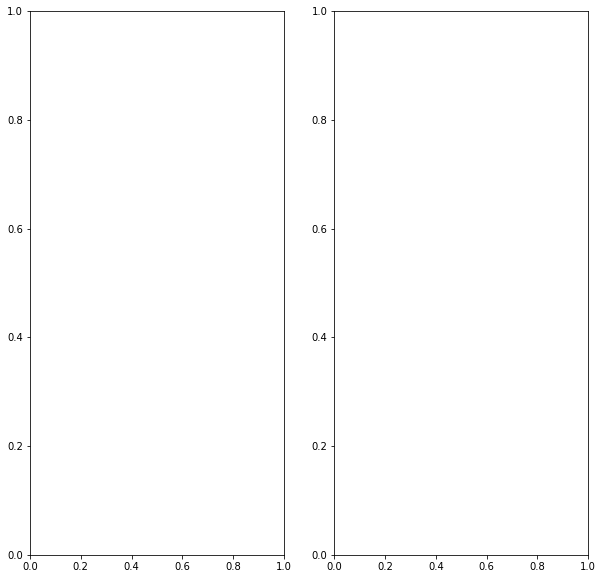

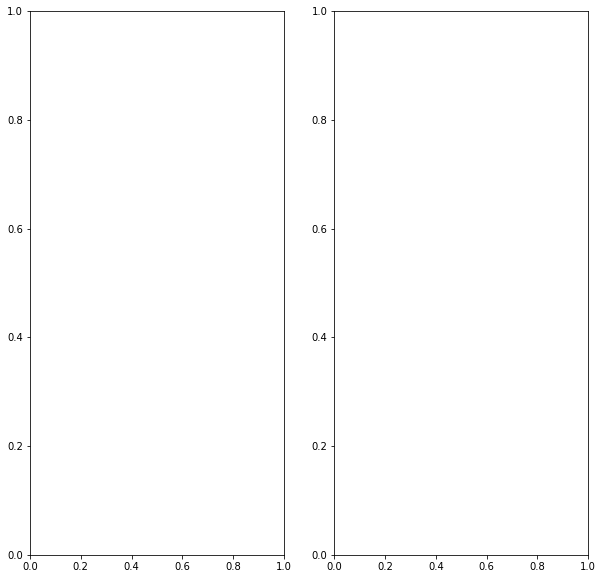

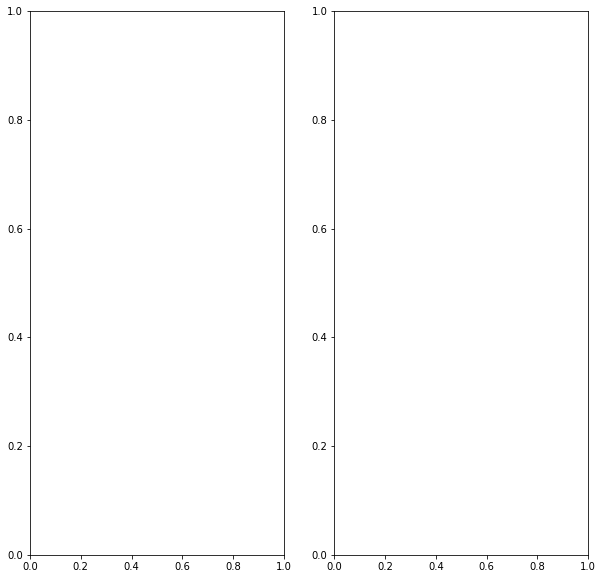

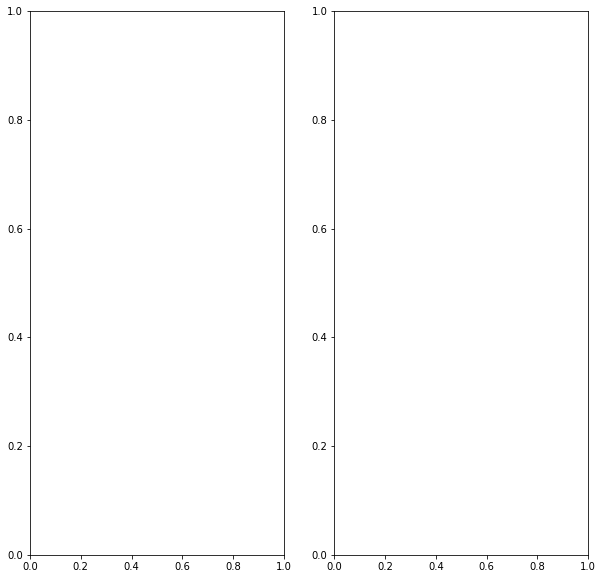

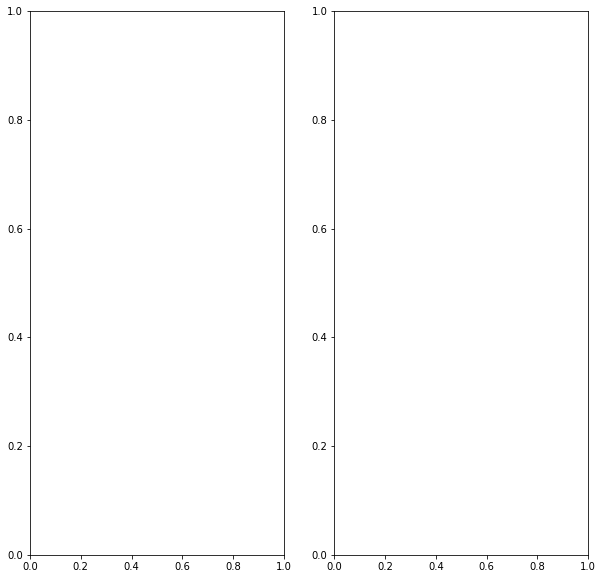

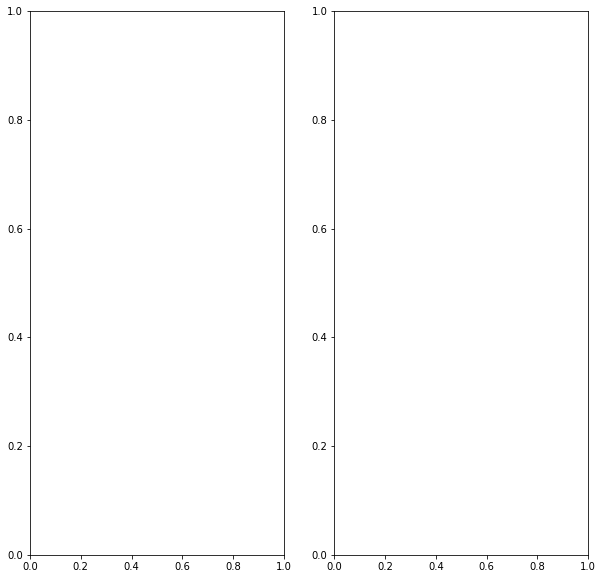

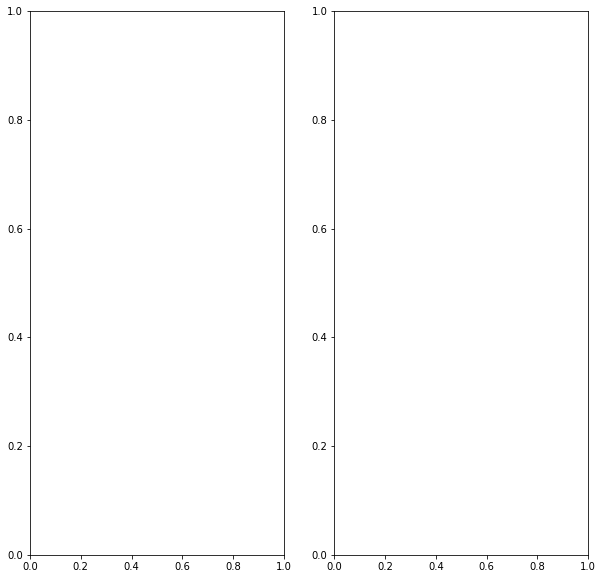

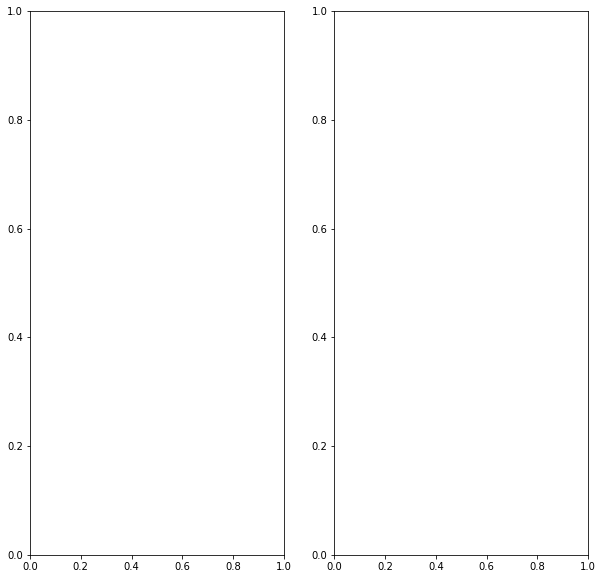

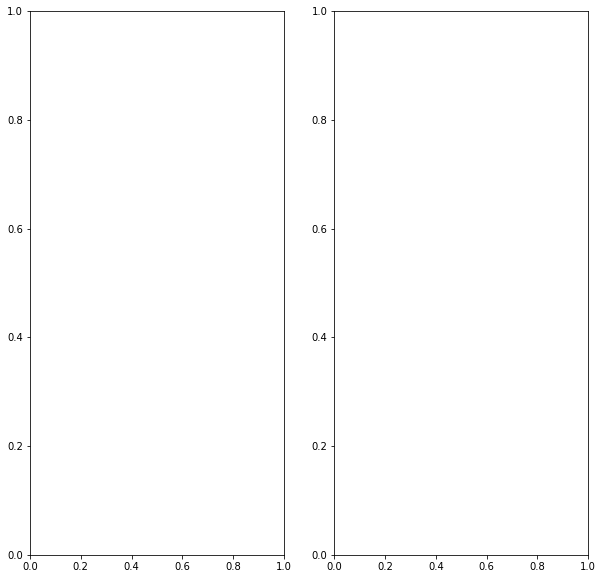

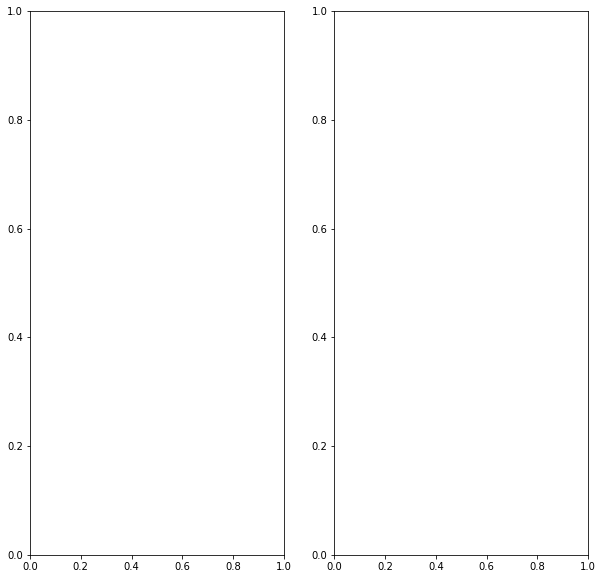

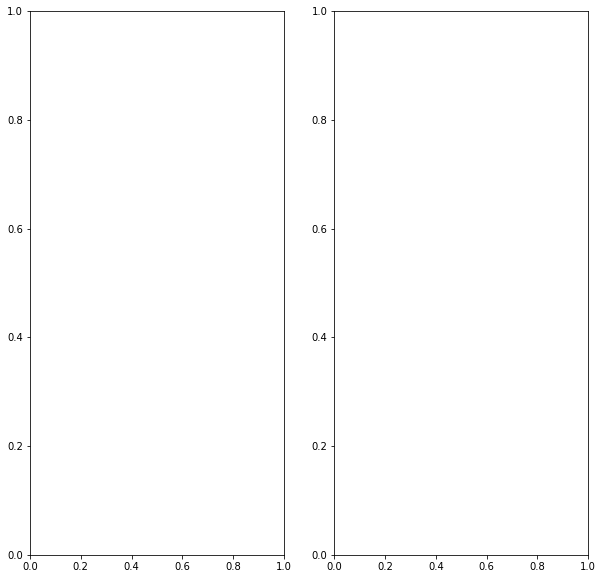

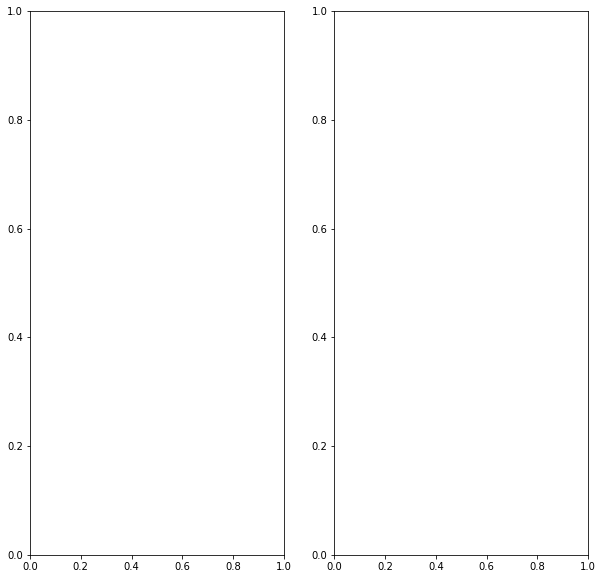

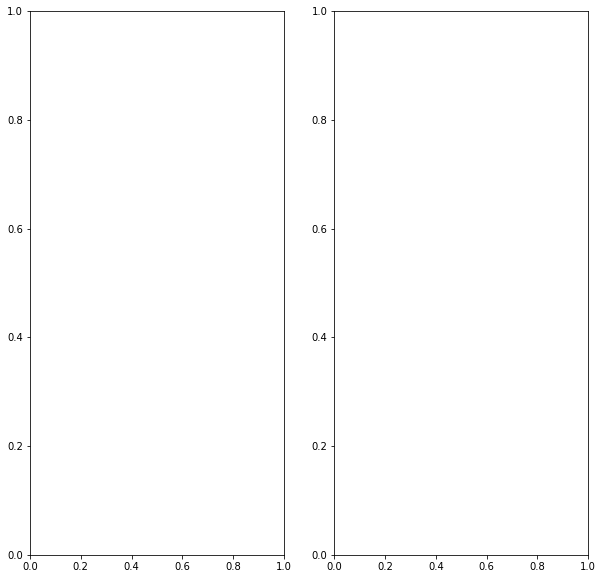

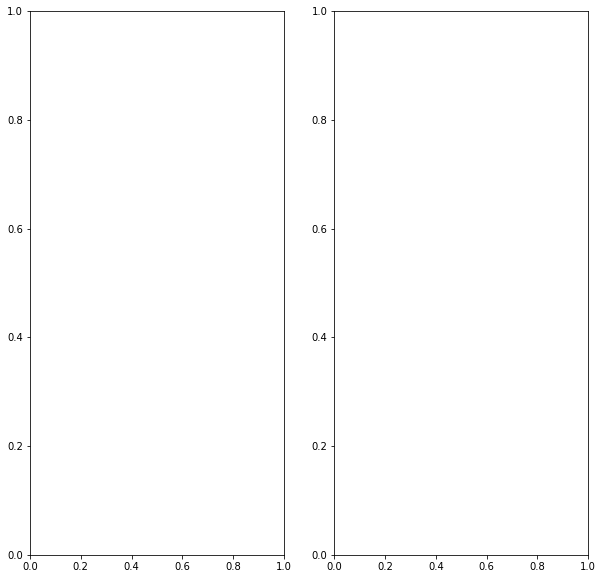

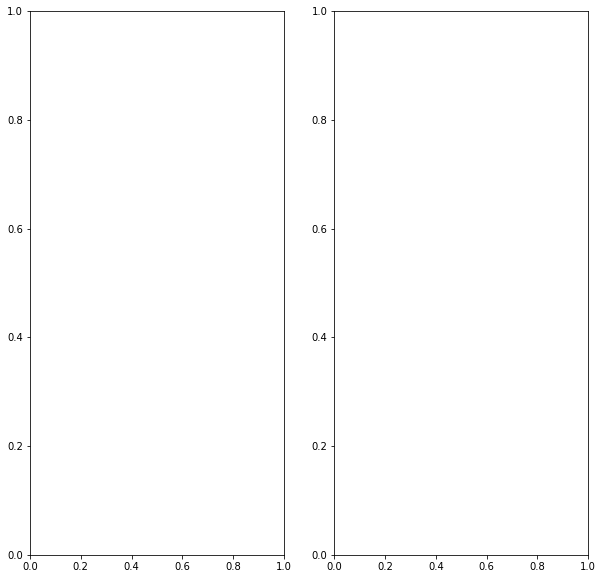

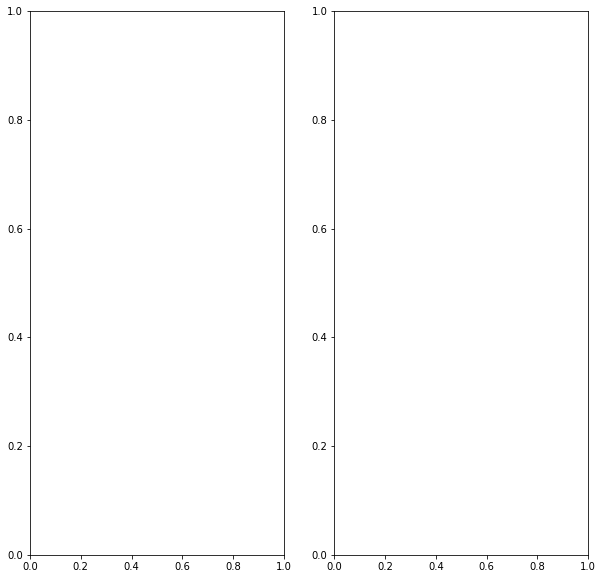

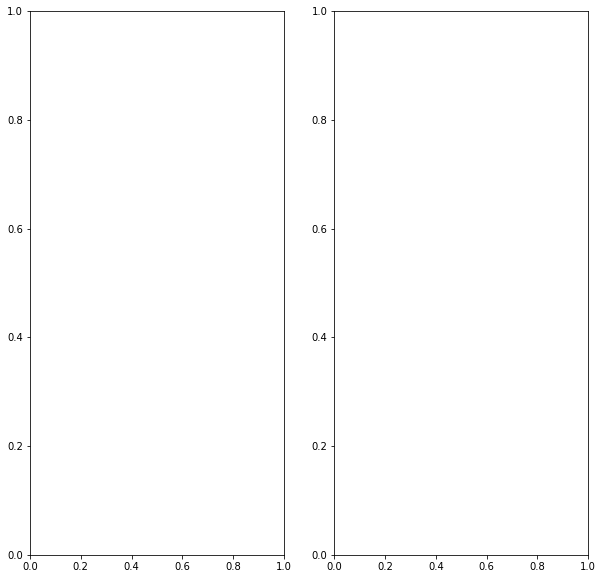

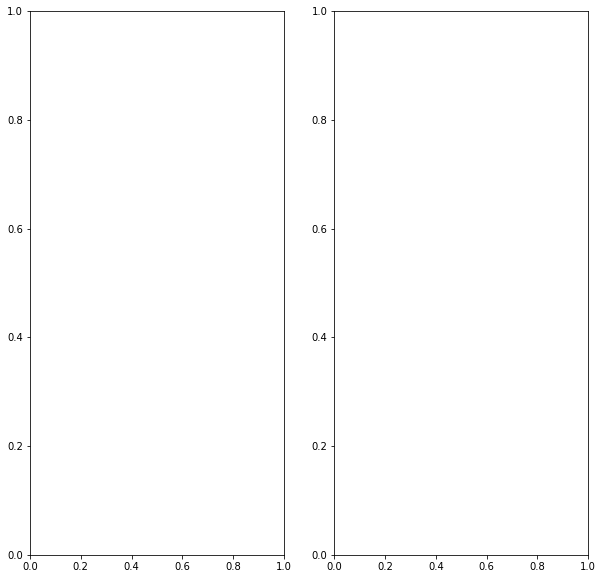

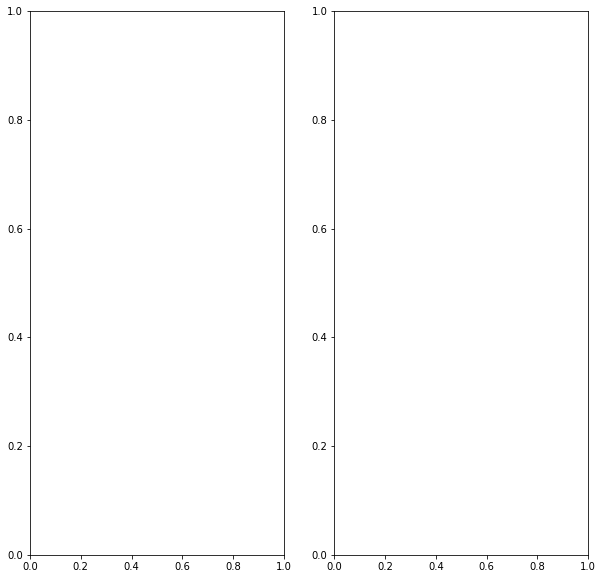

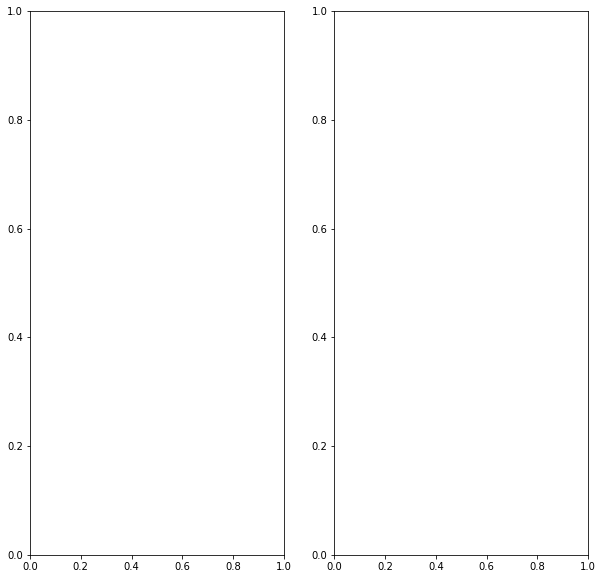

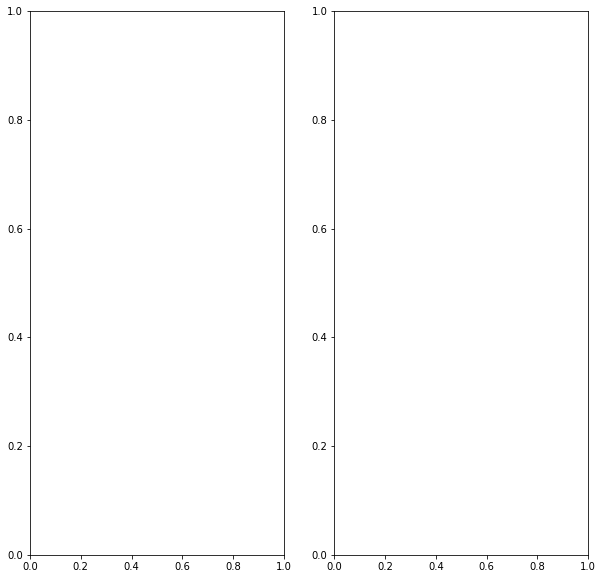

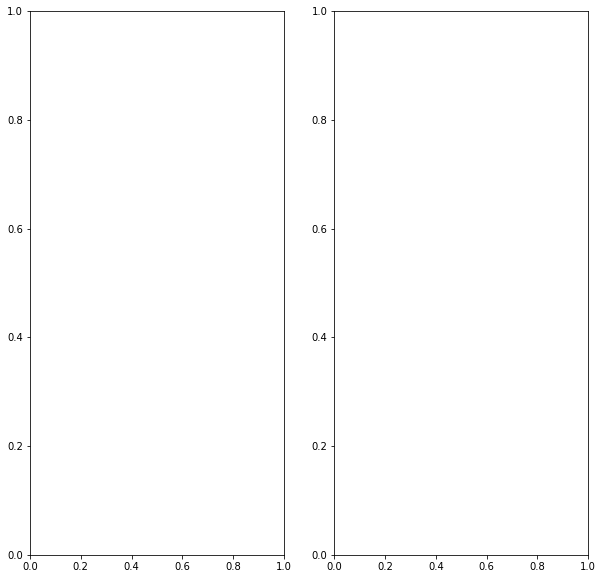

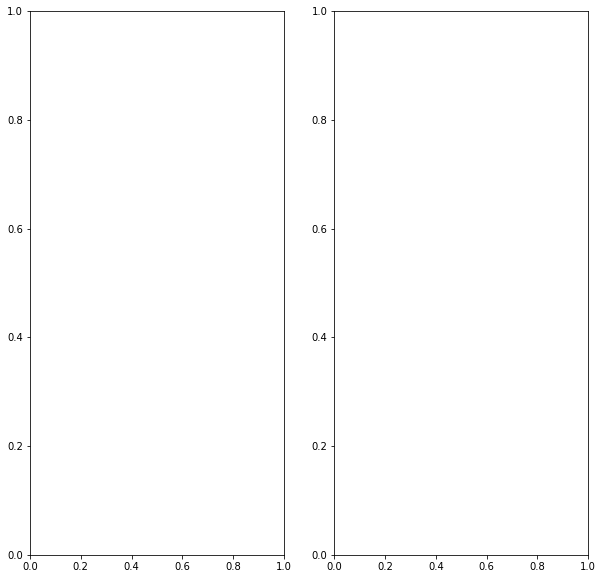

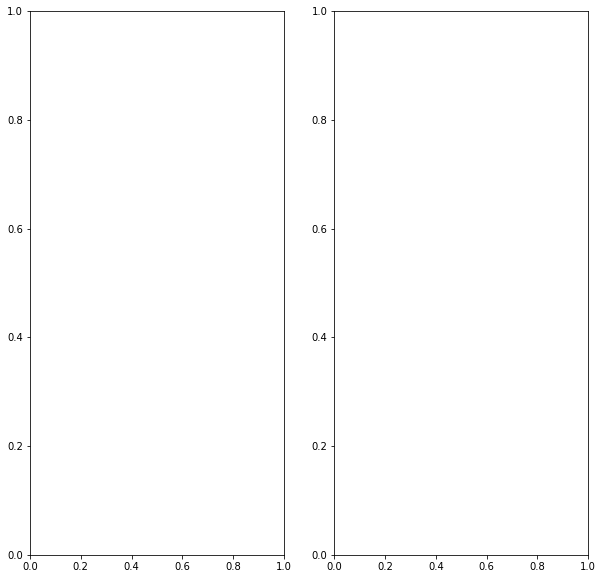

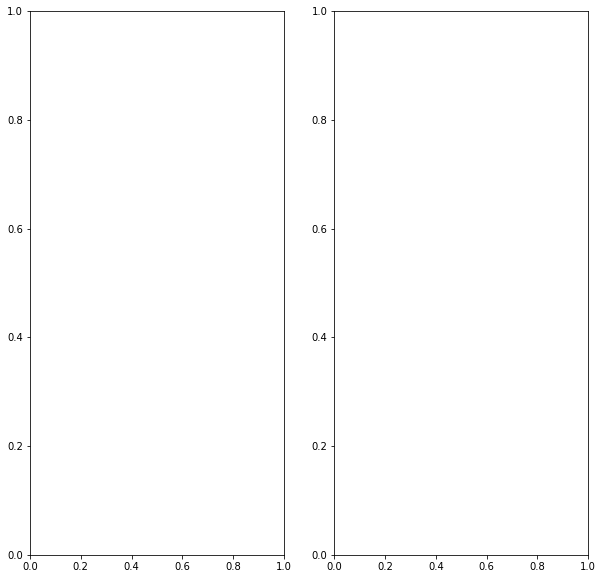

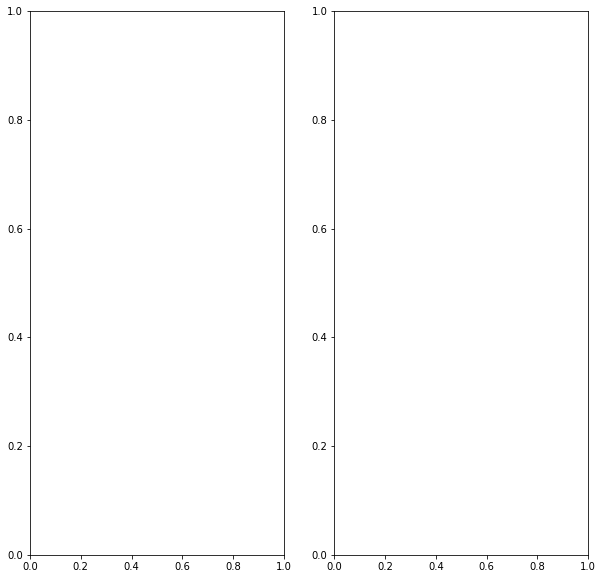

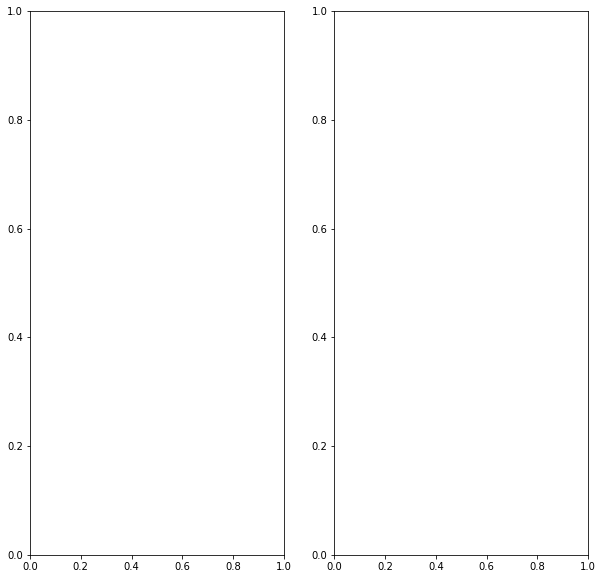

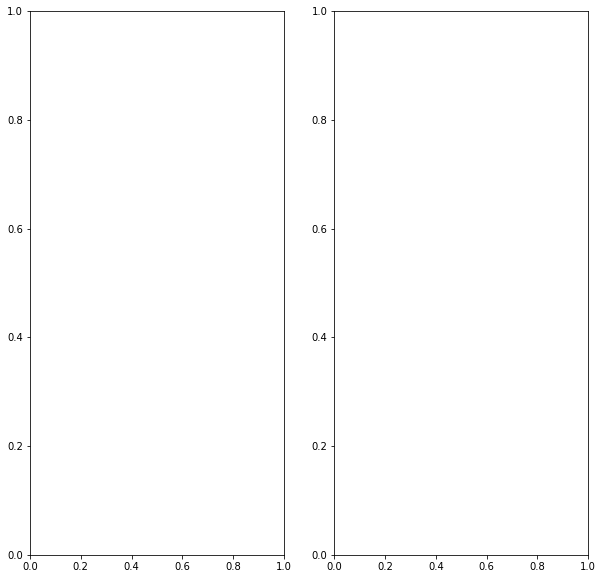

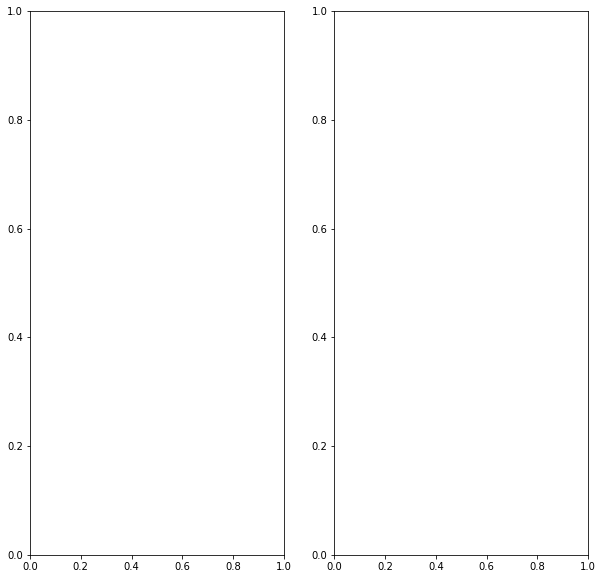

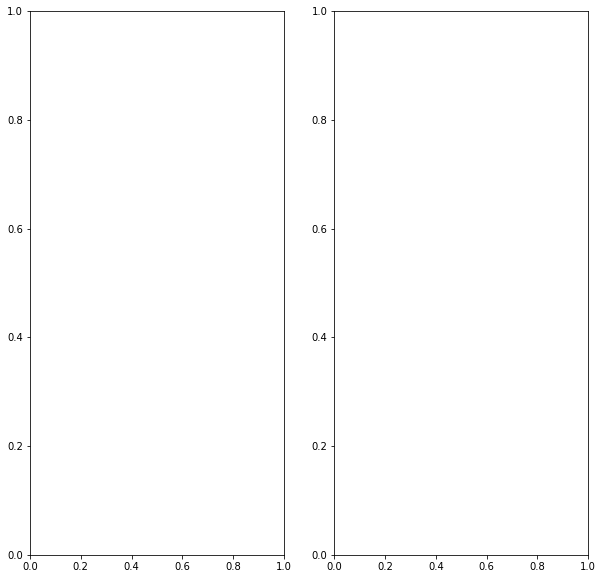

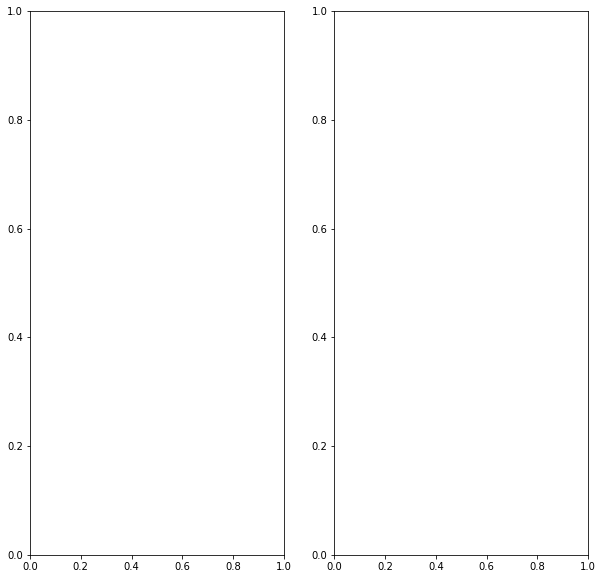

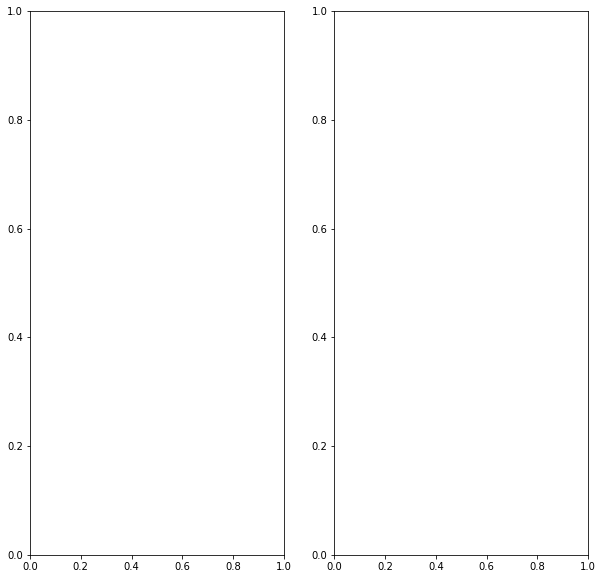

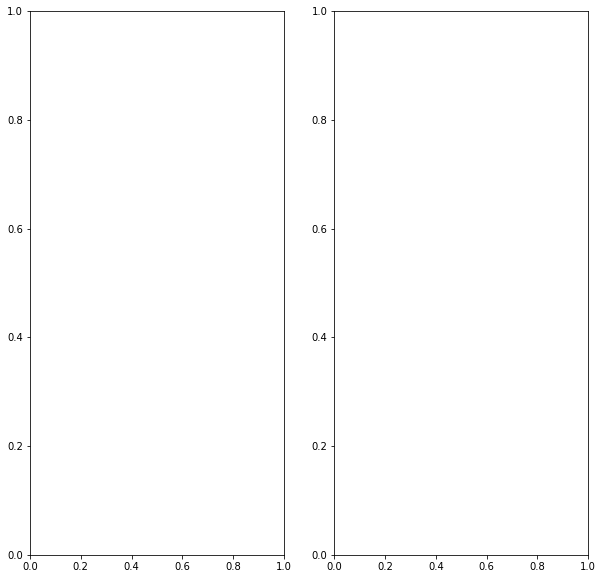

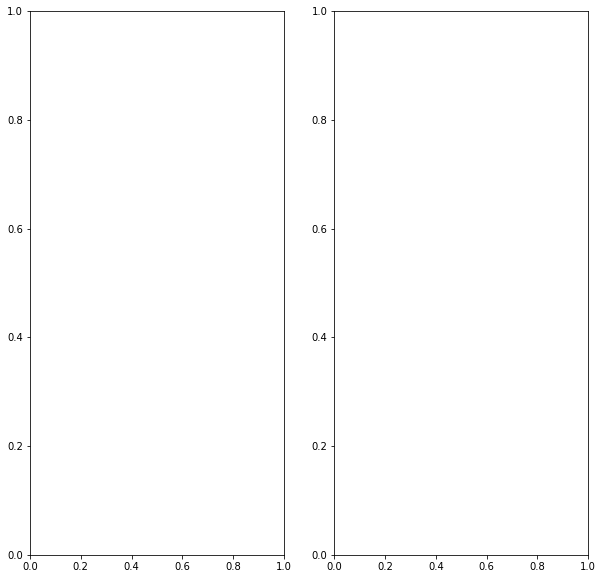

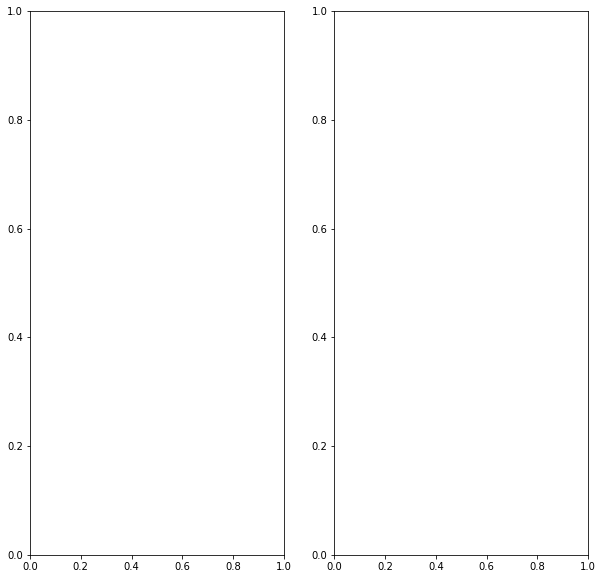

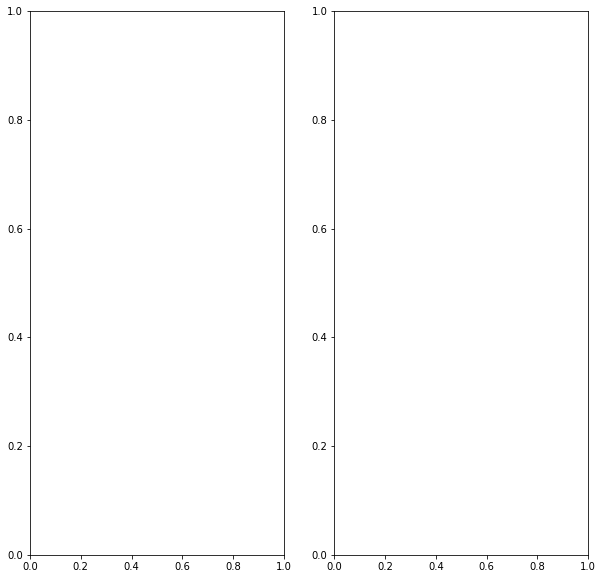

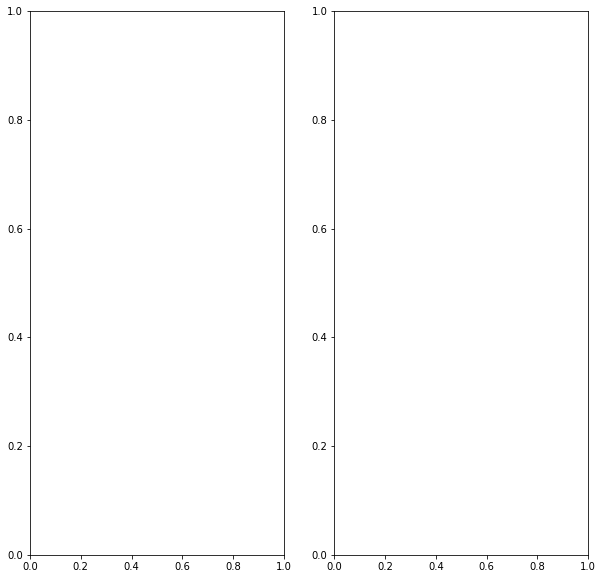

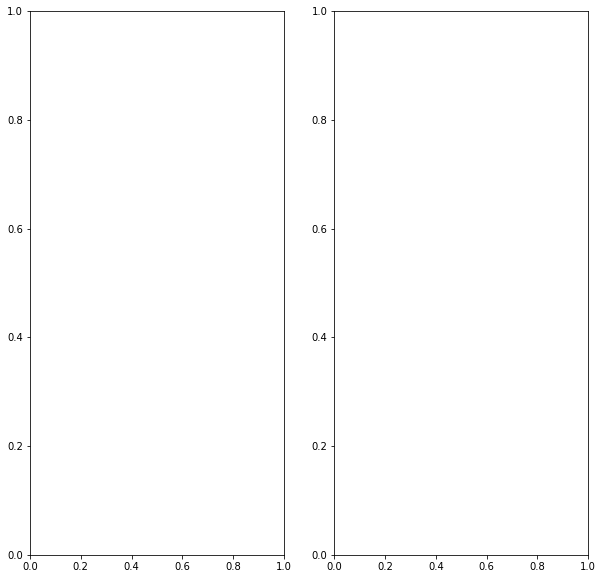

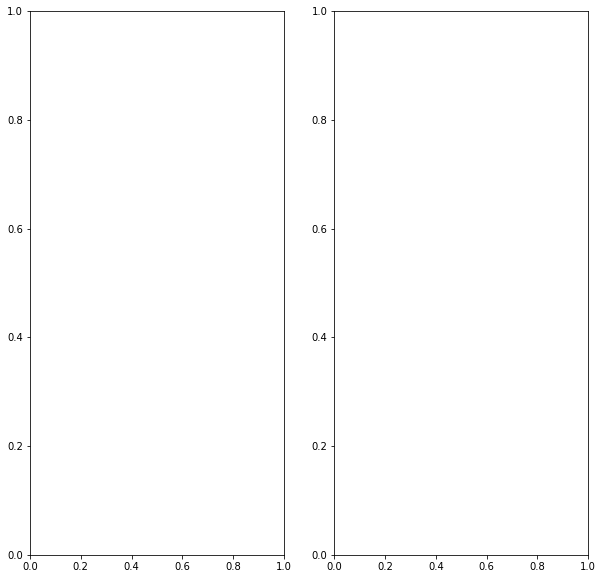

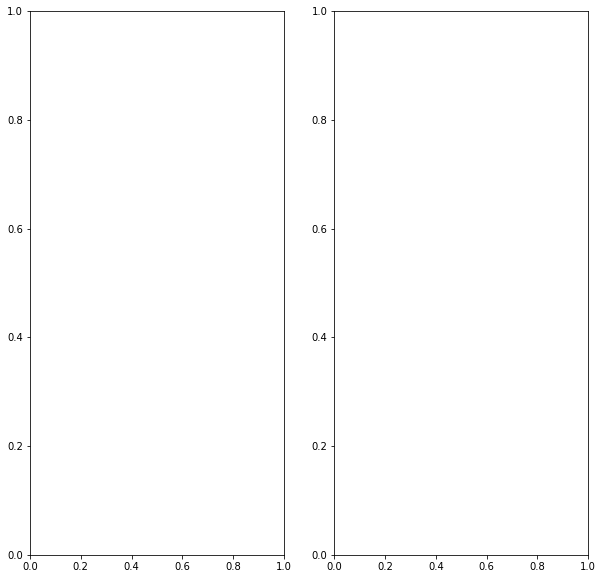

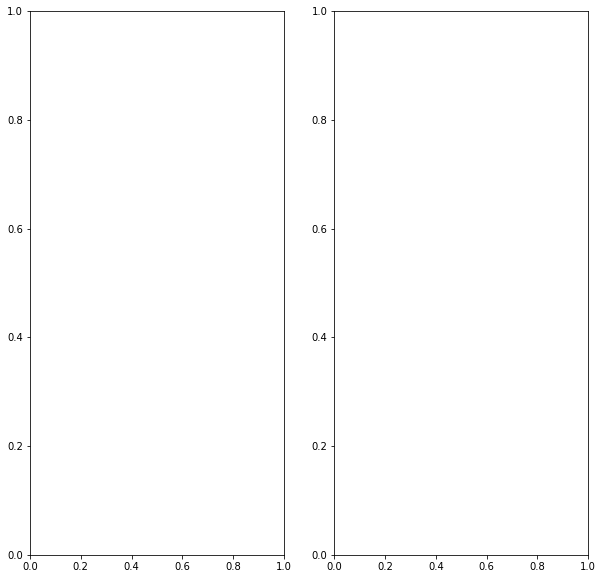

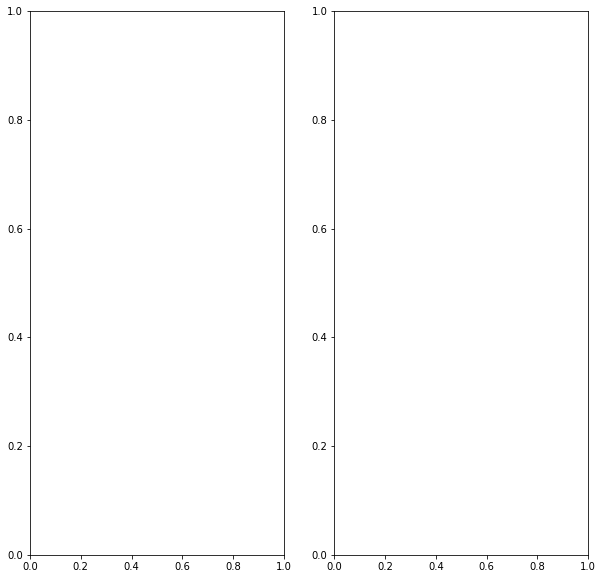

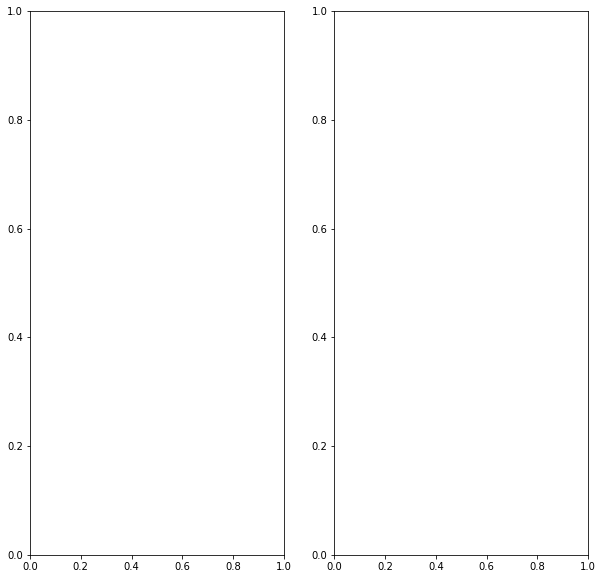

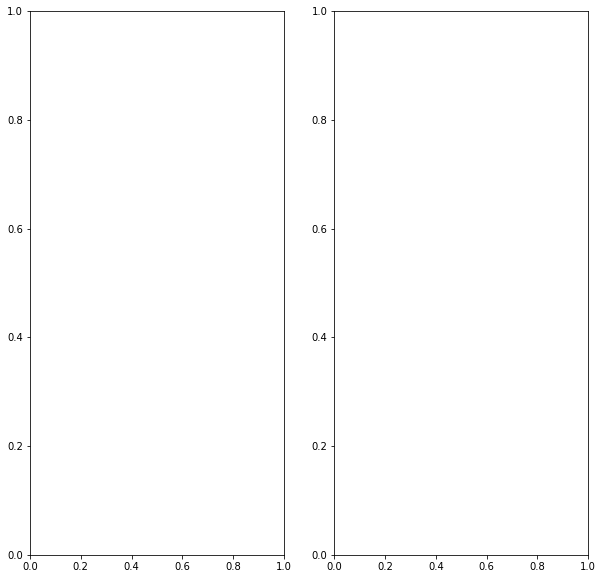

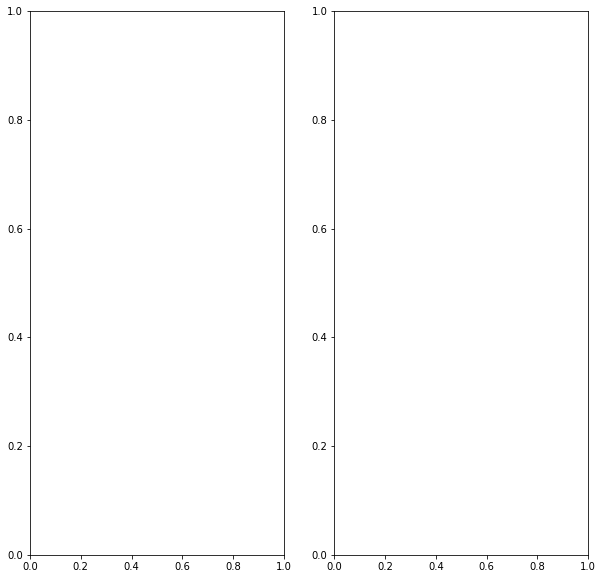

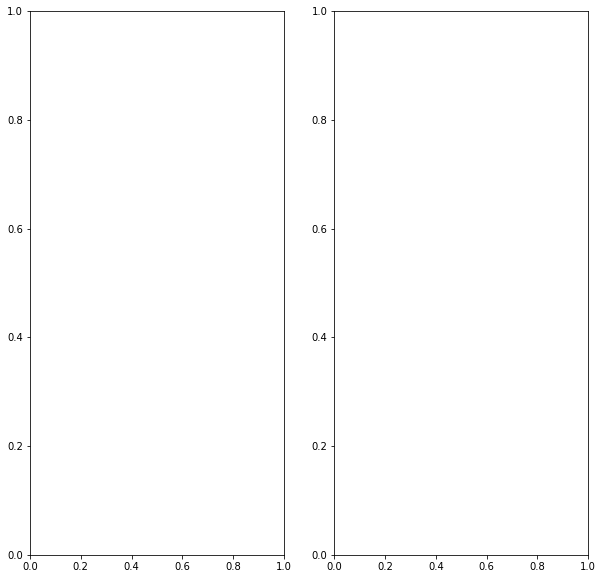

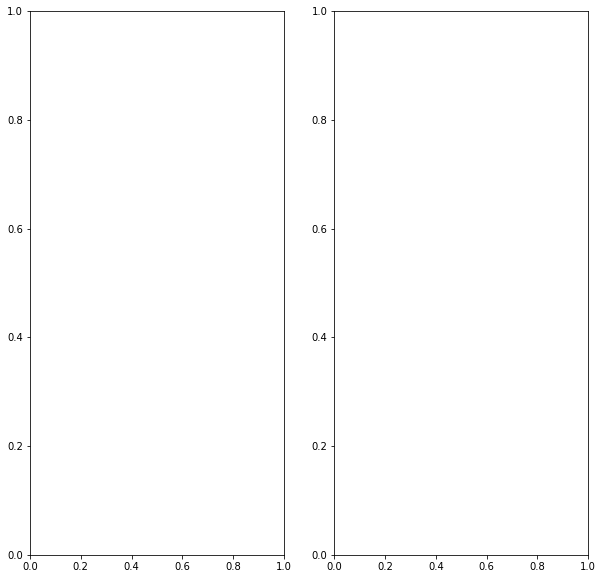

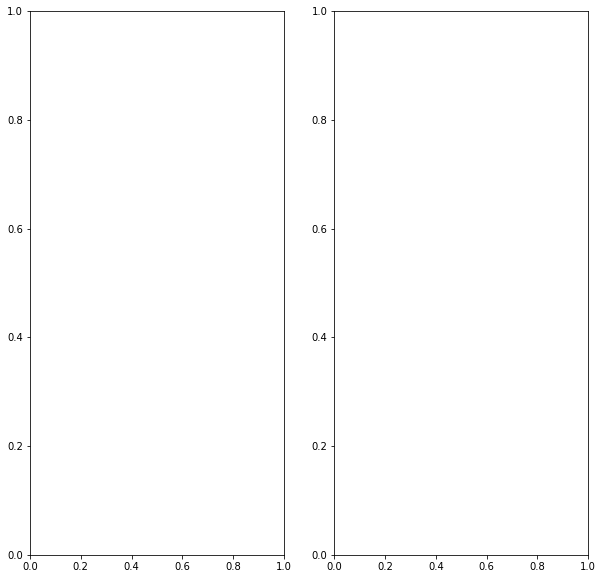

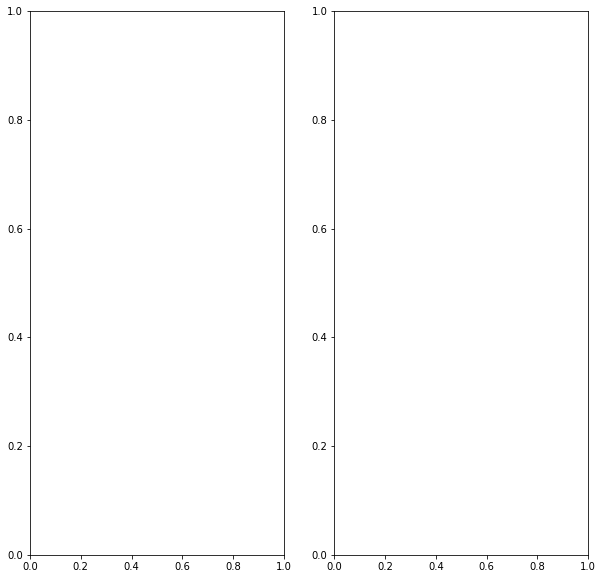

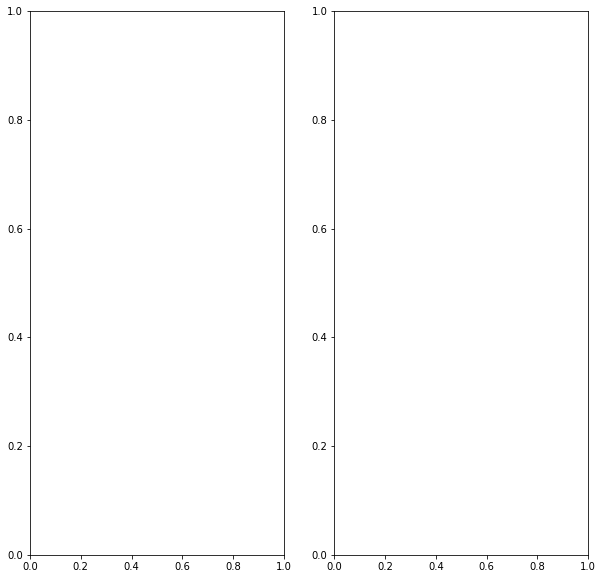

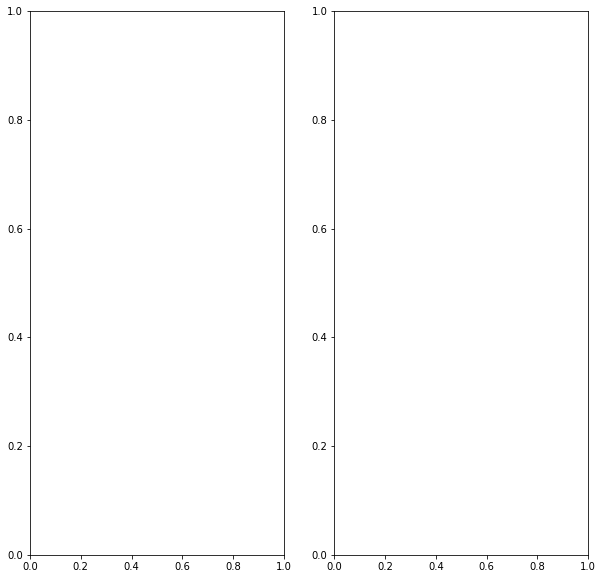

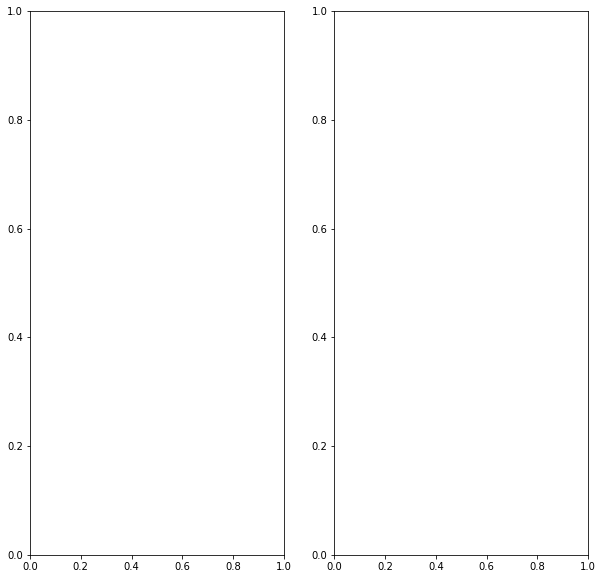

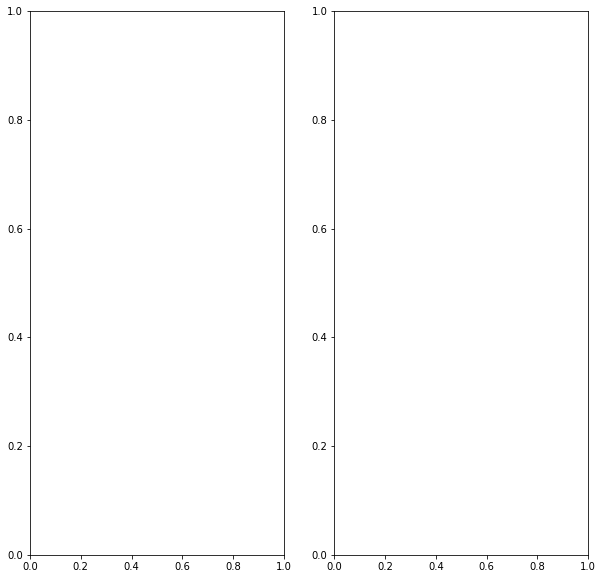

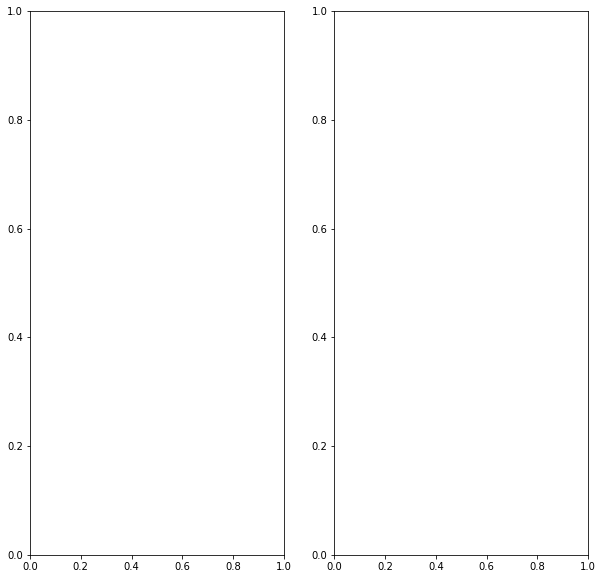

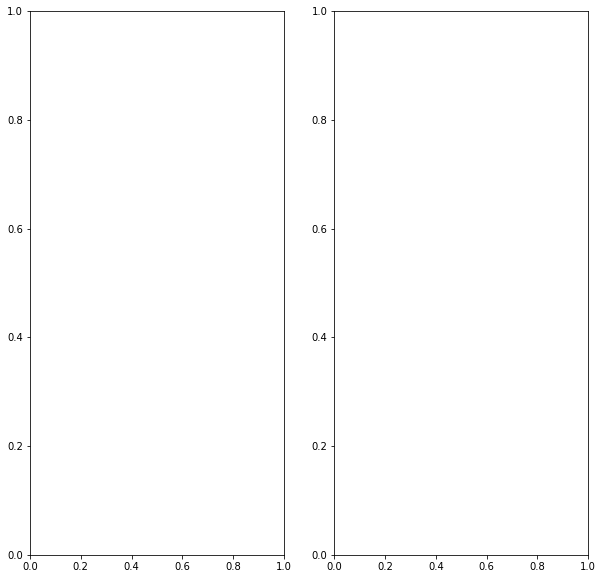

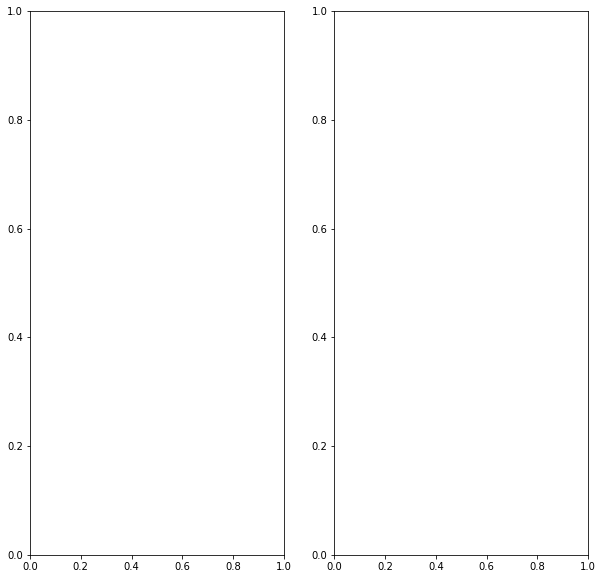

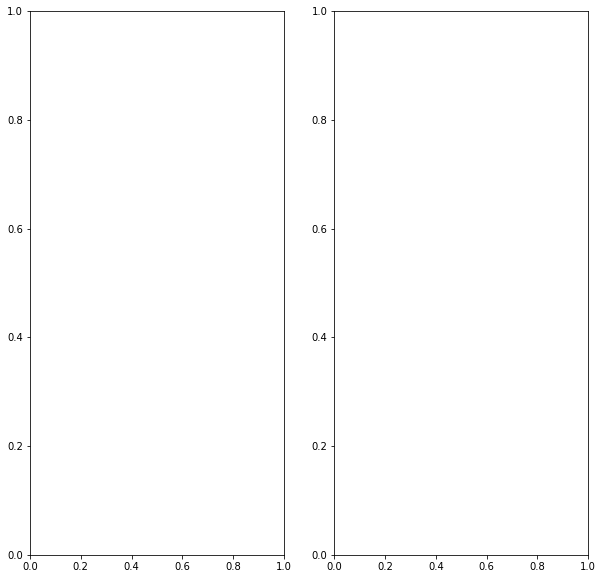

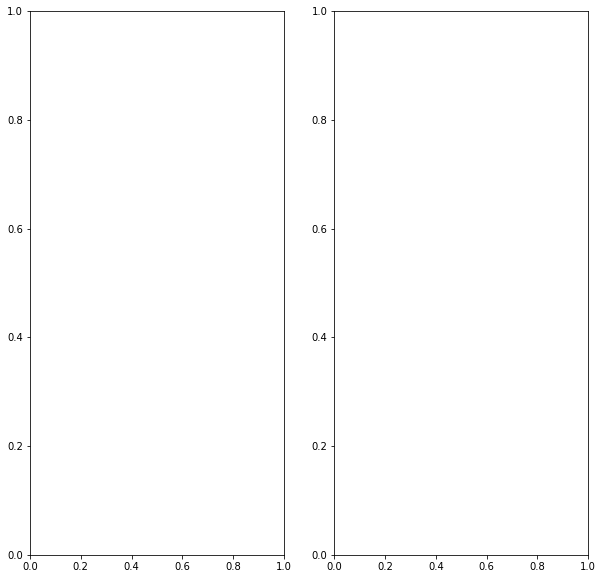

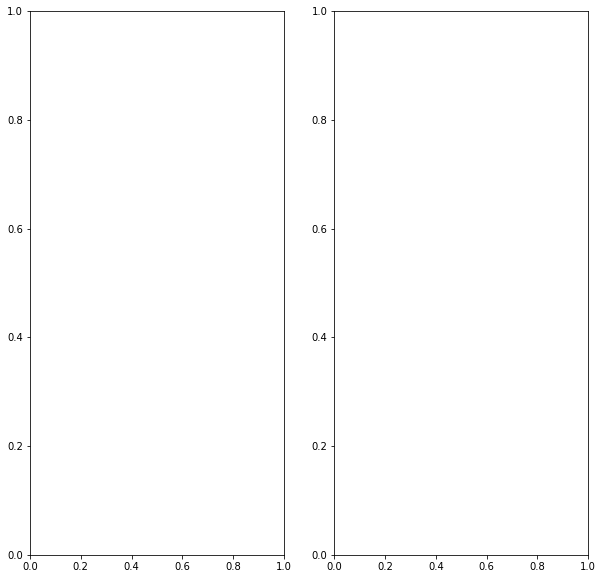

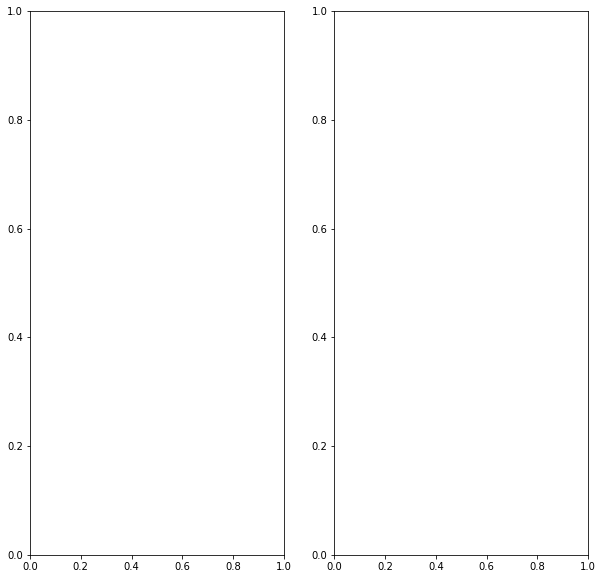

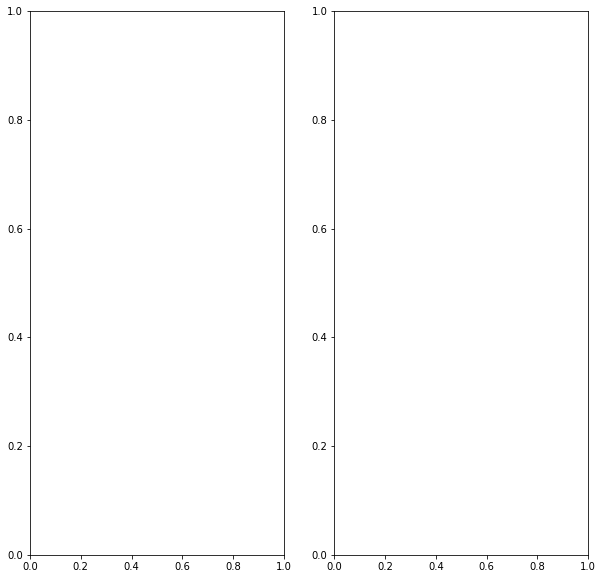

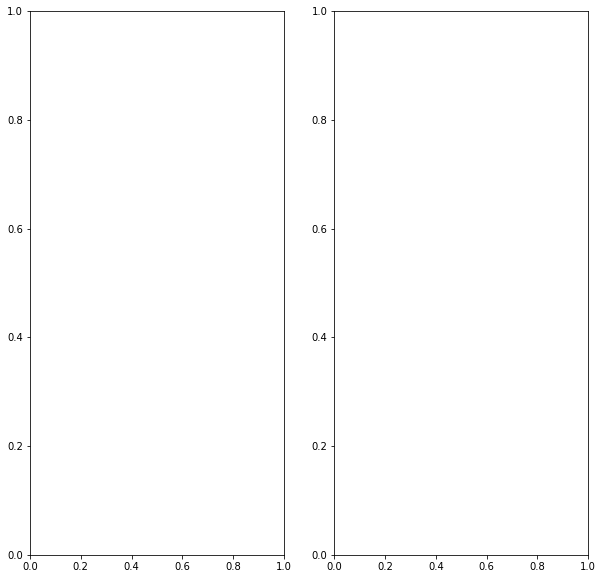

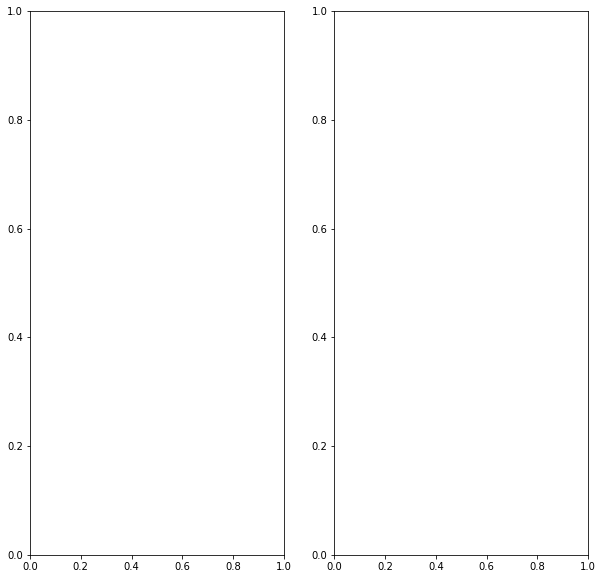

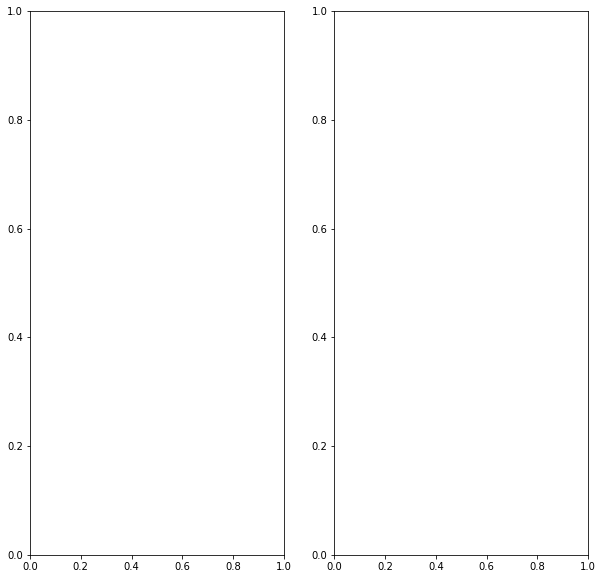

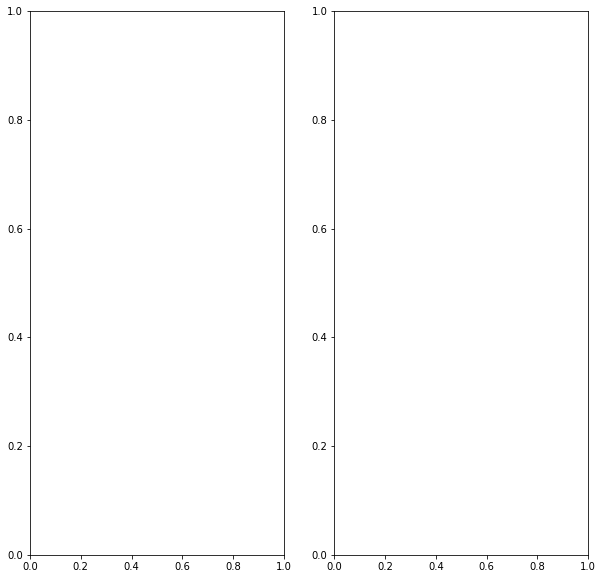

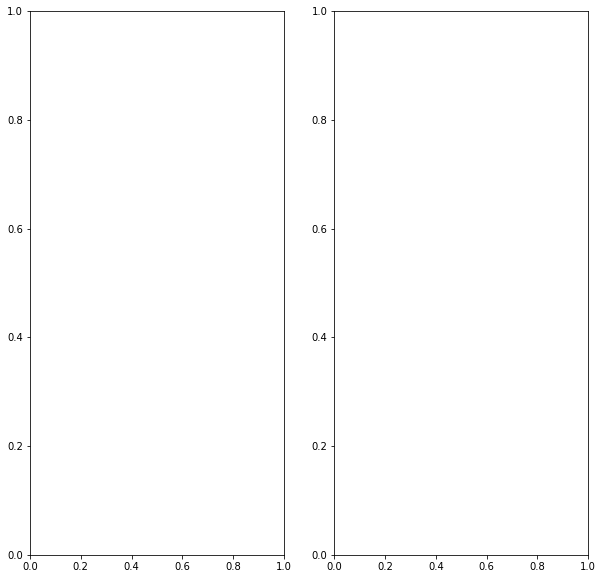

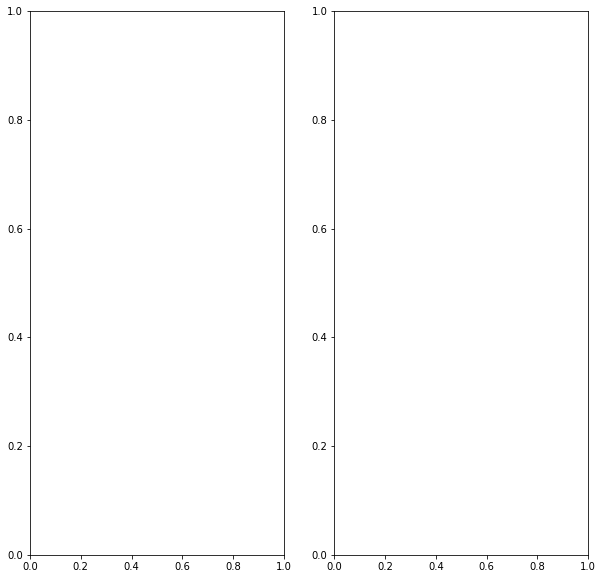

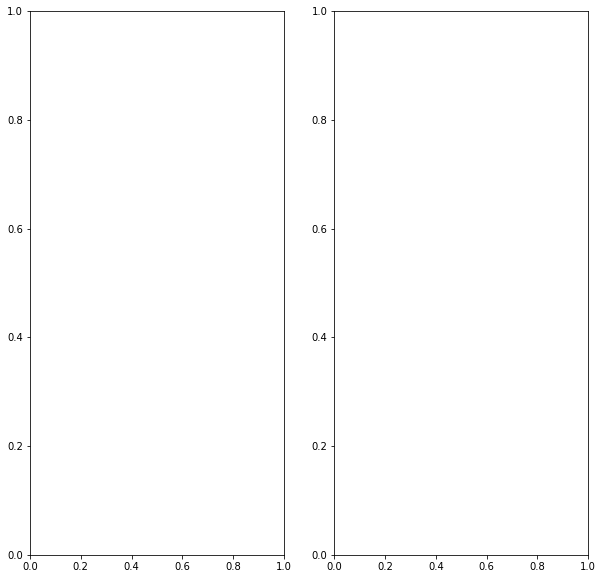

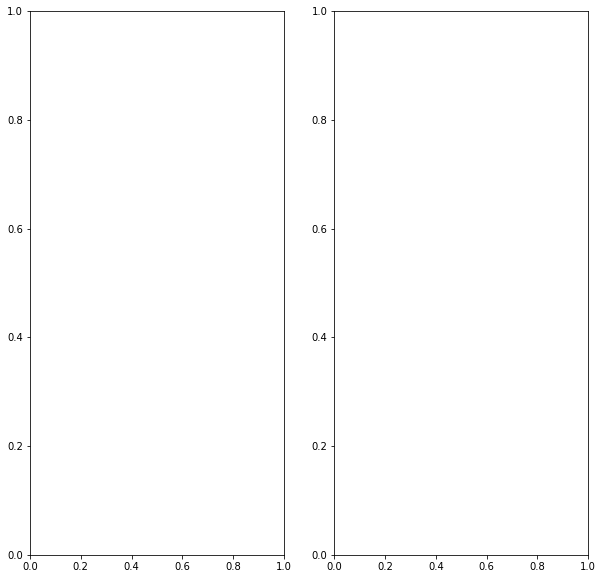

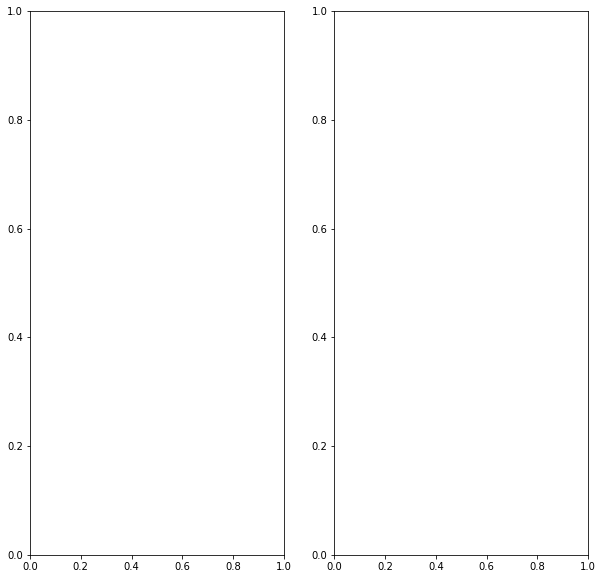

In [59]:
initial_img=[]
final_img=[]
import random
for i in range(len(samp_4)):

  degrees = 90
  img = np.array(Image.open(samp_4[i]))
  # img = img.sum(2) / (255*3) # converting to grayscale
  print(img.shape)
  fig = plt.figure(figsize=(10, 10))
  fig.add_subplot(1, 2, 1)
  #plt.imshow(img)
  initial_img.append(img)
  #plt.title("original")
  img0 = img.copy()
  for _ in range(degrees//90):
      img0 = img0.transpose(1, 0, 2)
      for j in range(0, img0.shape[1] // 2):
          c = img0[:, j, :].copy()
          img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
          img0[: , img0.shape[1]-j-1, :] = c
  fig.add_subplot(1, 2, 2)
  #plt.imshow(img0)
  final_img.append(img0)
  #plt.title("rotated")
  im_i=np.array(initial_img)
  im_f=np.array(final_img)


print(im_i.shape)
print(im_f.shape)

In [60]:
from PIL import Image
i=0
for im in im_i:
  
  print(im.shape)
  img=np.array(im)
  img = img.astype(np.uint8)
  img = Image.fromarray(img)
  fname="f"+str(i)+".jpeg"
  #print(y_res[i])
  print(fname)
  img_path="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Data_Augmentation/Stage_3"
  image = img.save(f"{img_path}/{fname}")
  #img_path_1="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Non_cancerous"
  #img_path_2="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_1"
  #img_path_3="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_2"
  #img_path_4="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_3"
  #if y_res[i]==0:
  #  image = img.save(f"{img_path_1}/{fname}")
  #elif y_res[i]==1 or y_res[i]==2:
  #  image = img.save(f"{img_path_2}/{fname}")
  #elif y_res[i]==3:
  #  image = img.save(f"{img_path_3}/{fname}")
  #elif y_res[i]==4:
  #  image = img.save(f"{img_path_4}/{fname}")
  #img.save(fname)
  i=i+1

(1200, 1600, 3)
f0.jpeg
(1200, 1600, 3)
f1.jpeg
(1200, 1600, 3)
f2.jpeg
(1200, 1600, 3)
f3.jpeg
(1200, 1600, 3)
f4.jpeg
(1200, 1600, 3)
f5.jpeg
(1200, 1600, 3)
f6.jpeg
(1200, 1600, 3)
f7.jpeg
(1200, 1600, 3)
f8.jpeg
(1200, 1600, 3)
f9.jpeg
(1200, 1600, 3)
f10.jpeg
(1200, 1600, 3)
f11.jpeg
(1200, 1600, 3)
f12.jpeg
(1200, 1600, 3)
f13.jpeg
(1200, 1600, 3)
f14.jpeg
(1200, 1600, 3)
f15.jpeg
(1200, 1600, 3)
f16.jpeg
(1200, 1600, 3)
f17.jpeg
(1200, 1600, 3)
f18.jpeg
(1200, 1600, 3)
f19.jpeg
(1200, 1600, 3)
f20.jpeg
(1200, 1600, 3)
f21.jpeg
(1200, 1600, 3)
f22.jpeg
(1200, 1600, 3)
f23.jpeg
(1200, 1600, 3)
f24.jpeg
(1200, 1600, 3)
f25.jpeg
(1200, 1600, 3)
f26.jpeg
(1200, 1600, 3)
f27.jpeg
(1200, 1600, 3)
f28.jpeg
(1200, 1600, 3)
f29.jpeg
(1200, 1600, 3)
f30.jpeg
(1200, 1600, 3)
f31.jpeg
(1200, 1600, 3)
f32.jpeg
(1200, 1600, 3)
f33.jpeg
(1200, 1600, 3)
f34.jpeg
(1200, 1600, 3)
f35.jpeg
(1200, 1600, 3)
f36.jpeg
(1200, 1600, 3)
f37.jpeg
(1200, 1600, 3)
f38.jpeg
(1200, 1600, 3)
f39.jpeg
(1200, 160

In [61]:
from PIL import Image
i=0
for im in im_f:
  
  print(im.shape)
  img=np.array(im)
  img = img.astype(np.uint8)
  img = Image.fromarray(img)
  fname="f"+str(i)+".jpeg"
  #print(y_res[i])
  print(fname)
  img_path="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Data_Augmentation/Stage_3"
  image = img.save(f"{img_path}/{fname}")
  #img_path_1="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Non_cancerous"
  #img_path_2="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_1"
  #img_path_3="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_2"
  #img_path_4="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_3"
  #if y_res[i]==0:
  #  image = img.save(f"{img_path_1}/{fname}")
  #elif y_res[i]==1 or y_res[i]==2:
  #  image = img.save(f"{img_path_2}/{fname}")
  #elif y_res[i]==3:
  #  image = img.save(f"{img_path_3}/{fname}")
  #elif y_res[i]==4:
  #  image = img.save(f"{img_path_4}/{fname}")
  #img.save(fname)
  i=i+1

(1600, 1200, 3)
f0.jpeg
(1600, 1200, 3)
f1.jpeg
(1600, 1200, 3)
f2.jpeg
(1600, 1200, 3)
f3.jpeg
(1600, 1200, 3)
f4.jpeg
(1600, 1200, 3)
f5.jpeg
(1600, 1200, 3)
f6.jpeg
(1600, 1200, 3)
f7.jpeg
(1600, 1200, 3)
f8.jpeg
(1600, 1200, 3)
f9.jpeg
(1600, 1200, 3)
f10.jpeg
(1600, 1200, 3)
f11.jpeg
(1600, 1200, 3)
f12.jpeg
(1600, 1200, 3)
f13.jpeg
(1600, 1200, 3)
f14.jpeg
(1600, 1200, 3)
f15.jpeg
(1600, 1200, 3)
f16.jpeg
(1600, 1200, 3)
f17.jpeg
(1600, 1200, 3)
f18.jpeg
(1600, 1200, 3)
f19.jpeg
(1600, 1200, 3)
f20.jpeg
(1600, 1200, 3)
f21.jpeg
(1600, 1200, 3)
f22.jpeg
(1600, 1200, 3)
f23.jpeg
(1600, 1200, 3)
f24.jpeg
(1600, 1200, 3)
f25.jpeg
(1600, 1200, 3)
f26.jpeg
(1600, 1200, 3)
f27.jpeg
(1600, 1200, 3)
f28.jpeg
(1600, 1200, 3)
f29.jpeg
(1600, 1200, 3)
f30.jpeg
(1600, 1200, 3)
f31.jpeg
(1600, 1200, 3)
f32.jpeg
(1600, 1200, 3)
f33.jpeg
(1600, 1200, 3)
f34.jpeg
(1600, 1200, 3)
f35.jpeg
(1600, 1200, 3)
f36.jpeg
(1600, 1200, 3)
f37.jpeg
(1600, 1200, 3)
f38.jpeg
(1600, 1200, 3)
f39.jpeg
(1600, 120

In [ ]:
from PIL import Image
i=0
for im in im_f:
  
  print(im.shape)
  img=np.array(im)
  img = img.astype(np.uint8)
  img = Image.fromarray(img)
  fname="f"+str(i)+".jpeg"
  #print(y_res[i])
  print(fname)
  img_path="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Data_Augmentation/Stage_3"
  image = img.save(f"{img_path}/{fname}")
  #img_path_1="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Non_cancerous"
  #img_path_2="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_1"
  #img_path_3="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_2"
  #img_path_4="/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/ADASYN_images/Stage_3"
  #if y_res[i]==0:
  #  image = img.save(f"{img_path_1}/{fname}")
  #elif y_res[i]==1 or y_res[i]==2:
  #  image = img.save(f"{img_path_2}/{fname}")
  #elif y_res[i]==3:
  #  image = img.save(f"{img_path_3}/{fname}")
  #elif y_res[i]==4:
  #  image = img.save(f"{img_path_4}/{fname}")
  #img.save(fname)
  i=i+1